# Autoencoder demonstration of Fisher metric pruning:

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import autoencoder


/Users/as/astapleton_phd/dsb/fisher_pruning/autoencoder.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Train a degenerate autoencoder
__256 hidden neurons in latent space__

In [2]:
model = autoencoder.MNISTModel(latent_dim=20)
model.train()

Epochs: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Completed training successfully...


## Testing
__(check the performance of the encoder)__

In [3]:
# Define a transform to map from image to pixel floats
transform = transforms.Compose([transforms.ToTensor(), torch.flatten])

# Create testing dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

# Create testing dataloader
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=10, shuffle=True
)


In [4]:
import matplotlib.pyplot as plt

def plot_batch(images, filename):
    # Plot the batch of images
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].view(28, 28).detach().numpy(), cmap='gray')
        # plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [5]:
# Get a batch of images
iterator = iter(test_dataloader)
batches = next(iterator)
batch_0 = batches[0]

### Original images

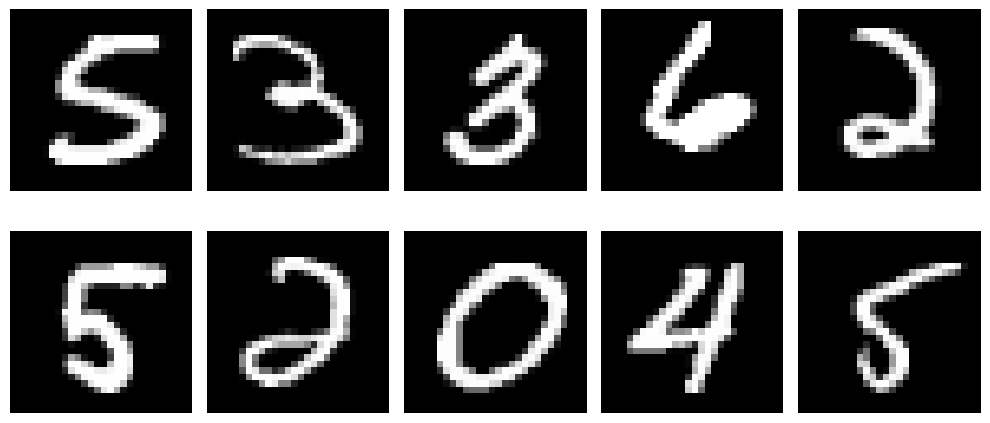

In [6]:
plot_batch(batch_0, filename='plots/original_samples.pdf')

In [7]:
autoencoded_batch = [model.autoencoder(batch_0[i]) for i in range(10)]

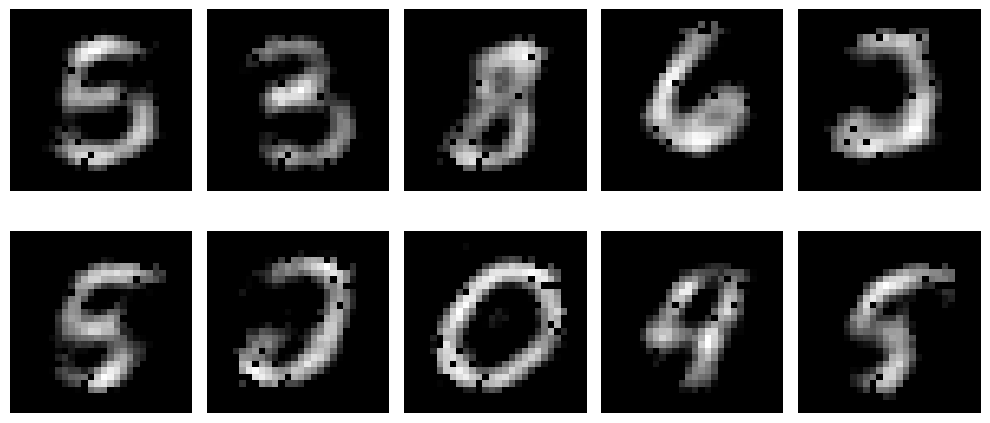

In [8]:
plot_batch(autoencoded_batch, 'plots/autoencoded_no_pruning.pdf')
# autoencoded_batch[0].shape

## Diagonal Fisher matrix element distribution

In [9]:
import fisher_transform
# Define the FIM
fim = fisher_transform.find_fisher(model.autoencoder, test_dataloader,
                                   n_output=784)


Autoencoder(
  (encoder): Sequential(
    (0): ReLU()
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=784, bias=True)
    (1): ReLU()
  )
)


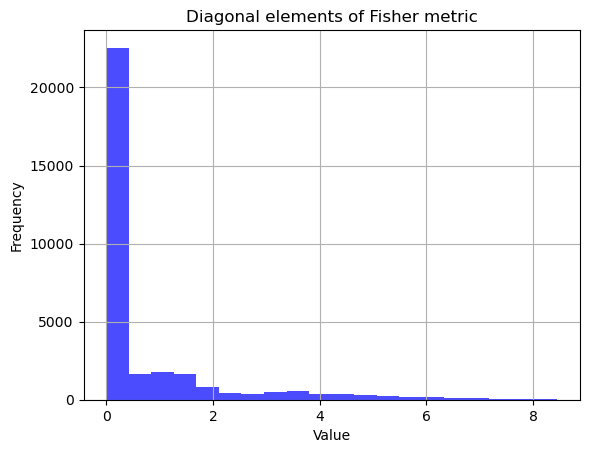

Mean diagonal FIM entry:  tensor(0.7148)


In [10]:
# Distribution of diagonal elements of FIM

# Plot the histogram
plt.hist(fim, bins=20, color='blue', alpha=0.7)
plt.title('Diagonal elements of Fisher metric')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('plots/hist_diag_elmts.pdf')
plt.show()


print('Mean diagonal FIM entry: ', fim.mean())

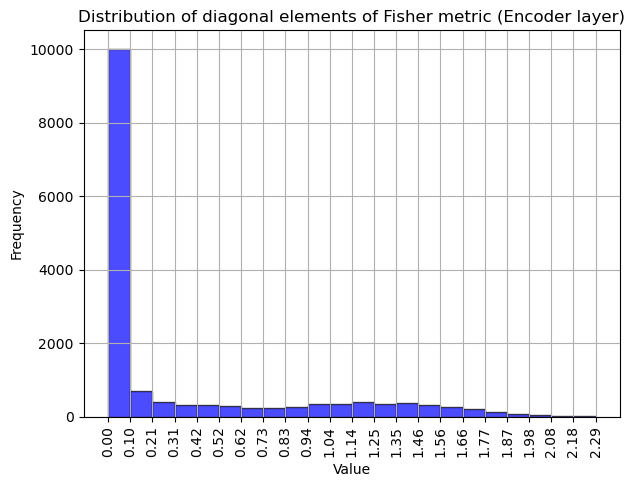

In [43]:

import numpy as np

 # Calculate the histogram without plotting it to get the bin edges
no_bins = 22
hist, bin_edges = np.histogram(fim[:15680], bins=no_bins)


# Plot the histogram with numerical bin boundaries
plt.hist(fim[:15680], bins=no_bins, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of diagonal elements of Fisher metric (Encoder layer)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
# Set x-axis ticks to display bin boundaries at alternate heights
xtick_positions = bin_edges[::1]  # Get every other bin edge
xtick_labels = [f'{edge:.2f}' for edge in xtick_positions]  # Format labels

# Set the x-axis ticks with vertical labels
plt.xticks(xtick_positions, xtick_labels, rotation=90)

plt.savefig('plots/hist_enc_diag_elmts_ticks.pdf')

## Pruned metric plots

In [12]:
from nngeometry.object import PMatDiag, PMatDense
from nngeometry.metrics import FIM
from nngeometry.layercollection import LayerCollection
import copy

Lambda:  0.0
[15680 15700 31380 32164]
Removed 5496 params


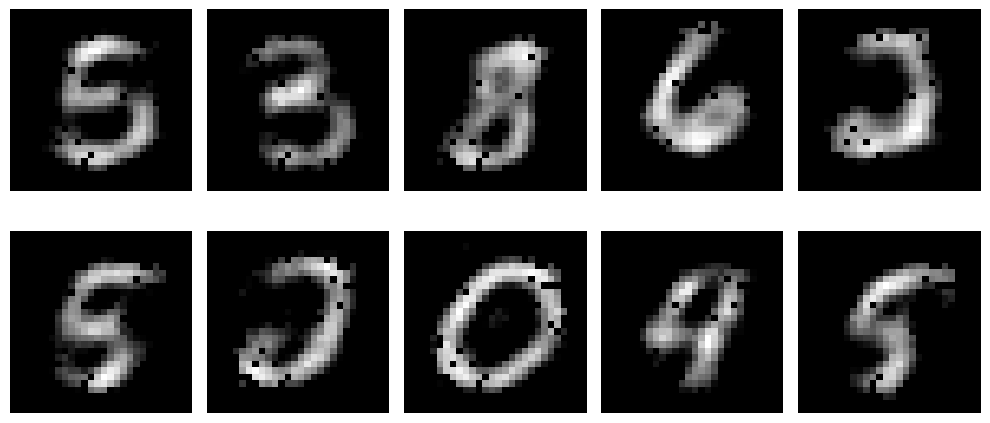

Lambda:  0.001
[15680 15700 31380 32164]
Removed 6807 params


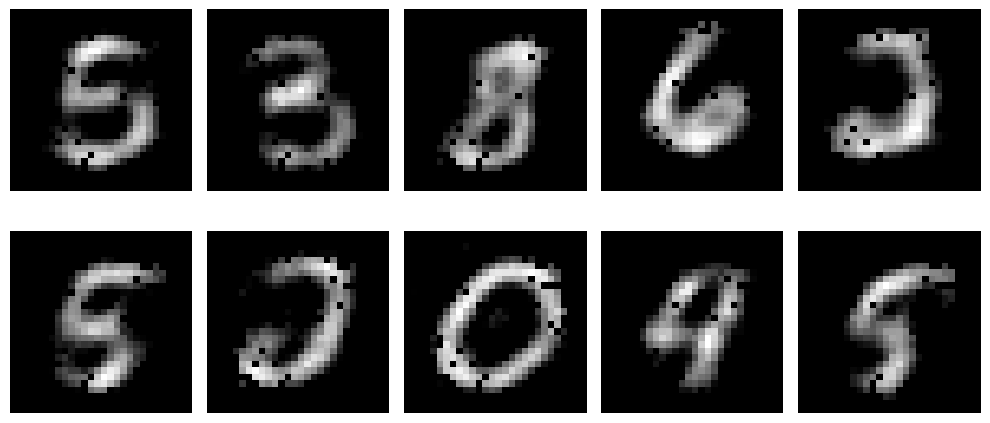

Lambda:  0.002
[15680 15700 31380 32164]
Removed 7179 params


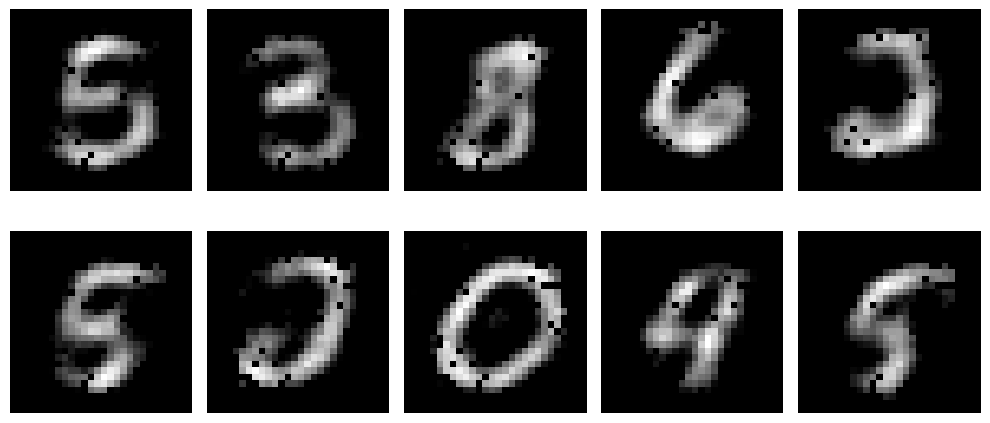

Lambda:  0.003
[15680 15700 31380 32164]
Removed 7427 params


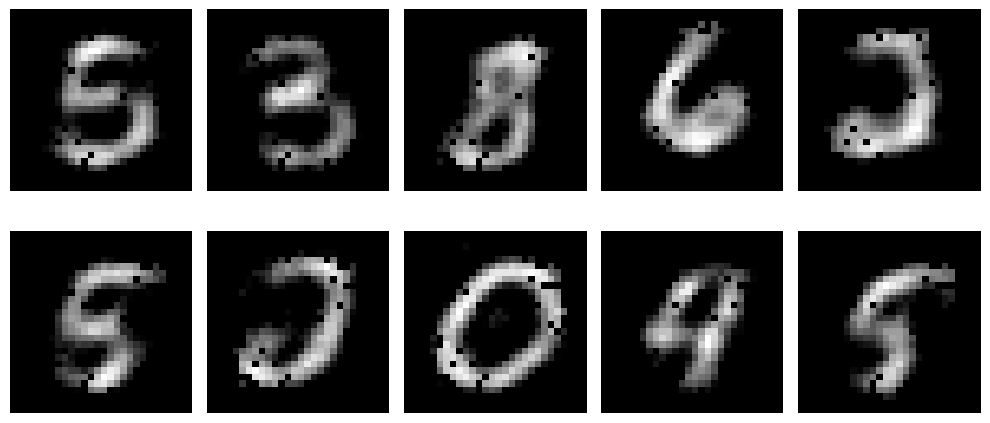

Lambda:  0.004
[15680 15700 31380 32164]
Removed 7578 params


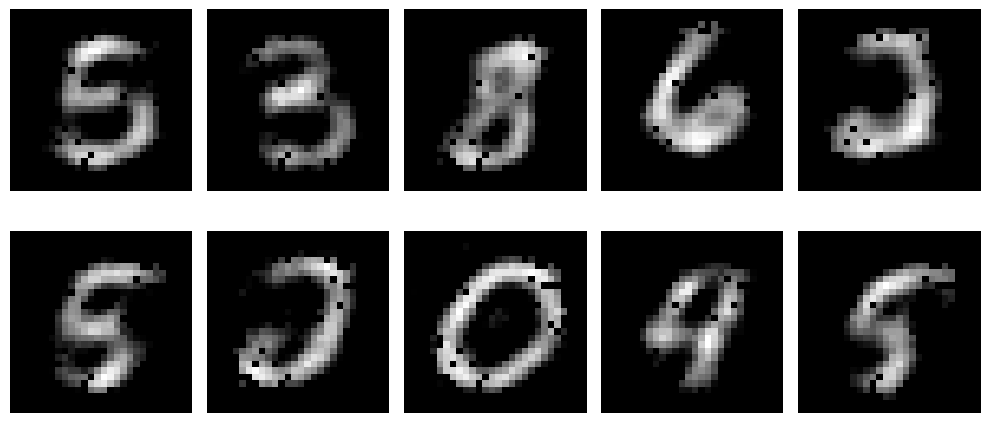

Lambda:  0.005
[15680 15700 31380 32164]
Removed 7740 params


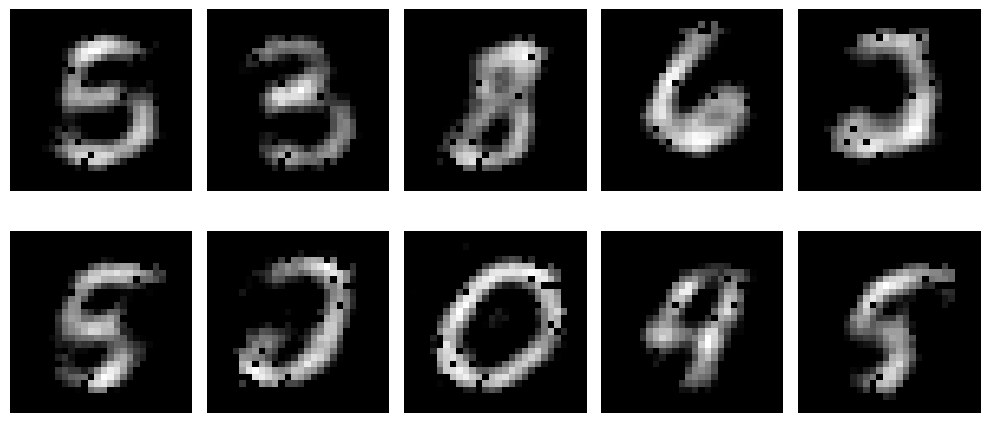

Lambda:  0.006
[15680 15700 31380 32164]
Removed 7865 params


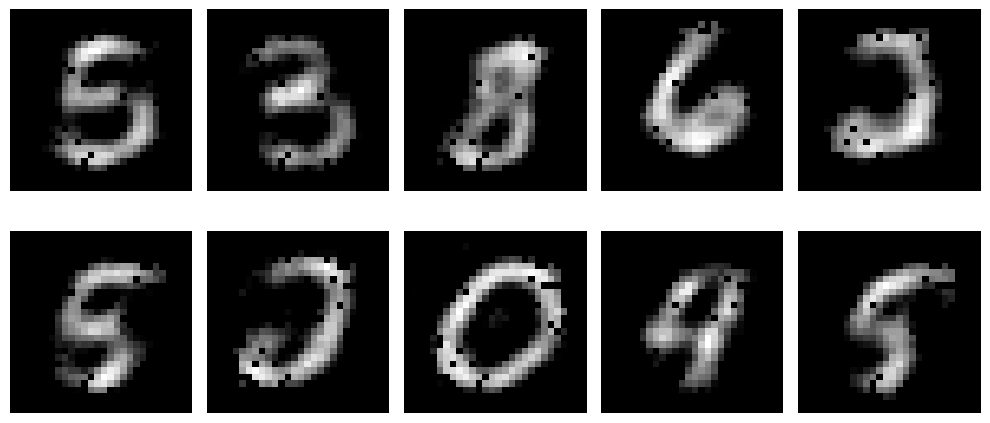

Lambda:  0.007
[15680 15700 31380 32164]
Removed 7975 params


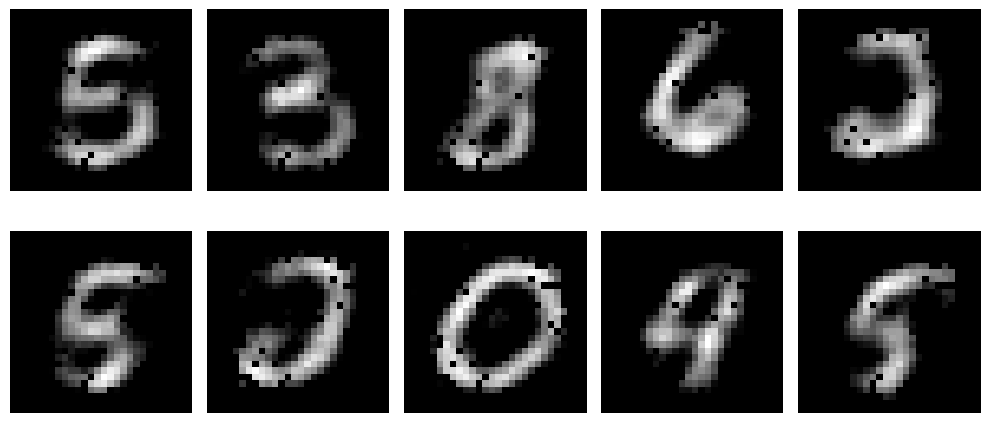

Lambda:  0.008
[15680 15700 31380 32164]
Removed 8051 params


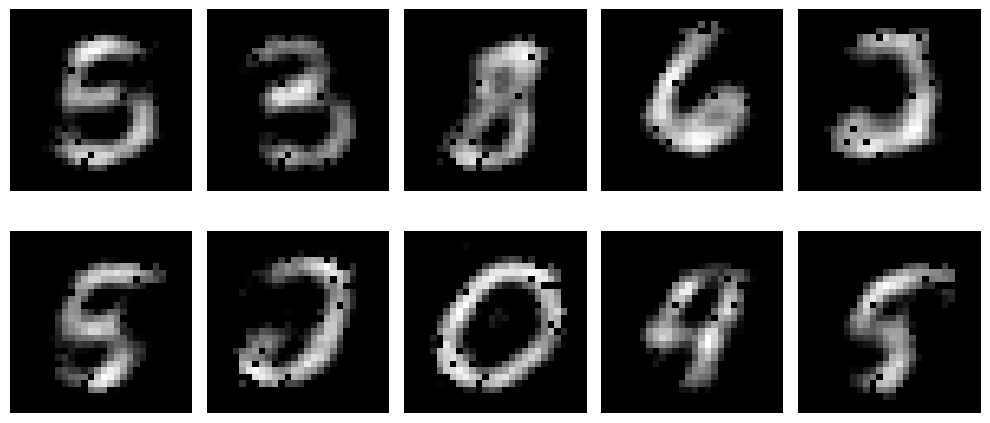

Lambda:  0.009
[15680 15700 31380 32164]
Removed 8112 params


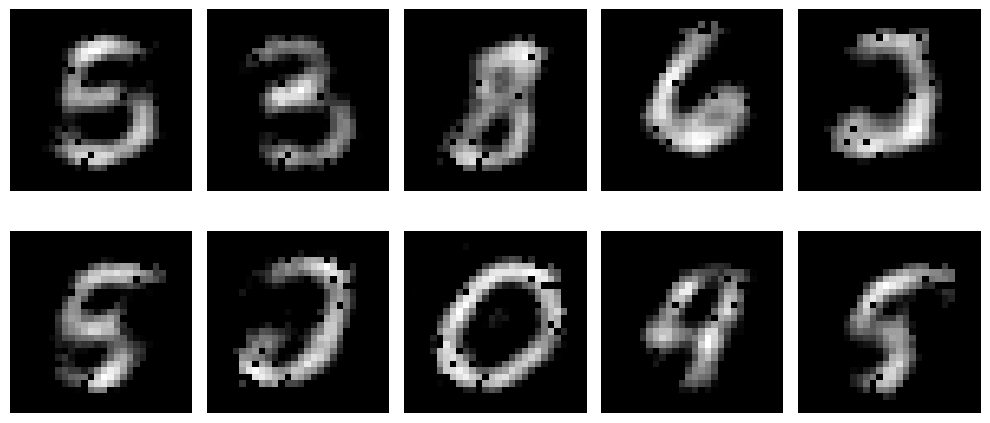

Lambda:  0.01
[15680 15700 31380 32164]
Removed 8161 params


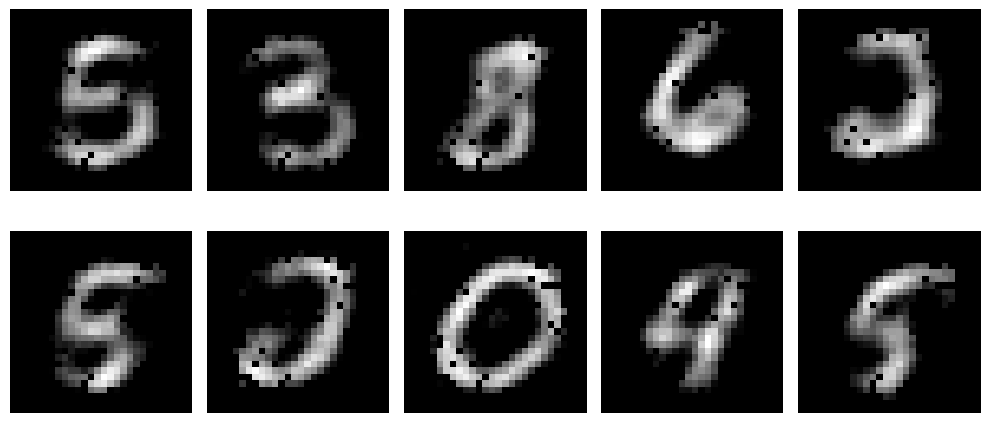

Lambda:  0.011
[15680 15700 31380 32164]
Removed 8212 params


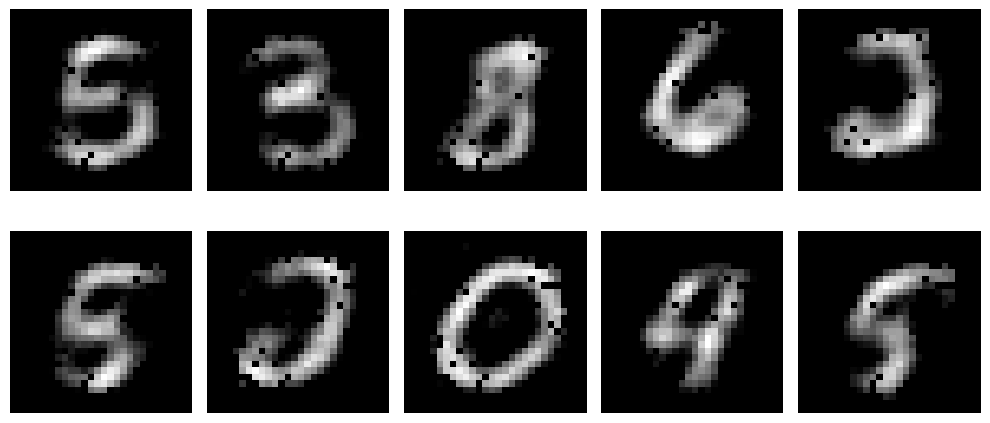

Lambda:  0.012
[15680 15700 31380 32164]
Removed 8268 params


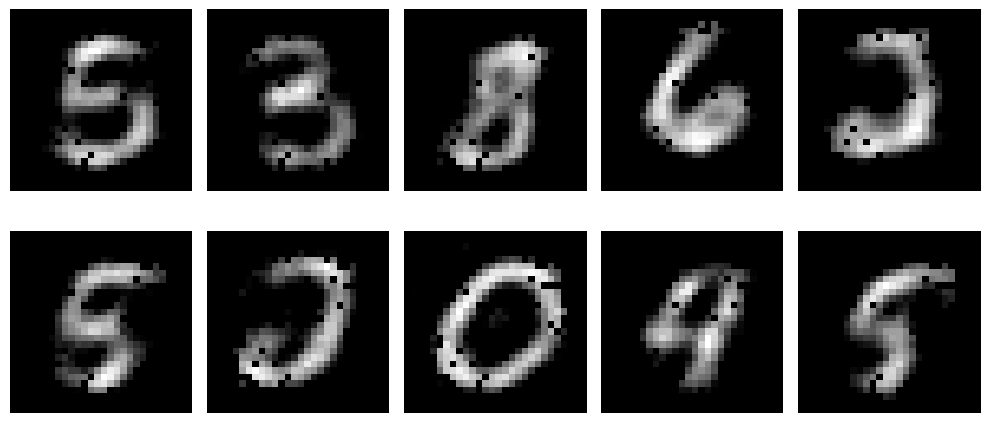

Lambda:  0.013
[15680 15700 31380 32164]
Removed 8323 params


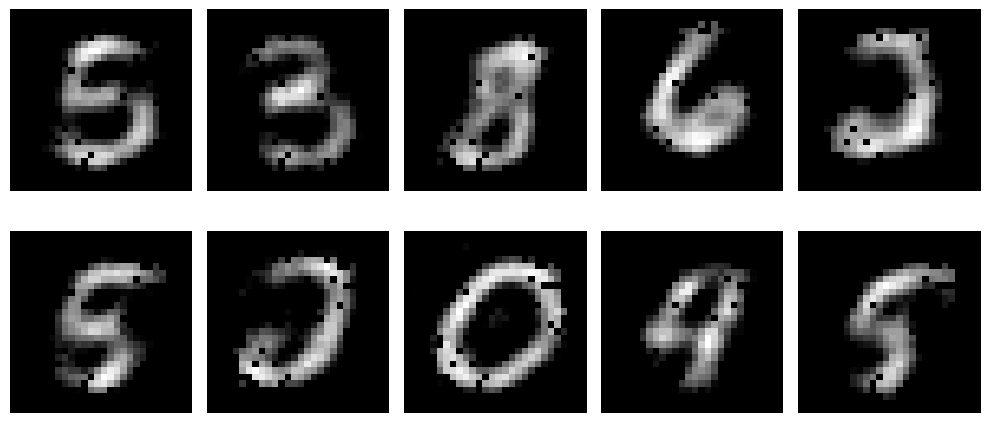

Lambda:  0.014
[15680 15700 31380 32164]
Removed 8368 params


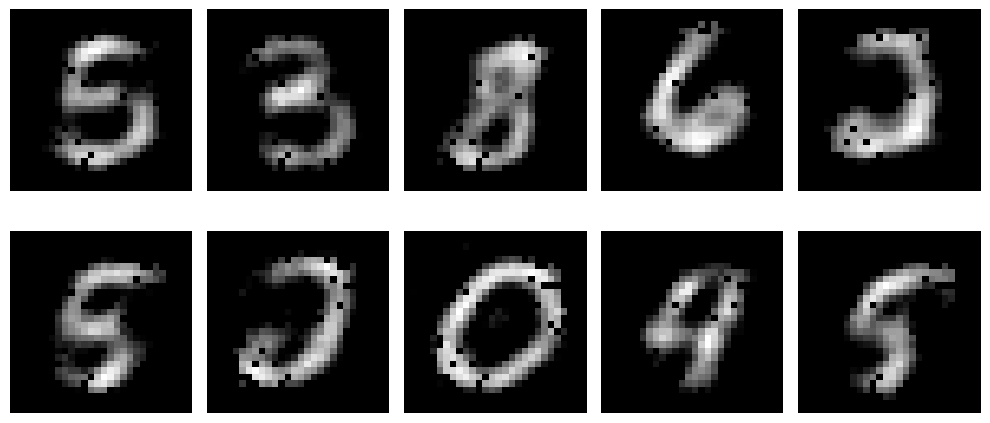

Lambda:  0.015
[15680 15700 31380 32164]
Removed 8413 params


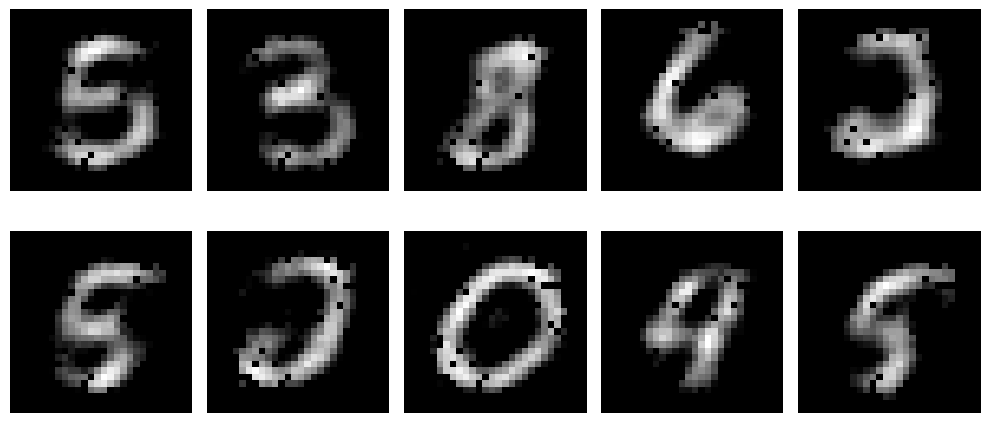

Lambda:  0.016
[15680 15700 31380 32164]
Removed 8463 params


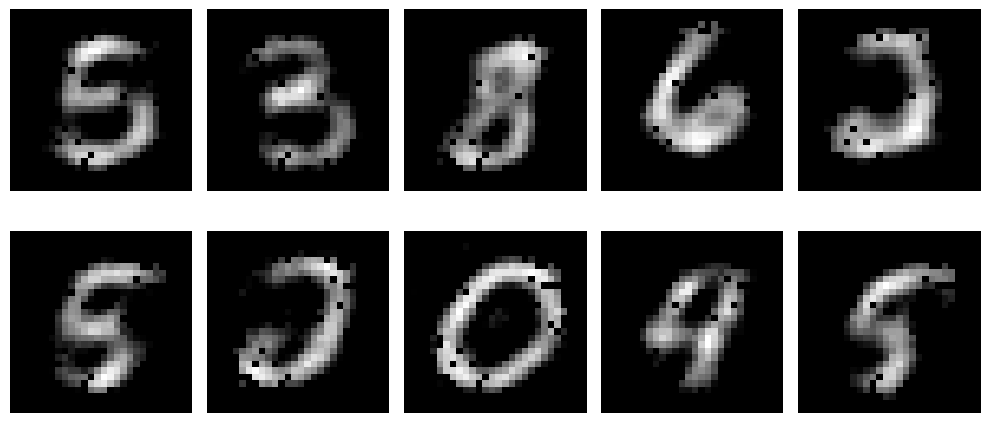

Lambda:  0.017
[15680 15700 31380 32164]
Removed 8508 params


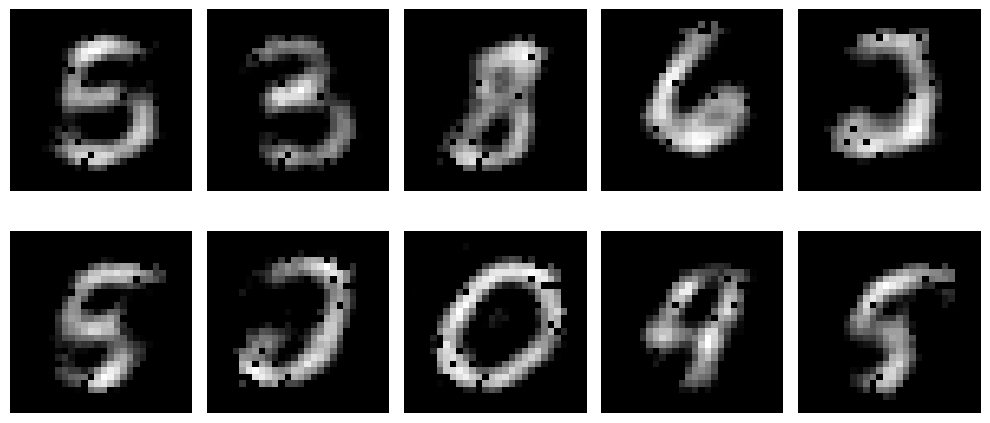

Lambda:  0.018
[15680 15700 31380 32164]
Removed 8530 params


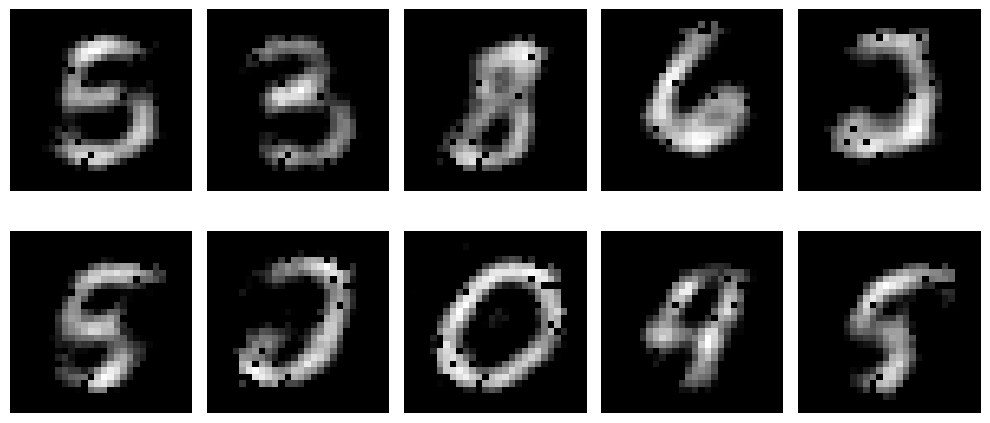

Lambda:  0.019
[15680 15700 31380 32164]
Removed 8563 params


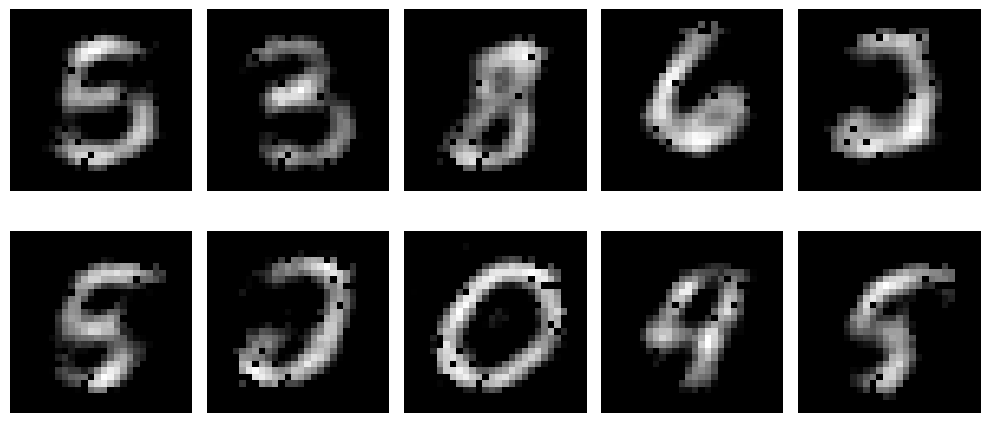

Lambda:  0.02
[15680 15700 31380 32164]
Removed 8601 params


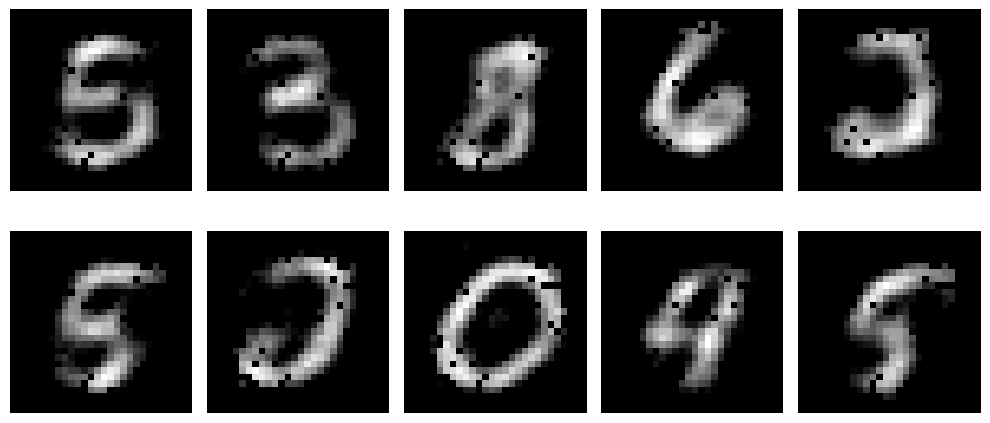

Lambda:  0.021
[15680 15700 31380 32164]
Removed 8624 params


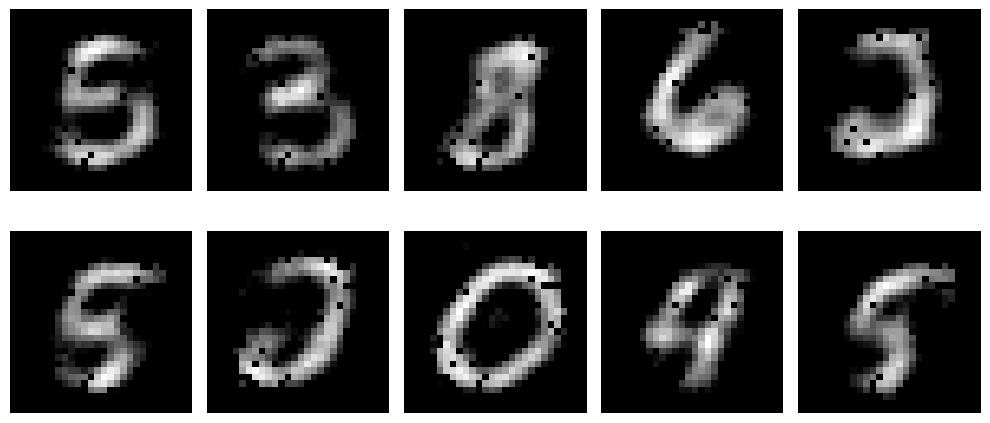

Lambda:  0.022
[15680 15700 31380 32164]
Removed 8654 params


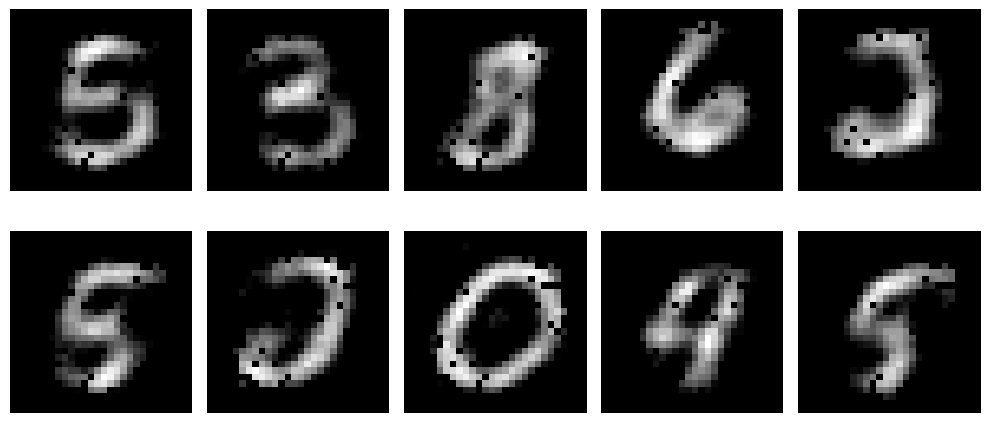

Lambda:  0.023
[15680 15700 31380 32164]
Removed 8676 params


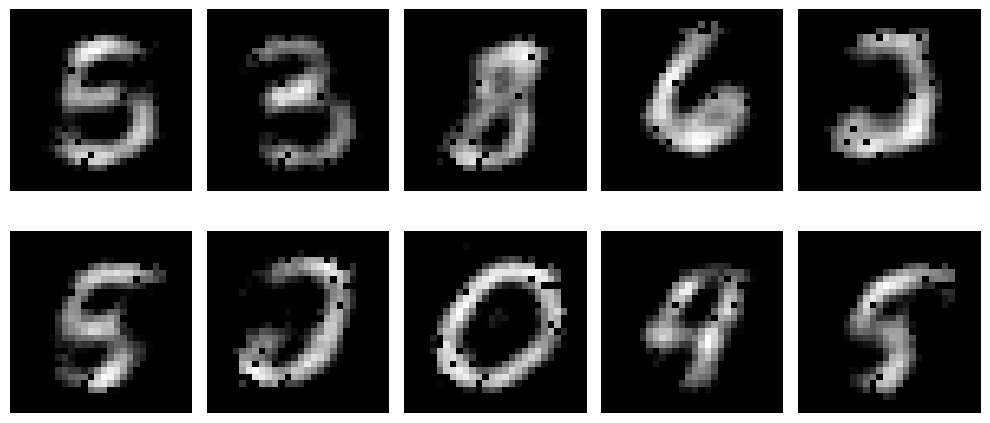

Lambda:  0.024
[15680 15700 31380 32164]
Removed 8695 params


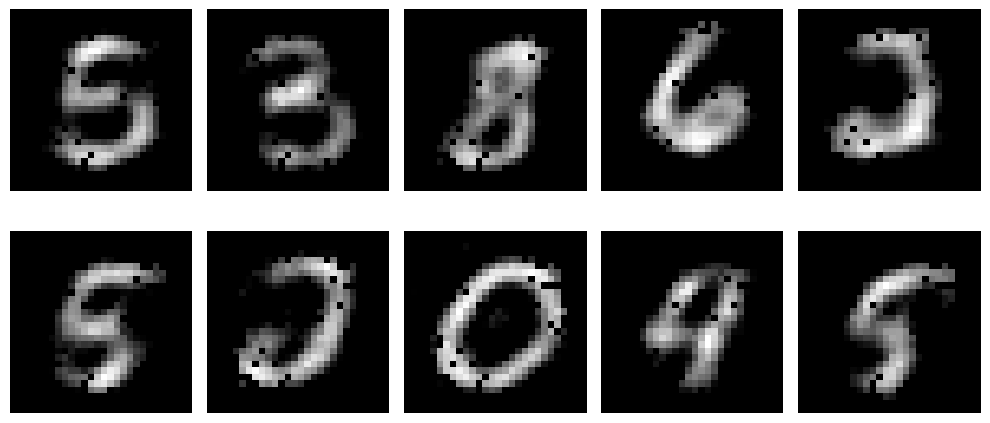

Lambda:  0.025
[15680 15700 31380 32164]
Removed 8729 params


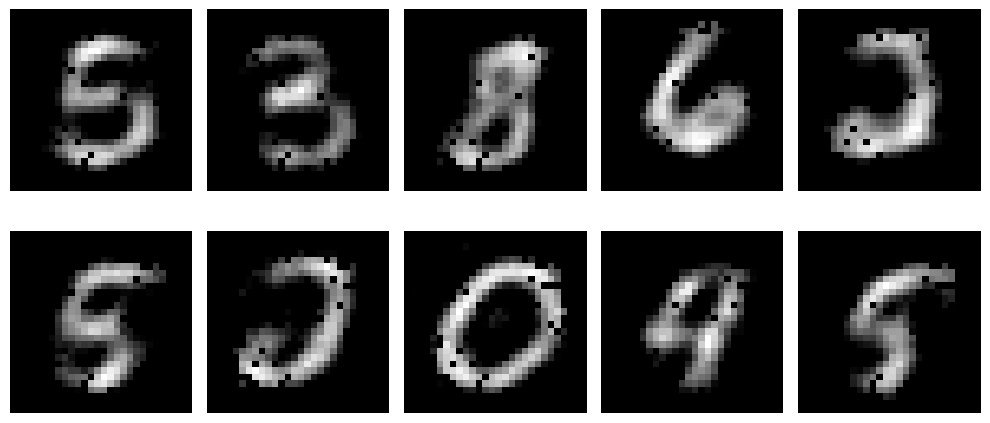

Lambda:  0.026
[15680 15700 31380 32164]
Removed 8757 params


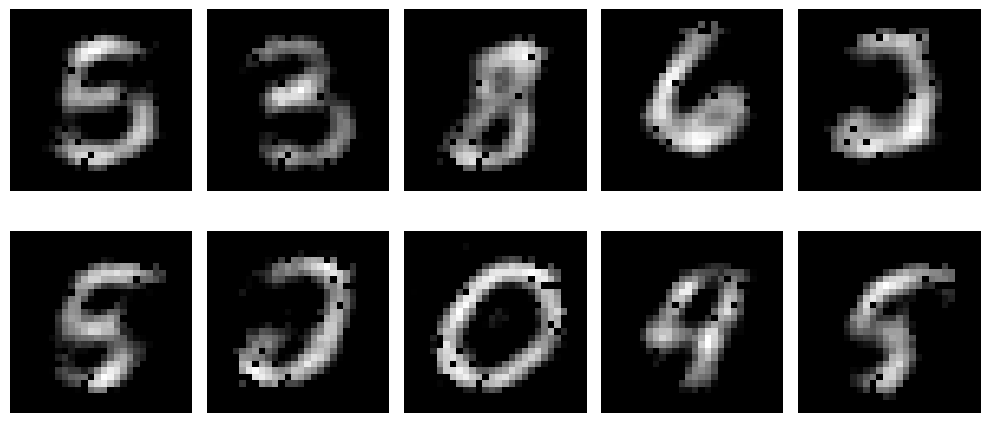

Lambda:  0.027
[15680 15700 31380 32164]
Removed 8775 params


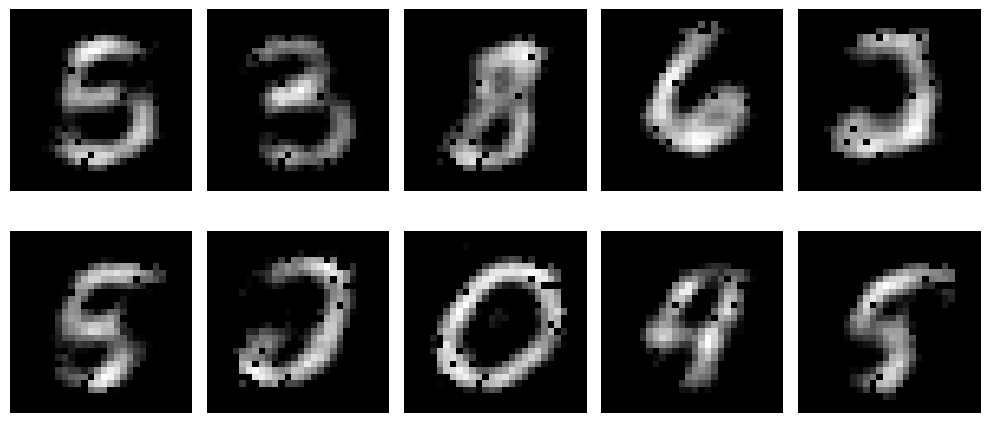

Lambda:  0.028
[15680 15700 31380 32164]
Removed 8810 params


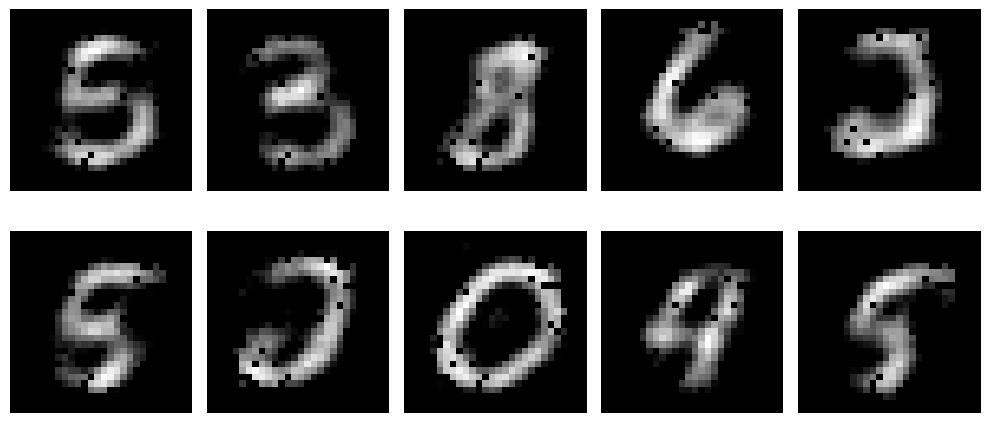

Lambda:  0.029
[15680 15700 31380 32164]
Removed 8837 params


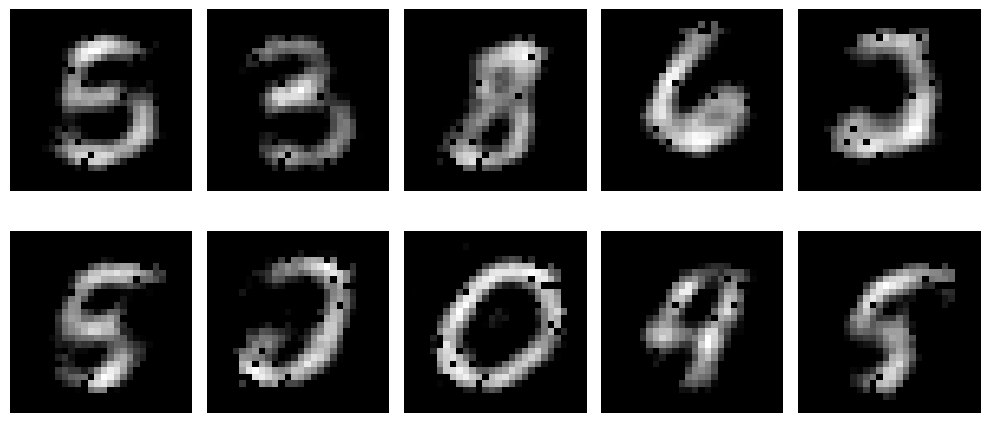

Lambda:  0.03
[15680 15700 31380 32164]
Removed 8875 params


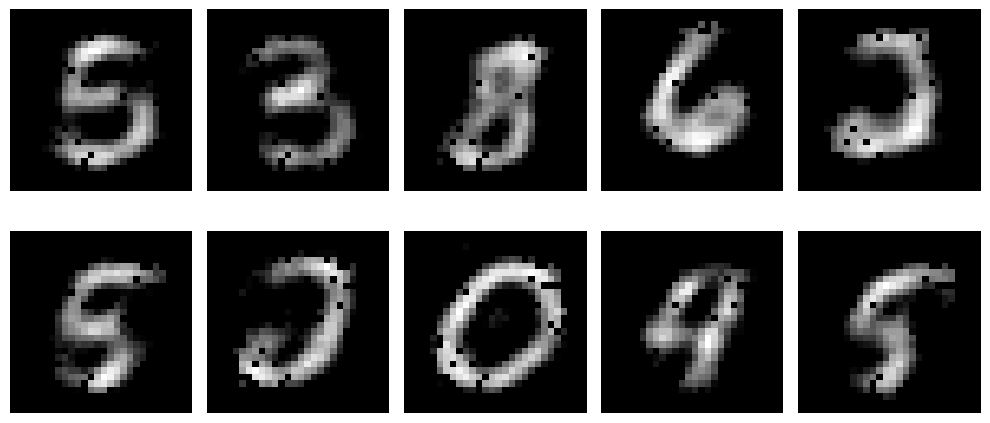

Lambda:  0.031
[15680 15700 31380 32164]
Removed 8901 params


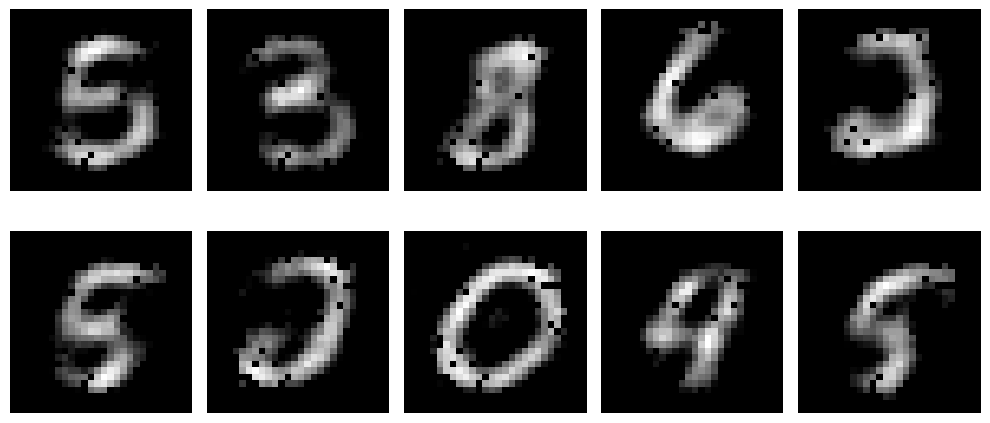

Lambda:  0.032
[15680 15700 31380 32164]
Removed 8932 params


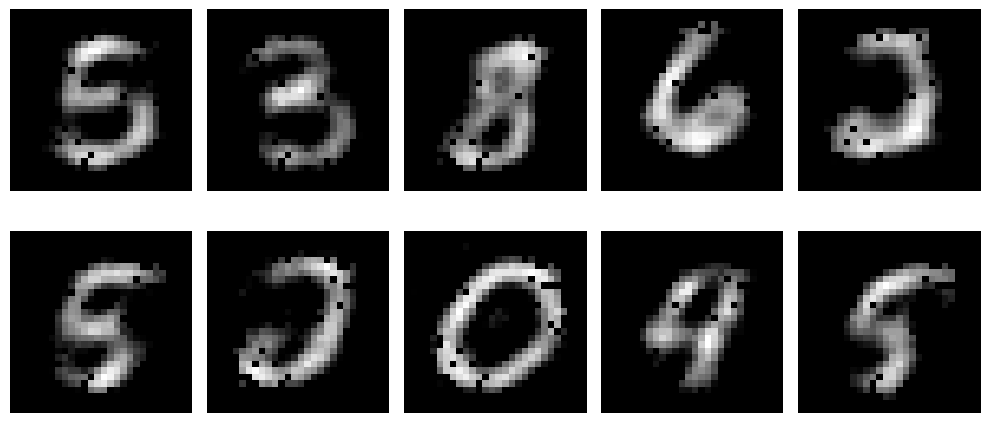

Lambda:  0.033
[15680 15700 31380 32164]
Removed 8957 params


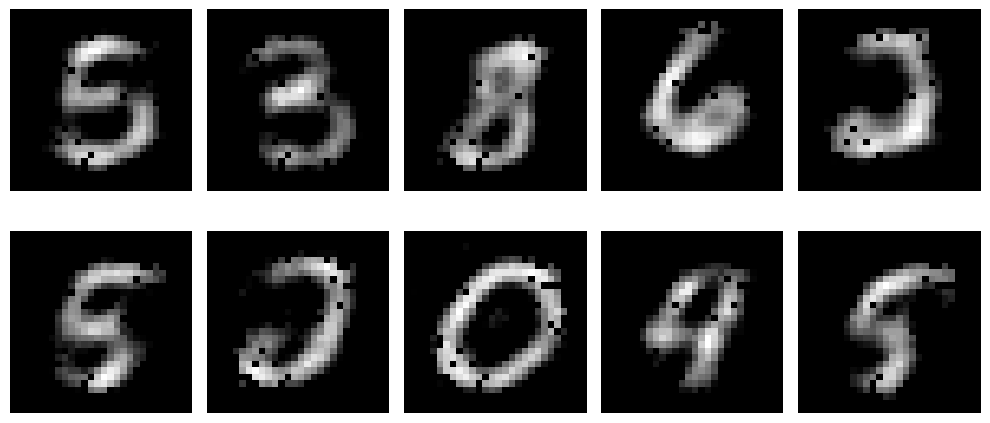

Lambda:  0.034
[15680 15700 31380 32164]
Removed 8983 params


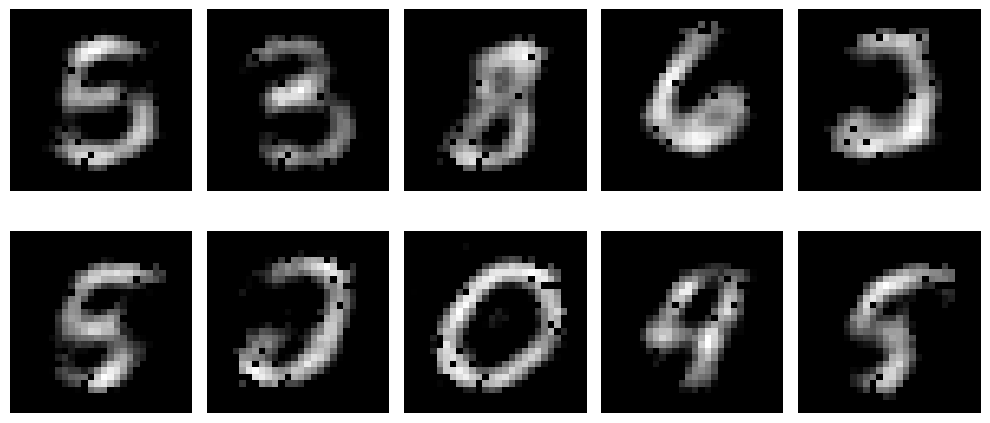

Lambda:  0.035
[15680 15700 31380 32164]
Removed 9003 params


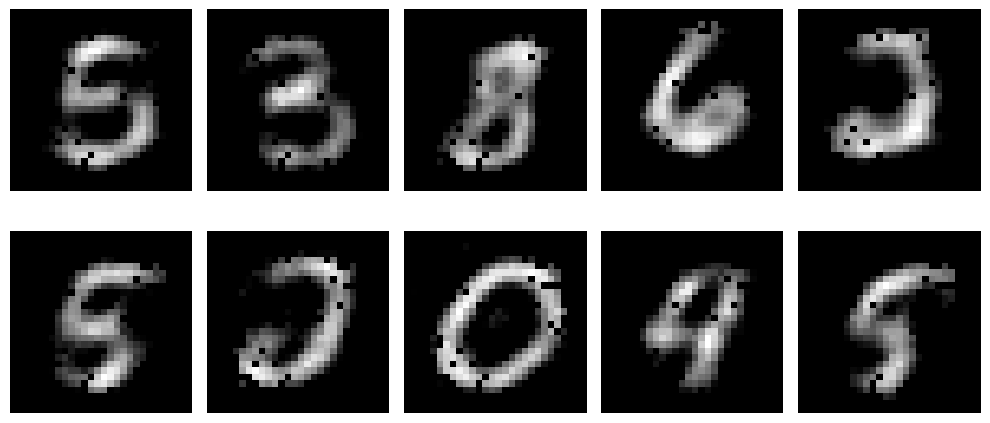

Lambda:  0.036
[15680 15700 31380 32164]
Removed 9027 params


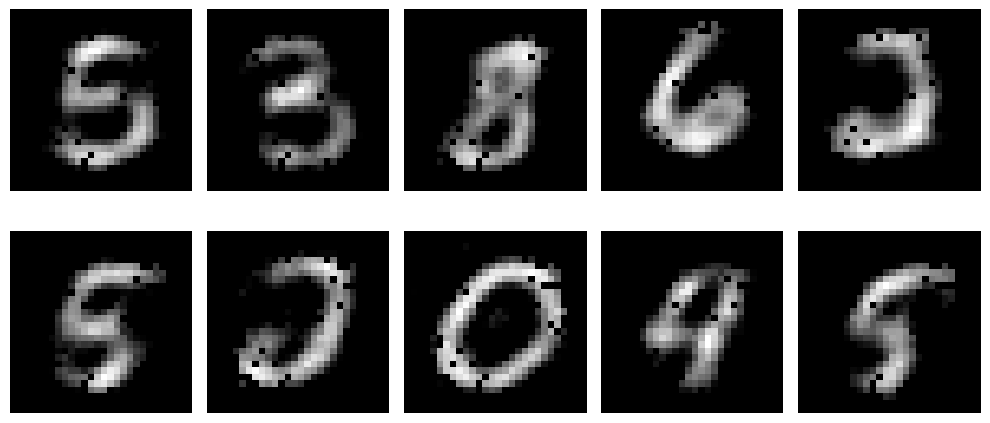

Lambda:  0.037
[15680 15700 31380 32164]
Removed 9049 params


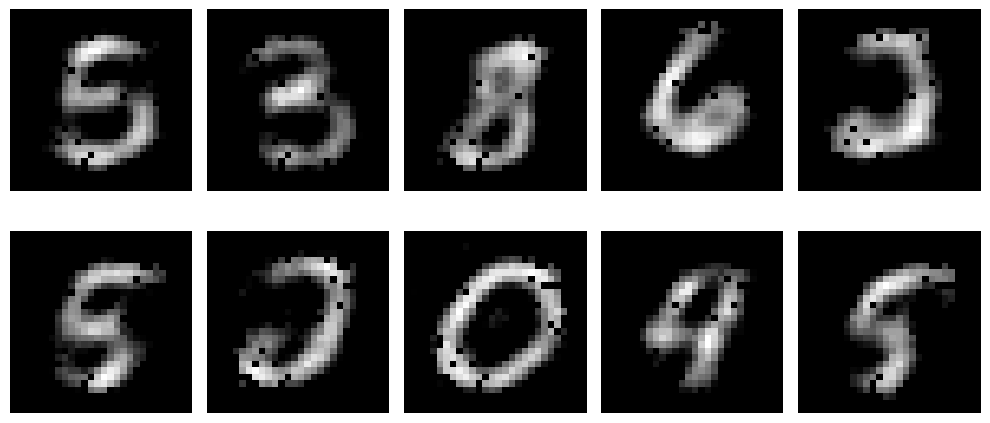

Lambda:  0.038
[15680 15700 31380 32164]
Removed 9067 params


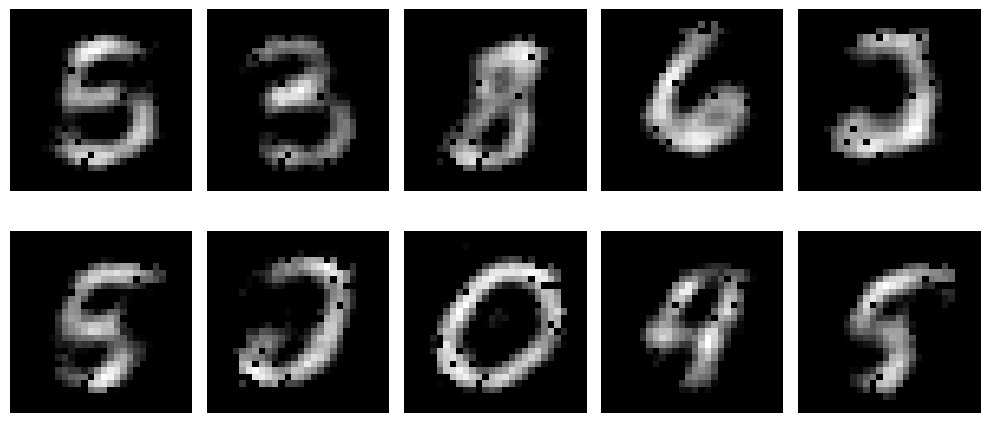

Lambda:  0.039
[15680 15700 31380 32164]
Removed 9096 params


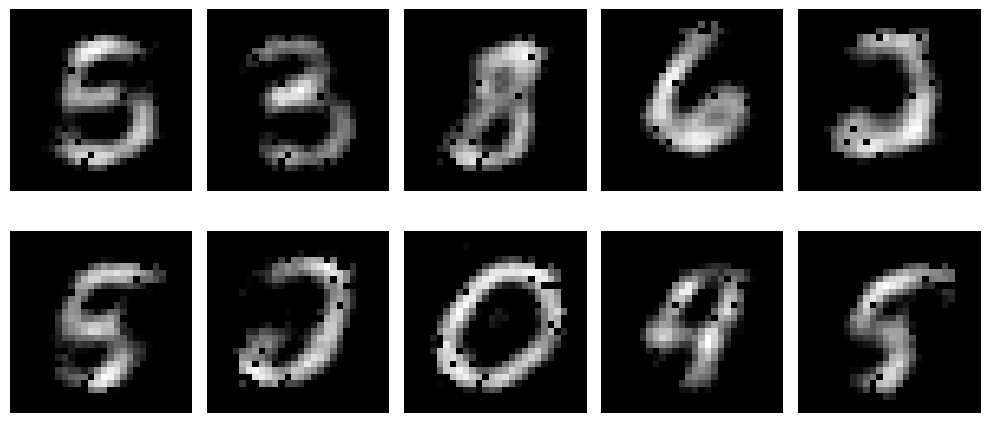

Lambda:  0.04
[15680 15700 31380 32164]
Removed 9123 params


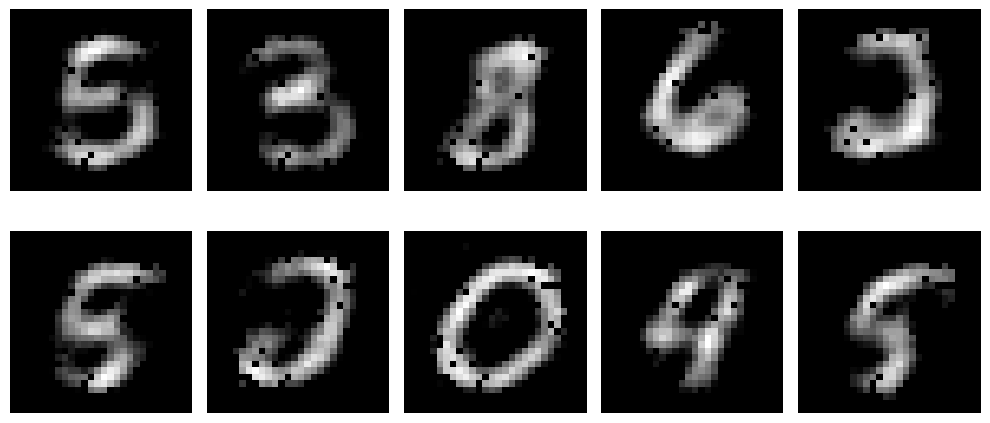

Lambda:  0.041
[15680 15700 31380 32164]
Removed 9149 params


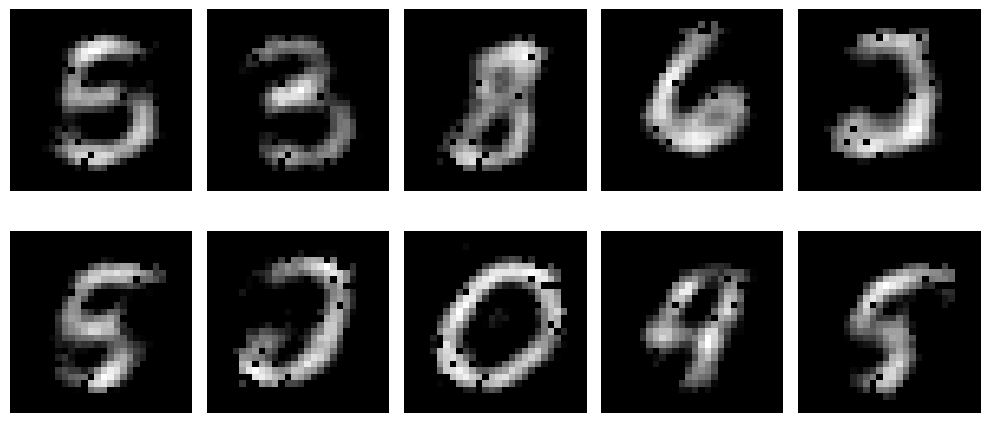

Lambda:  0.042
[15680 15700 31380 32164]
Removed 9179 params


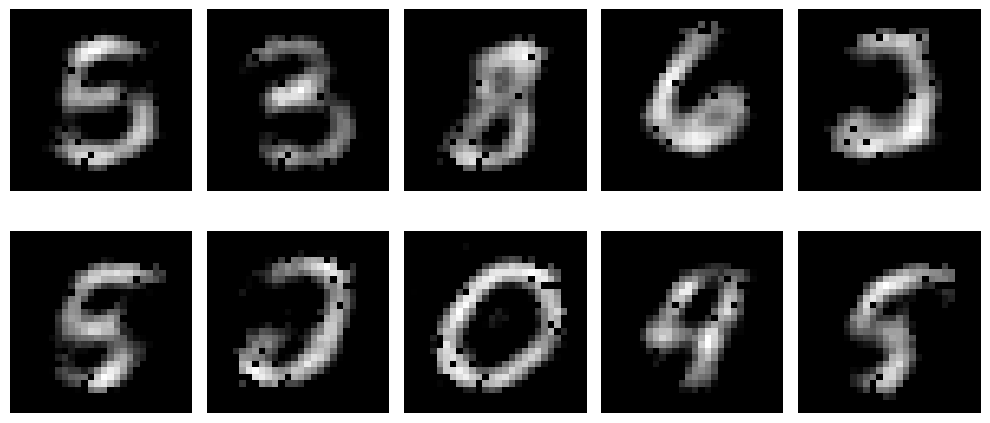

Lambda:  0.043
[15680 15700 31380 32164]
Removed 9201 params


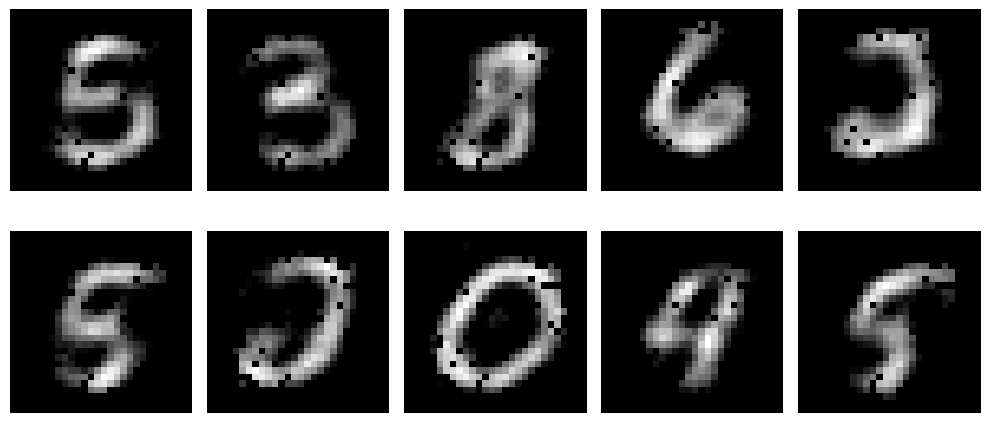

Lambda:  0.044
[15680 15700 31380 32164]
Removed 9218 params


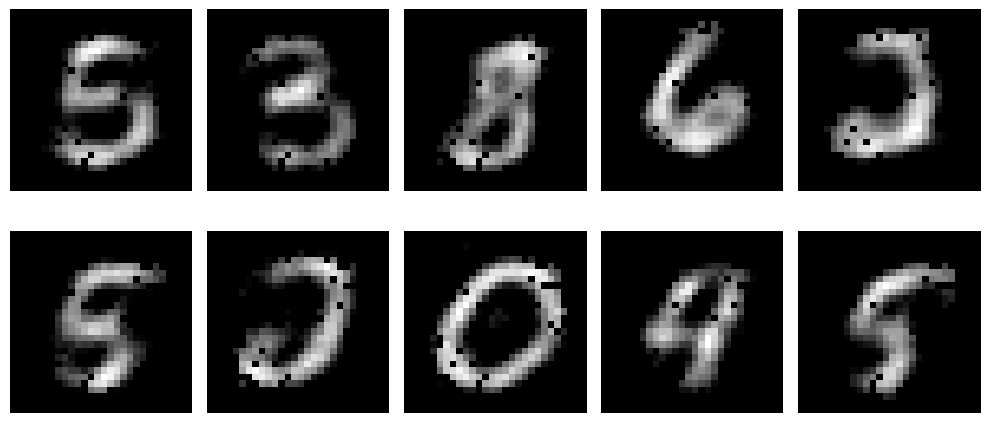

Lambda:  0.045
[15680 15700 31380 32164]
Removed 9244 params


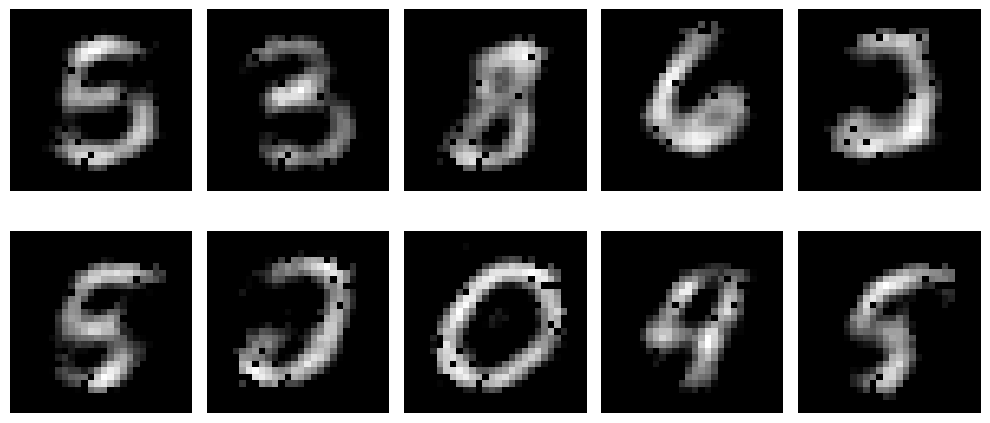

Lambda:  0.046
[15680 15700 31380 32164]
Removed 9262 params


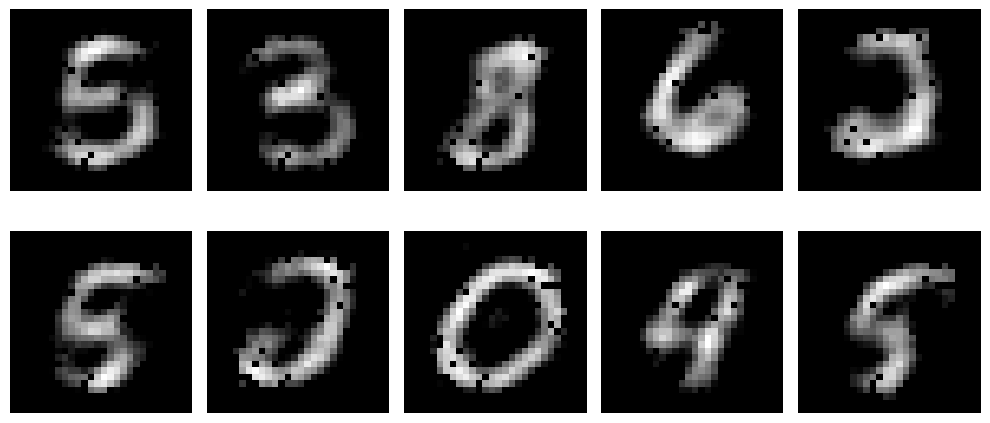

Lambda:  0.047
[15680 15700 31380 32164]
Removed 9278 params


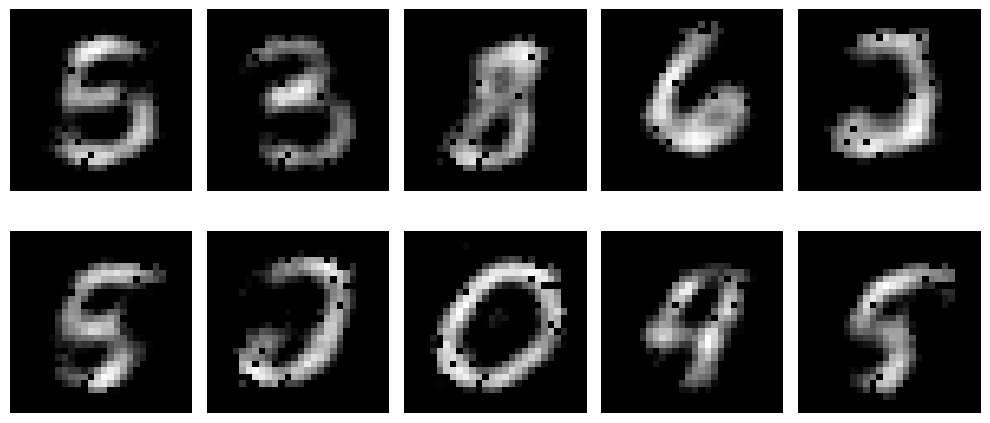

Lambda:  0.048
[15680 15700 31380 32164]
Removed 9297 params


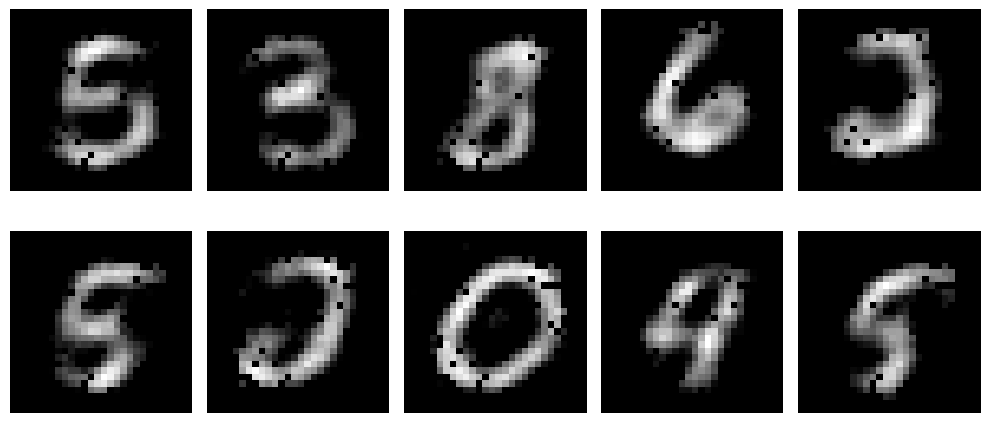

Lambda:  0.049
[15680 15700 31380 32164]
Removed 9318 params


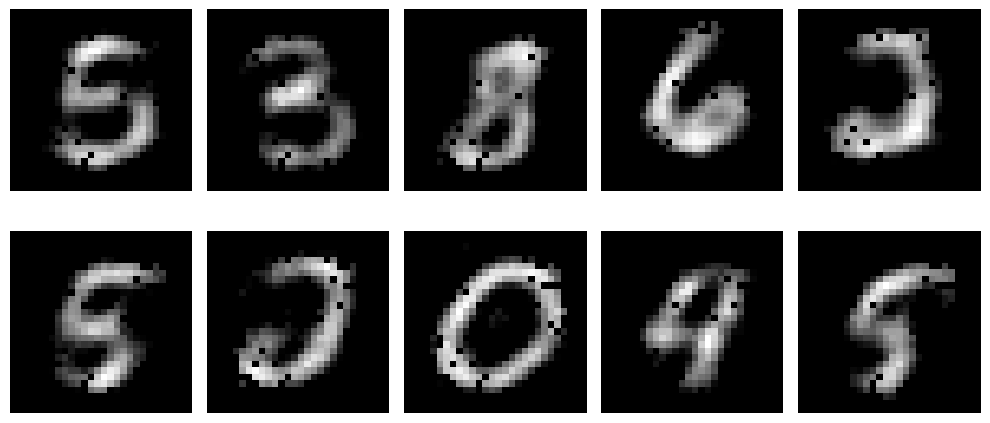

Lambda:  0.05
[15680 15700 31380 32164]
Removed 9335 params


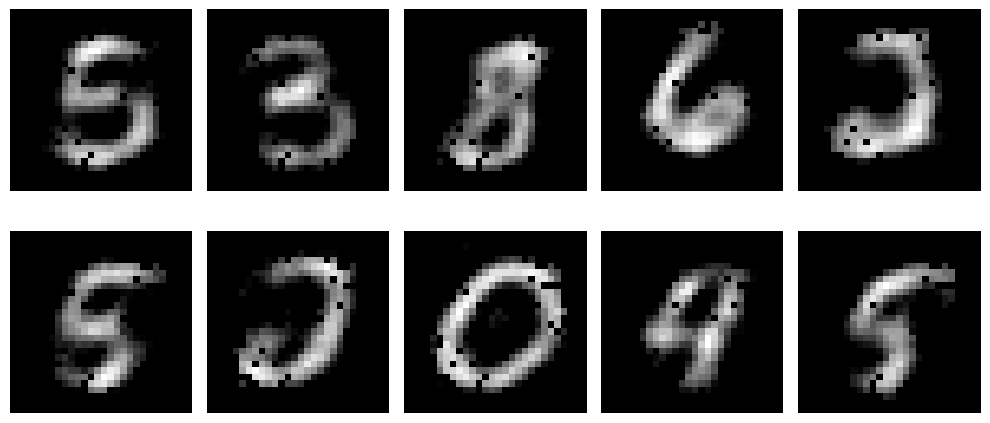

Lambda:  0.051
[15680 15700 31380 32164]
Removed 9353 params


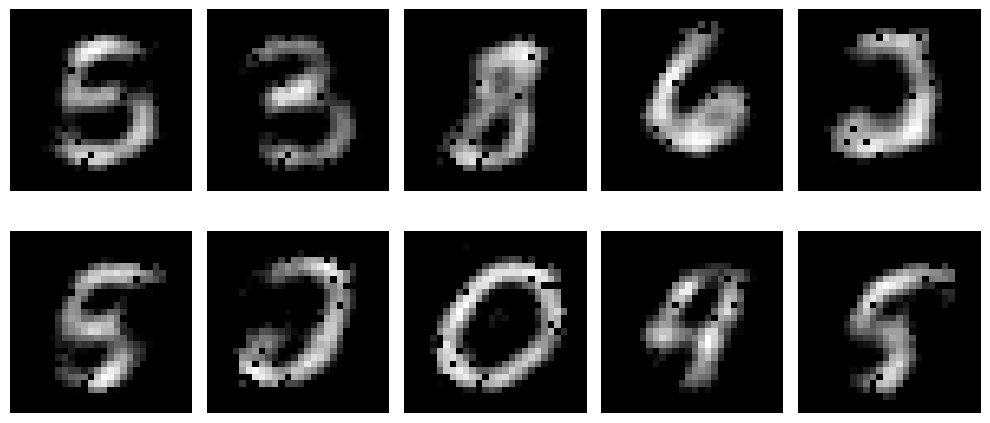

Lambda:  0.052
[15680 15700 31380 32164]
Removed 9376 params


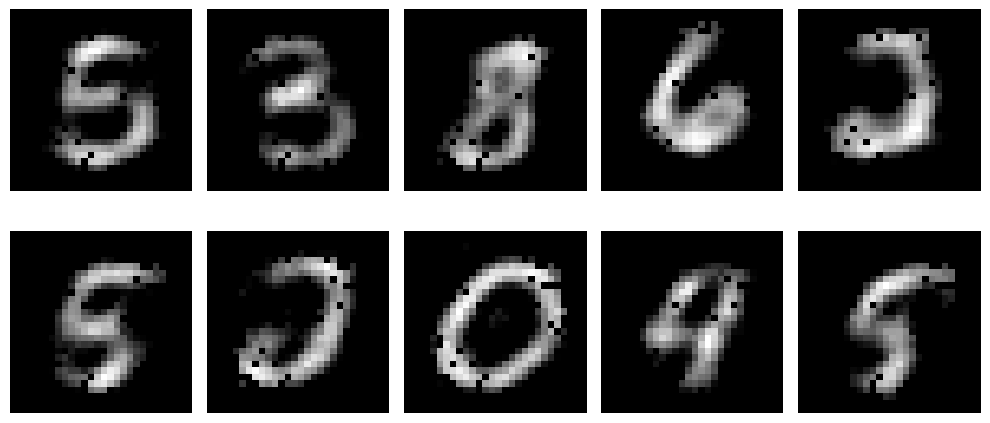

Lambda:  0.053
[15680 15700 31380 32164]
Removed 9391 params


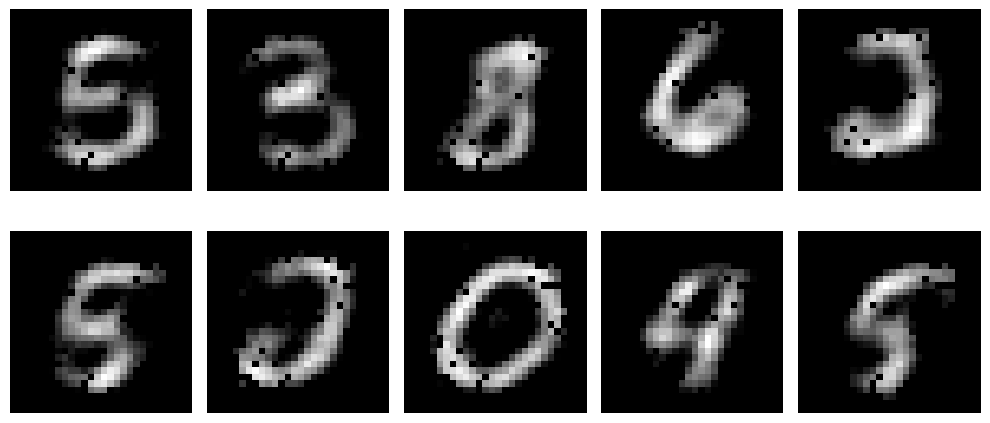

Lambda:  0.054
[15680 15700 31380 32164]
Removed 9408 params


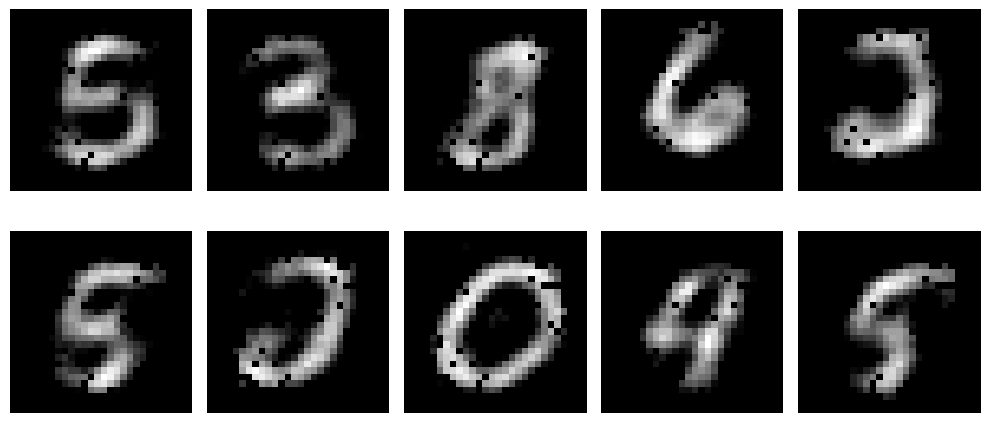

Lambda:  0.055
[15680 15700 31380 32164]
Removed 9419 params


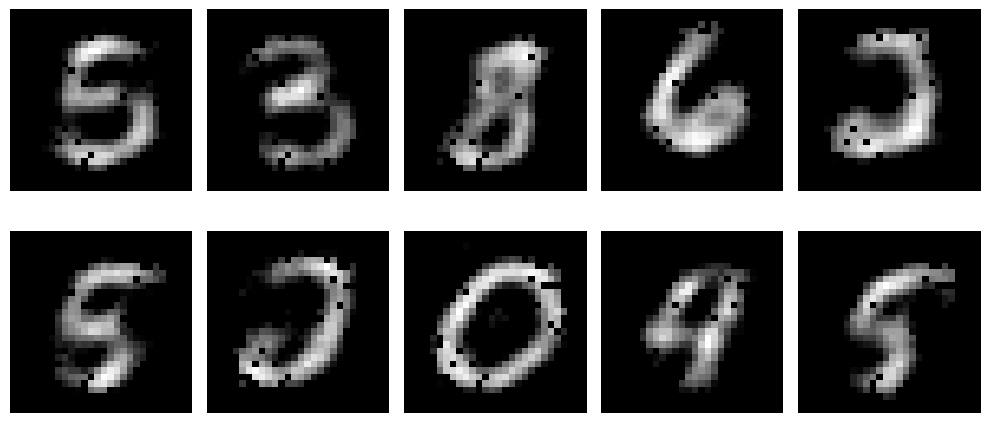

Lambda:  0.056
[15680 15700 31380 32164]
Removed 9431 params


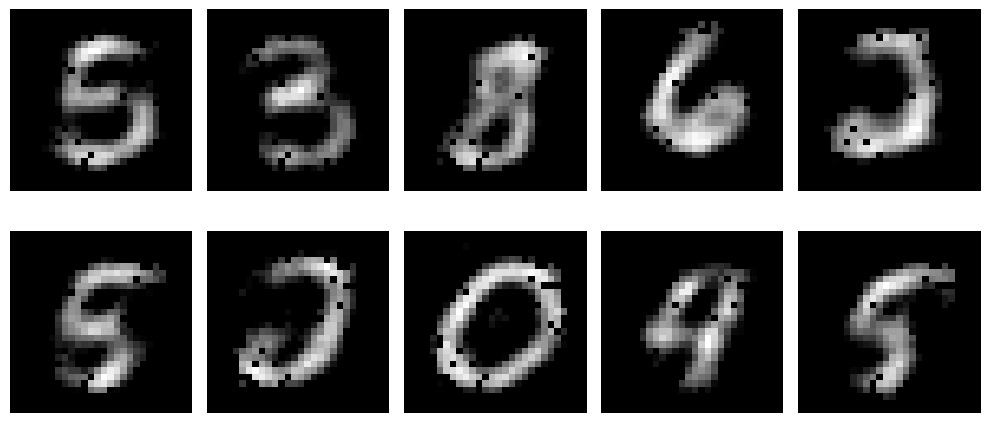

Lambda:  0.057
[15680 15700 31380 32164]
Removed 9445 params


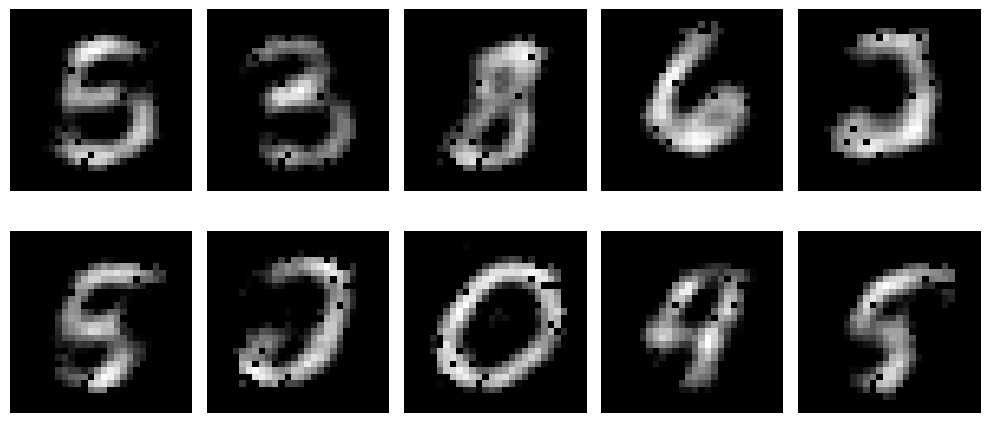

Lambda:  0.058
[15680 15700 31380 32164]
Removed 9463 params


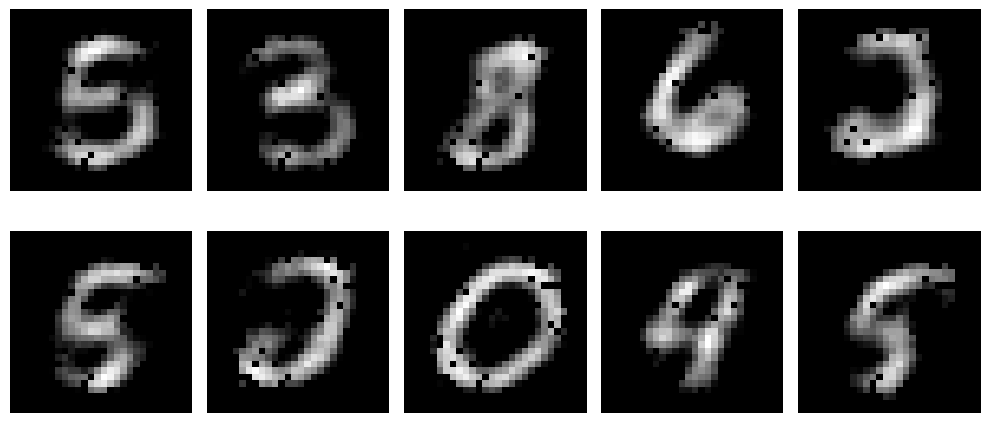

Lambda:  0.059
[15680 15700 31380 32164]
Removed 9478 params


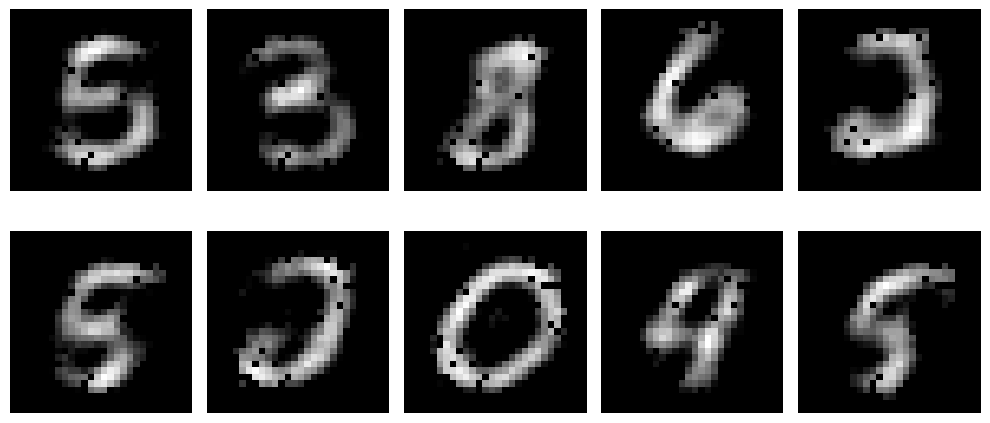

Lambda:  0.06
[15680 15700 31380 32164]
Removed 9494 params


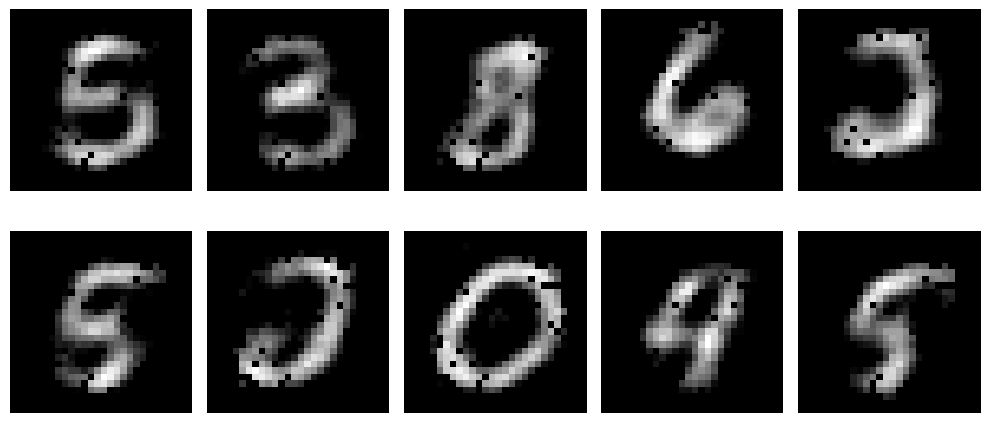

Lambda:  0.061
[15680 15700 31380 32164]
Removed 9506 params


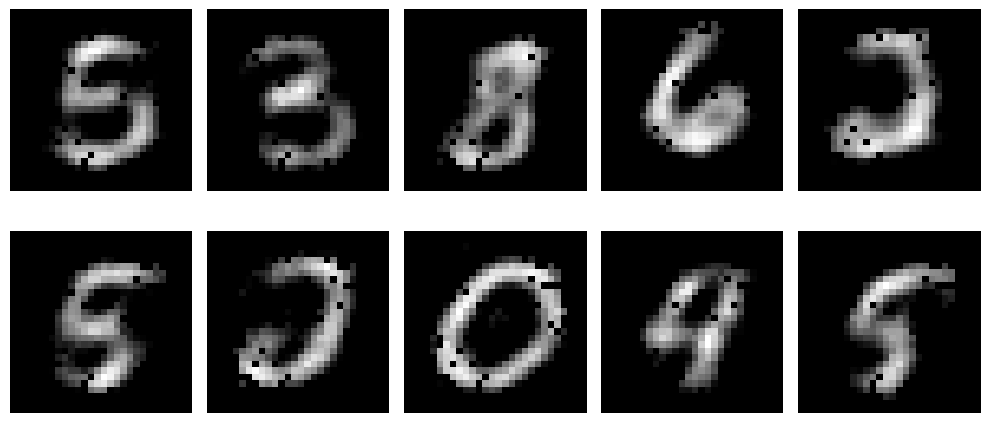

Lambda:  0.062
[15680 15700 31380 32164]
Removed 9523 params


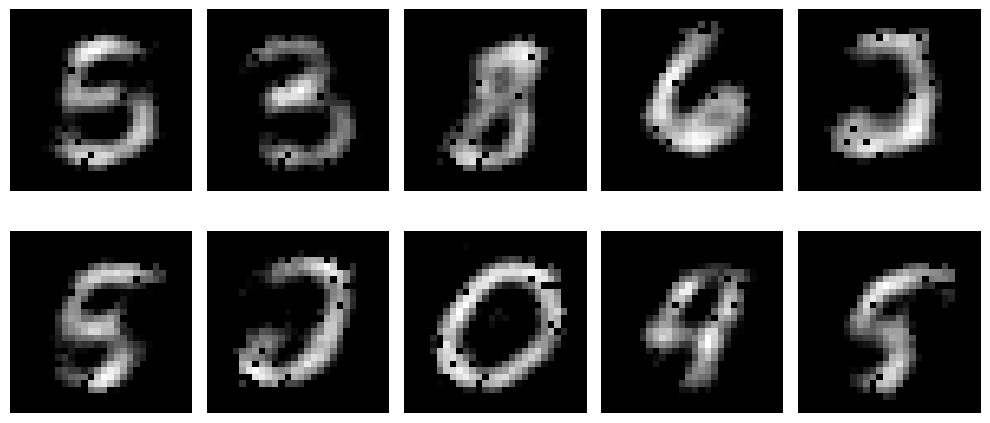

Lambda:  0.063
[15680 15700 31380 32164]
Removed 9537 params


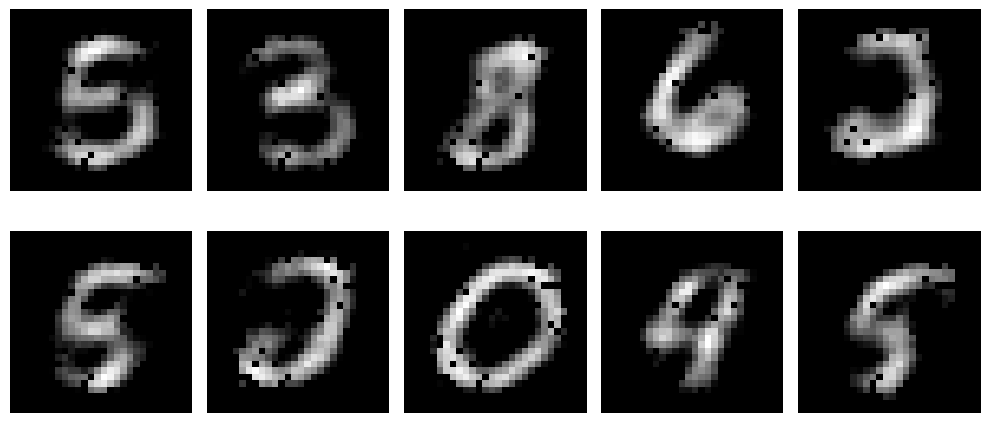

Lambda:  0.064
[15680 15700 31380 32164]
Removed 9556 params


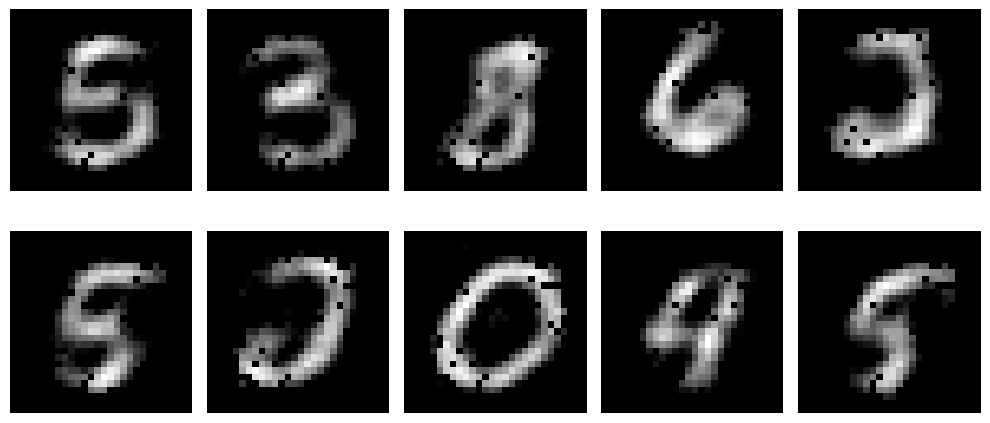

Lambda:  0.065
[15680 15700 31380 32164]
Removed 9573 params


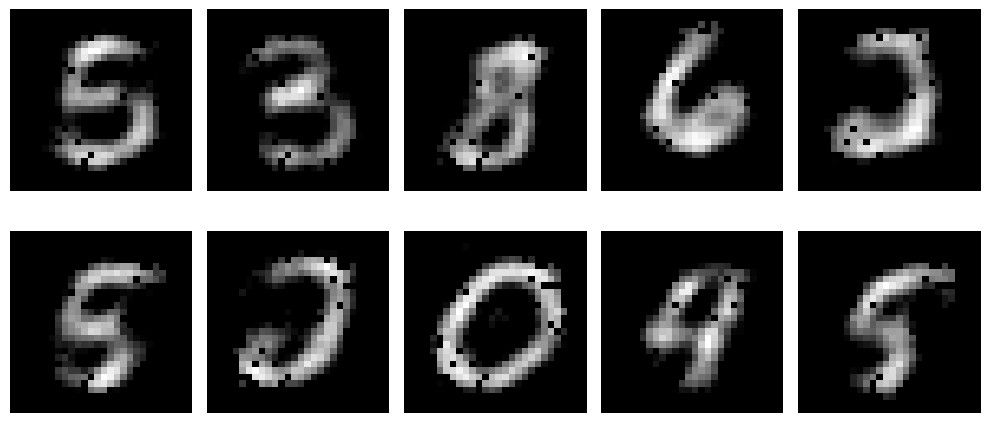

Lambda:  0.066
[15680 15700 31380 32164]
Removed 9587 params


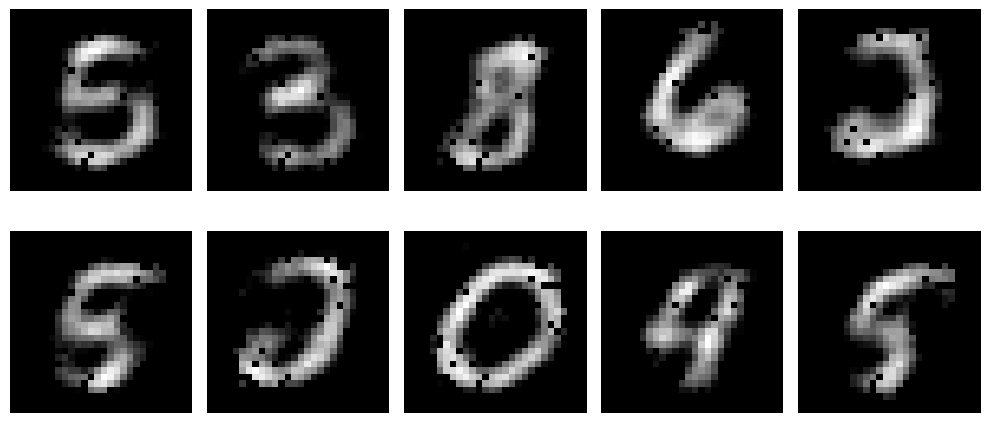

Lambda:  0.067
[15680 15700 31380 32164]
Removed 9600 params


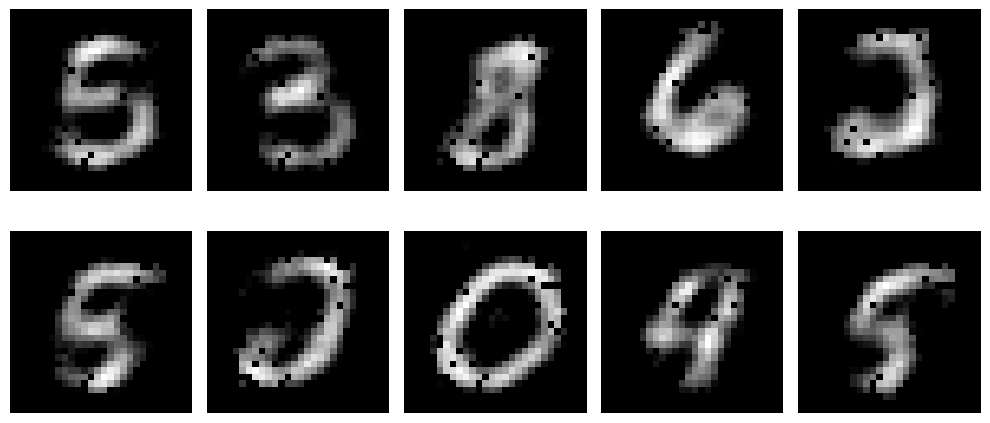

Lambda:  0.068
[15680 15700 31380 32164]
Removed 9621 params


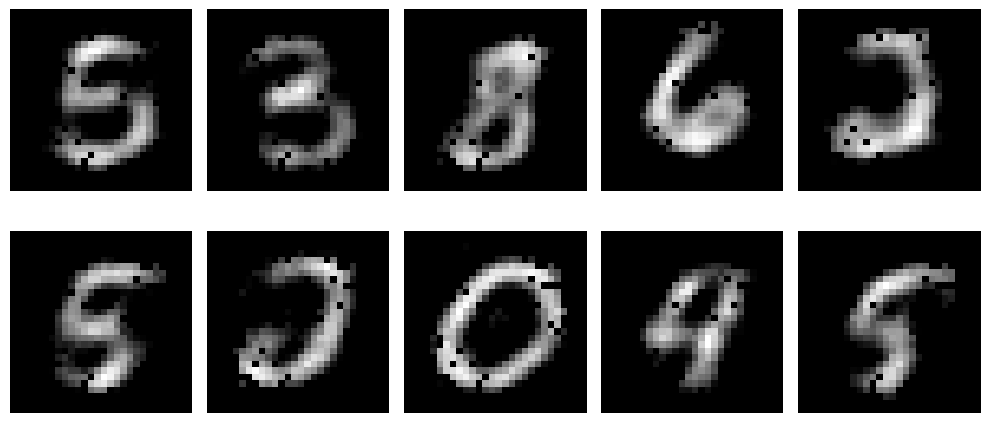

Lambda:  0.069
[15680 15700 31380 32164]
Removed 9632 params


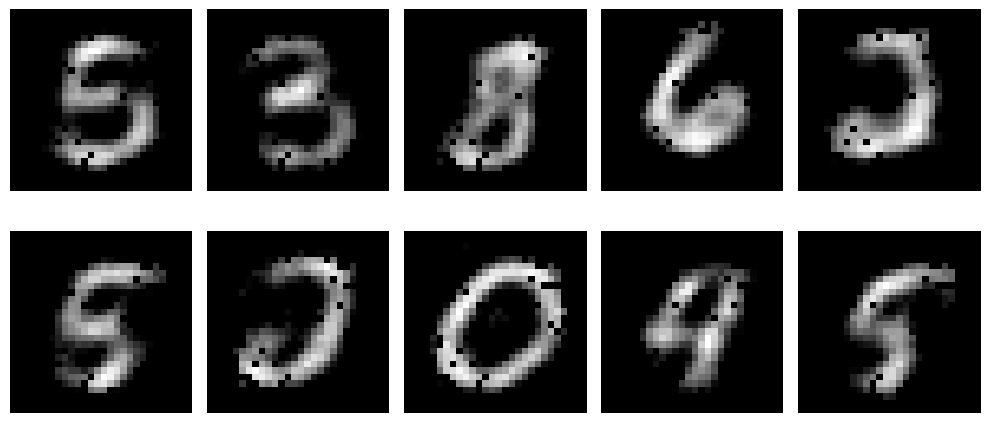

Lambda:  0.07
[15680 15700 31380 32164]
Removed 9642 params


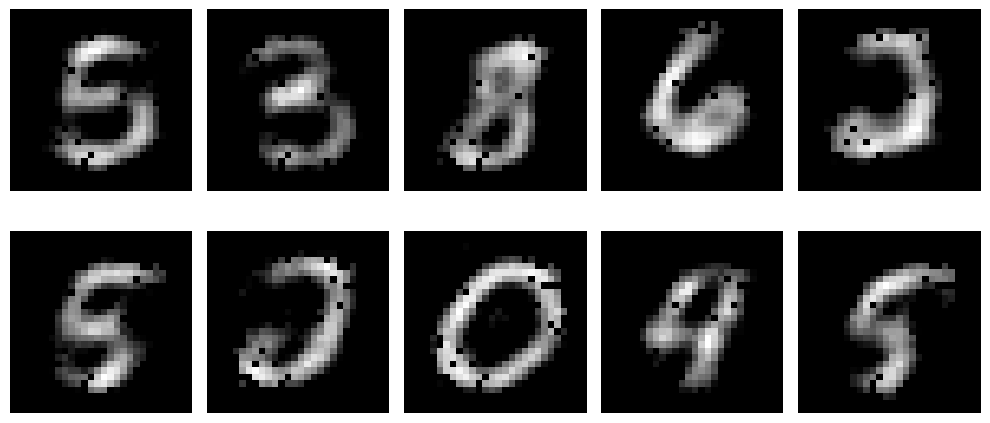

Lambda:  0.071
[15680 15700 31380 32164]
Removed 9653 params


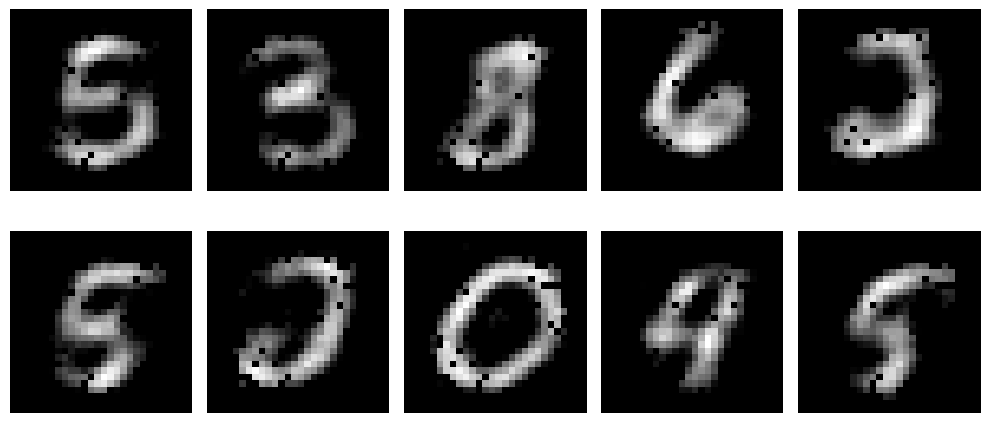

Lambda:  0.072
[15680 15700 31380 32164]
Removed 9658 params


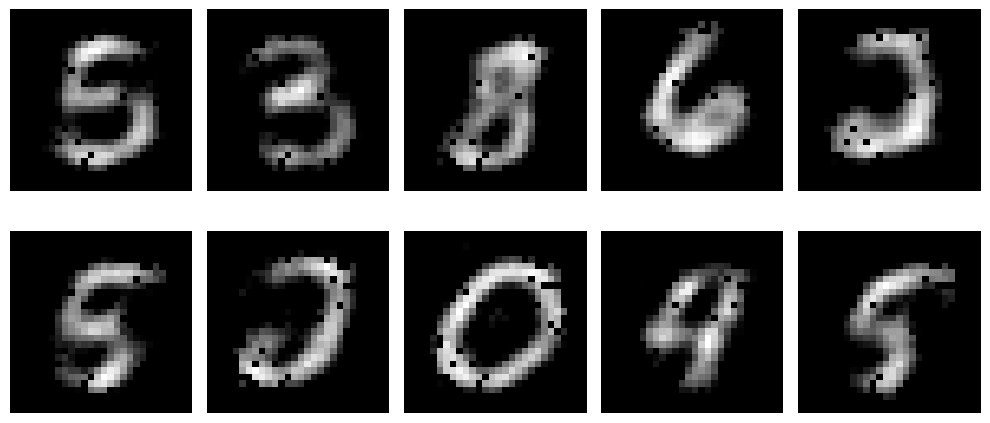

Lambda:  0.073
[15680 15700 31380 32164]
Removed 9674 params


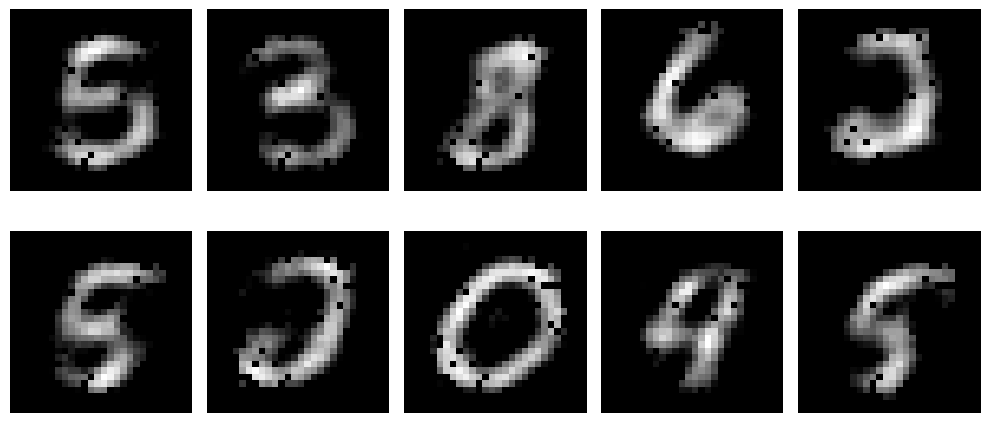

Lambda:  0.074
[15680 15700 31380 32164]
Removed 9686 params


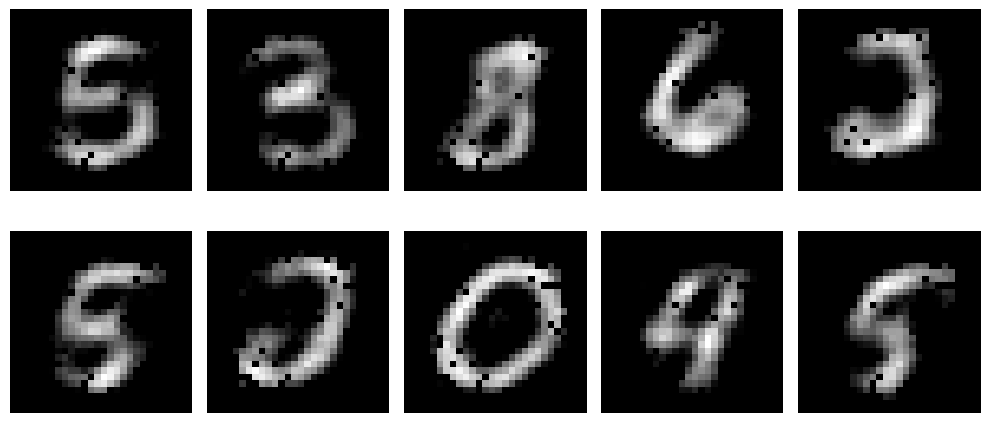

Lambda:  0.075
[15680 15700 31380 32164]
Removed 9697 params


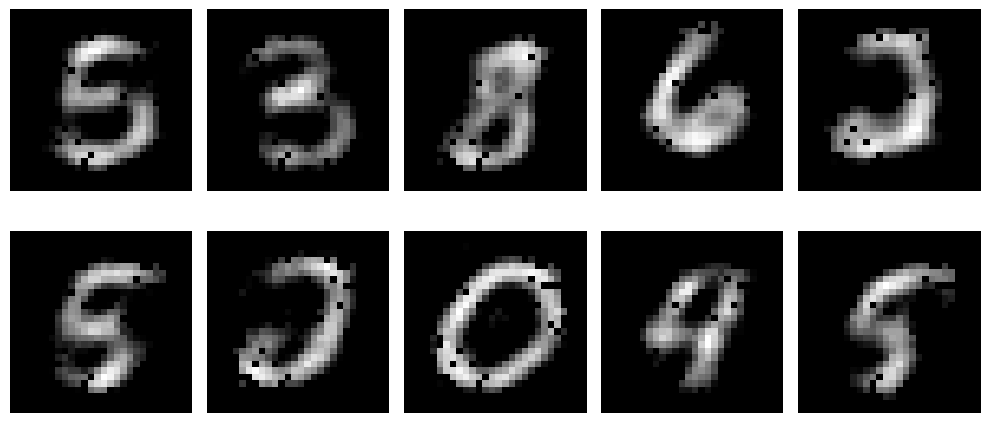

Lambda:  0.076
[15680 15700 31380 32164]
Removed 9713 params


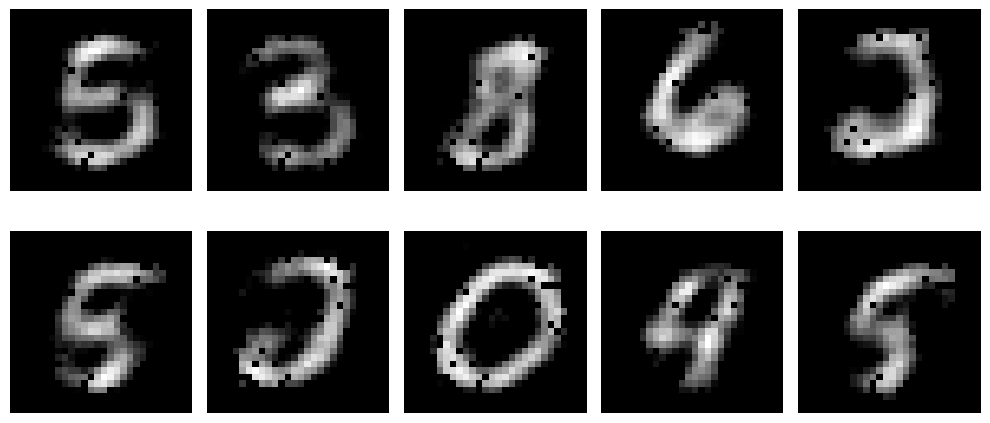

Lambda:  0.077
[15680 15700 31380 32164]
Removed 9726 params


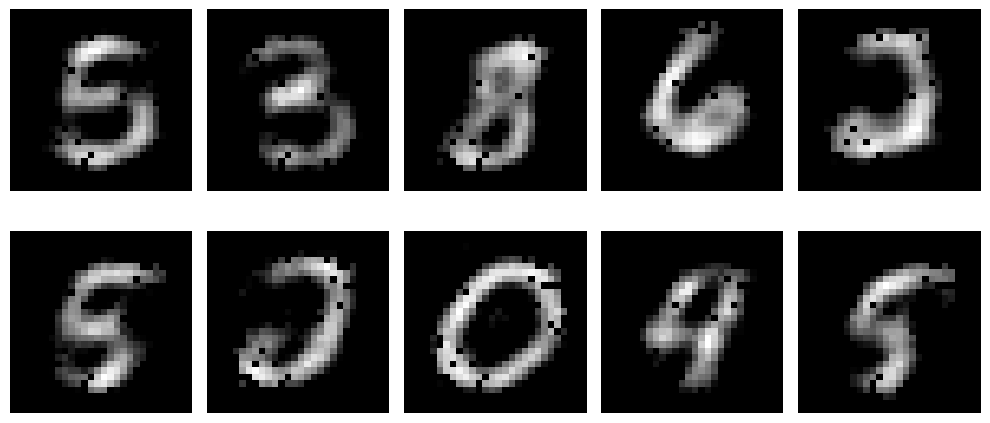

Lambda:  0.078
[15680 15700 31380 32164]
Removed 9736 params


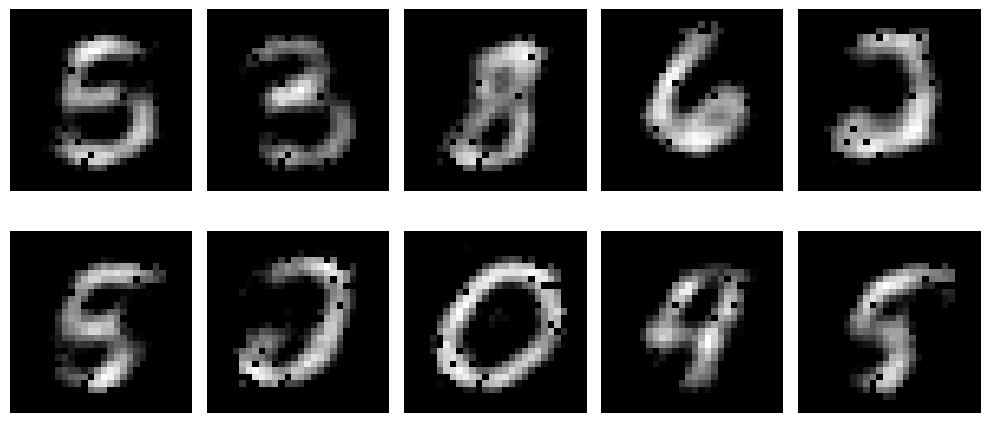

Lambda:  0.079
[15680 15700 31380 32164]
Removed 9745 params


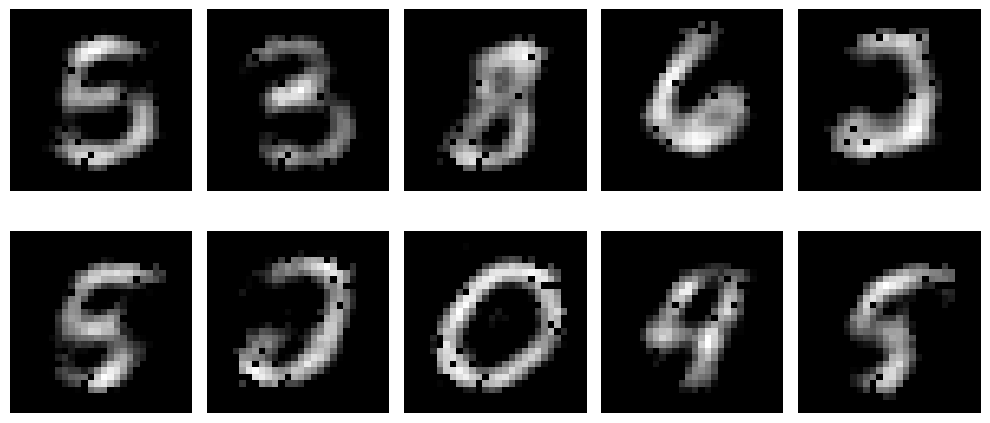

Lambda:  0.08
[15680 15700 31380 32164]
Removed 9761 params


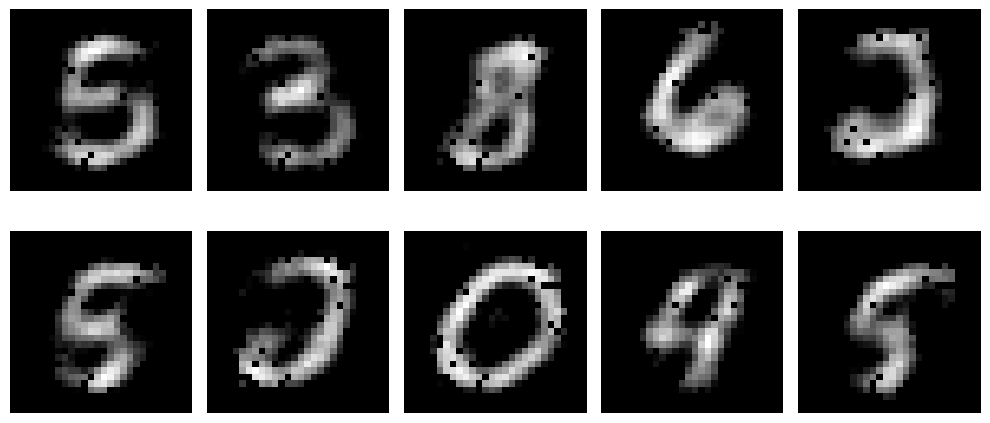

Lambda:  0.081
[15680 15700 31380 32164]
Removed 9772 params


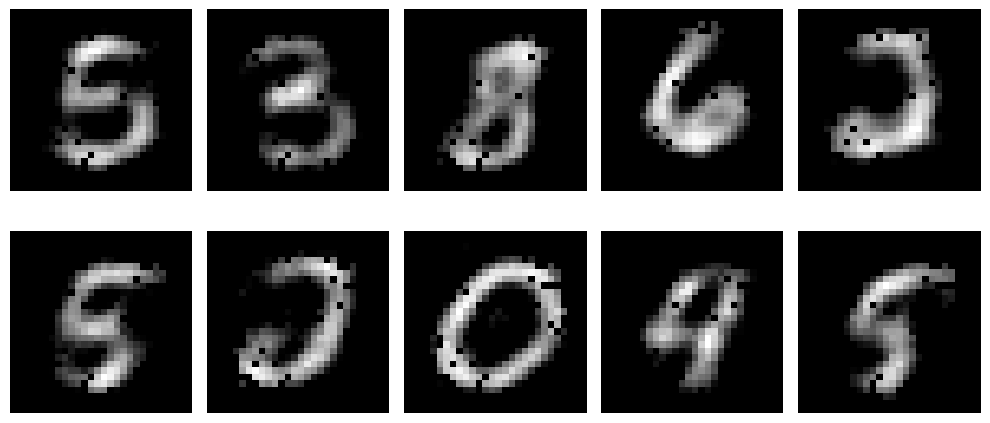

Lambda:  0.082
[15680 15700 31380 32164]
Removed 9781 params


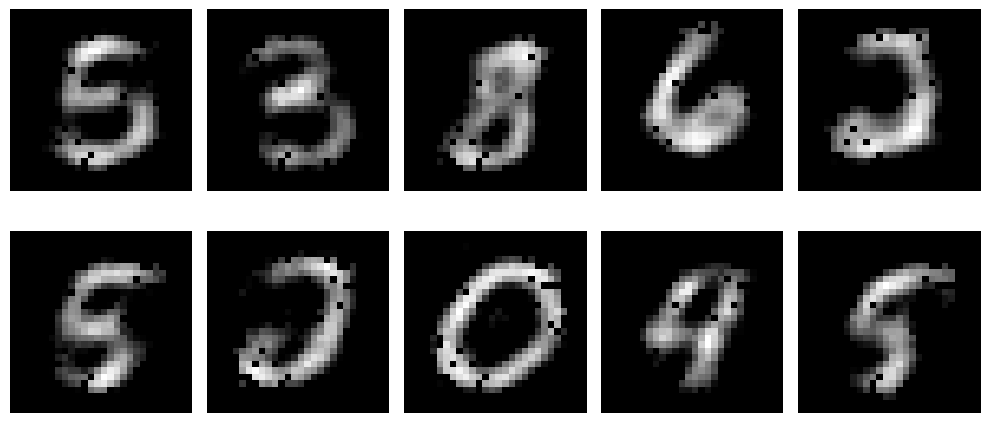

Lambda:  0.083
[15680 15700 31380 32164]
Removed 9789 params


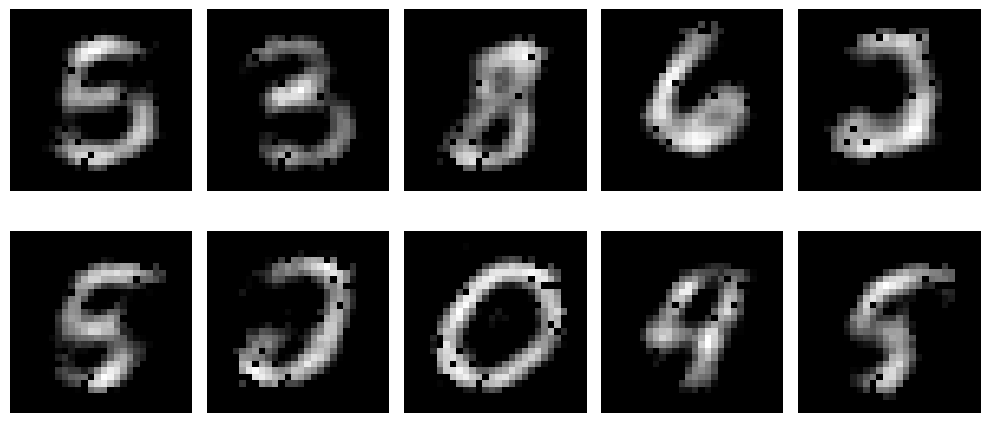

Lambda:  0.084
[15680 15700 31380 32164]
Removed 9797 params


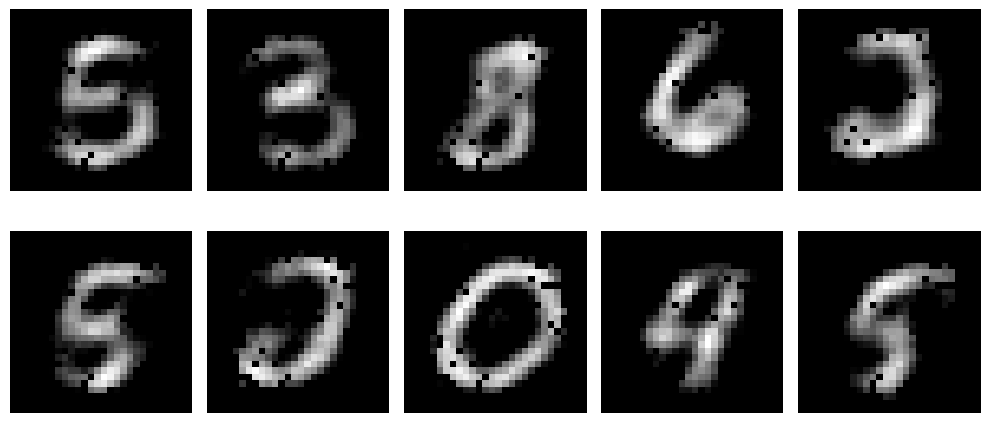

Lambda:  0.085
[15680 15700 31380 32164]
Removed 9815 params


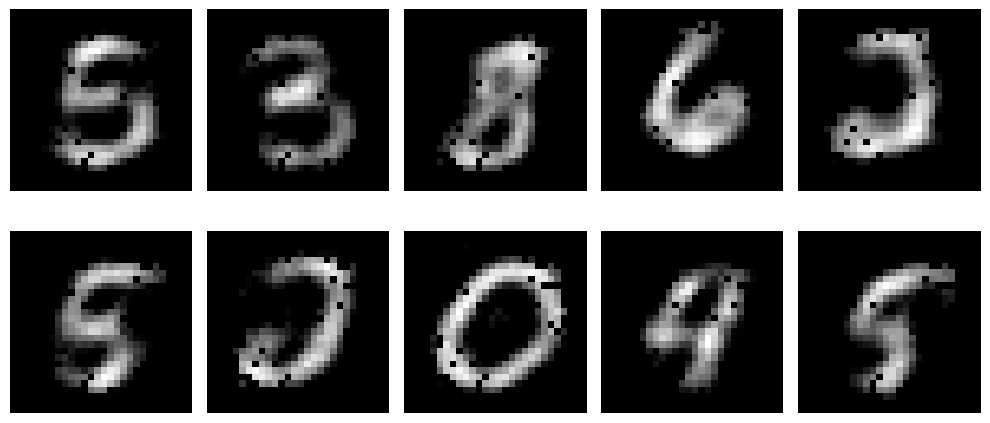

Lambda:  0.086
[15680 15700 31380 32164]
Removed 9827 params


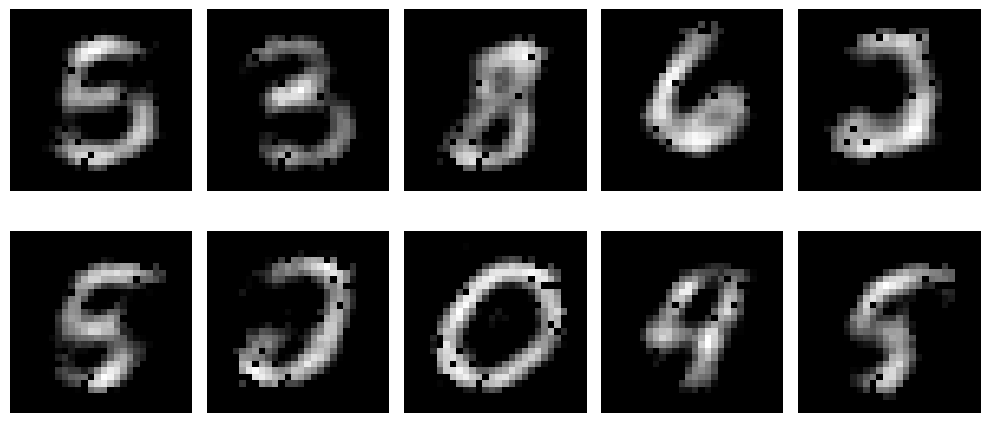

Lambda:  0.087
[15680 15700 31380 32164]
Removed 9841 params


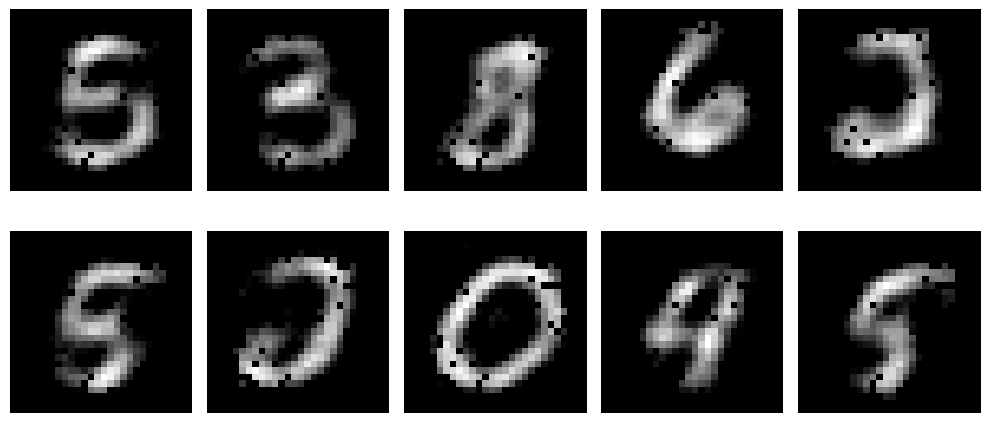

Lambda:  0.088
[15680 15700 31380 32164]
Removed 9855 params


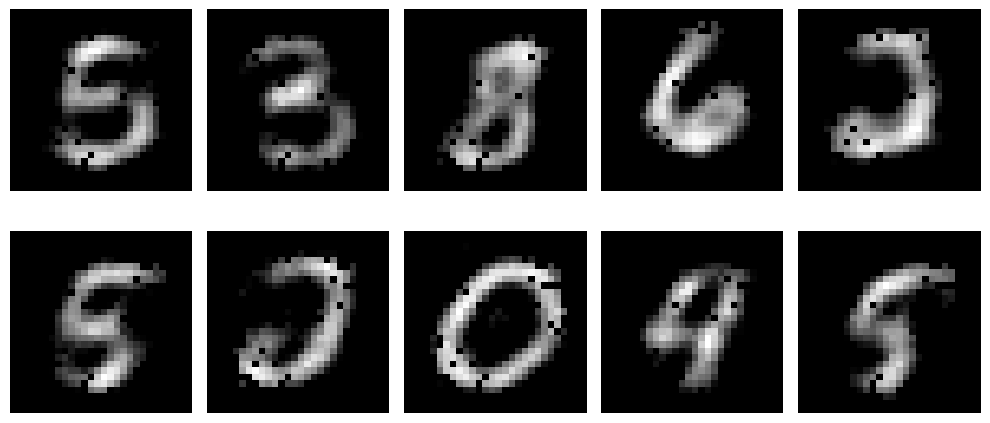

Lambda:  0.089
[15680 15700 31380 32164]
Removed 9865 params


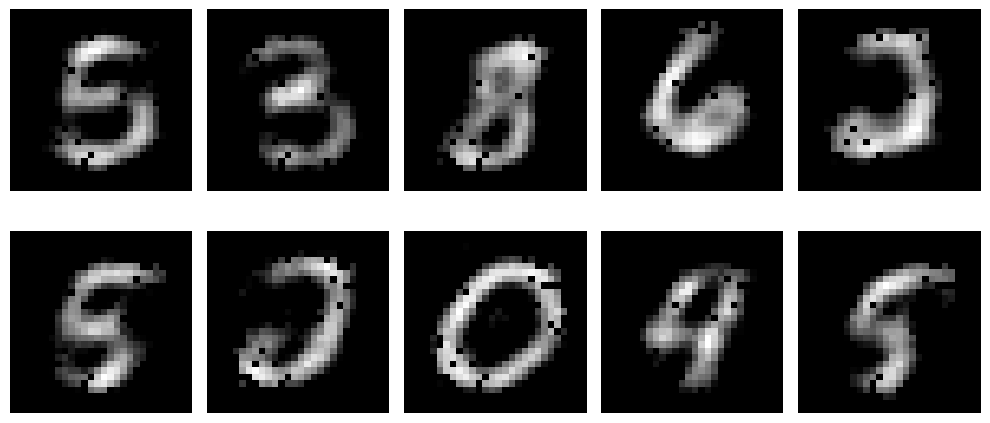

Lambda:  0.09
[15680 15700 31380 32164]
Removed 9881 params


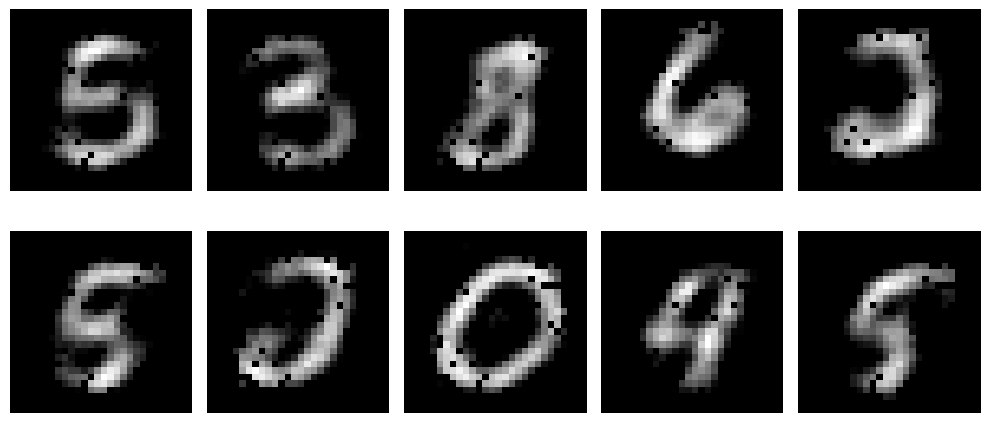

Lambda:  0.091
[15680 15700 31380 32164]
Removed 9891 params


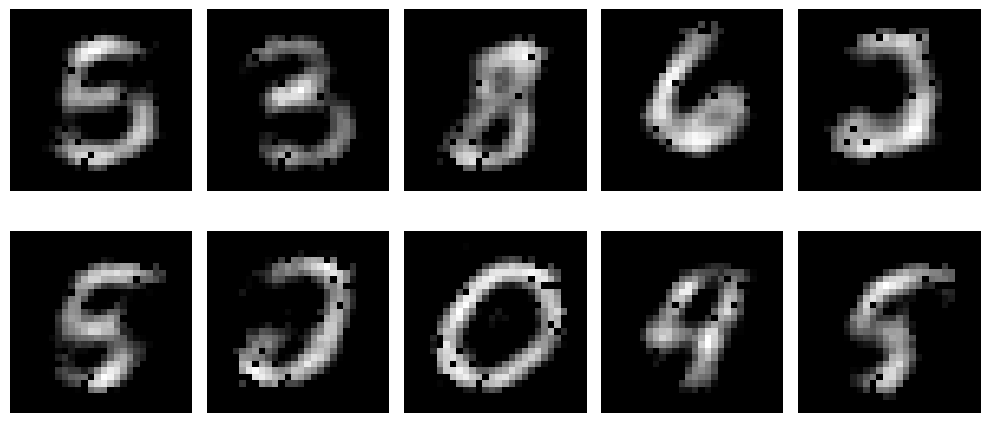

Lambda:  0.092
[15680 15700 31380 32164]
Removed 9904 params


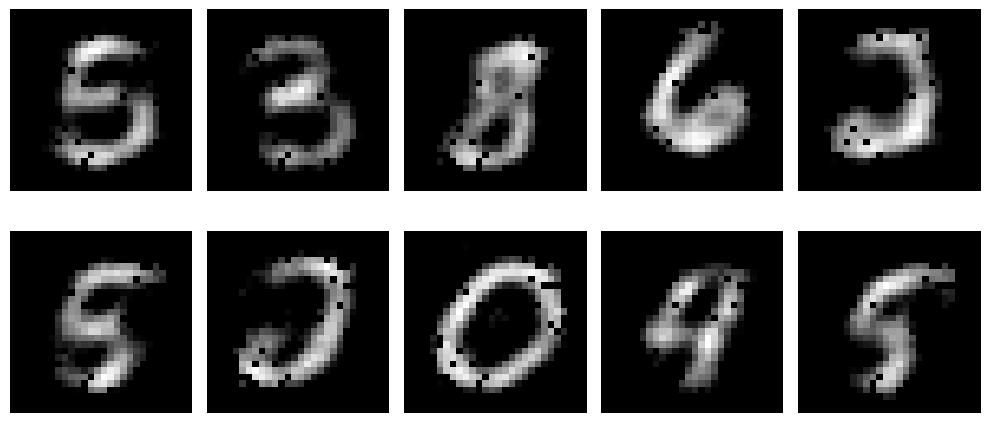

Lambda:  0.093
[15680 15700 31380 32164]
Removed 9915 params


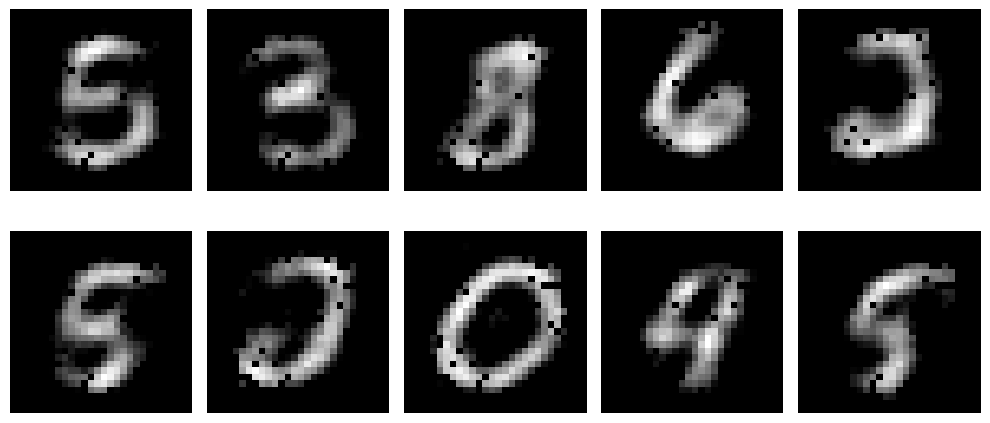

Lambda:  0.094
[15680 15700 31380 32164]
Removed 9925 params


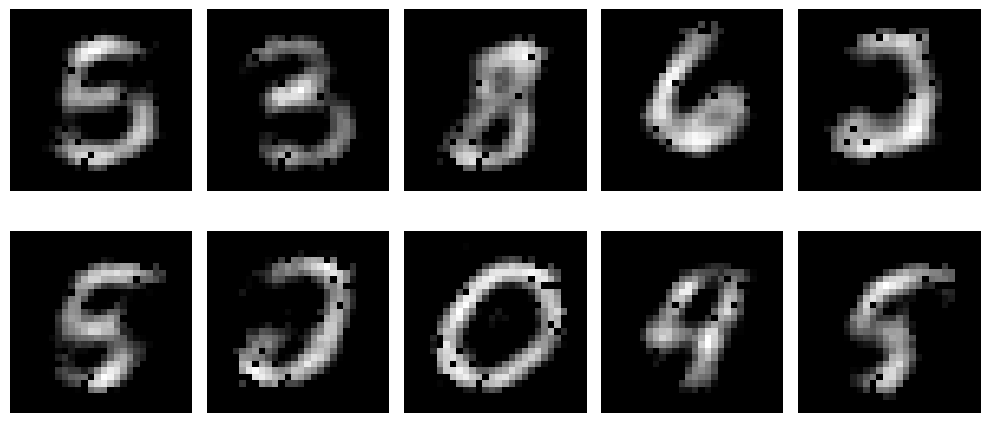

Lambda:  0.095
[15680 15700 31380 32164]
Removed 9938 params


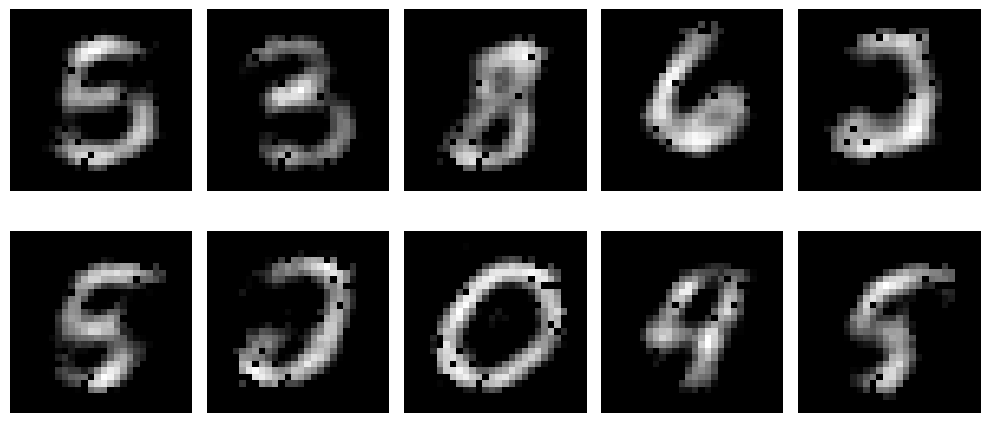

Lambda:  0.096
[15680 15700 31380 32164]
Removed 9946 params


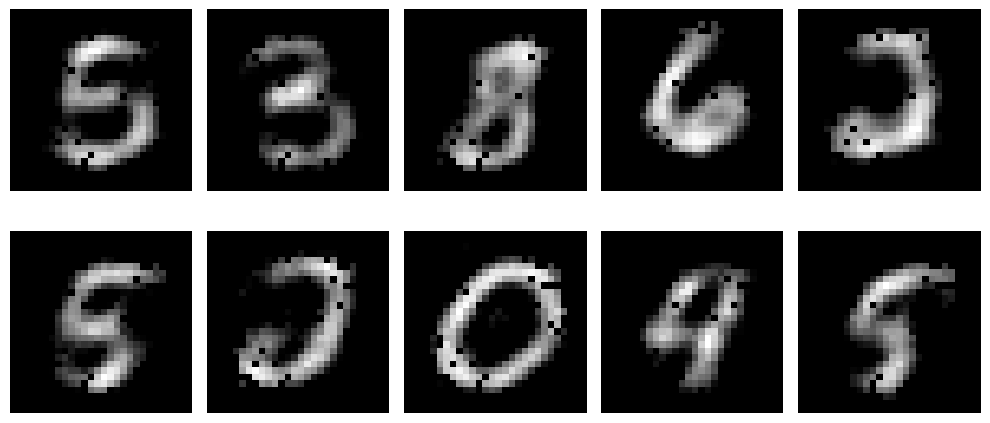

Lambda:  0.097
[15680 15700 31380 32164]
Removed 9960 params


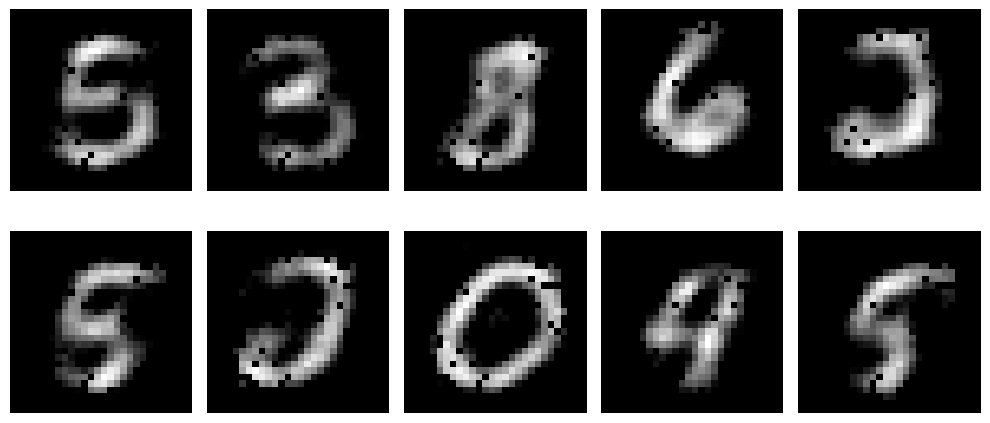

Lambda:  0.098
[15680 15700 31380 32164]
Removed 9975 params


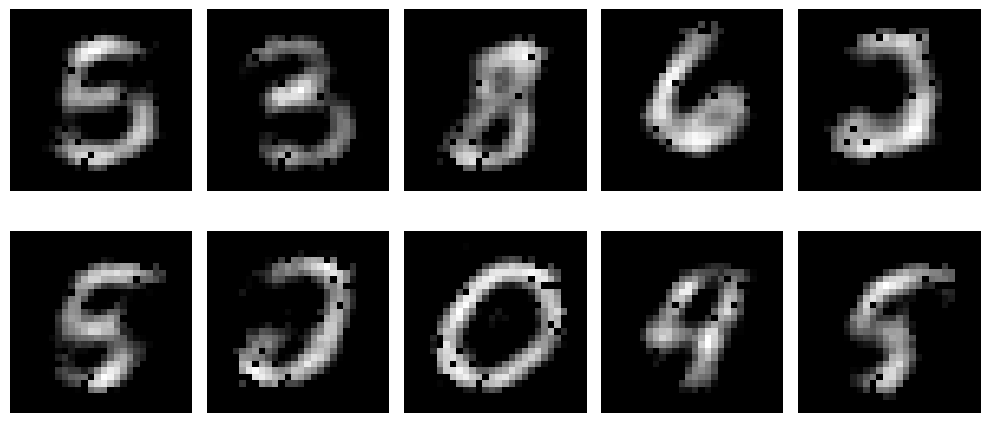

Lambda:  0.099
[15680 15700 31380 32164]
Removed 9983 params


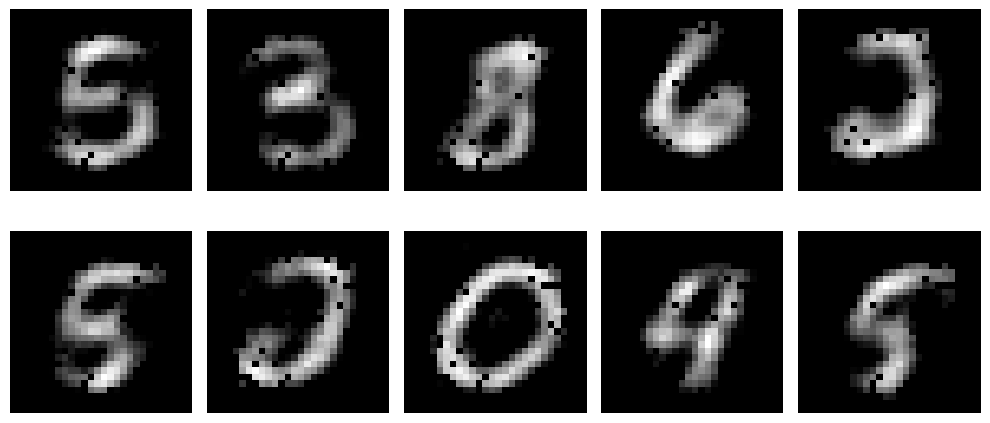

Lambda:  0.0
[15680 15700 31380 32164]
Removed 5496 params


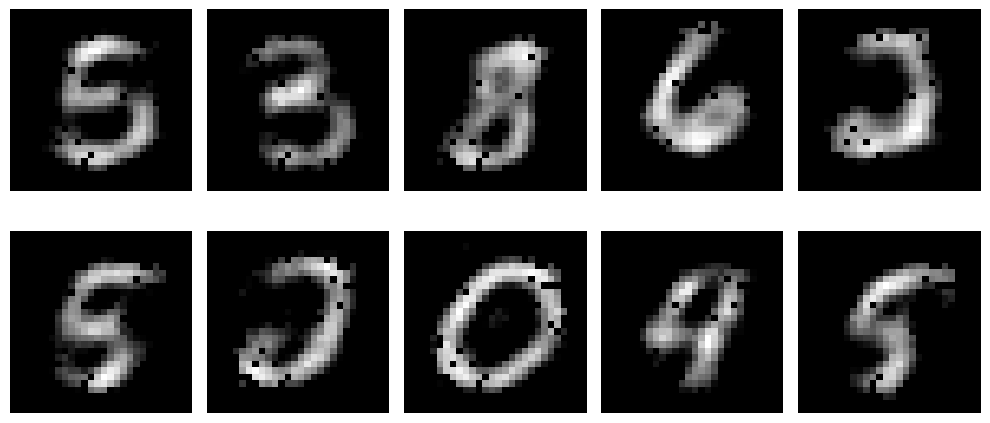

Lambda:  0.05
[15680 15700 31380 32164]
Removed 9335 params


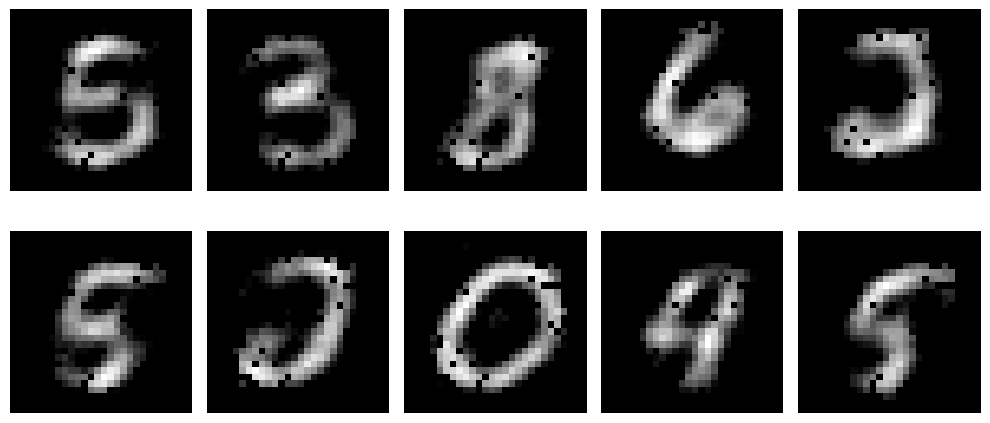

Lambda:  0.1
[15680 15700 31380 32164]
Removed 9992 params


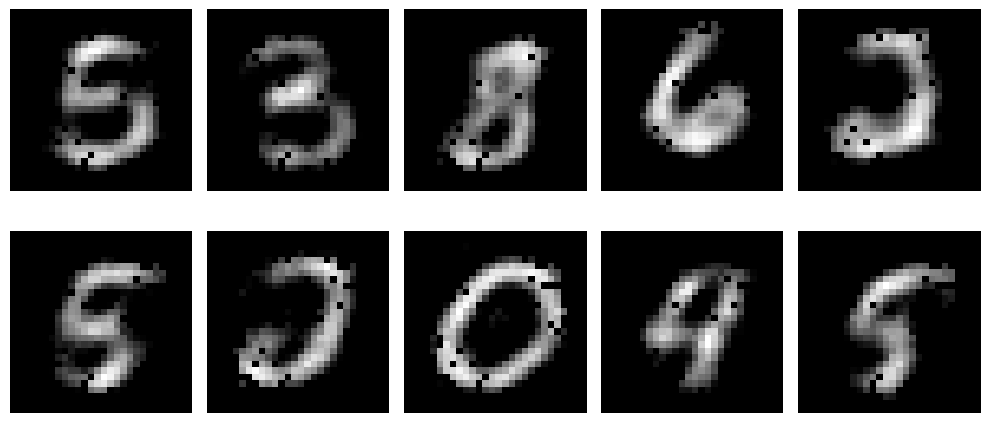

Lambda:  0.15
[15680 15700 31380 32164]
Removed 10311 params


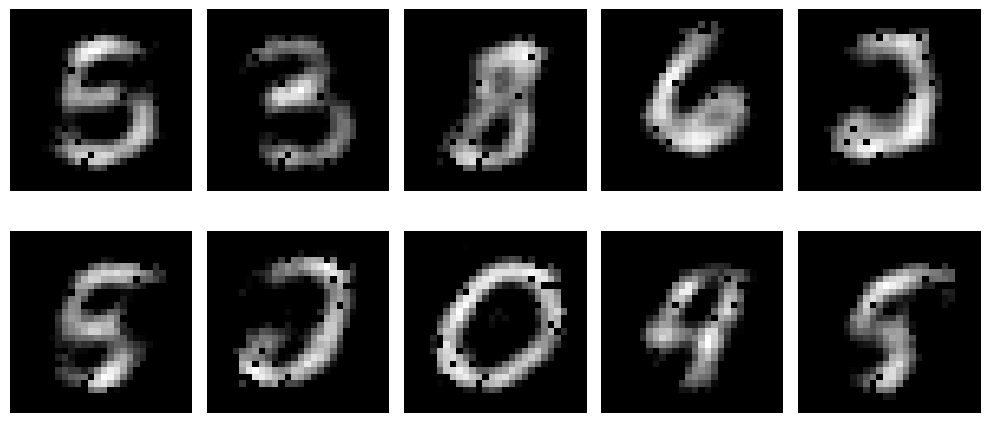

Lambda:  0.2
[15680 15700 31380 32164]
Removed 10658 params


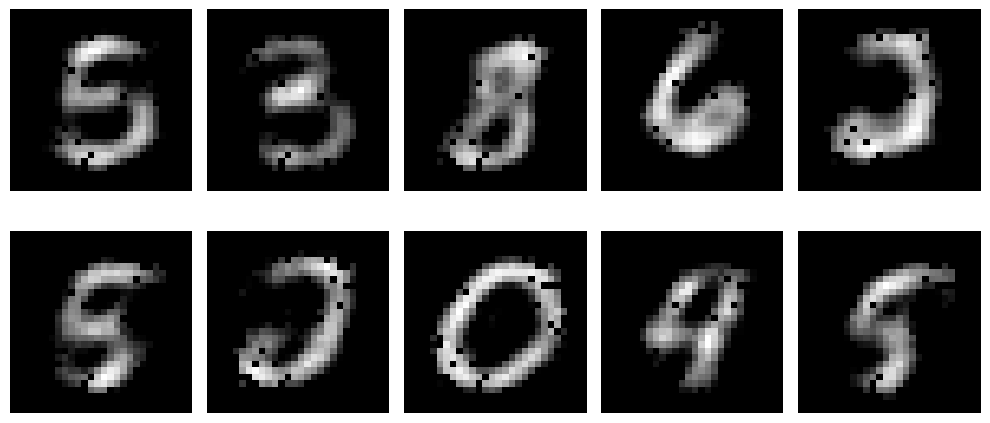

Lambda:  0.25
[15680 15700 31380 32164]
Removed 10889 params


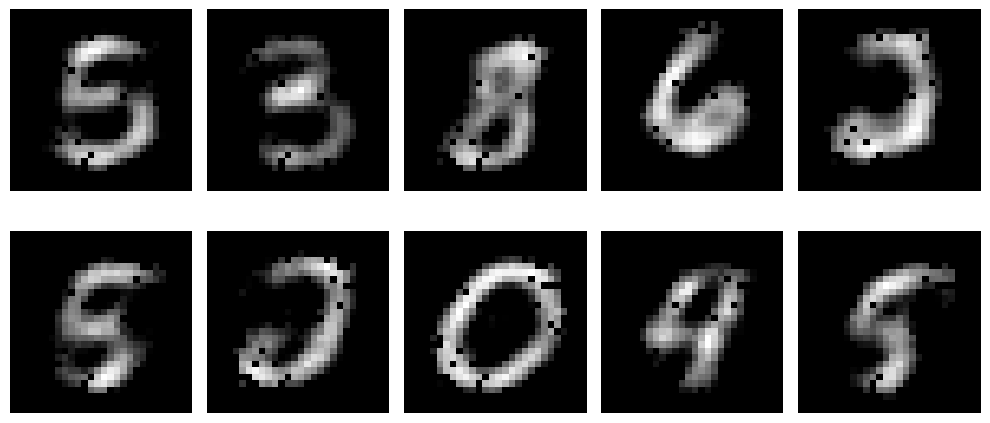

Lambda:  0.3
[15680 15700 31380 32164]
Removed 11061 params


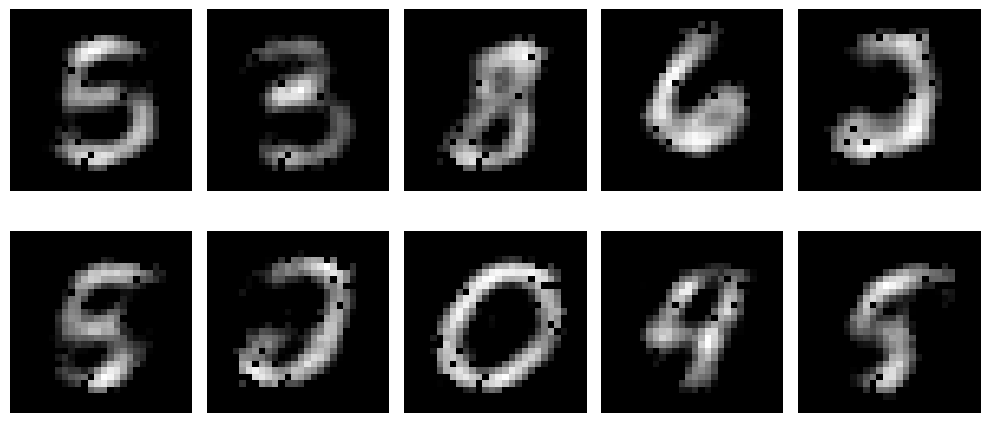

Lambda:  0.35
[15680 15700 31380 32164]
Removed 11237 params


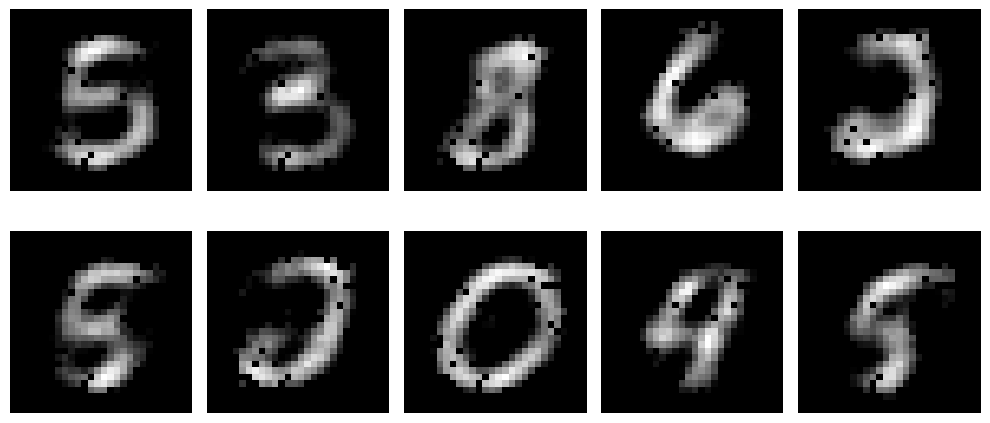

Lambda:  0.4
[15680 15700 31380 32164]
Removed 11396 params


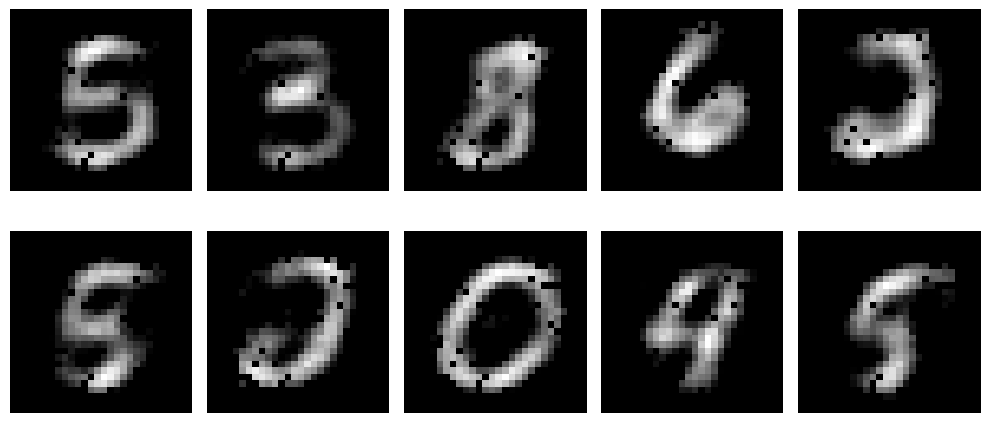

Lambda:  0.45
[15680 15700 31380 32164]
Removed 11550 params


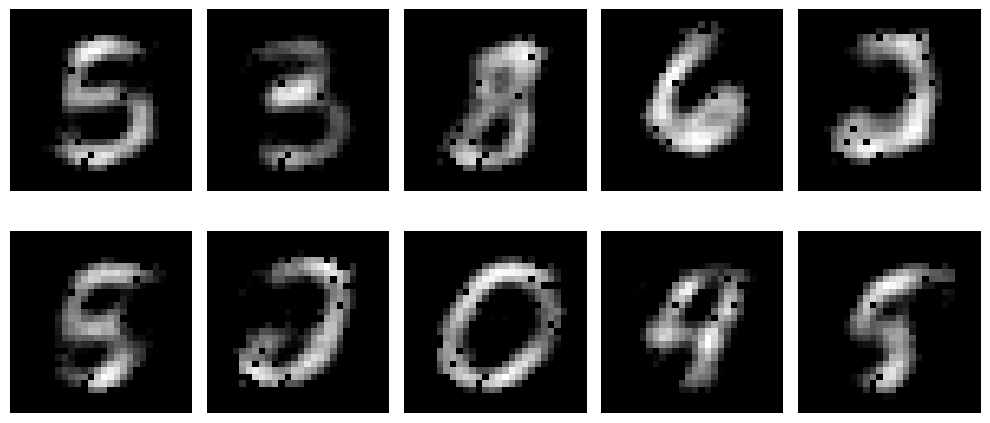

Lambda:  0.5
[15680 15700 31380 32164]
Removed 11689 params


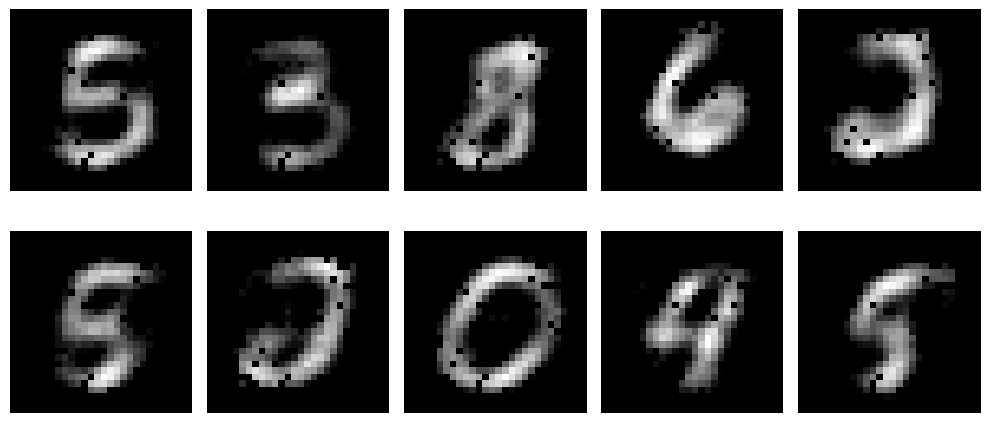

Lambda:  0.55
[15680 15700 31380 32164]
Removed 11824 params


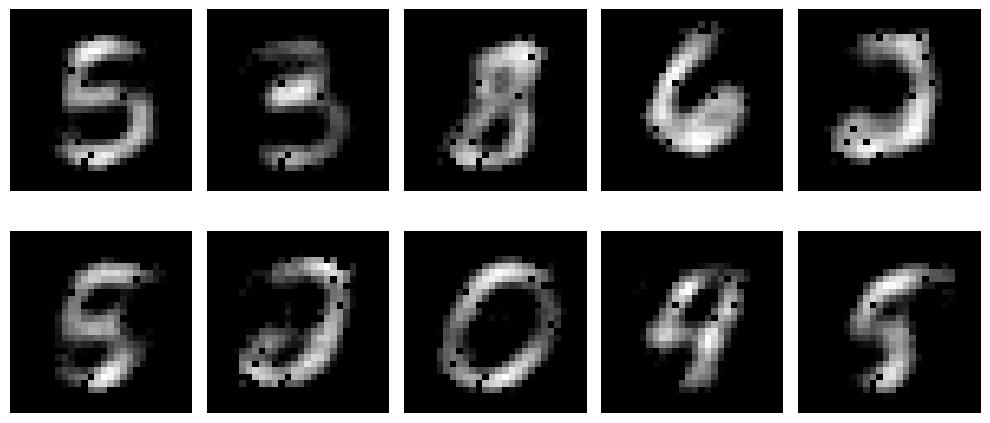

Lambda:  0.6
[15680 15700 31380 32164]
Removed 11968 params


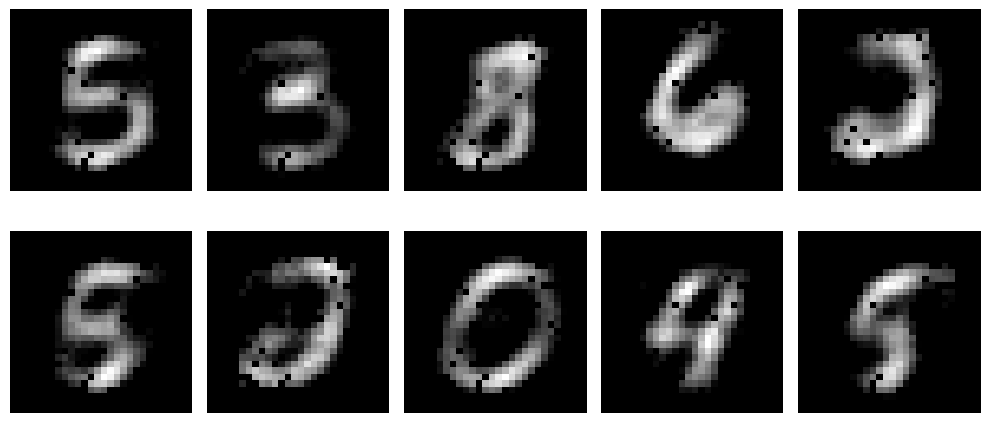

Lambda:  0.65
[15680 15700 31380 32164]
Removed 12105 params


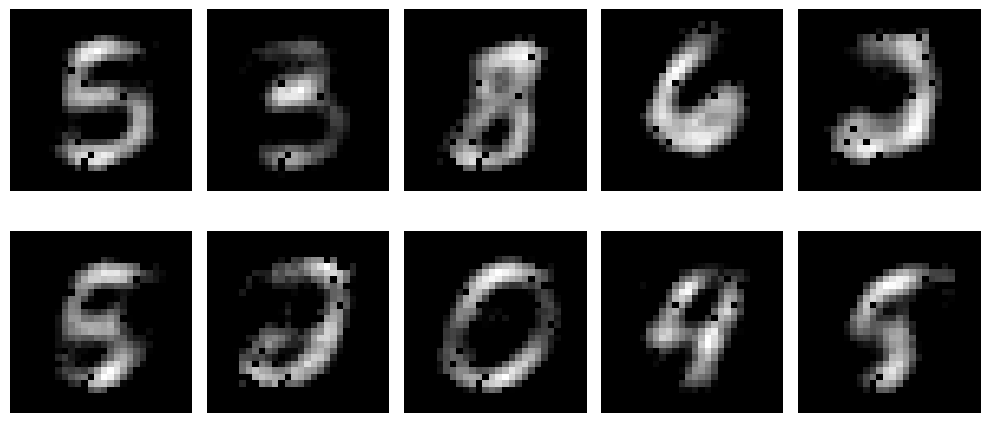

Lambda:  0.7
[15680 15700 31380 32164]
Removed 12226 params


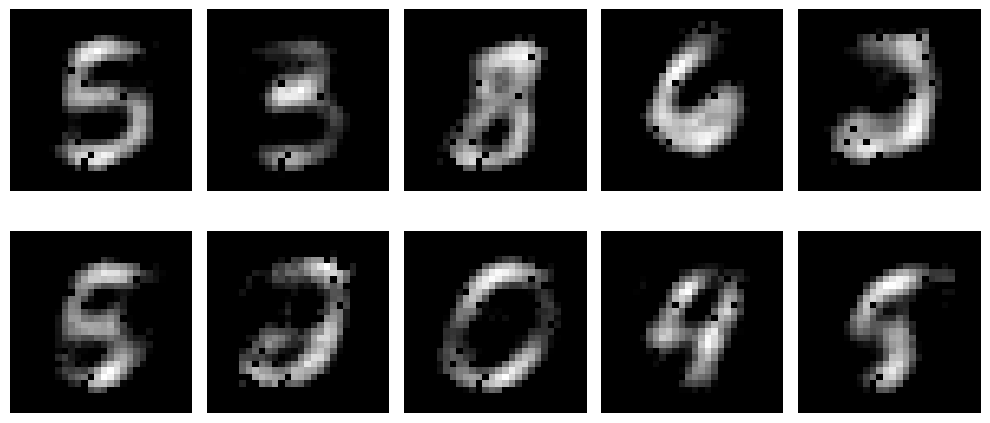

Lambda:  0.75
[15680 15700 31380 32164]
Removed 12317 params


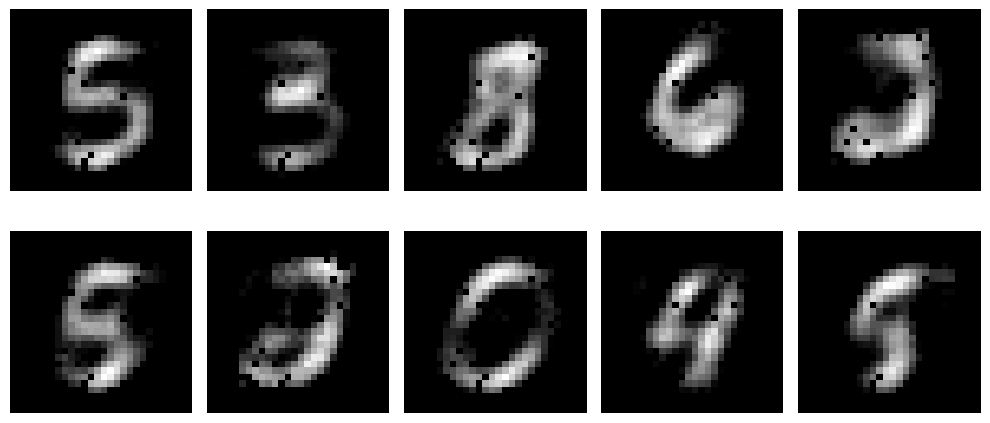

Lambda:  0.8
[15680 15700 31380 32164]
Removed 12428 params


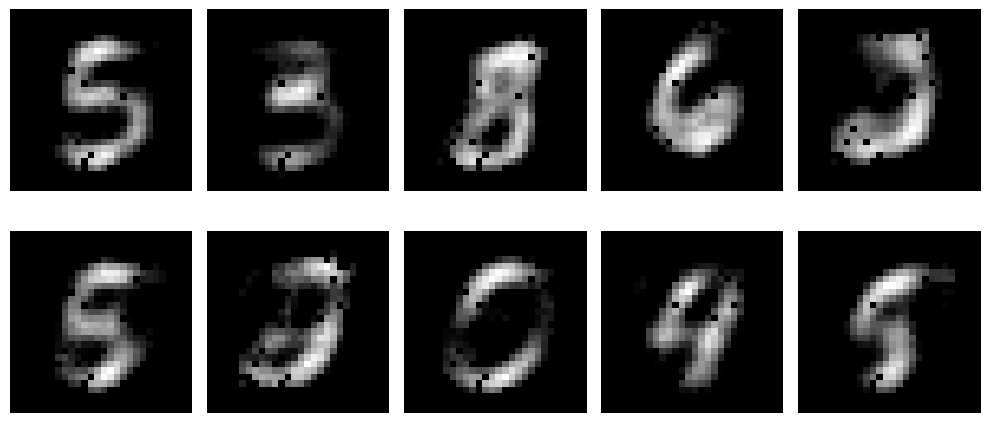

Lambda:  0.85
[15680 15700 31380 32164]
Removed 12561 params


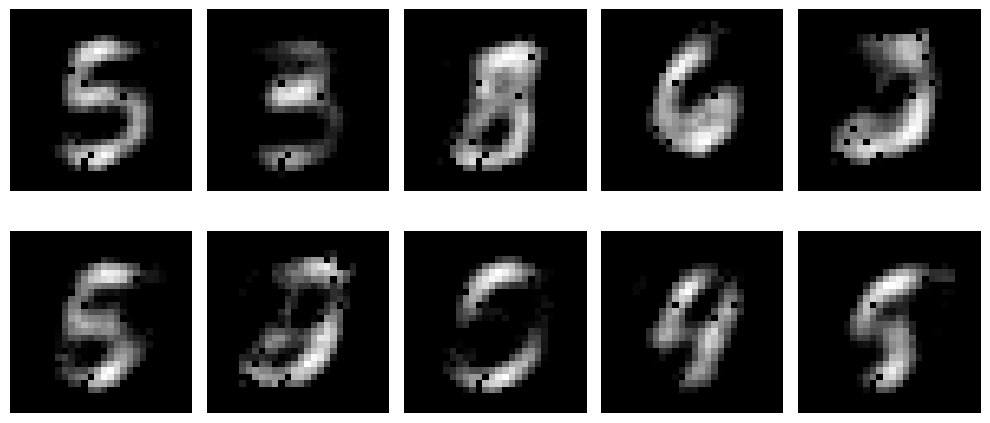

Lambda:  0.9
[15680 15700 31380 32164]
Removed 12664 params


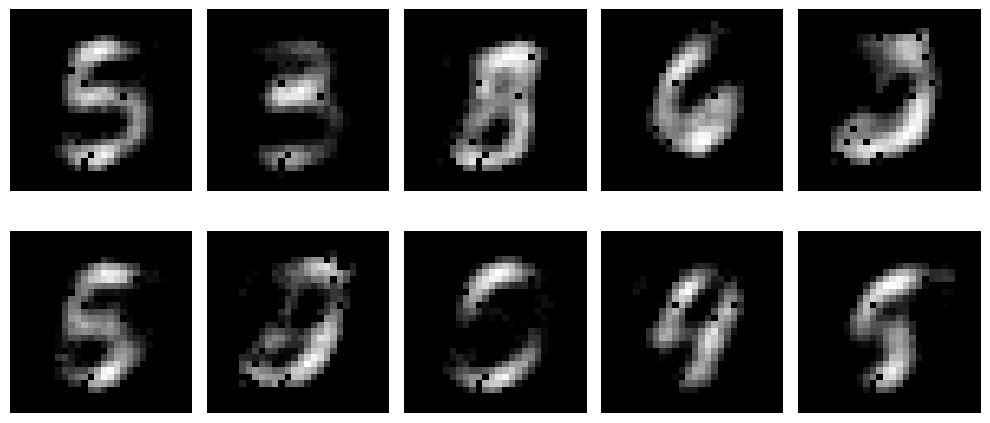

Lambda:  0.95
[15680 15700 31380 32164]
Removed 12818 params


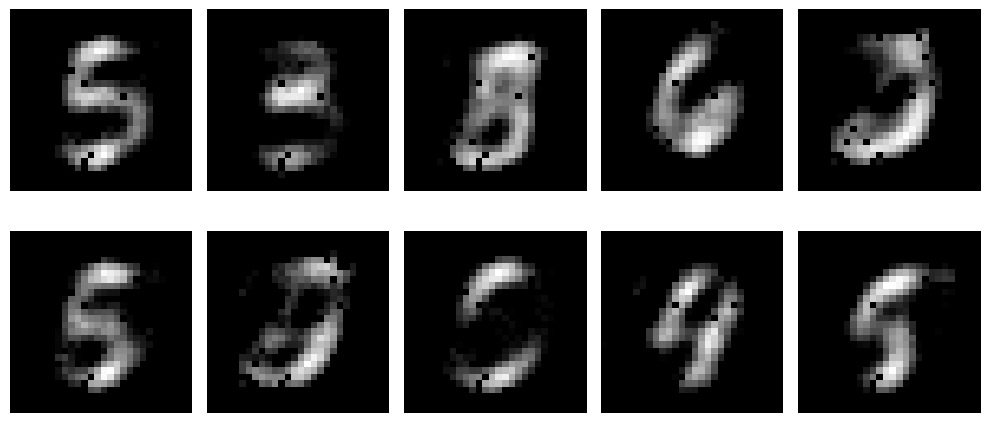

Lambda:  1.0
[15680 15700 31380 32164]
Removed 12979 params


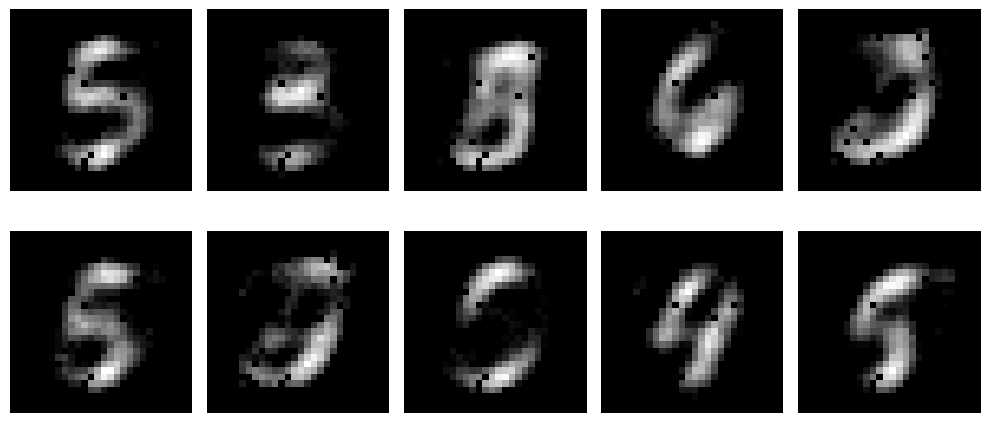

Lambda:  1.05
[15680 15700 31380 32164]
Removed 13135 params


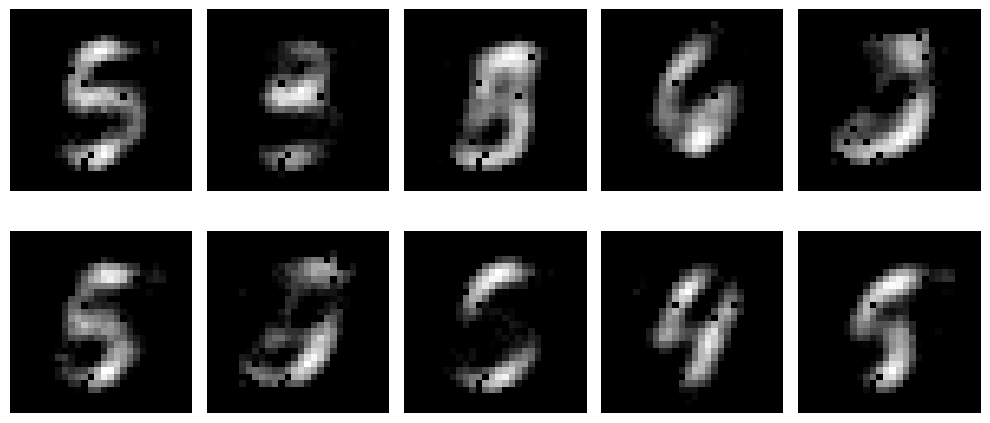

Lambda:  1.1
[15680 15700 31380 32164]
Removed 13312 params


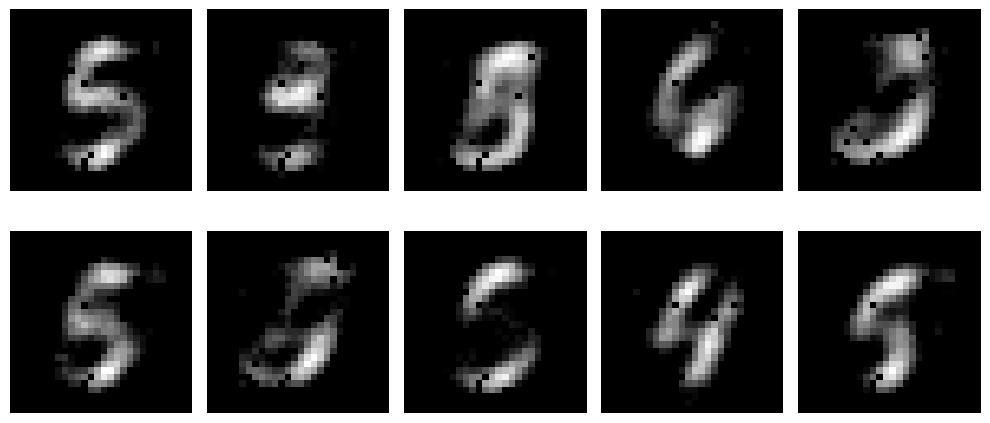

Lambda:  1.15
[15680 15700 31380 32164]
Removed 13477 params


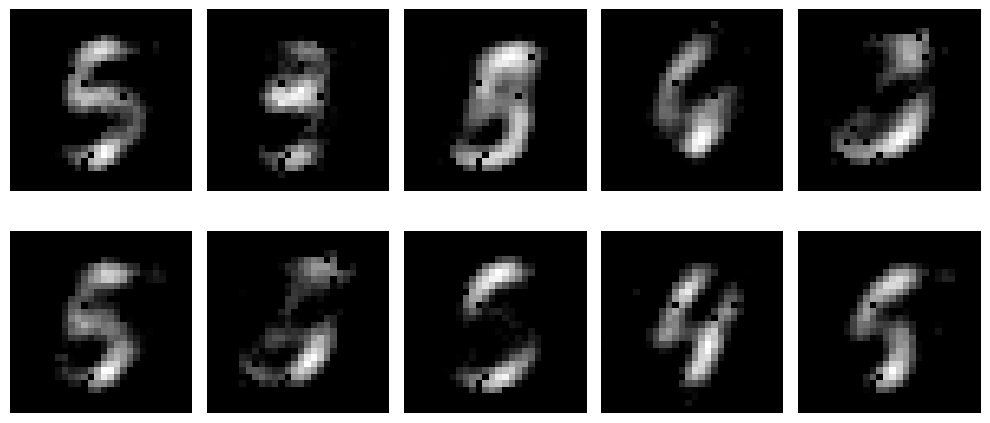

Lambda:  1.2
[15680 15700 31380 32164]
Removed 13688 params


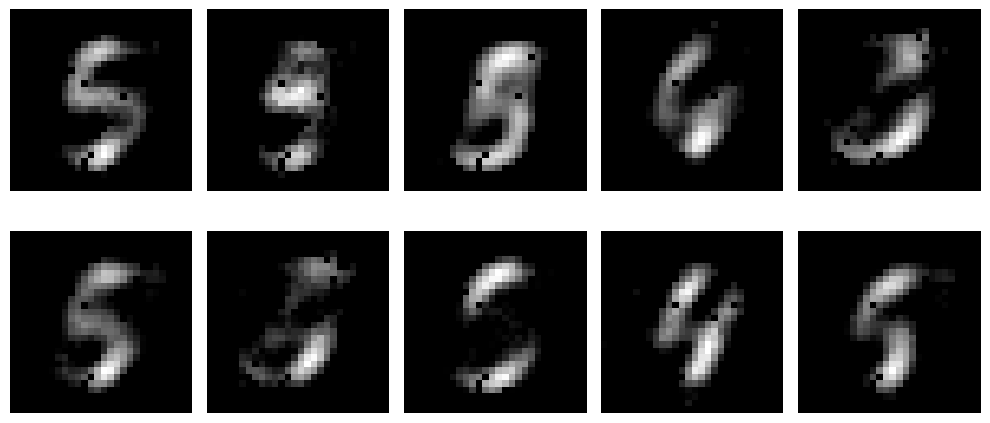

Lambda:  1.25
[15680 15700 31380 32164]
Removed 13879 params


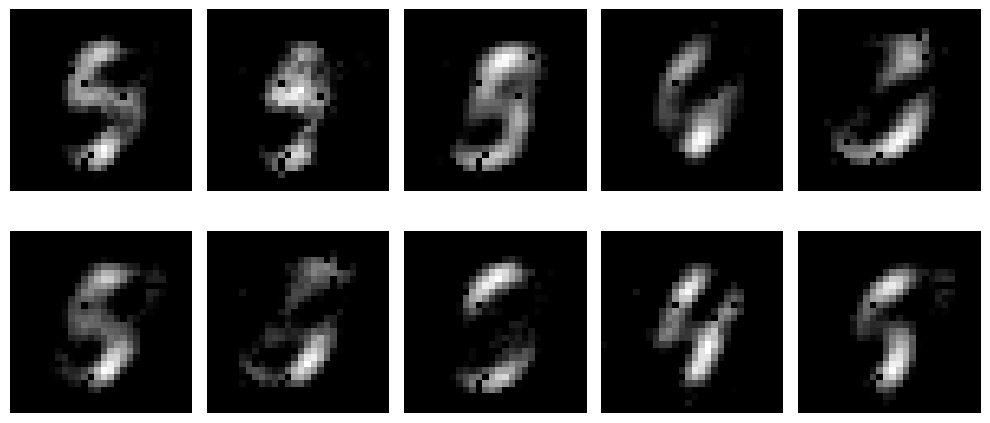

Lambda:  1.3
[15680 15700 31380 32164]
Removed 14055 params


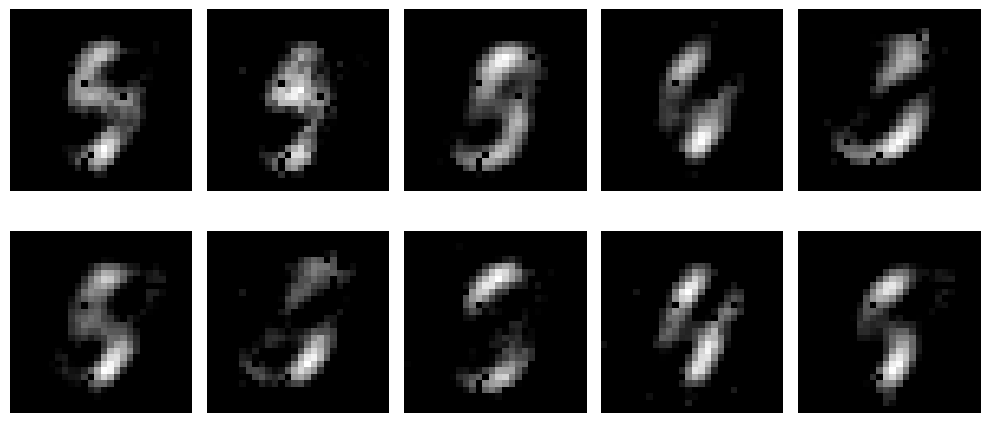

Lambda:  1.35
[15680 15700 31380 32164]
Removed 14230 params


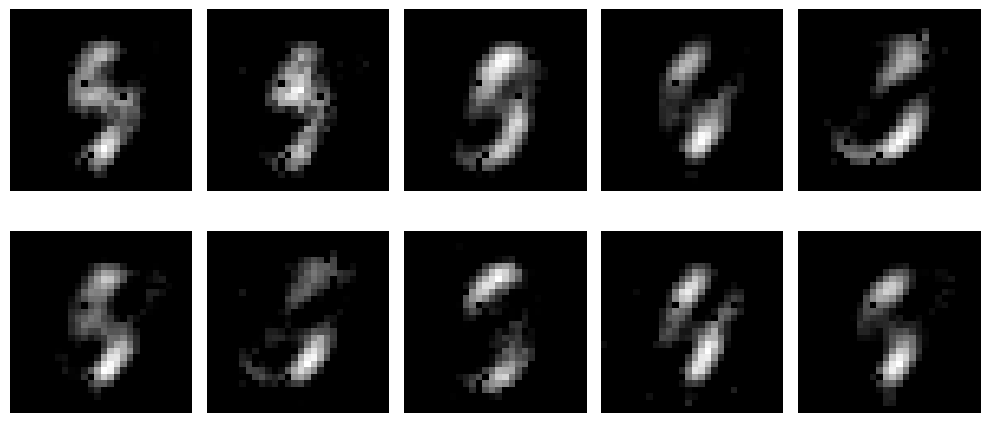

Lambda:  1.4
[15680 15700 31380 32164]
Removed 14406 params


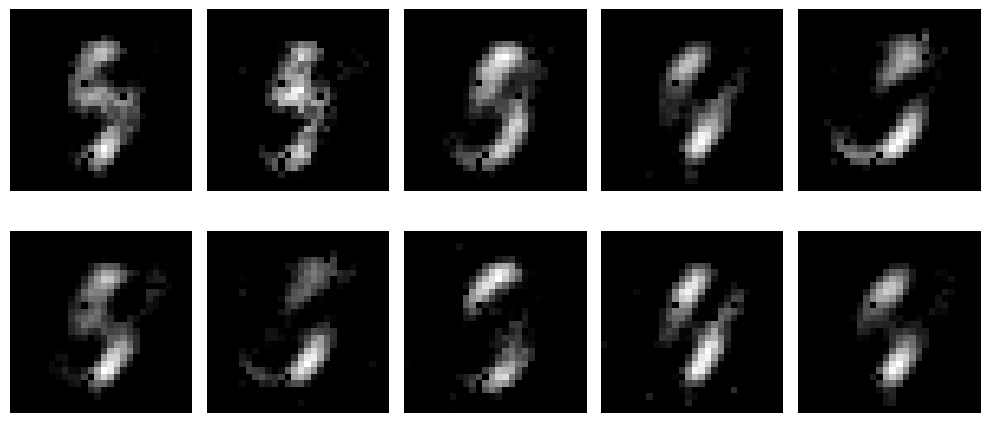

Lambda:  1.45
[15680 15700 31380 32164]
Removed 14575 params


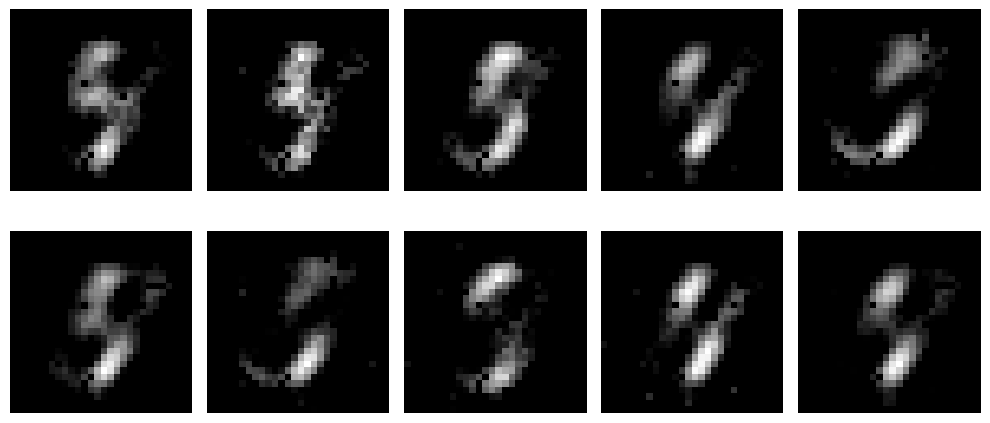

Lambda:  1.5
[15680 15700 31380 32164]
Removed 14744 params


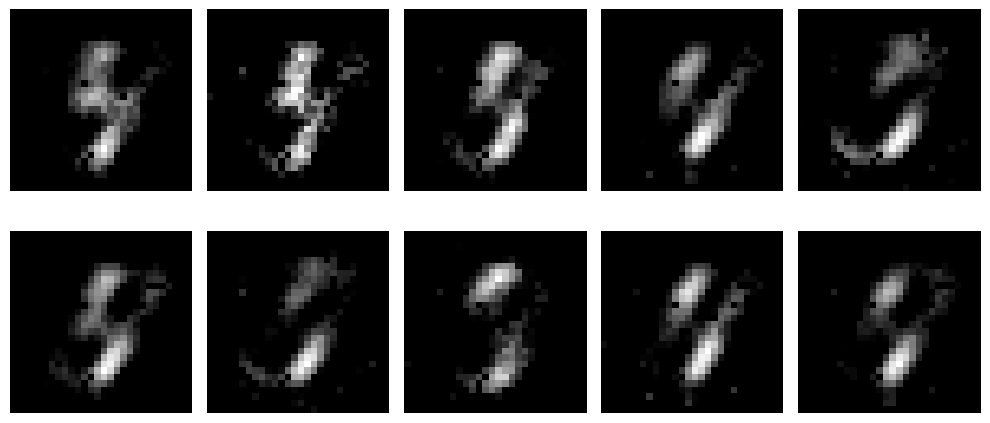

Lambda:  1.55
[15680 15700 31380 32164]
Removed 14906 params


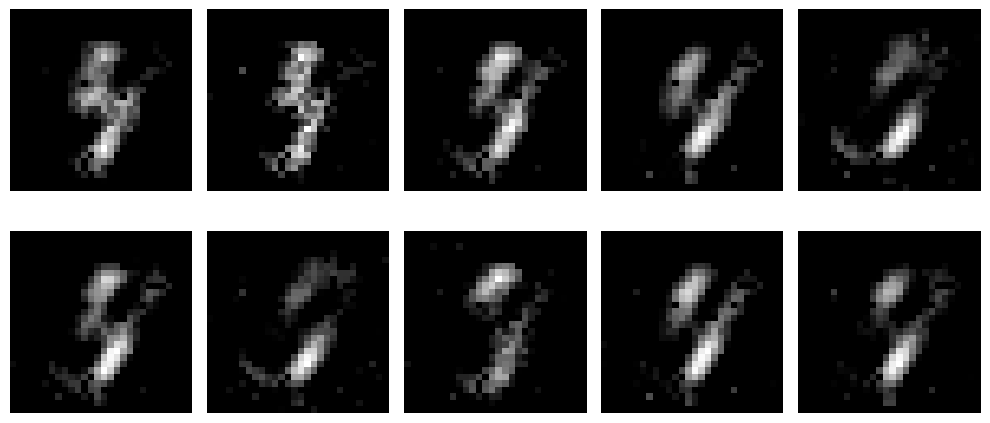

Lambda:  1.6
[15680 15700 31380 32164]
Removed 15042 params


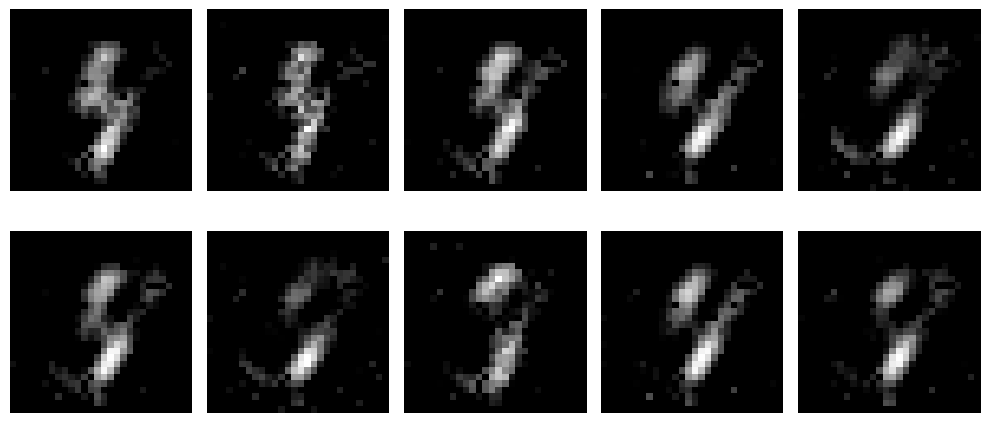

Lambda:  1.65
[15680 15700 31380 32164]
Removed 15171 params


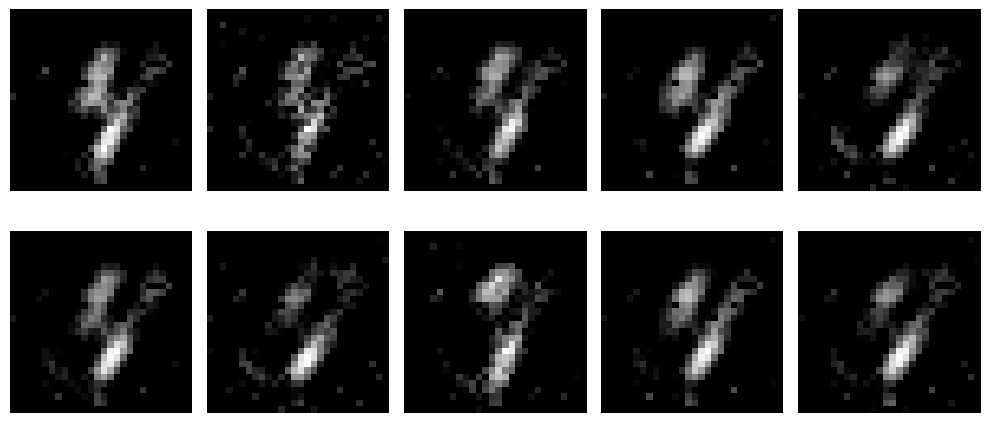

Lambda:  1.7
[15680 15700 31380 32164]
Removed 15277 params


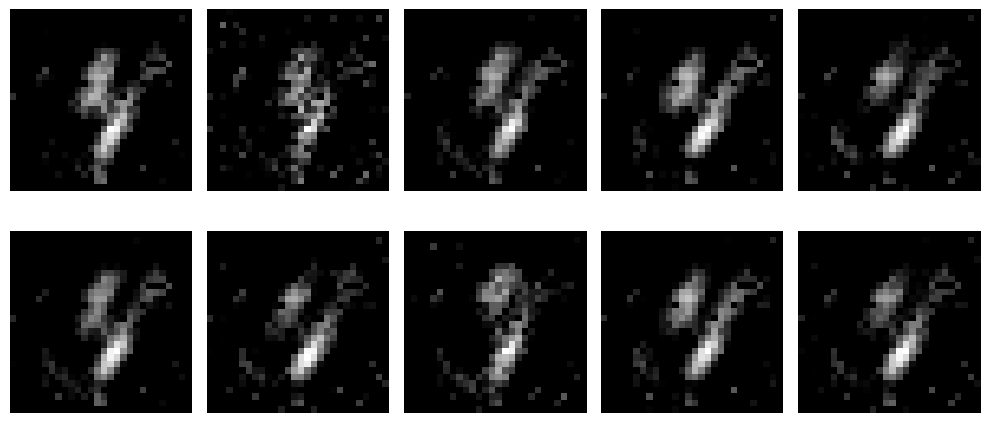

Lambda:  1.75
[15680 15700 31380 32164]
Removed 15386 params


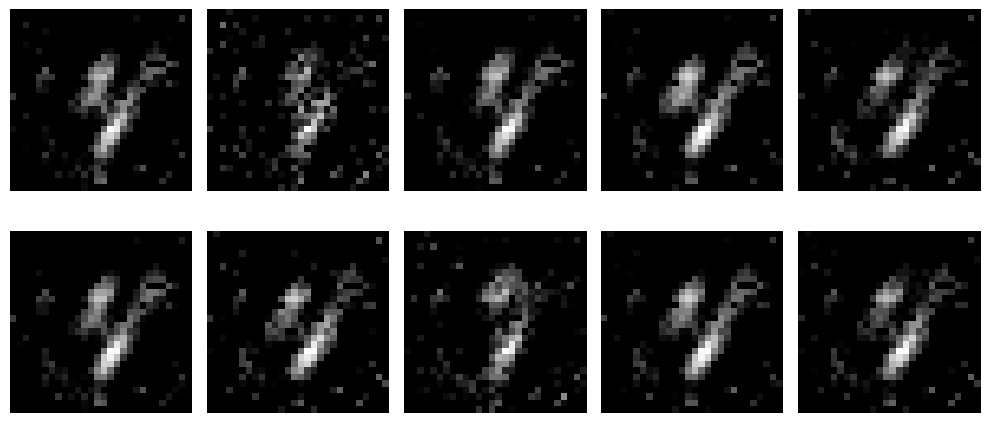

Lambda:  1.8
[15680 15700 31380 32164]
Removed 15456 params


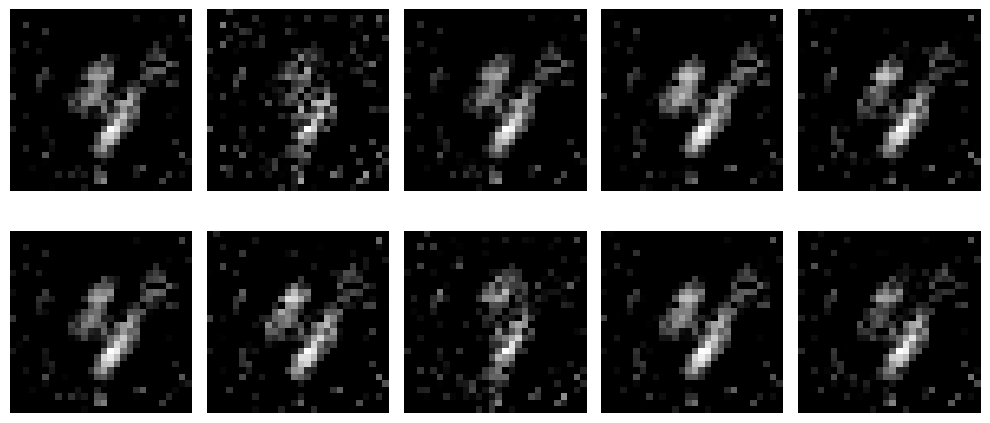

Lambda:  1.85
[15680 15700 31380 32164]
Removed 15515 params


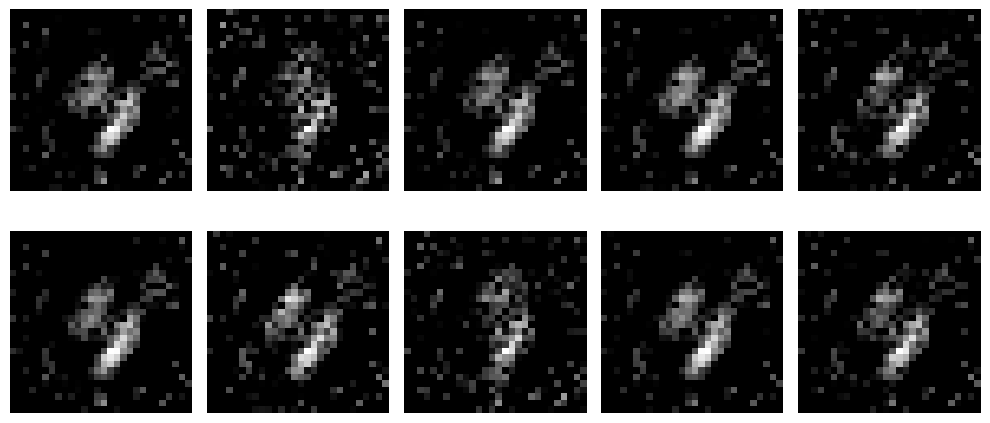

Lambda:  1.9
[15680 15700 31380 32164]
Removed 15557 params


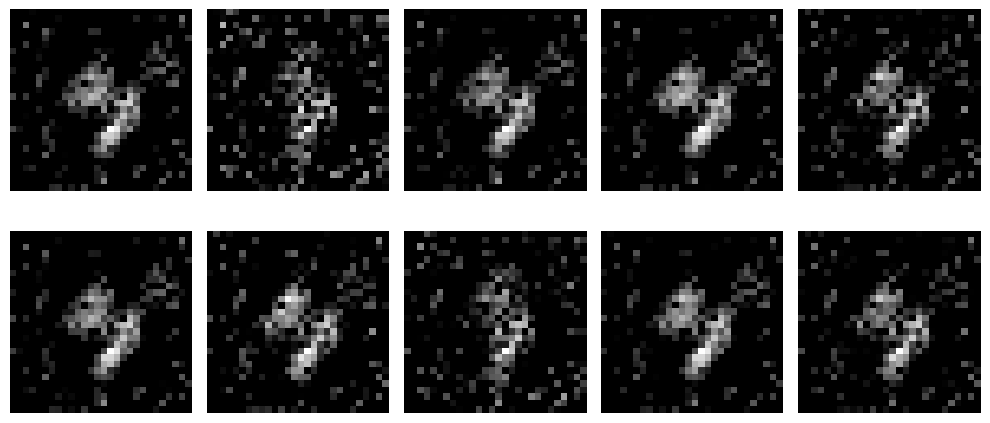

Lambda:  1.95
[15680 15700 31380 32164]
Removed 15596 params


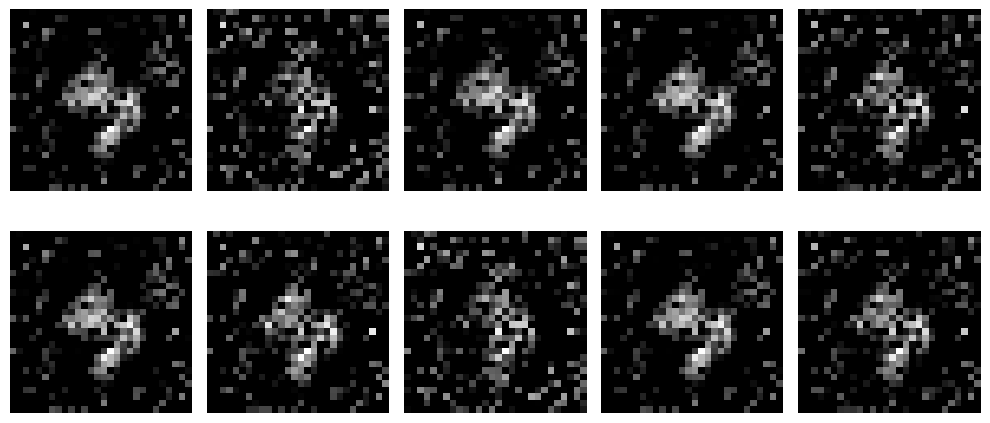

Lambda:  2.0
[15680 15700 31380 32164]
Removed 15615 params


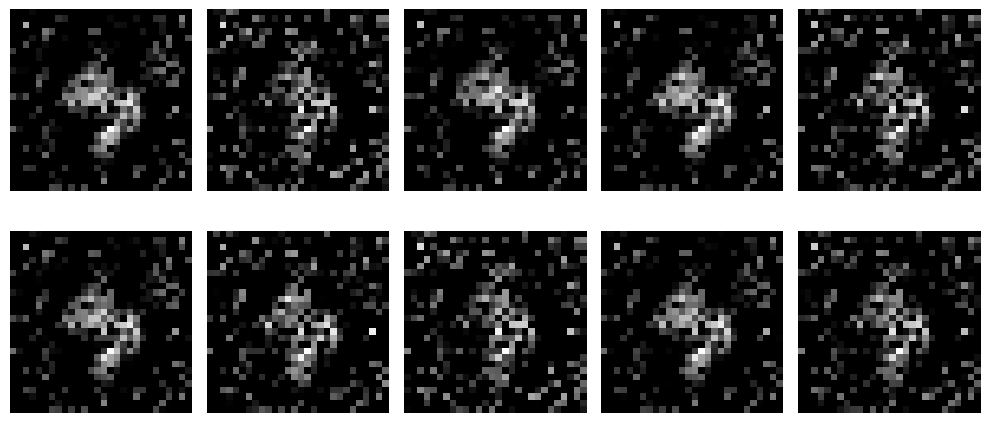

Lambda:  2.05
[15680 15700 31380 32164]
Removed 15632 params


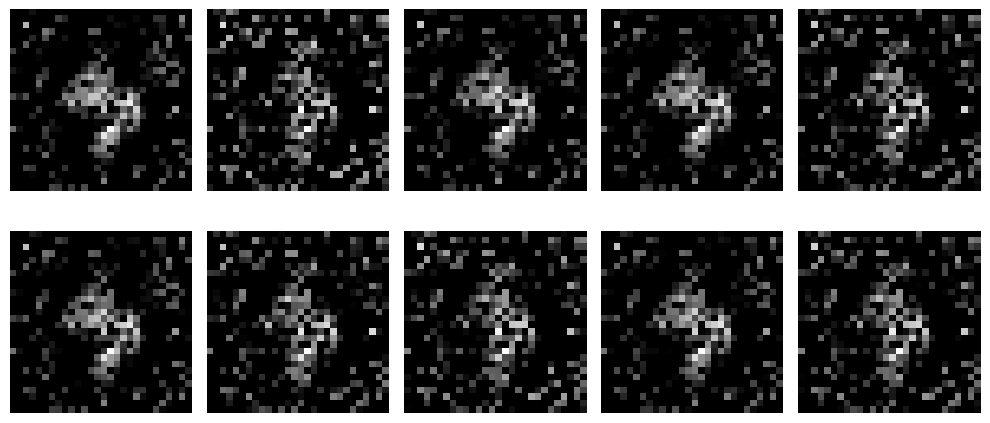

Lambda:  2.1
[15680 15700 31380 32164]
Removed 15649 params


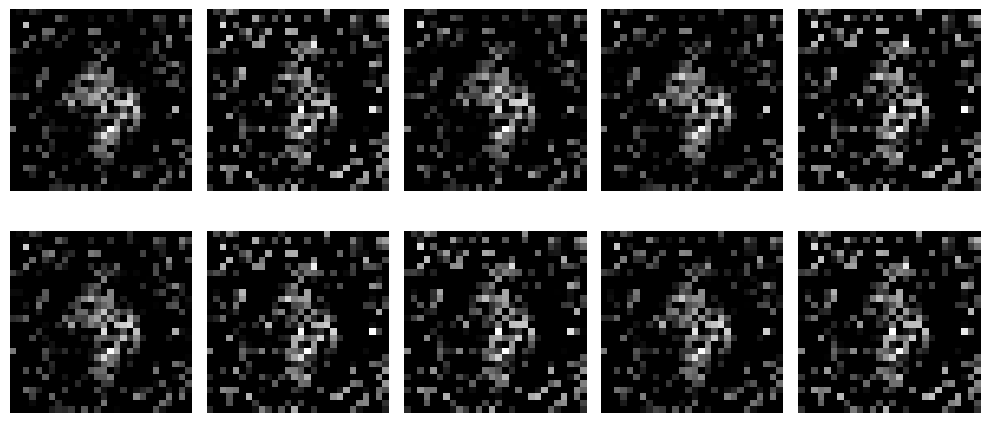

Lambda:  2.15
[15680 15700 31380 32164]
Removed 15662 params


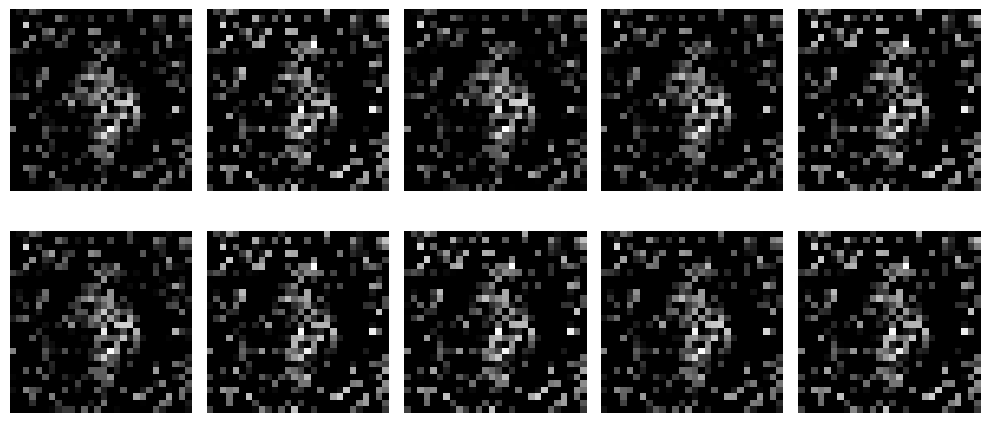

Lambda:  2.2
[15680 15700 31380 32164]
Removed 15672 params


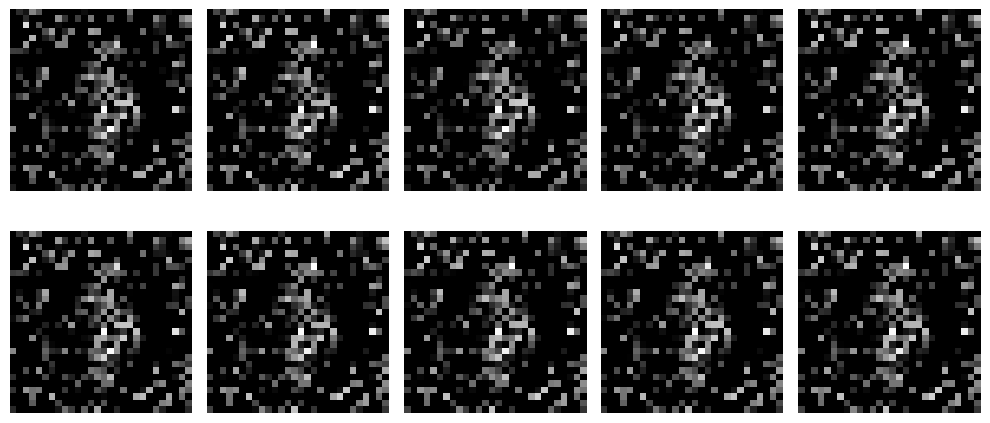

Lambda:  2.25
[15680 15700 31380 32164]
Removed 15678 params


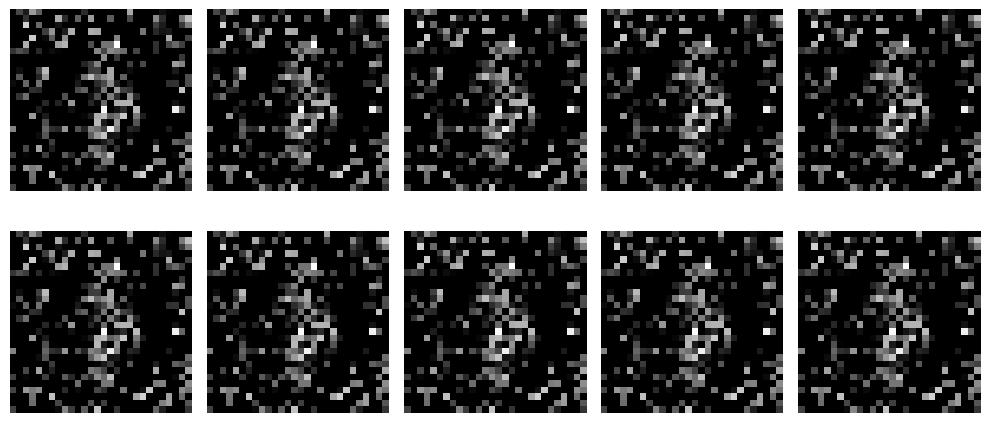

Lambda:  2.3
[15680 15700 31380 32164]
Removed 15680 params


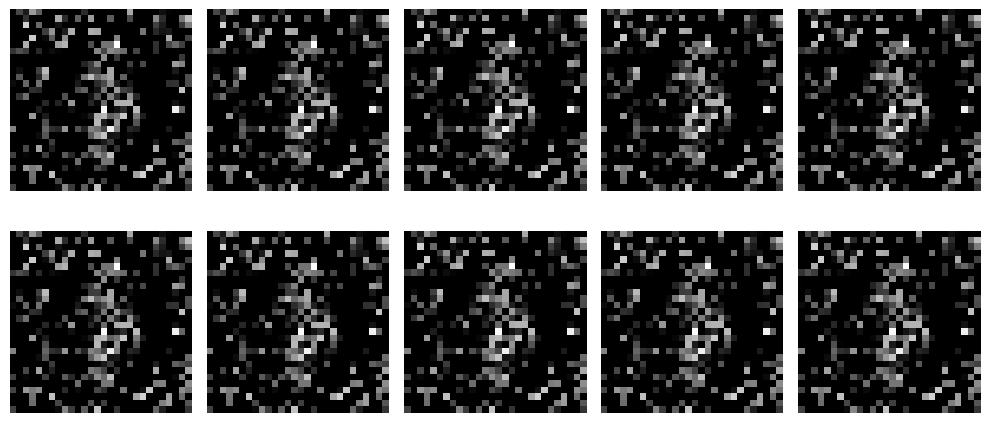

Lambda:  2.35
[15680 15700 31380 32164]
Removed 15680 params


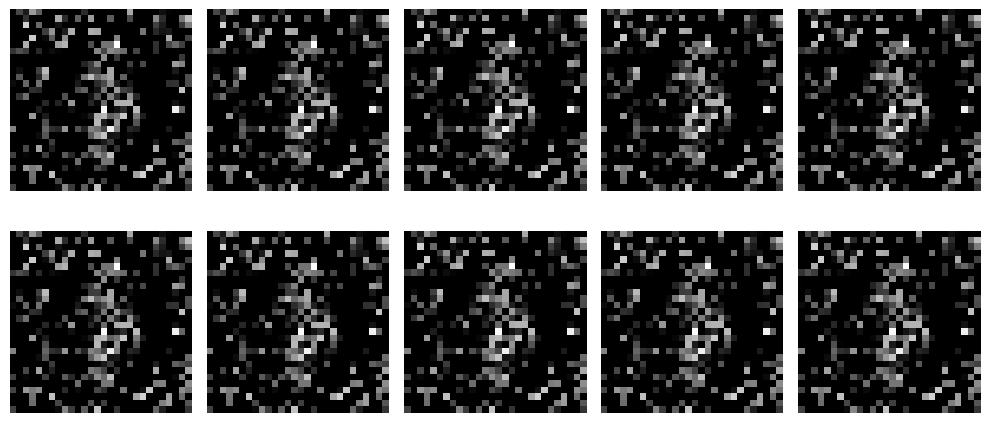

Lambda:  2.4
[15680 15700 31380 32164]
Removed 15680 params


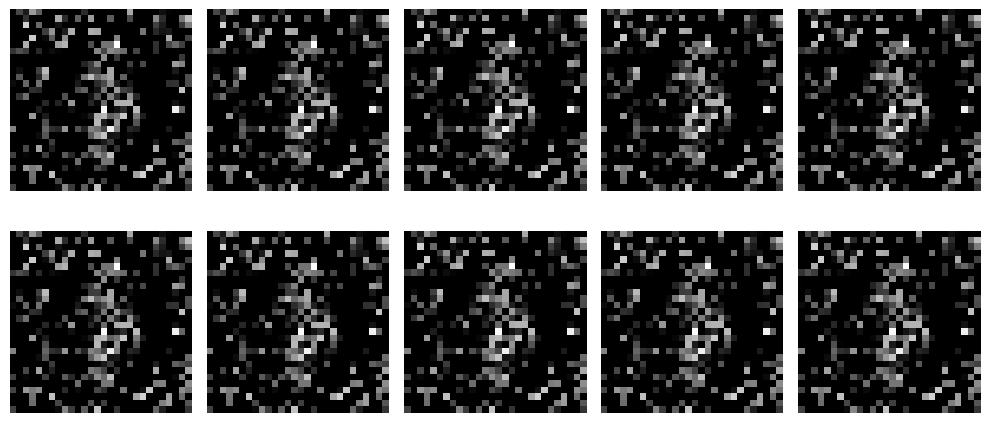

Lambda:  2.45
[15680 15700 31380 32164]
Removed 15680 params


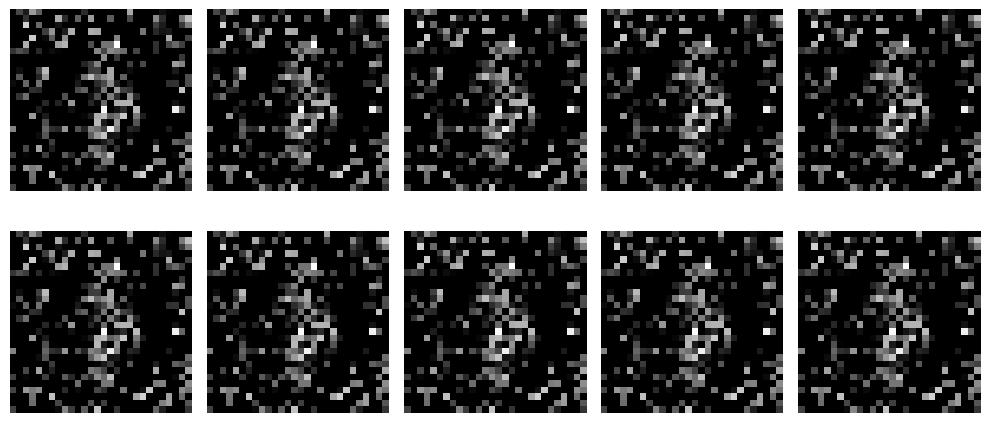

In [18]:
no_sloppy = []
fisher_mse_error = []
cutoffs = []
kl = torch.nn.MSELoss()

for cutoff in [i/1000 for i in range(100)] + [i/20 for i in range(50)]:
    cutoffs.append(cutoff)
    print('Lambda: ', cutoff)
    # Create a backup of the original model before pruning
    model_clone = copy.deepcopy(model)
    sloppy_rows = fisher_transform.get_sloppy_rows(fim, model_clone.autoencoder, cutoff=cutoff)
    _, removed_params = fisher_transform.zero_sloppy_params(fim, sloppy_rows, model_clone.autoencoder)
    no_sloppy.append(removed_params)
    stiff_autoencoded_batch = [model_clone.autoencoder(batch_0[i]) for i in range(10)]
    fisher_mse_error.append(np.mean([kl(model_clone.autoencoder(batch_0[i]), batch_0[i]).detach().numpy() for i in range(10)]))
    plot_batch(stiff_autoencoded_batch, f'plots/autoencoded_stiff_cutoff_{cutoff}_rem_{removed_params}_of_15680_params.pdf')

In [14]:
# Check number of sloppy rows in each iteration
print('Sloppy directions: ', no_sloppy)
print('Average batch KL divergences ', fisher_mse_error)

Sloppy directions:  [5496, 9335, 9992, 10311, 10658, 10889, 11061, 11237, 11396, 11550, 11689, 11824, 11968, 12105, 12226, 12317, 12428, 12561, 12664, 12818, 12979, 13135, 13312, 13477, 13688, 13879, 14055, 14230, 14406, 14575, 14744, 14906, 15042, 15171, 15277, 15386, 15456, 15515, 15557, 15596, 15615, 15632, 15649, 15662, 15672, 15678, 15680, 15680, 15680, 15680, 5496, 6807, 7179, 7427, 7578, 7740, 7865, 7975, 8051, 8112, 8161, 8212, 8268, 8323, 8368, 8413, 8463, 8508, 8530, 8563, 8601, 8624, 8654, 8676, 8695, 8729, 8757, 8775, 8810, 8837, 8875, 8901, 8932, 8957, 8983, 9003, 9027, 9049, 9067, 9096, 9123, 9149, 9179, 9201, 9218, 9244, 9262, 9278, 9297, 9318, 9335, 9353, 9376, 9391, 9408, 9419, 9431, 9445, 9463, 9478, 9494, 9506, 9523, 9537, 9556, 9573, 9587, 9600, 9621, 9632, 9642, 9653, 9658, 9674, 9686, 9697, 9713, 9726, 9736, 9745, 9761, 9772, 9781, 9789, 9797, 9815, 9827, 9841, 9855, 9865, 9881, 9891, 9904, 9915, 9925, 9938, 9946, 9960, 9975, 9983]
Average batch KL divergences  [0

Removed 5496 params


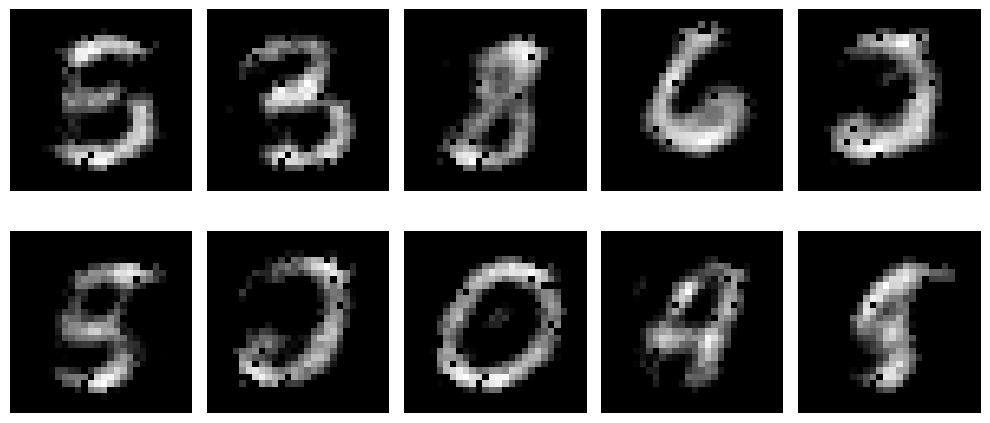

Removed 6807 params


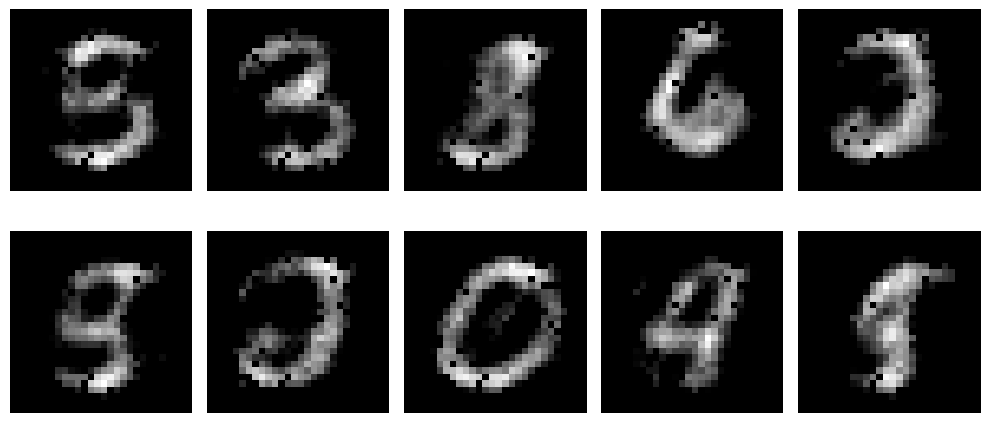

Removed 7179 params


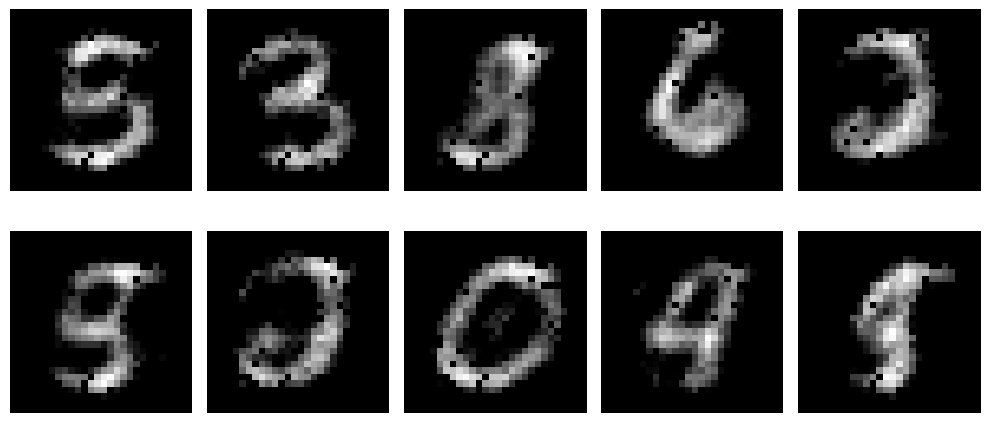

Removed 7427 params


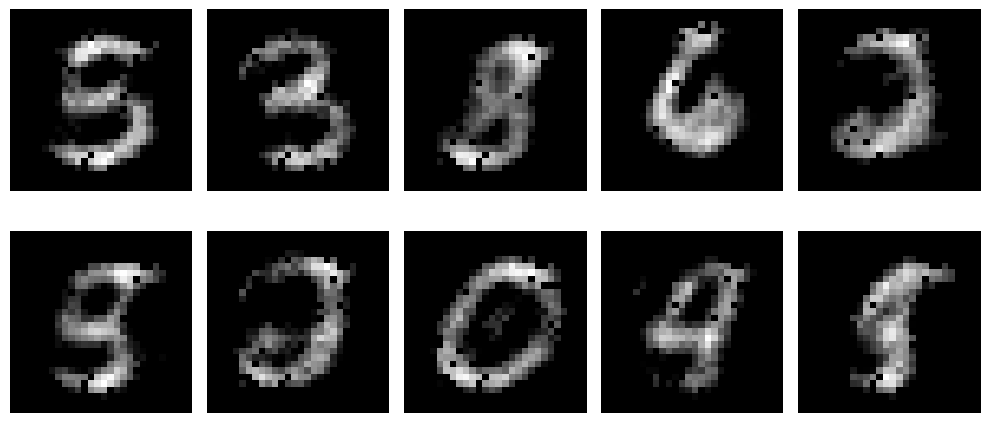

Removed 7578 params


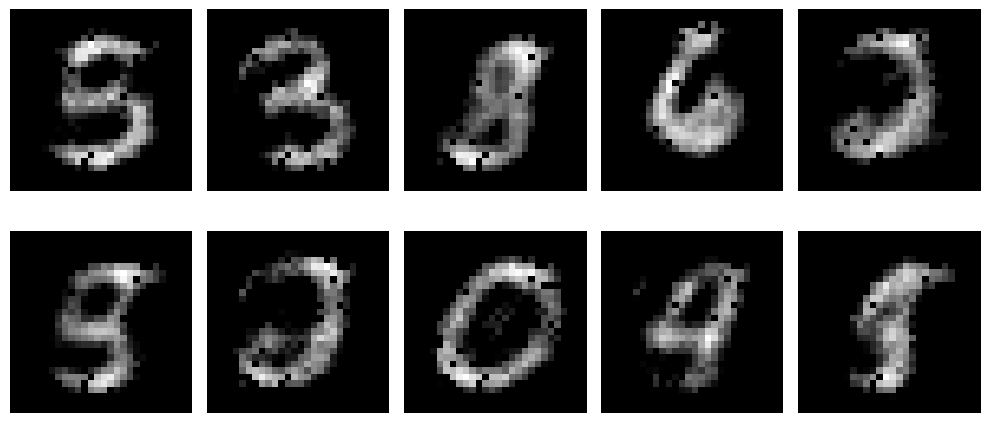

Removed 7740 params


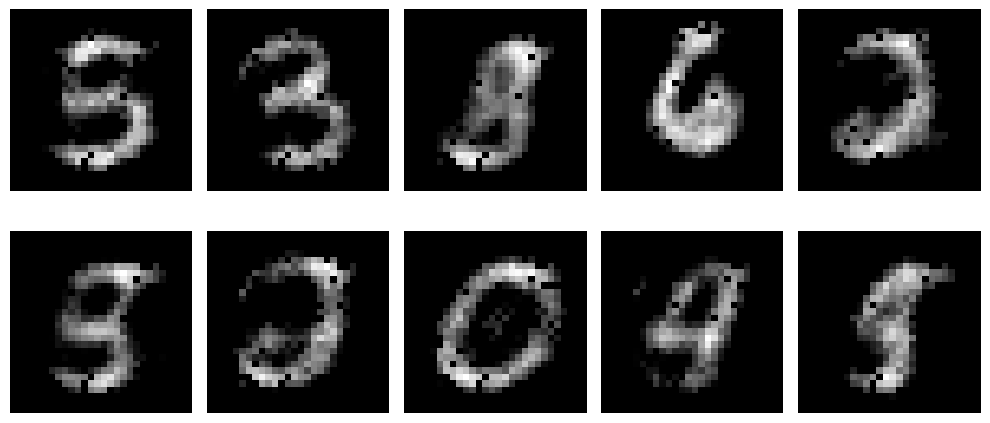

Removed 7865 params


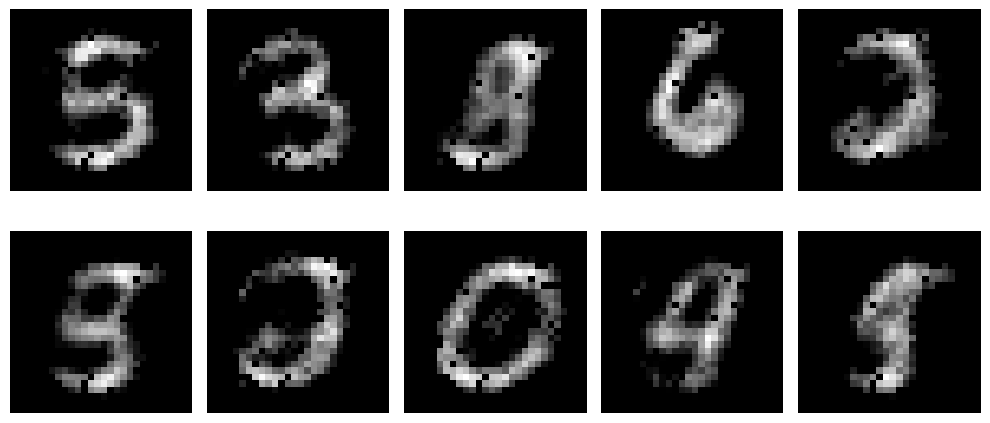

Removed 7975 params


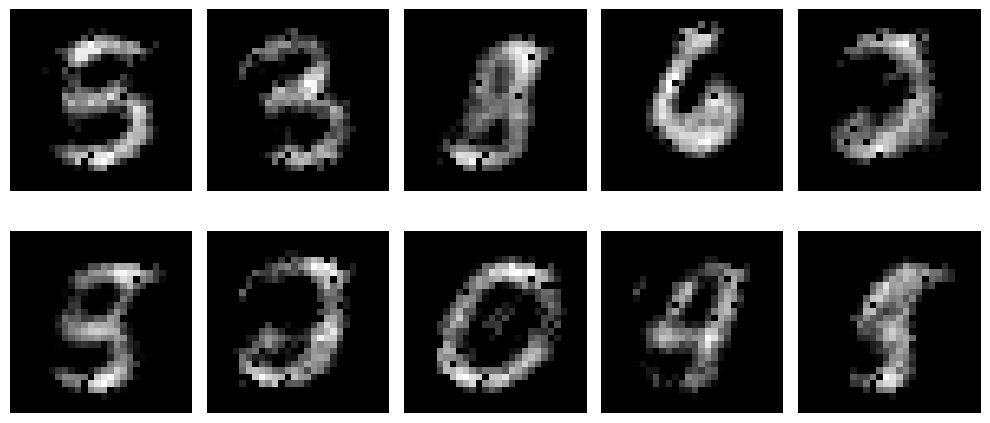

Removed 8051 params


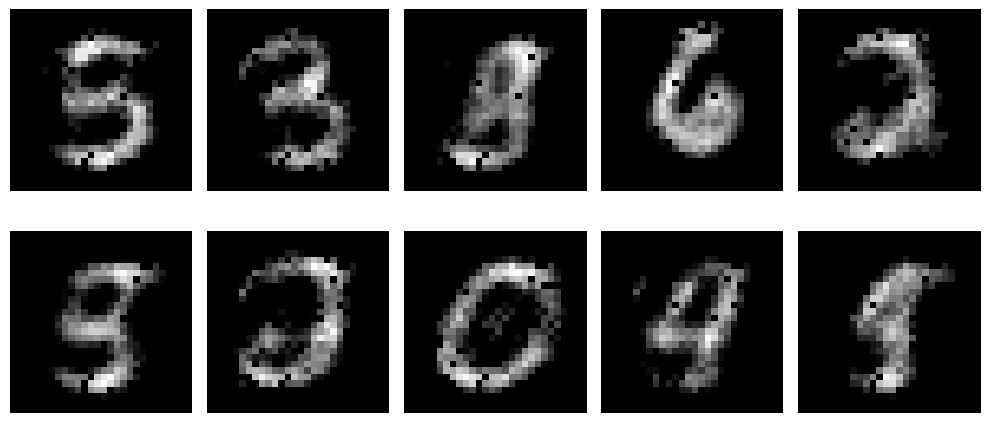

Removed 8112 params


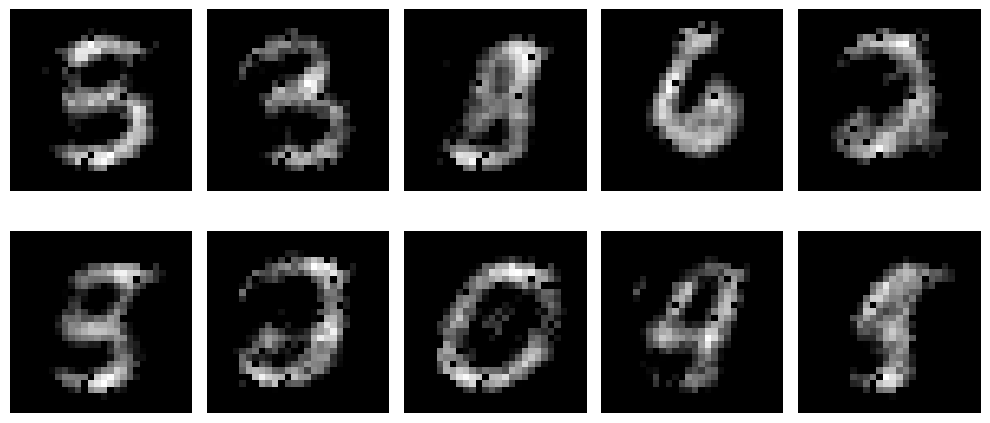

Removed 8161 params


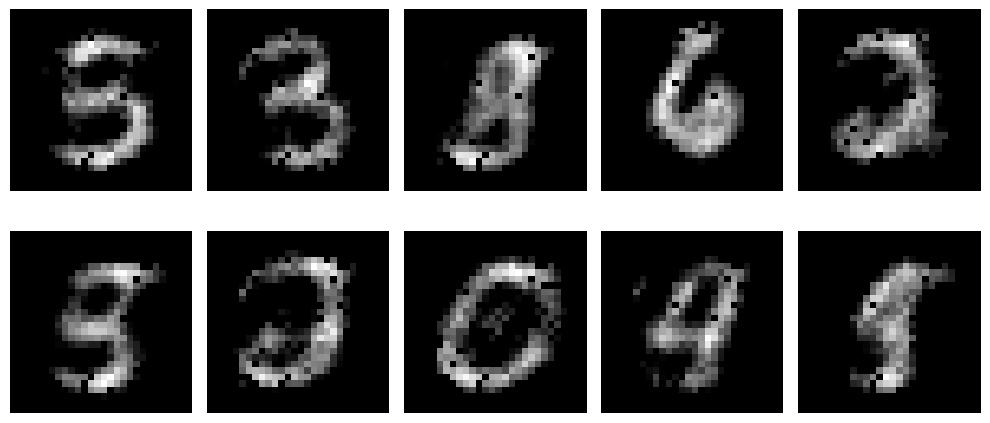

Removed 8212 params


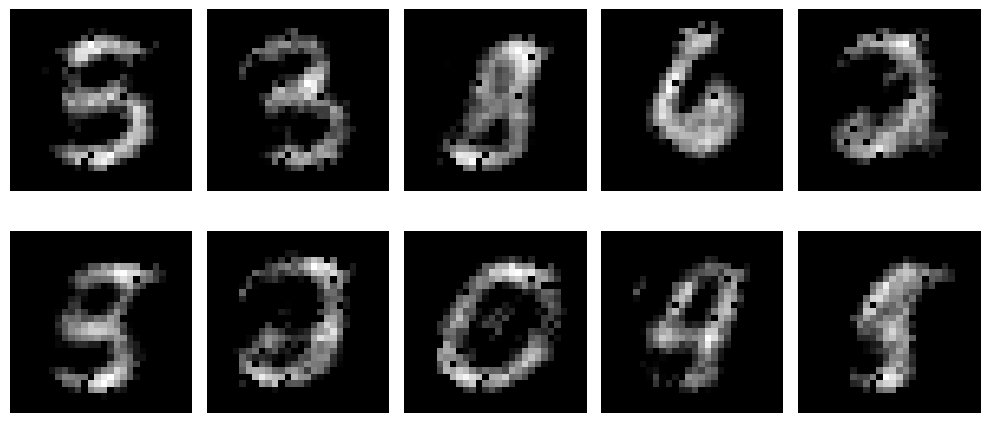

Removed 8268 params


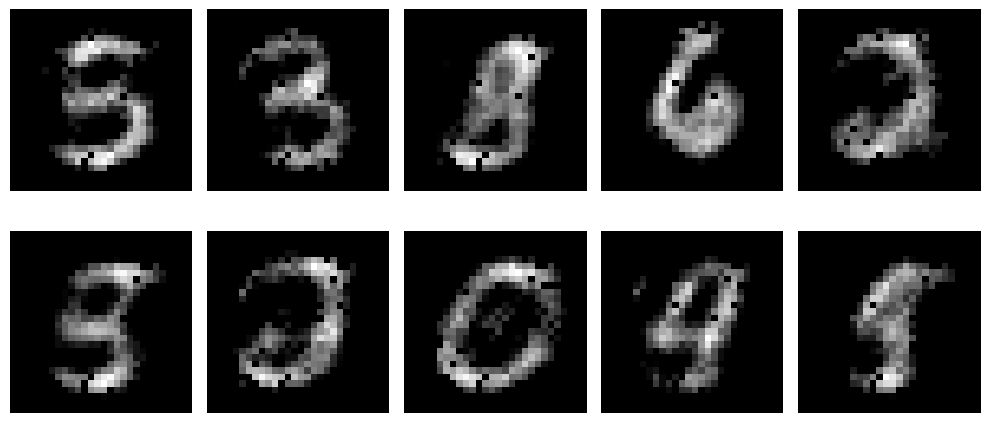

Removed 8323 params


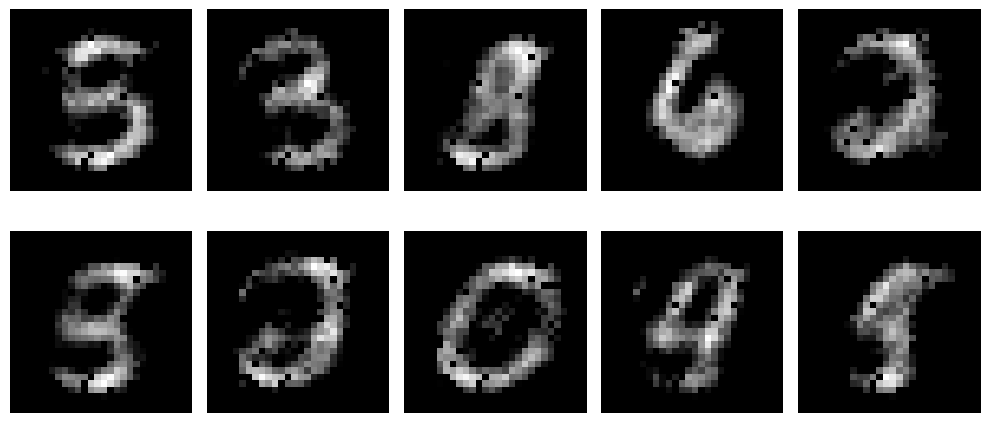

Removed 8368 params


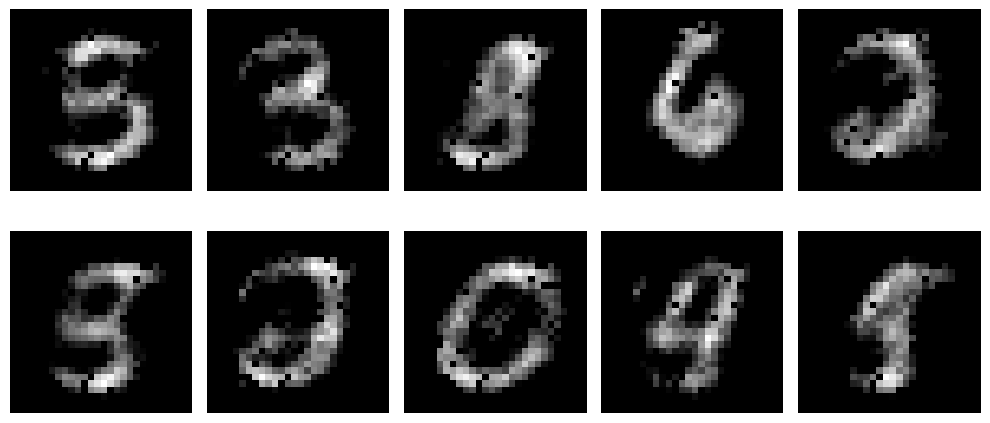

Removed 8413 params


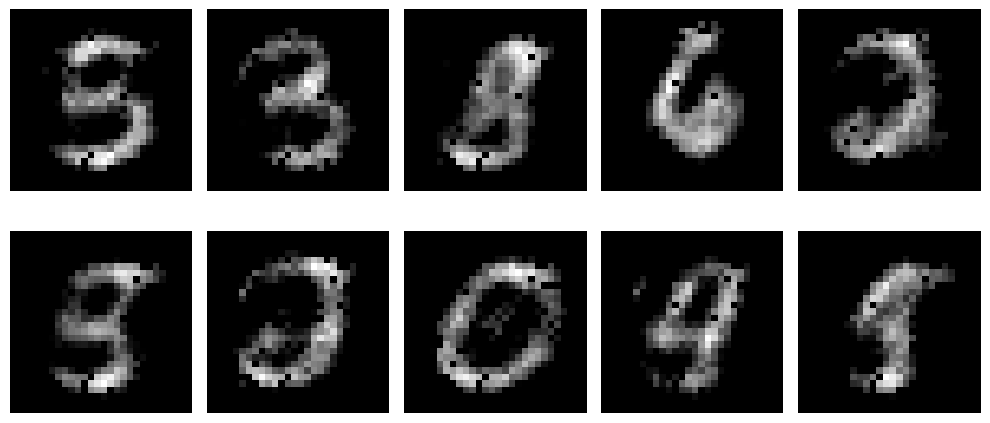

Removed 8463 params


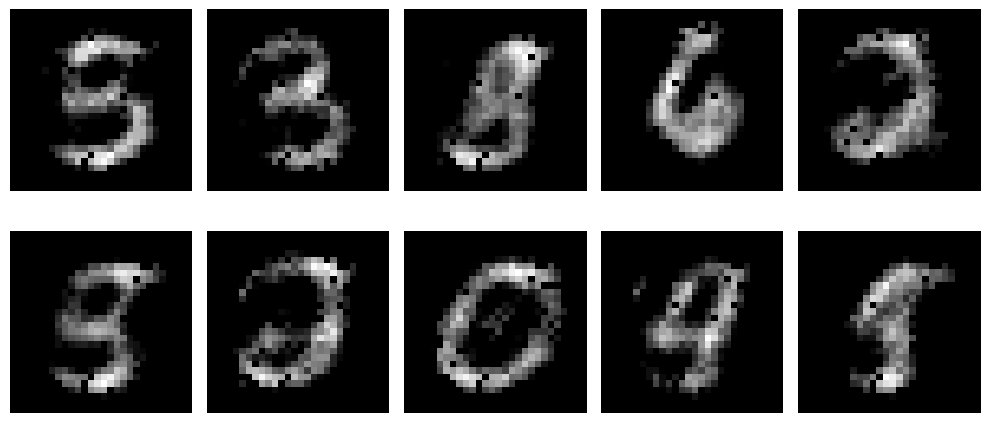

Removed 8508 params


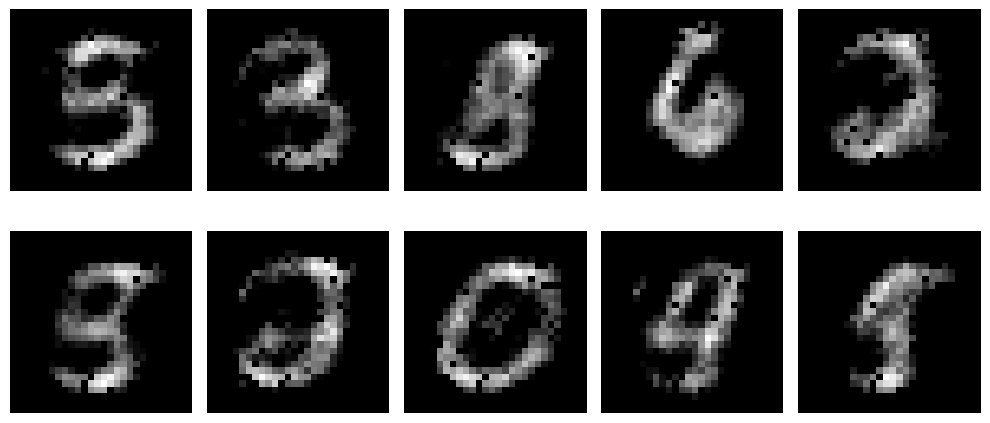

Removed 8530 params


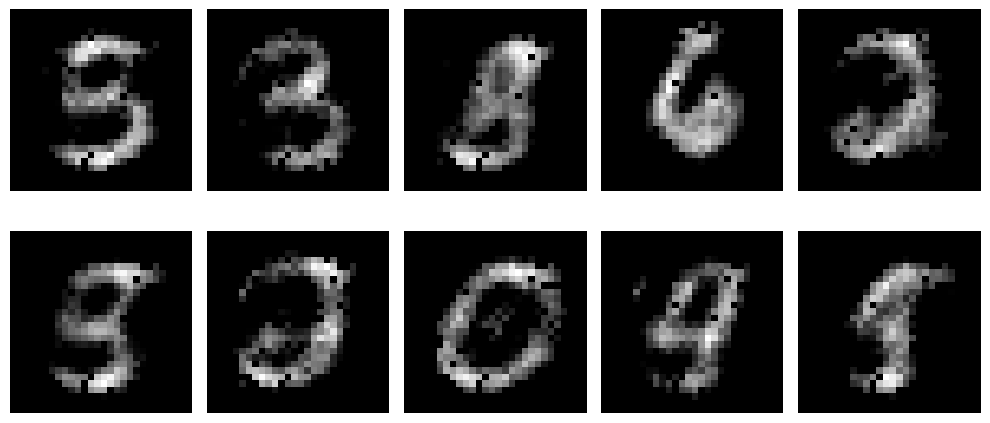

Removed 8563 params


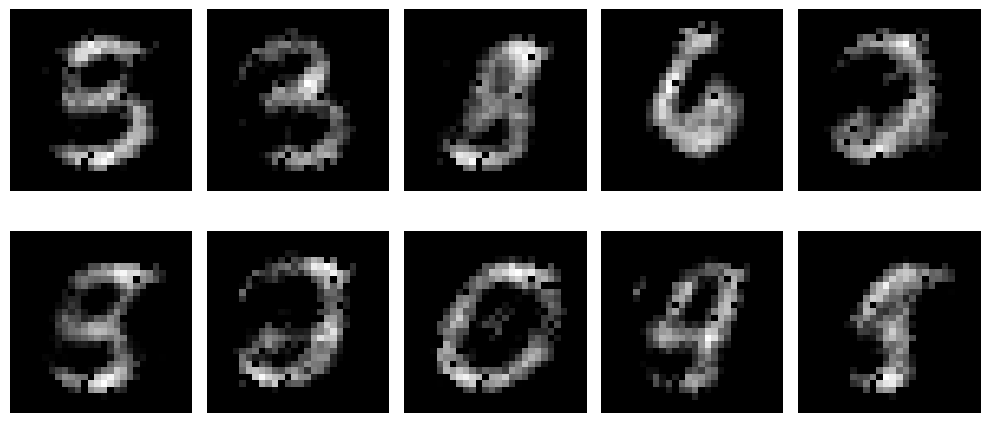

Removed 8601 params


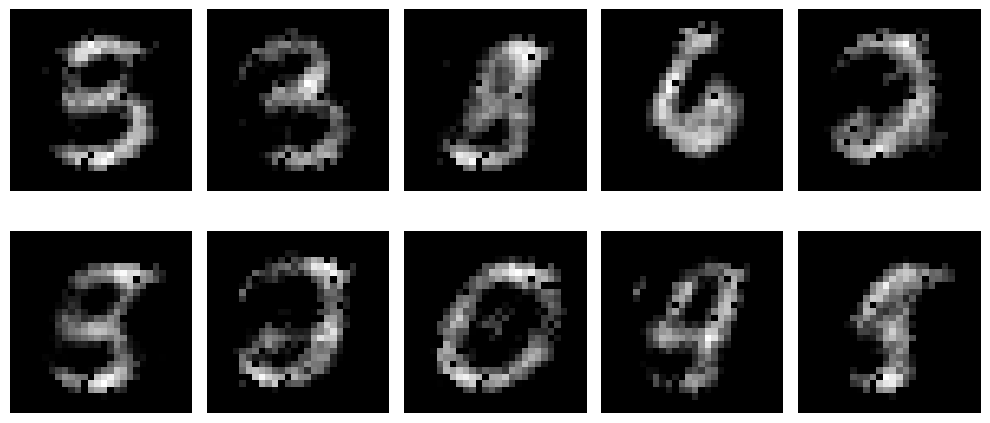

Removed 8624 params


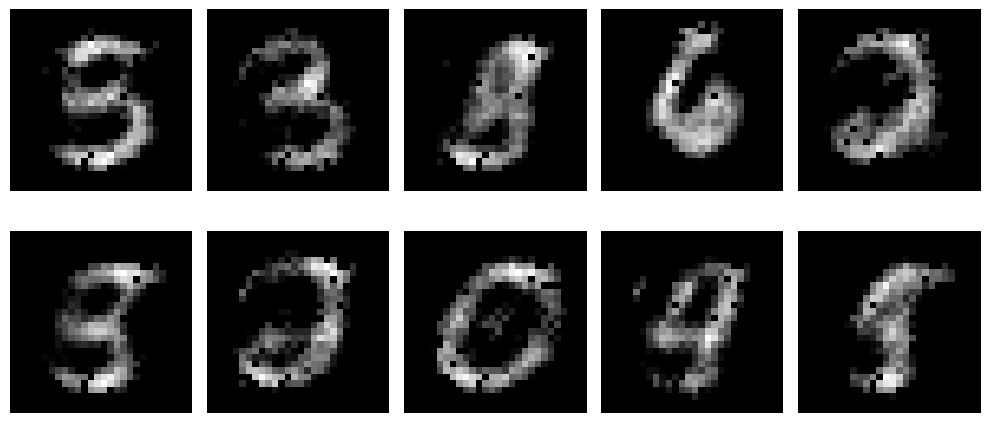

Removed 8654 params


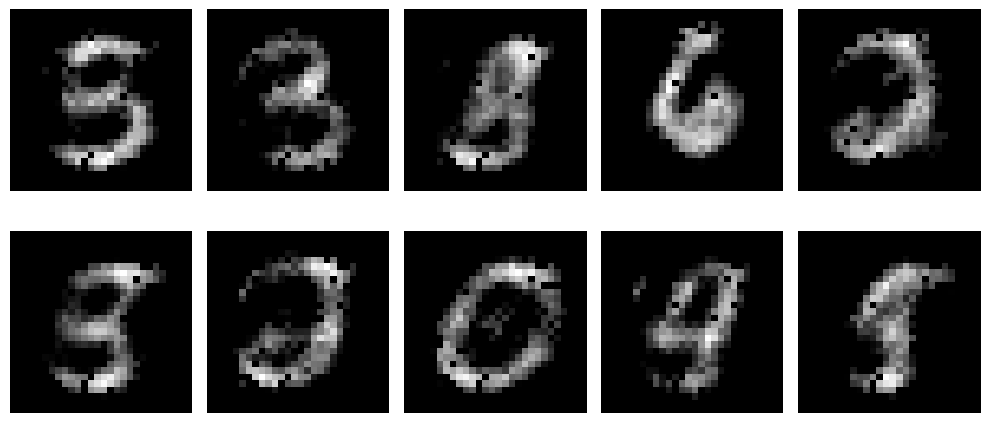

Removed 8676 params


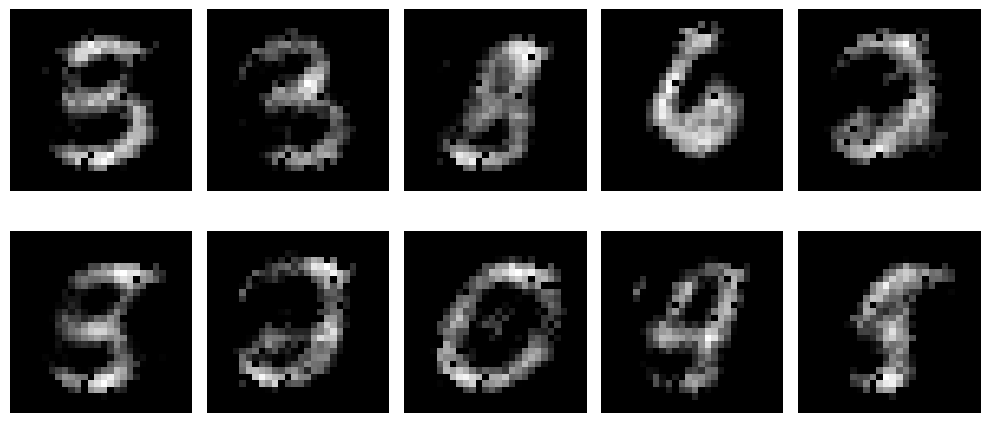

Removed 8695 params


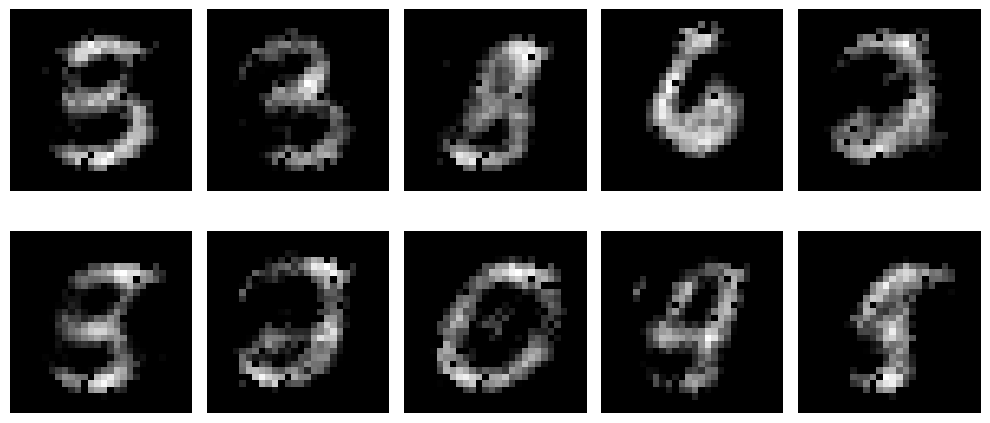

Removed 8729 params


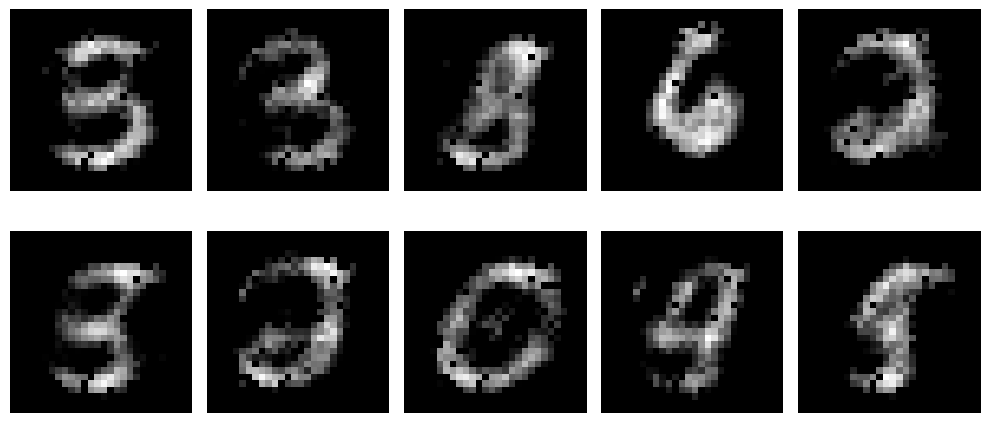

Removed 8757 params


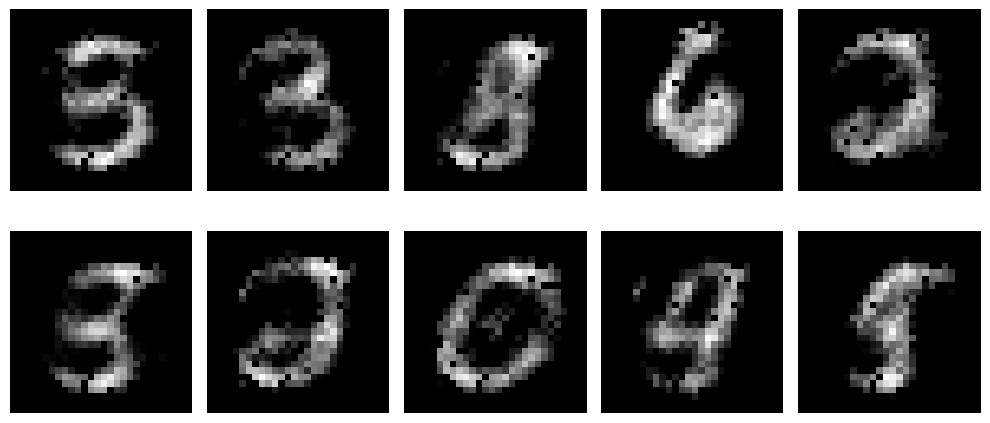

Removed 8775 params


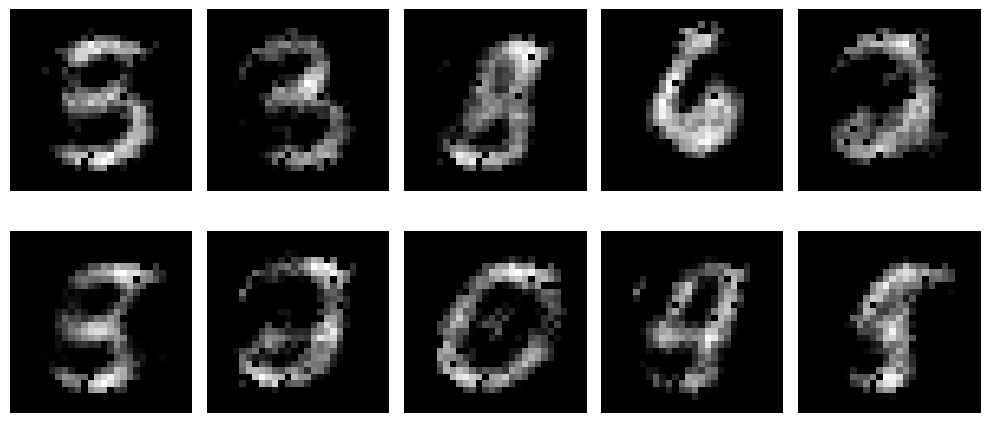

Removed 8810 params


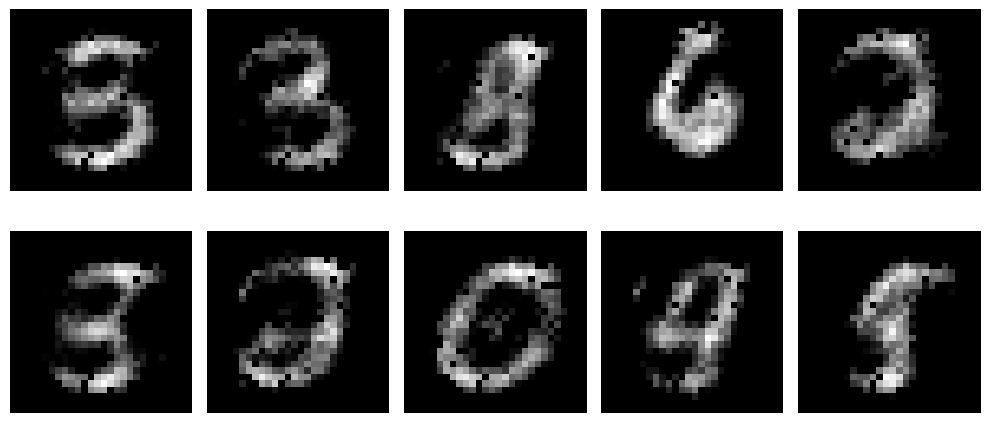

Removed 8837 params


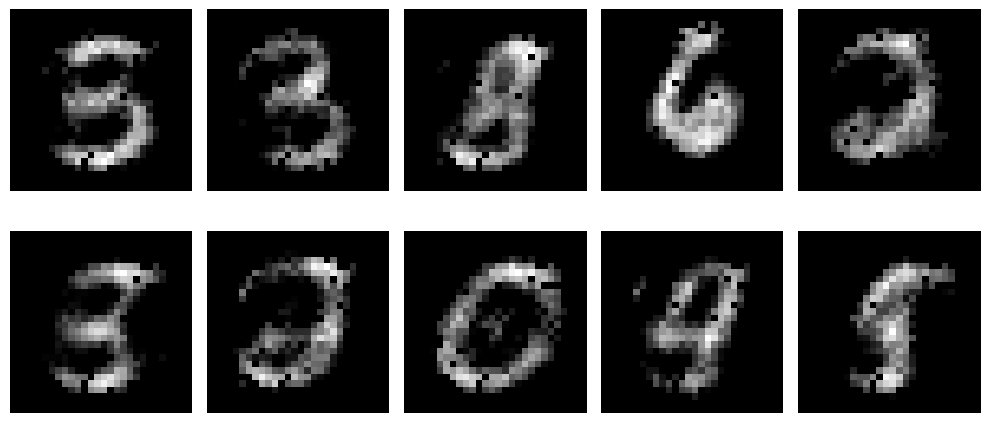

Removed 8875 params


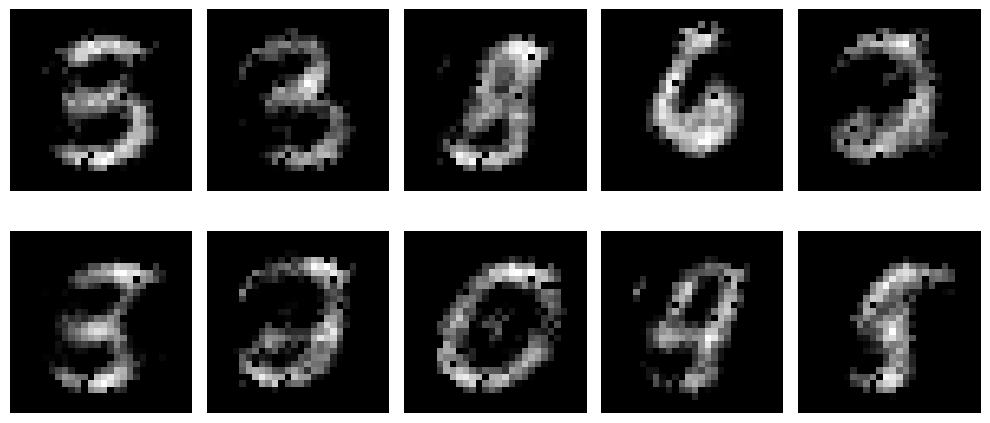

Removed 8901 params


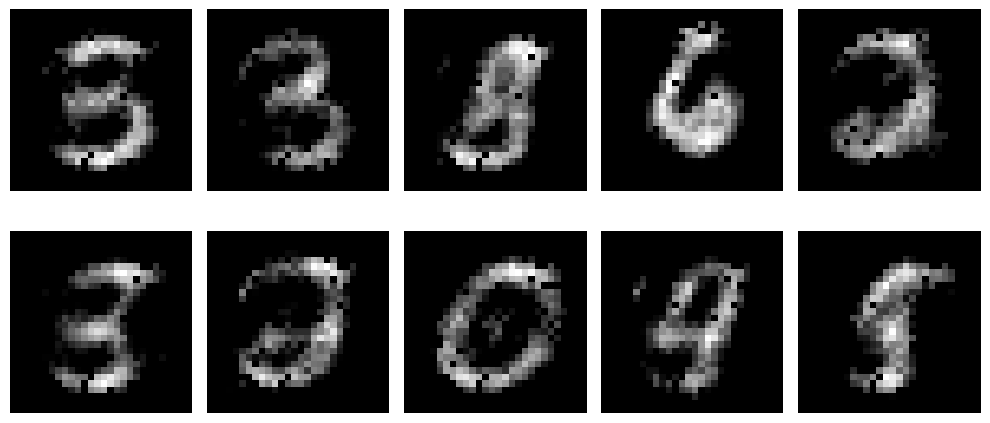

Removed 8932 params


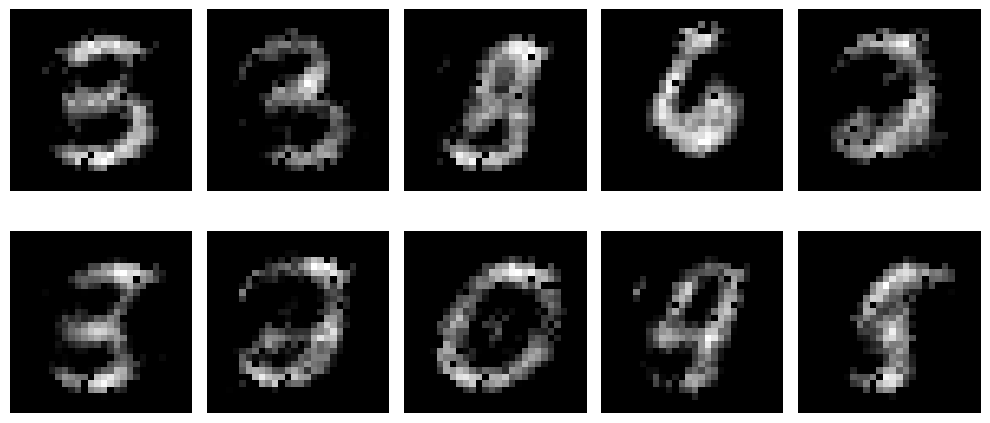

Removed 8957 params


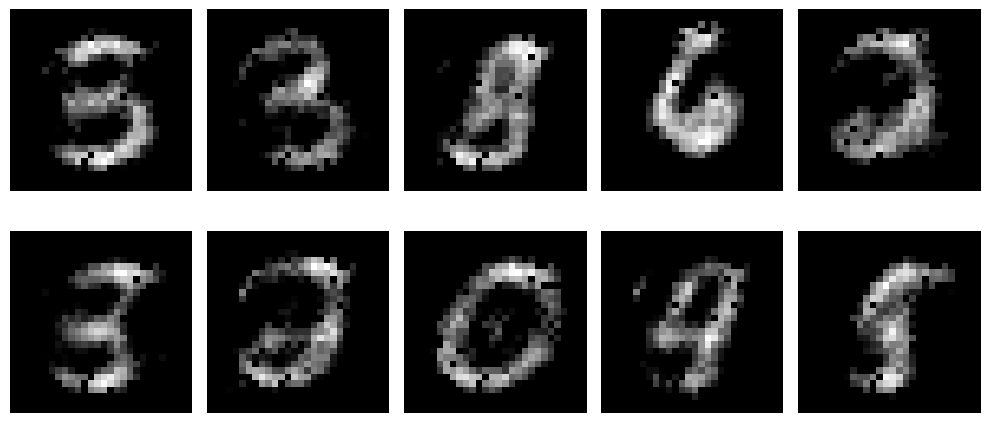

Removed 8983 params


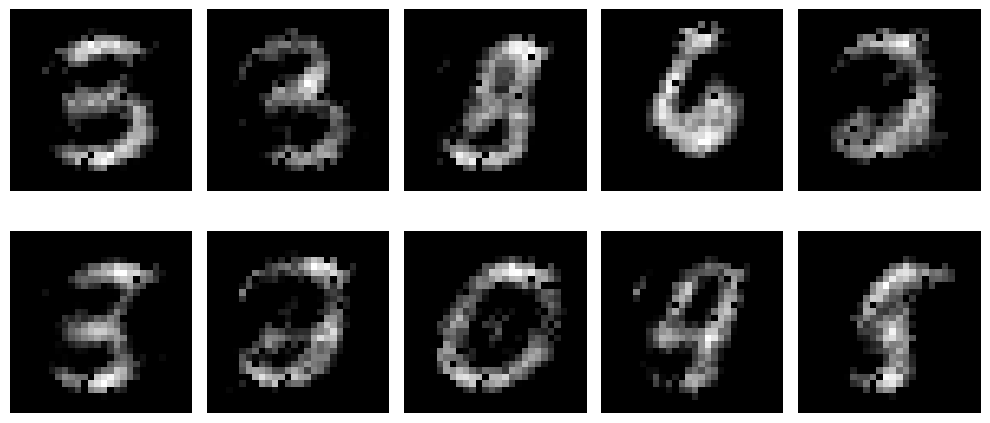

Removed 9003 params


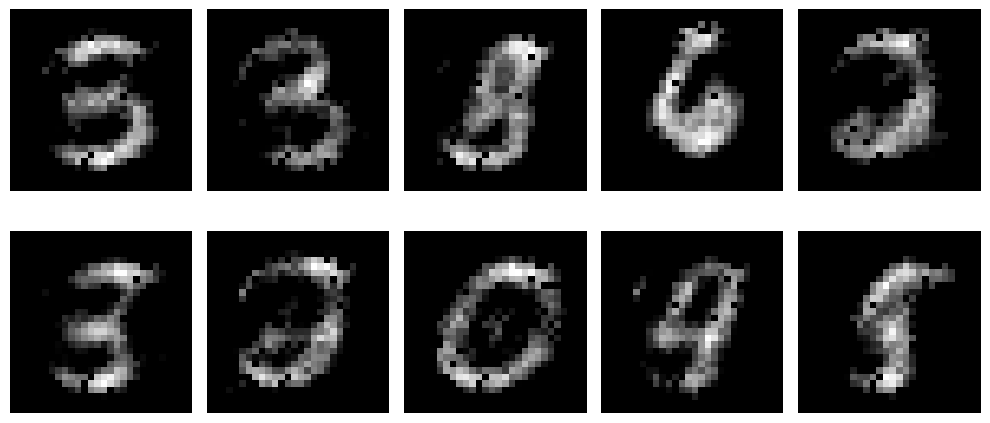

Removed 9027 params


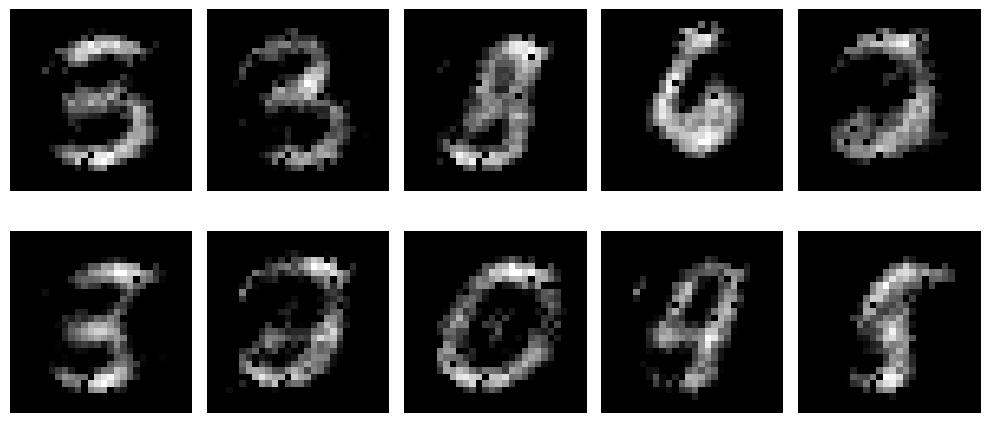

Removed 9049 params


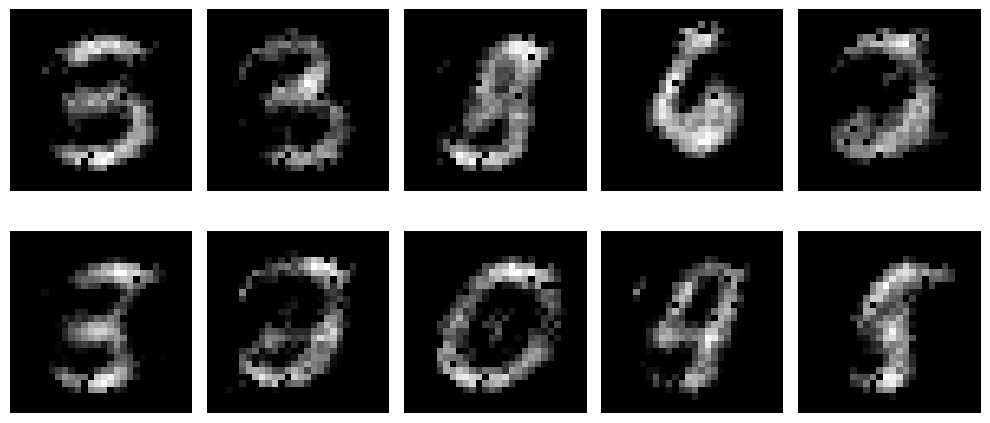

Removed 9067 params


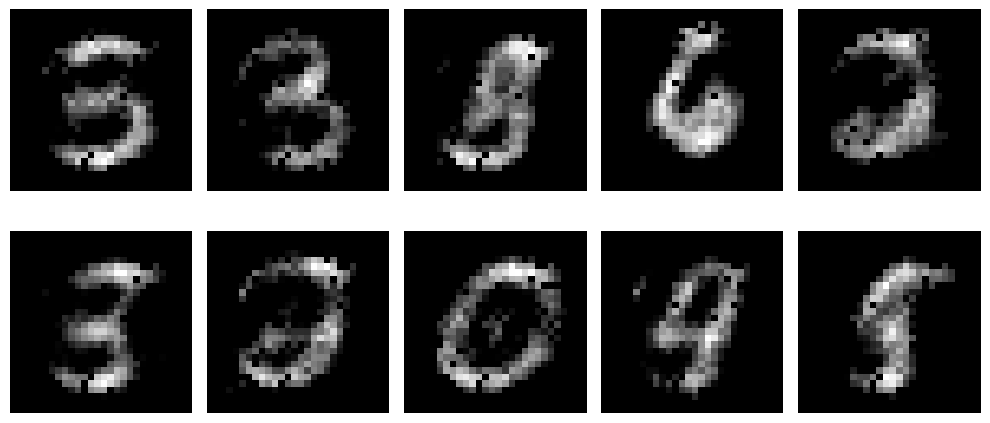

Removed 9096 params


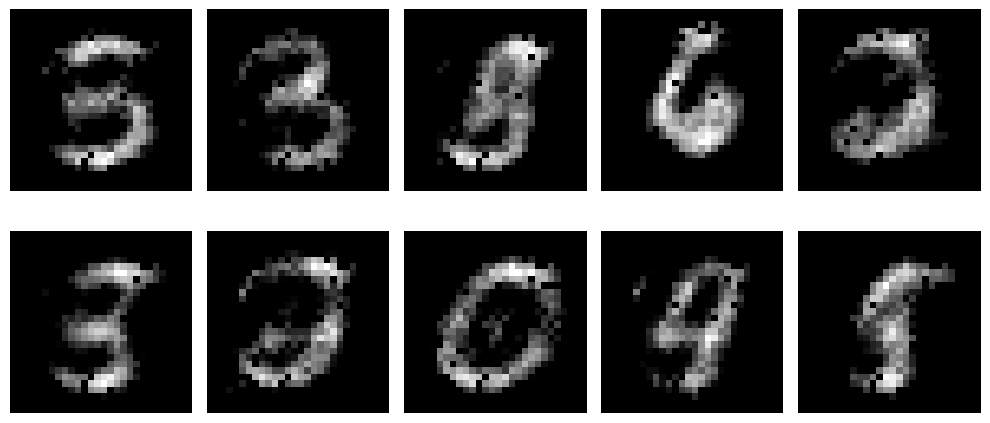

Removed 9123 params


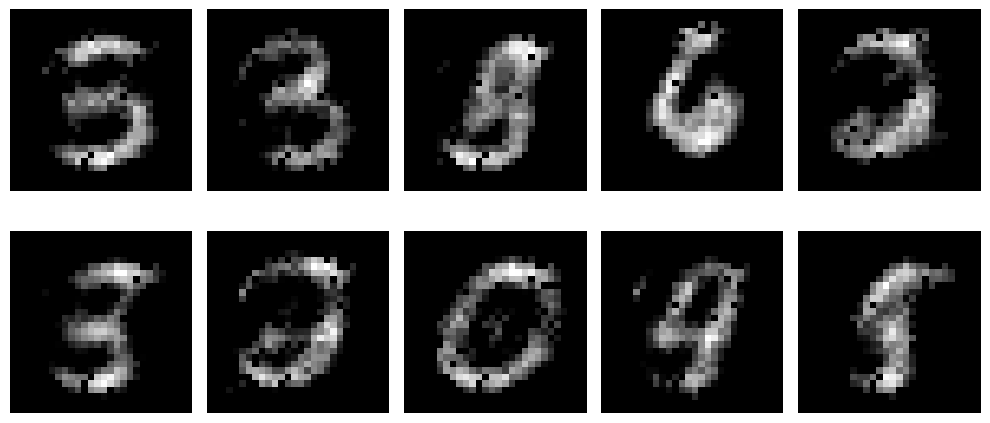

Removed 9149 params


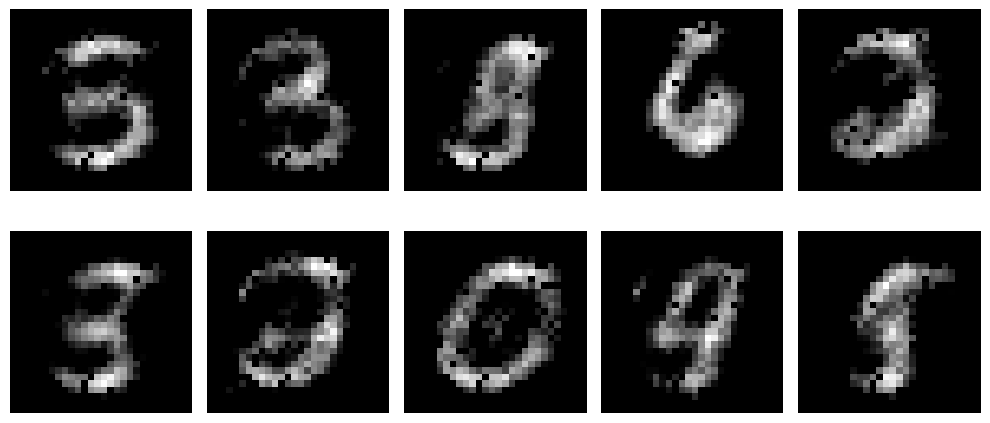

Removed 9179 params


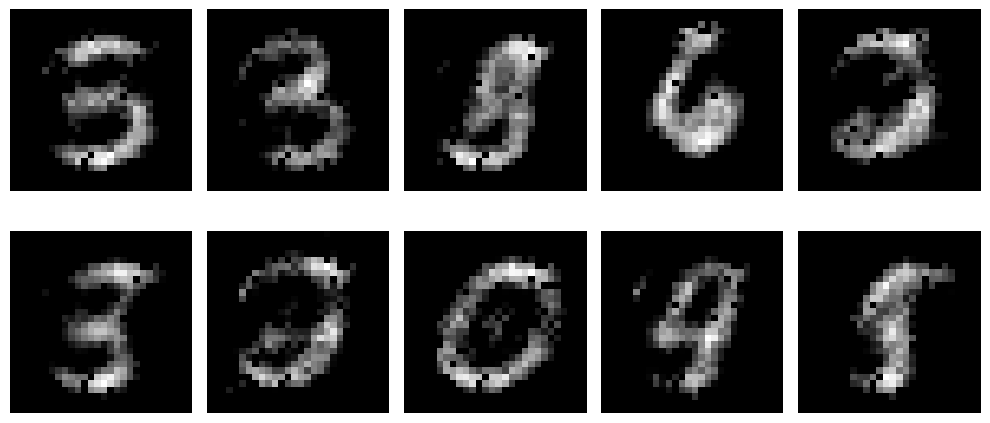

Removed 9201 params


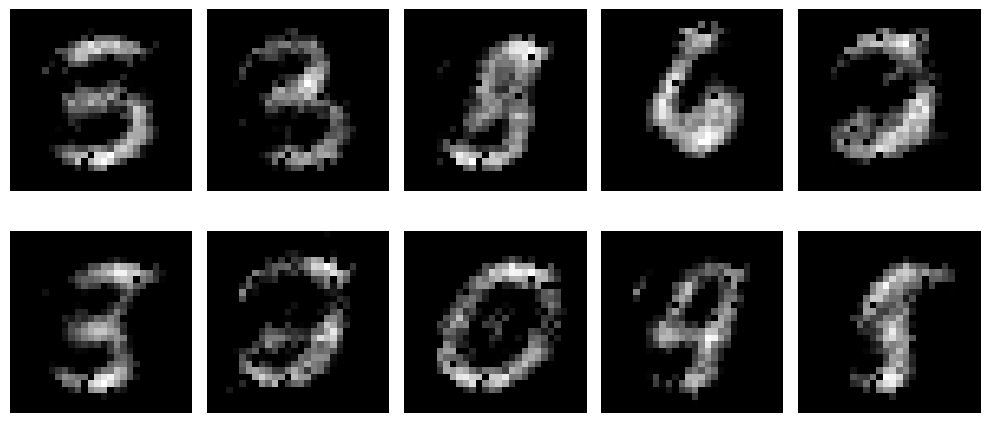

Removed 9218 params


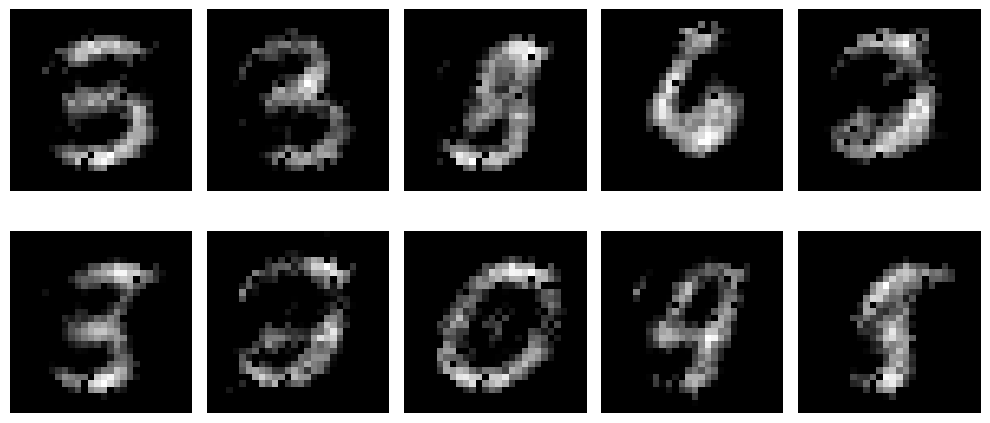

Removed 9244 params


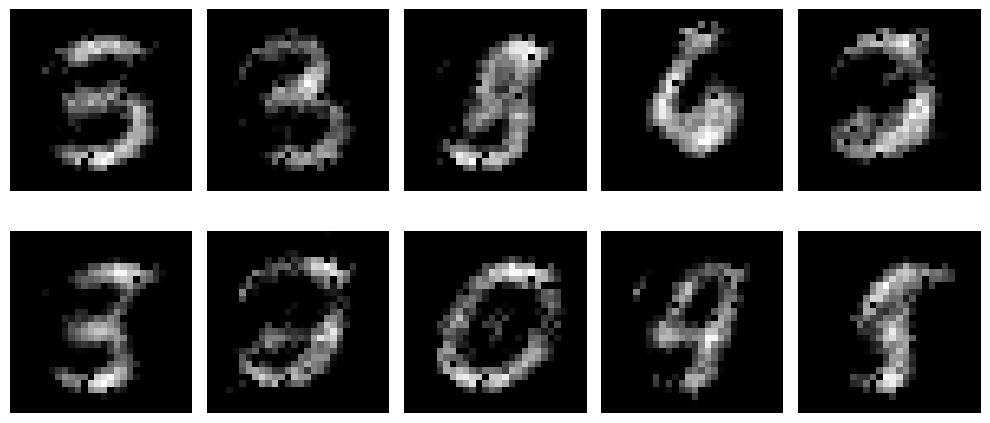

Removed 9262 params


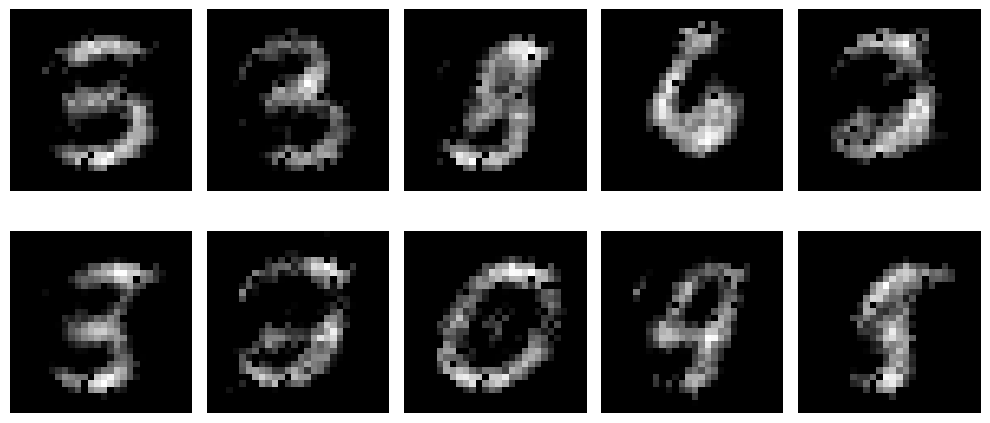

Removed 9278 params


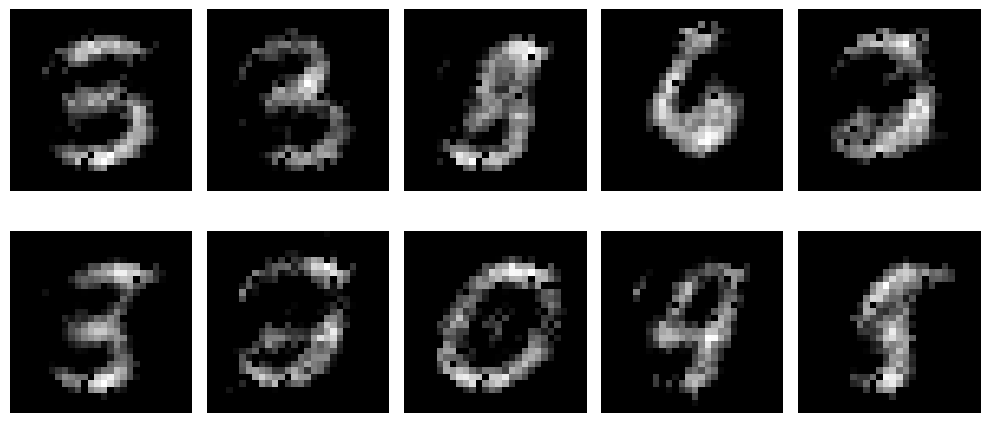

Removed 9297 params


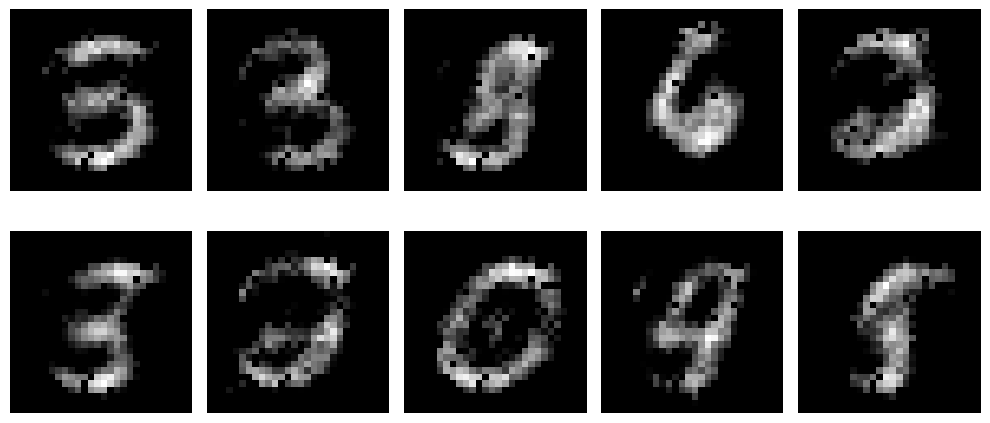

Removed 9318 params


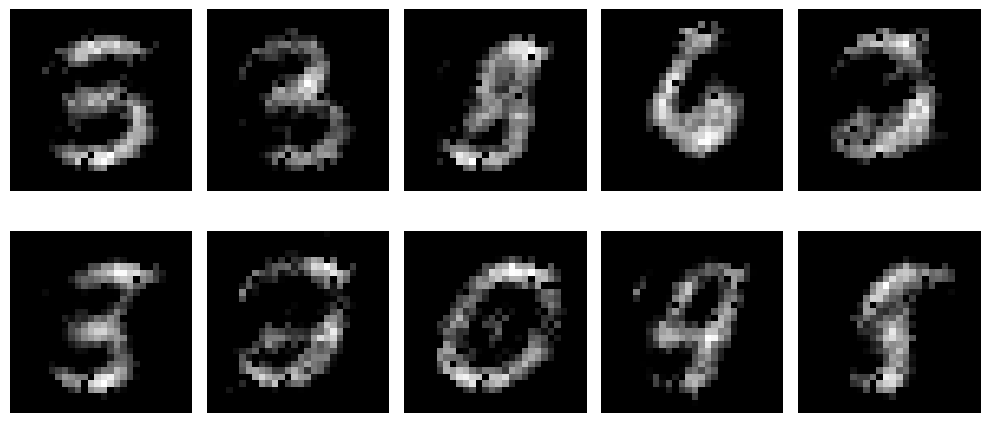

Removed 9335 params


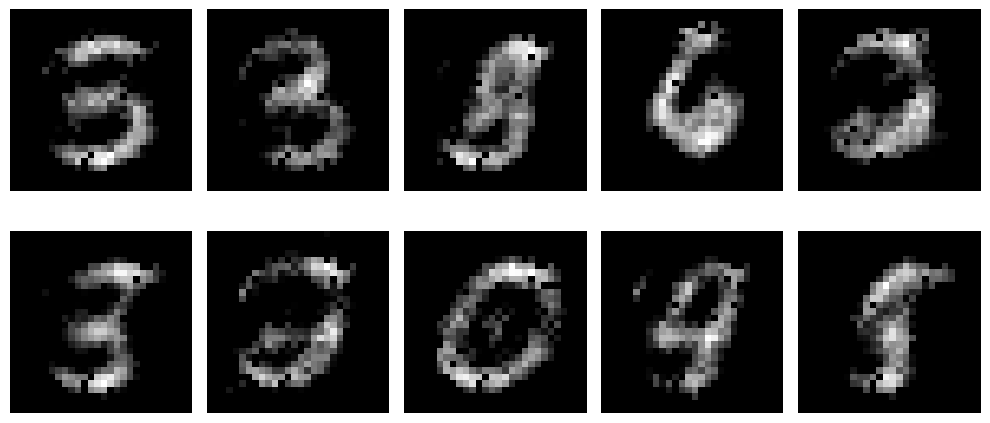

Removed 9353 params


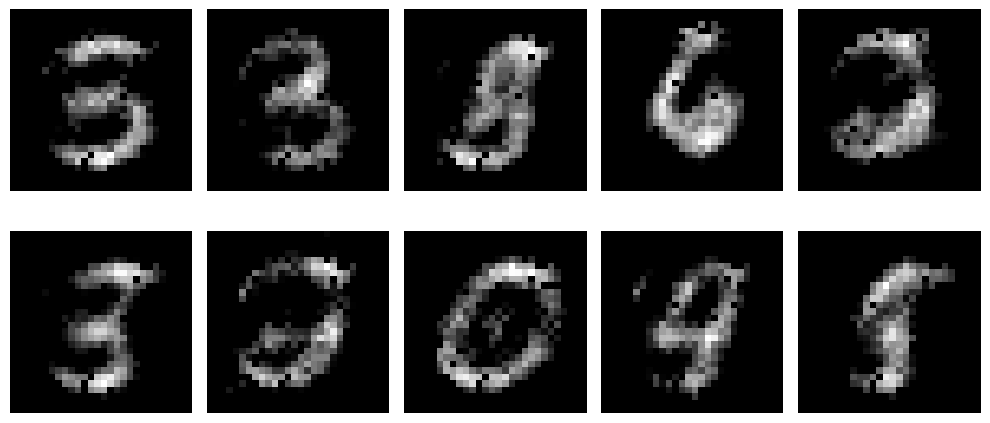

Removed 9376 params


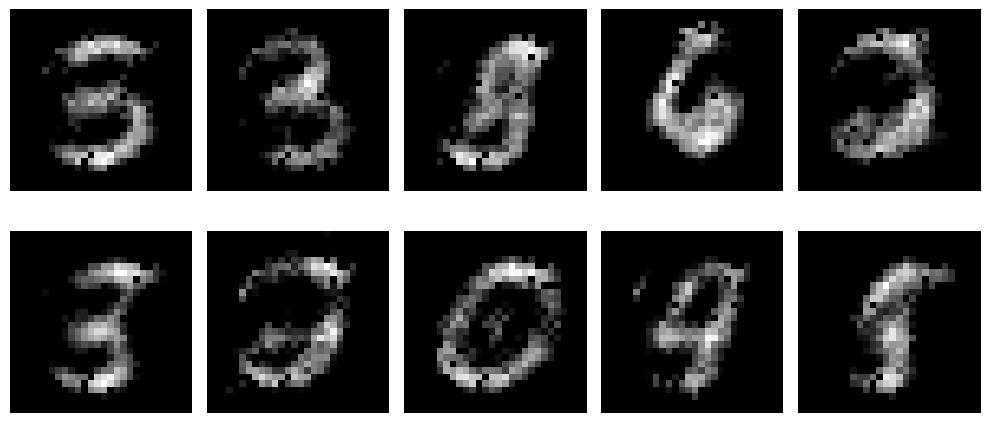

Removed 9391 params


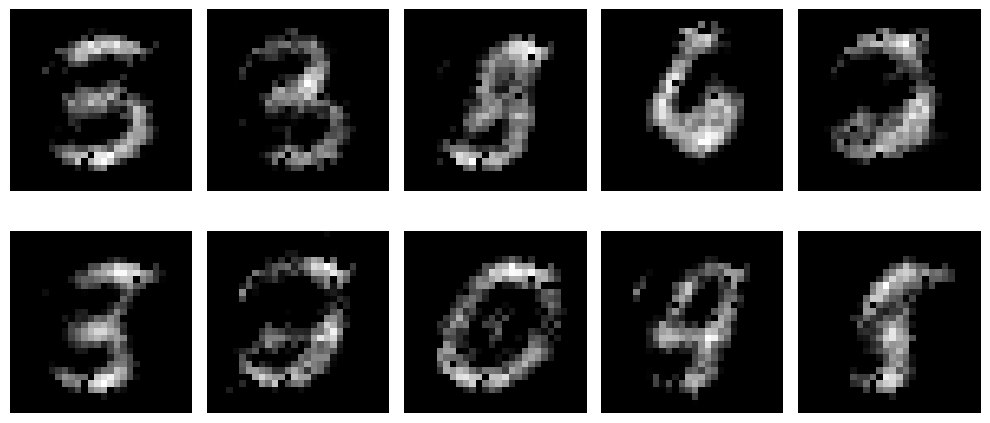

Removed 9408 params


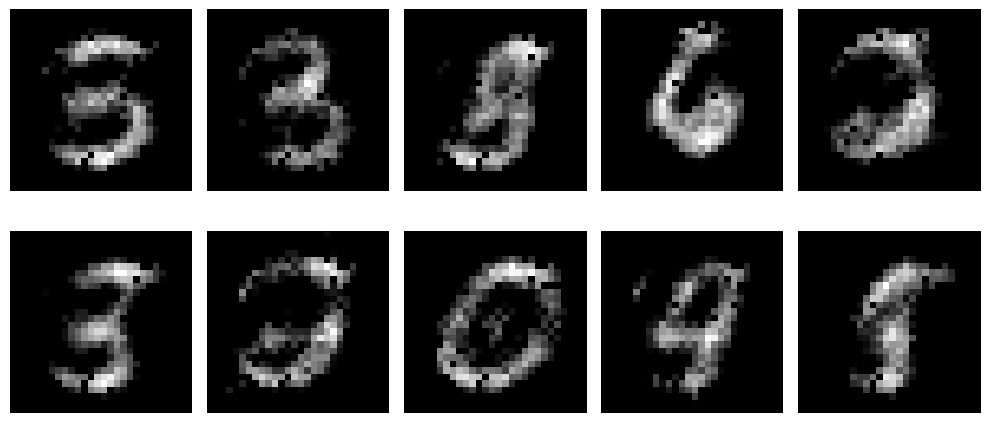

Removed 9419 params


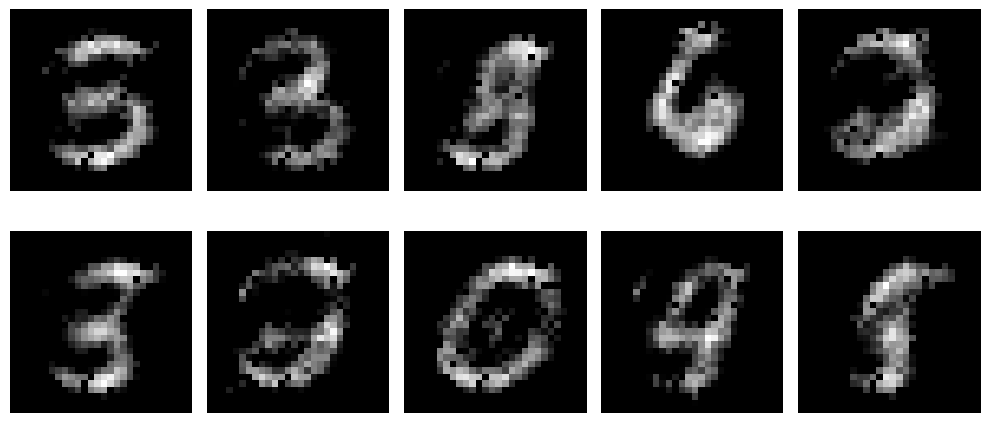

Removed 9431 params


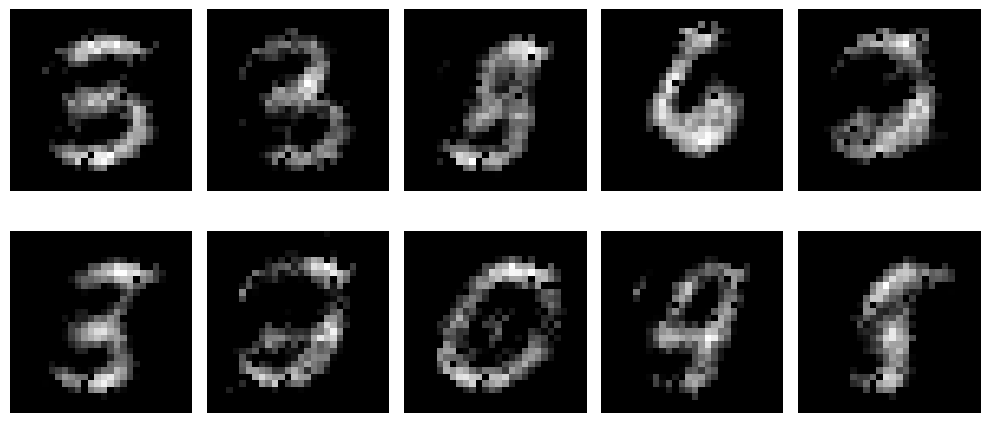

Removed 9445 params


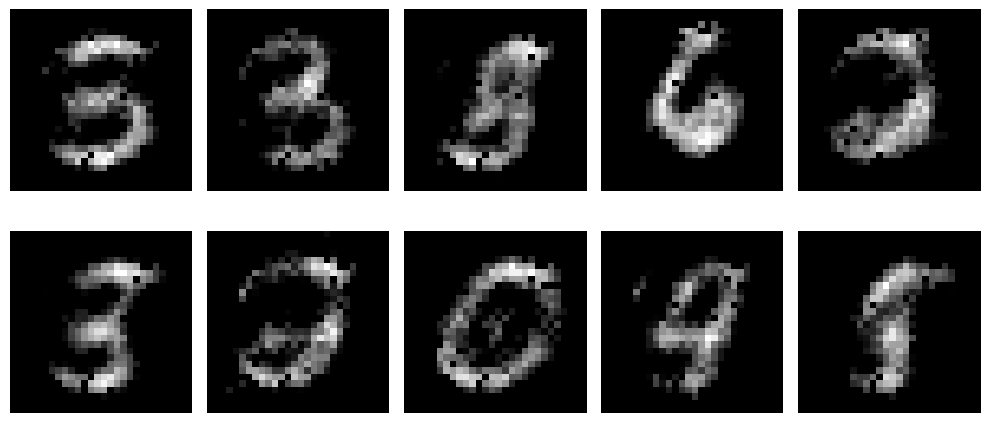

Removed 9463 params


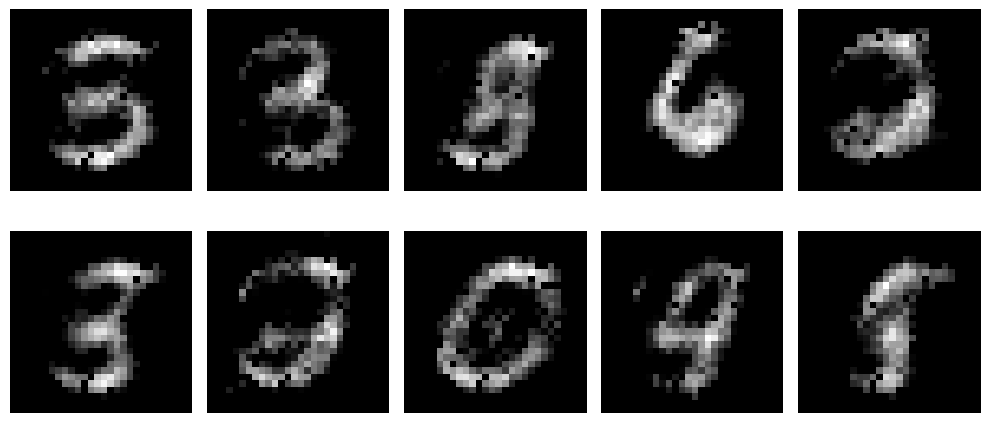

Removed 9478 params


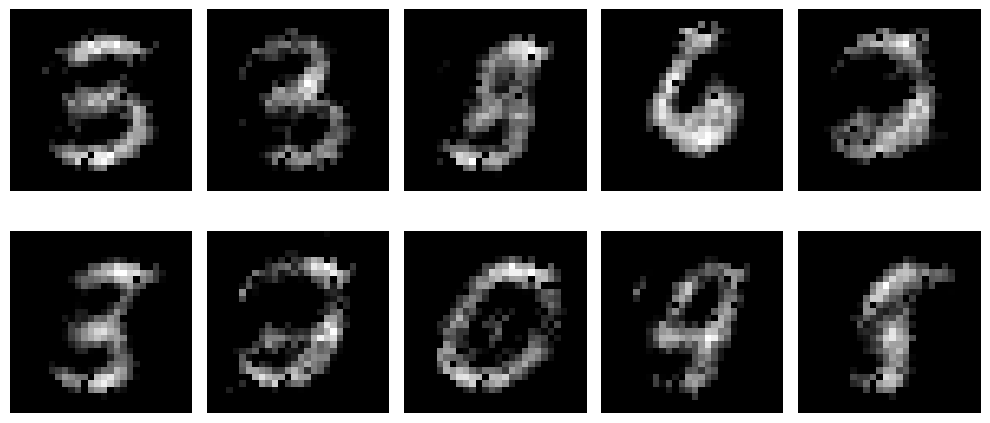

Removed 9494 params


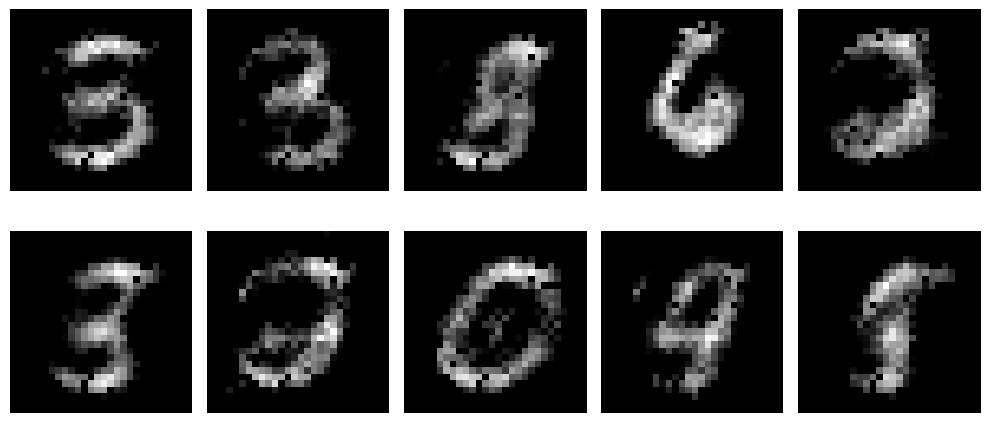

Removed 9506 params


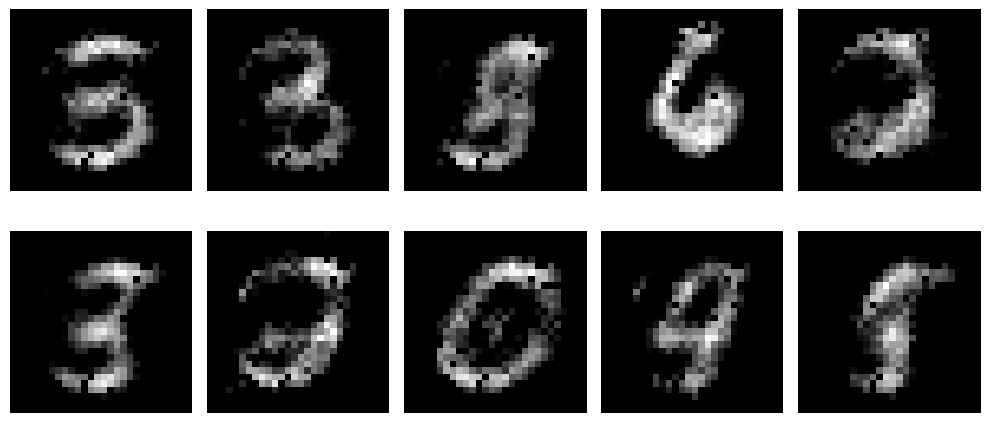

Removed 9523 params


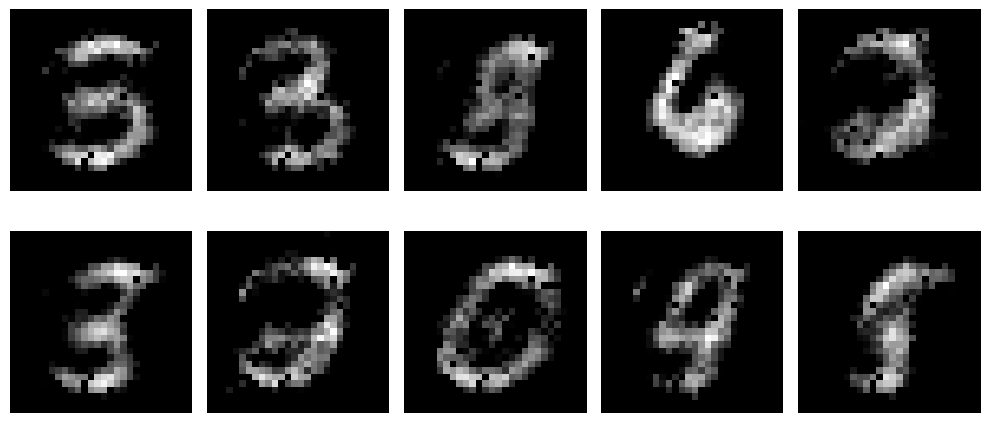

Removed 9537 params


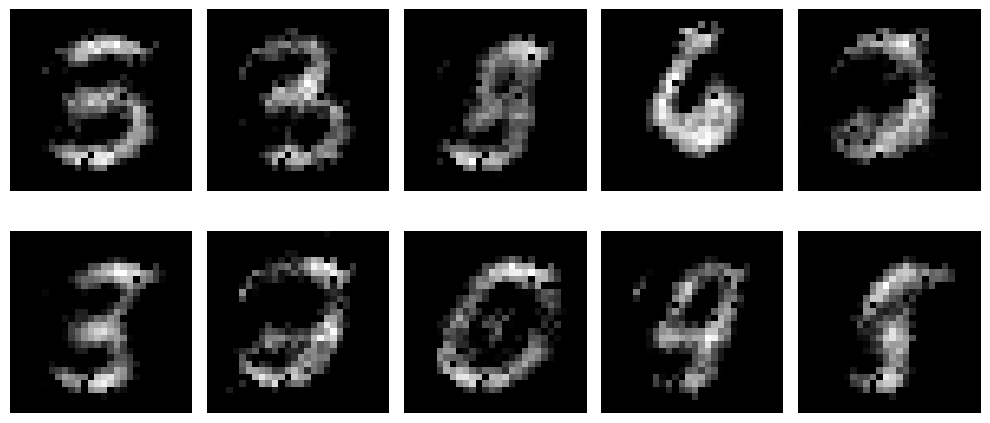

Removed 9556 params


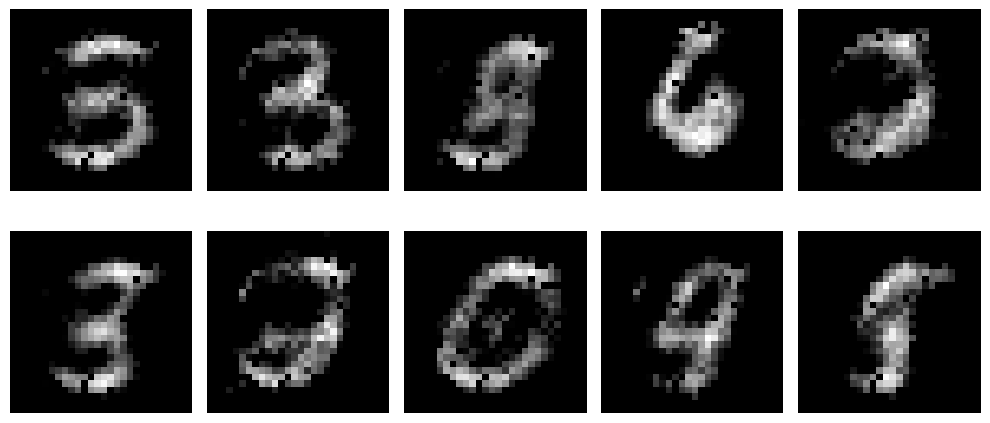

Removed 9573 params


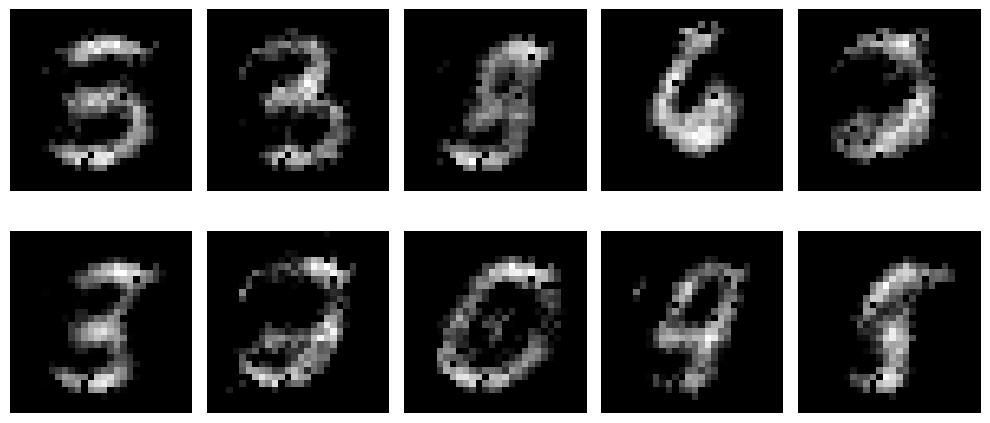

Removed 9587 params


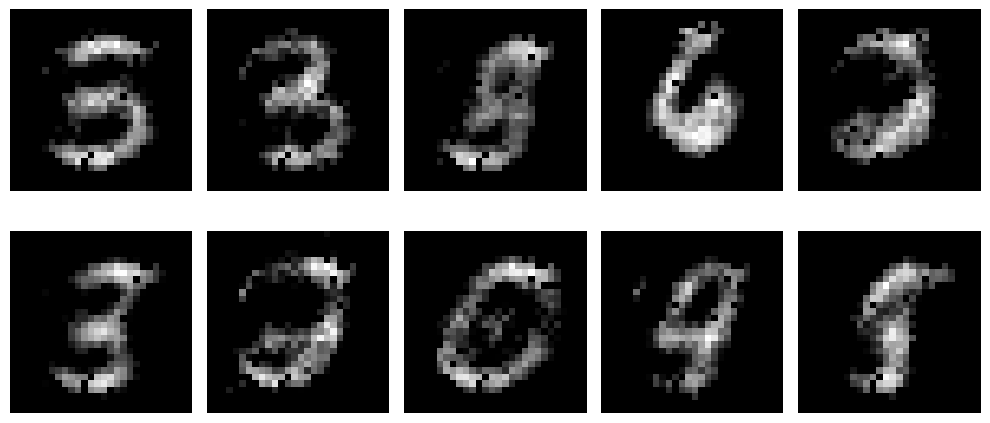

Removed 9600 params


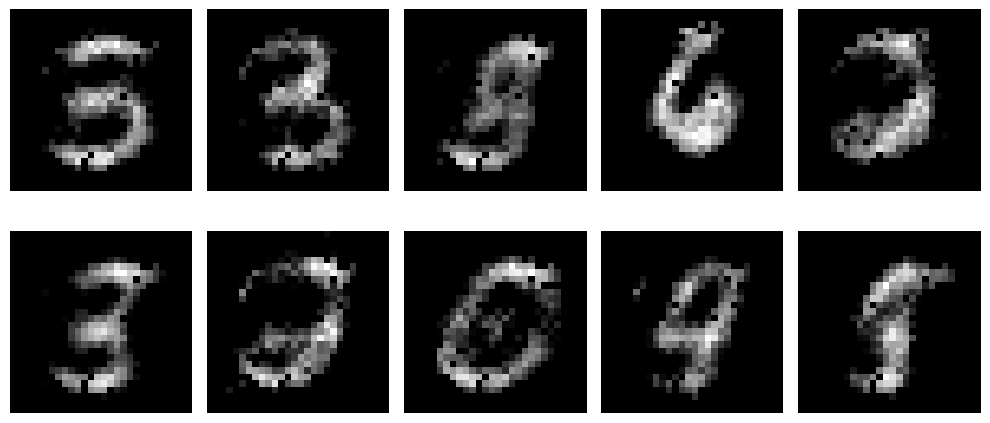

Removed 9621 params


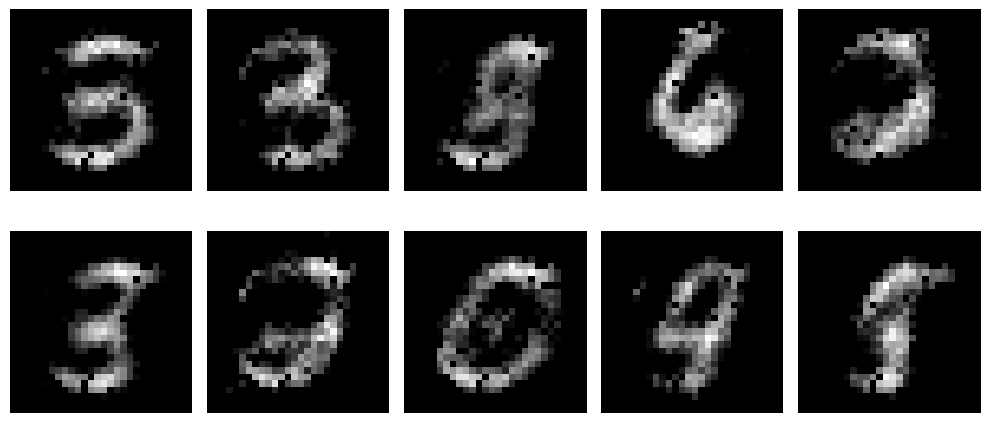

Removed 9632 params


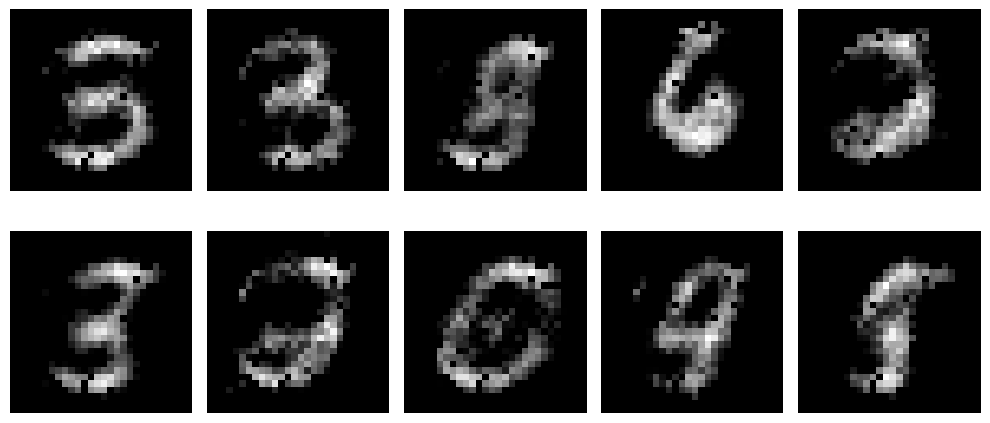

Removed 9642 params


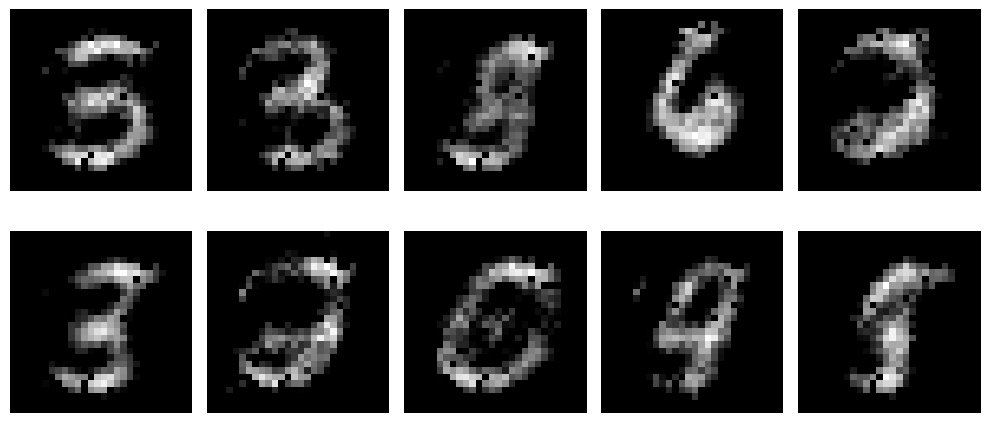

Removed 9653 params


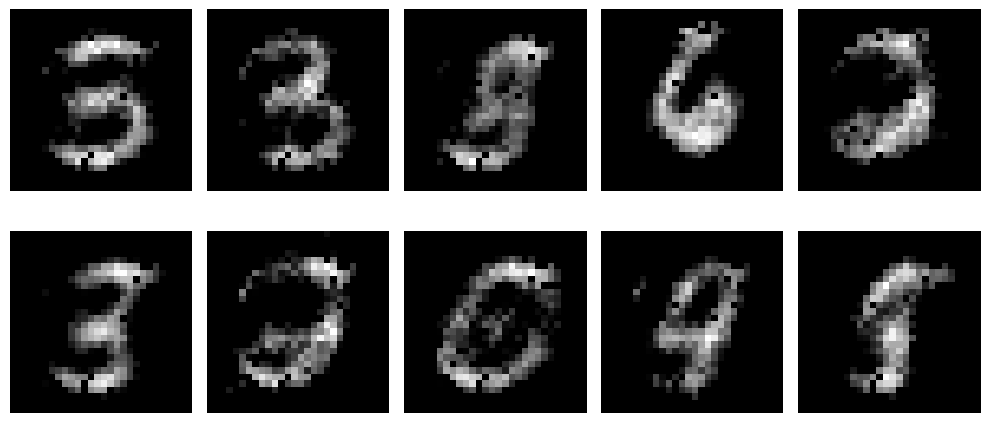

Removed 9658 params


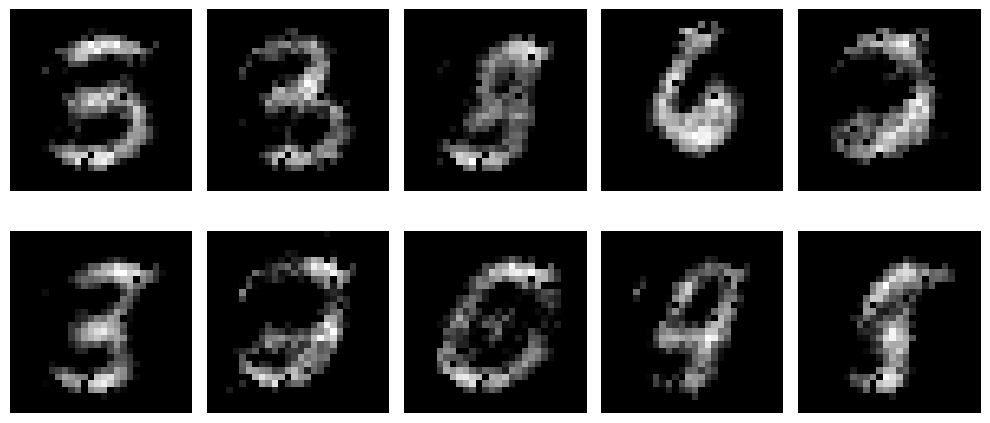

Removed 9674 params


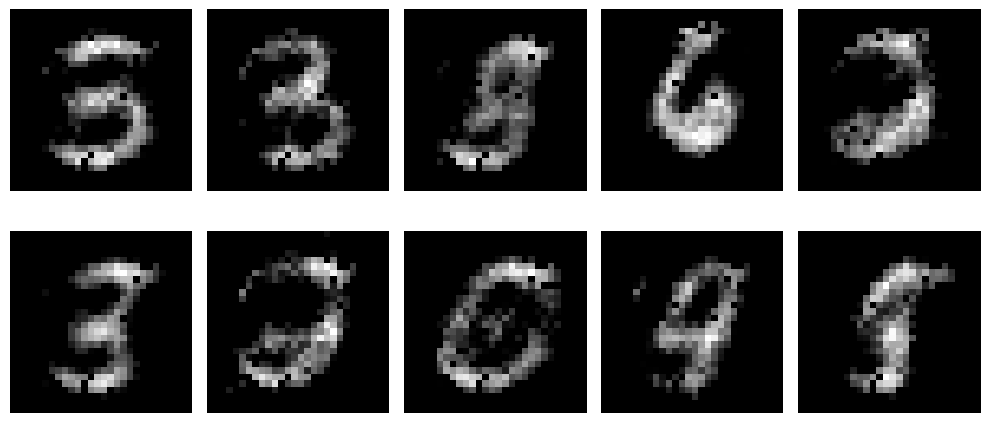

Removed 9686 params


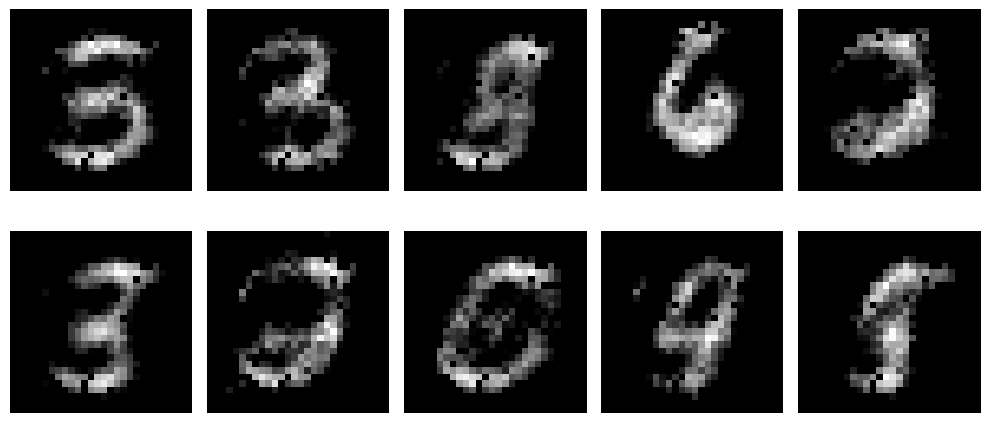

Removed 9697 params


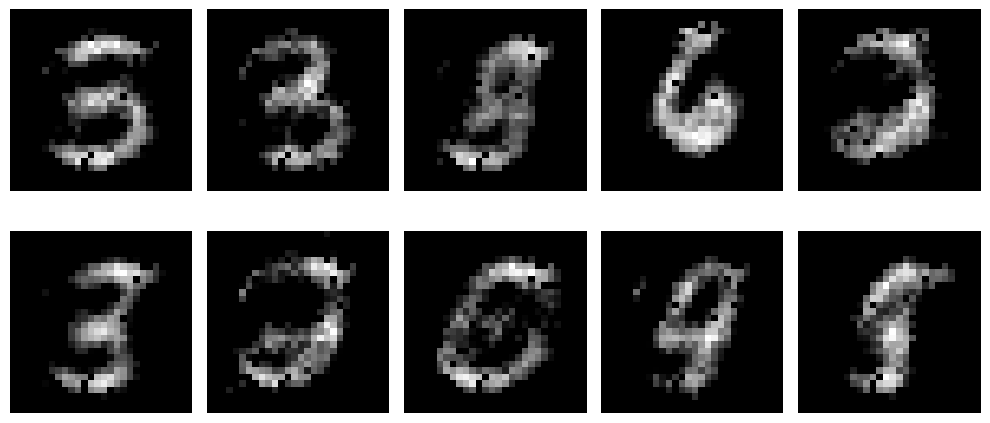

Removed 9713 params


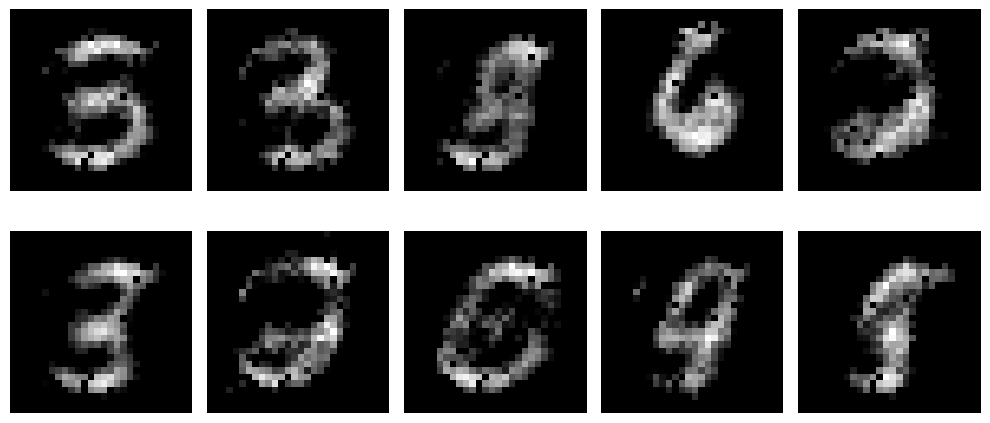

Removed 9726 params


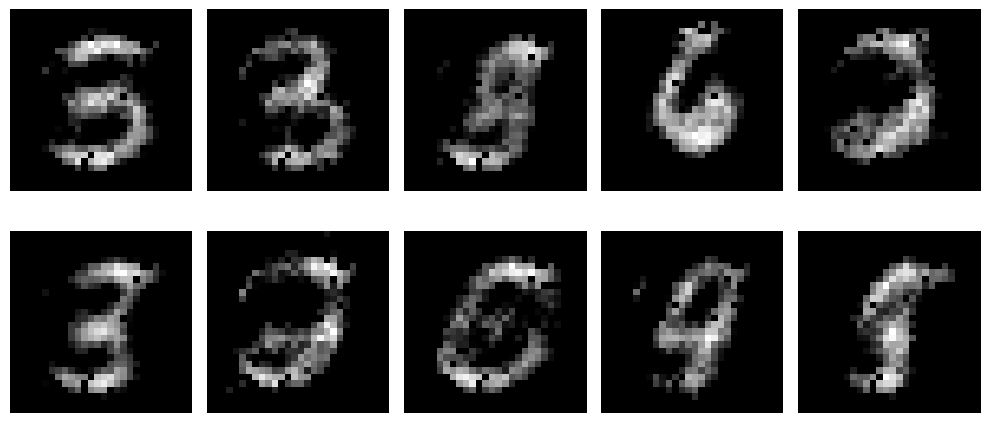

Removed 9736 params


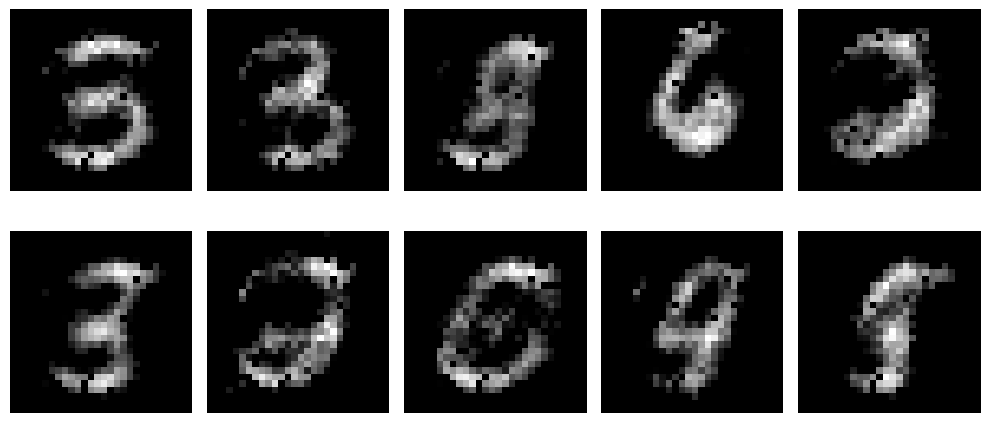

Removed 9745 params


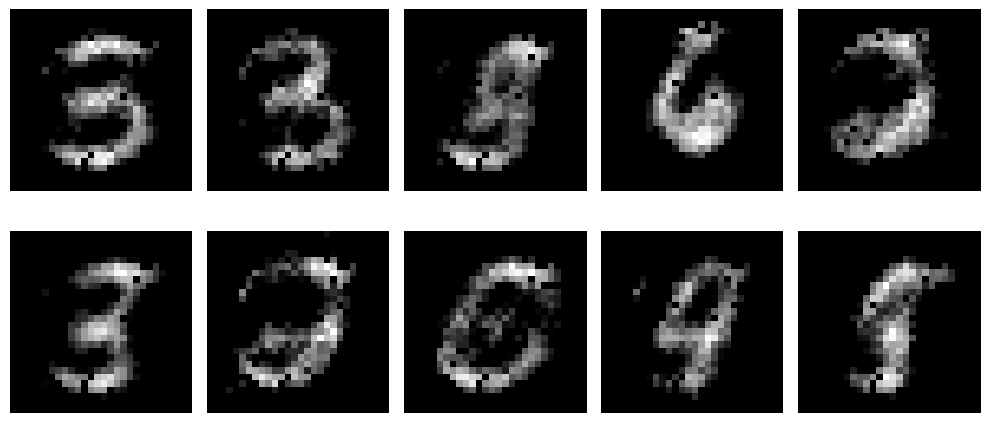

Removed 9761 params


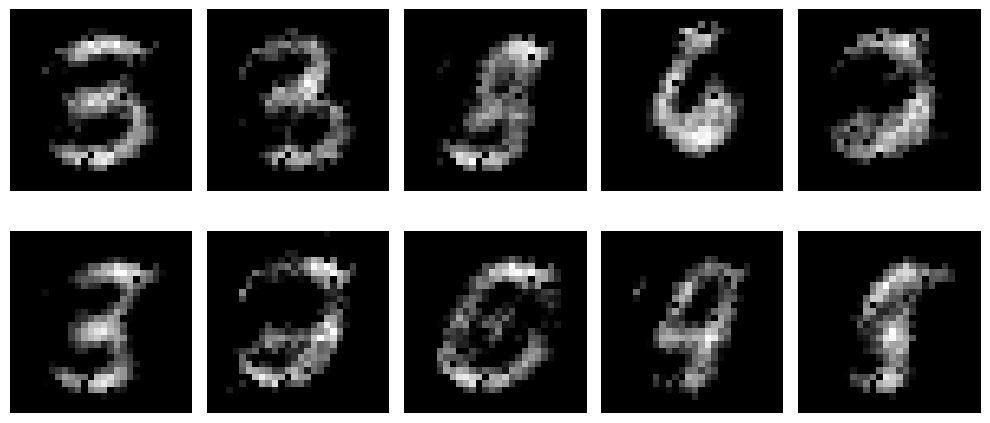

Removed 9772 params


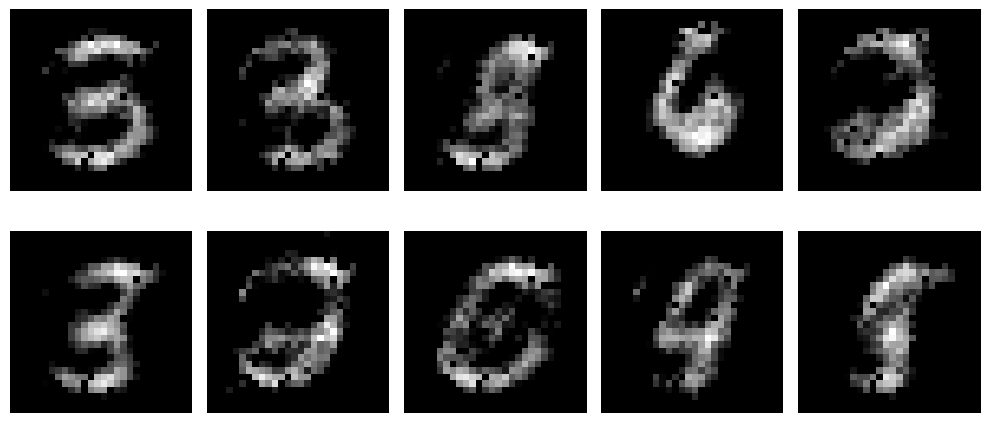

Removed 9781 params


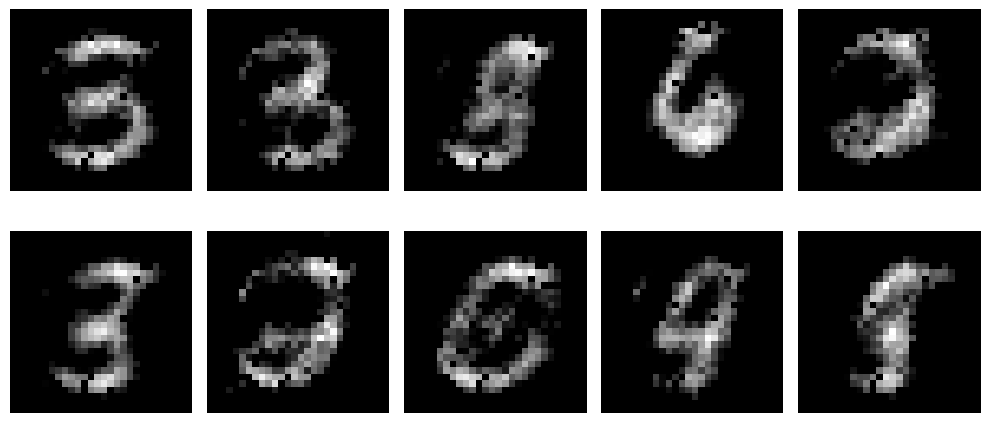

Removed 9789 params


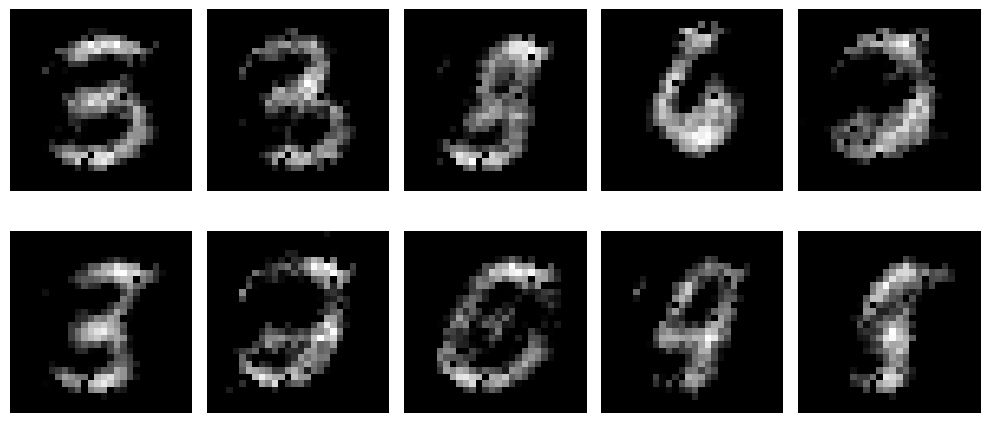

Removed 9797 params


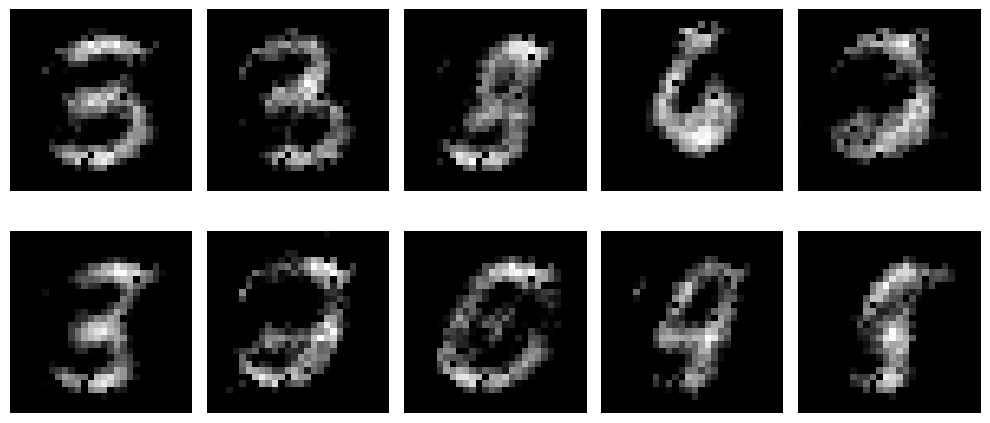

Removed 9815 params


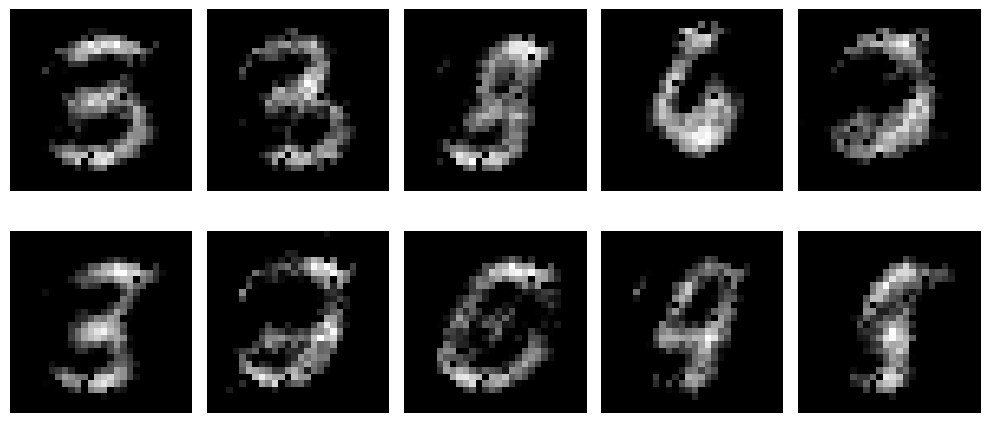

Removed 9827 params


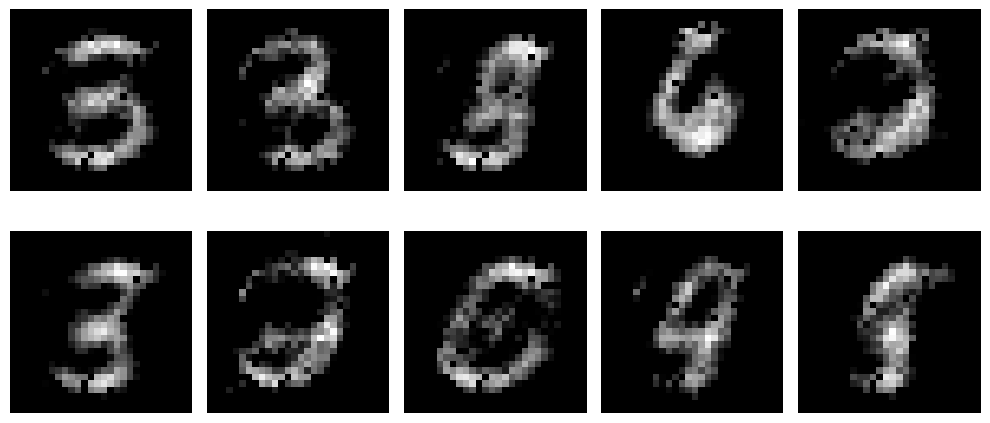

Removed 9841 params


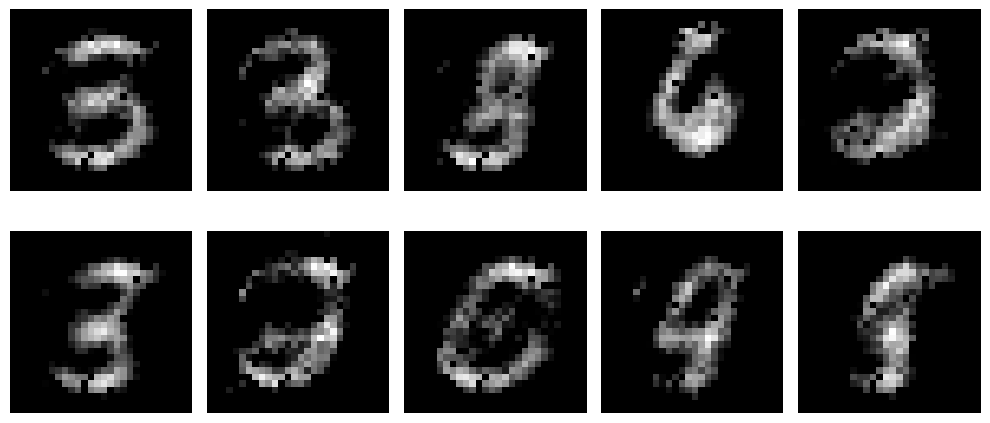

Removed 9855 params


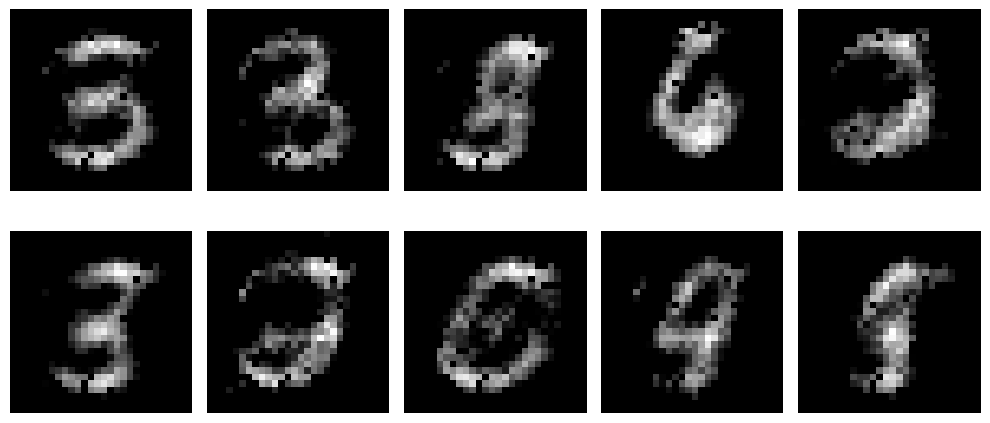

Removed 9865 params


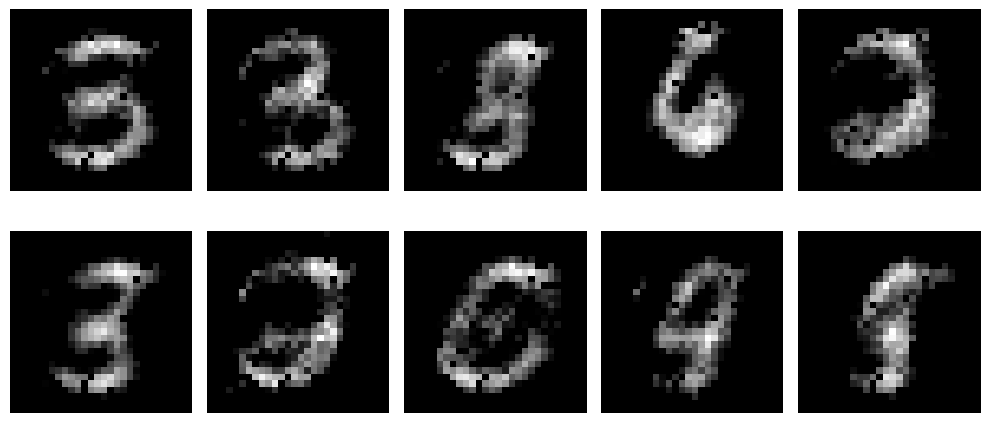

Removed 9881 params


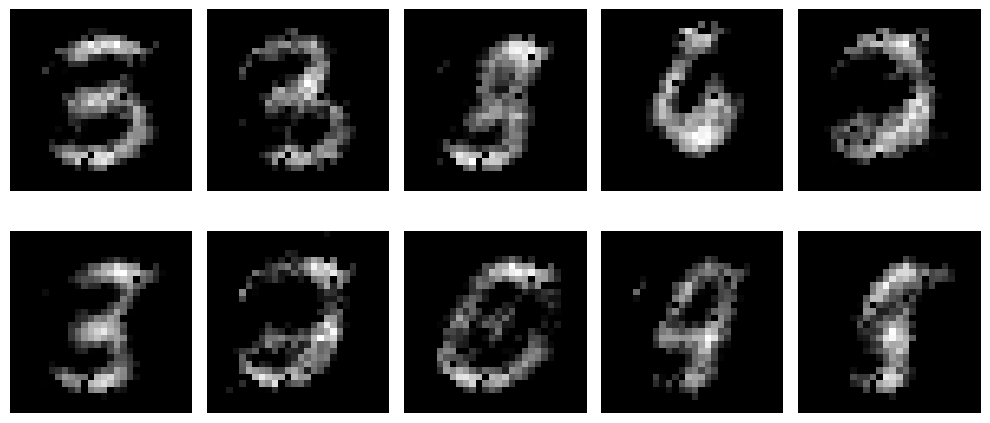

Removed 9891 params


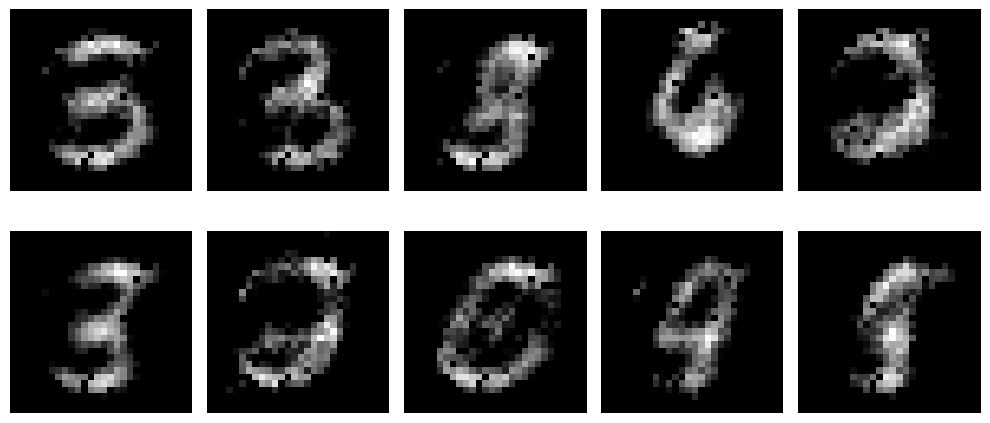

Removed 9904 params


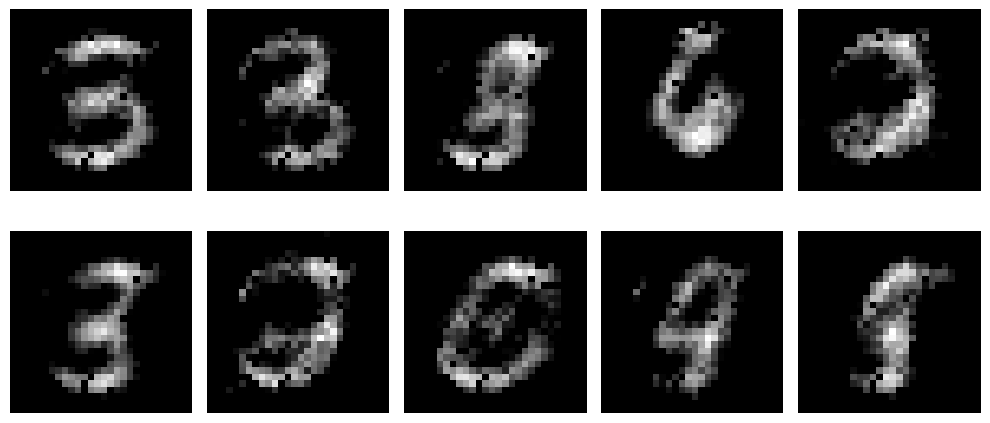

Removed 9915 params


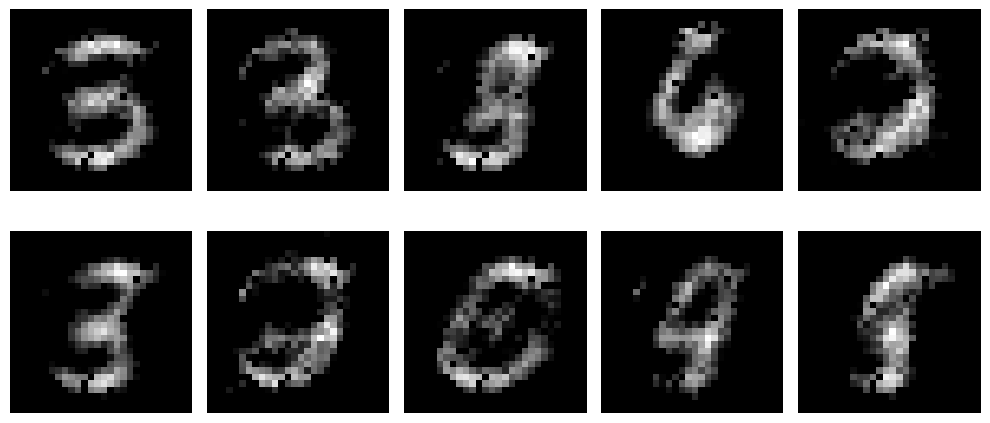

Removed 9925 params


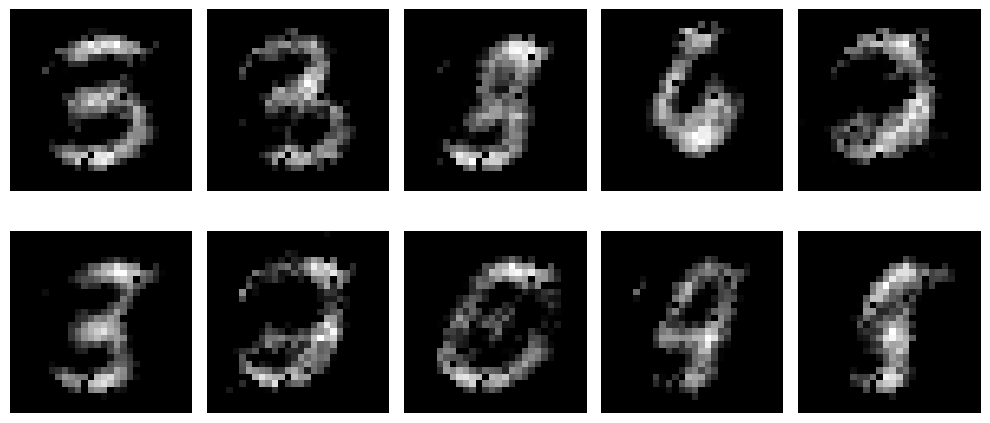

Removed 9938 params


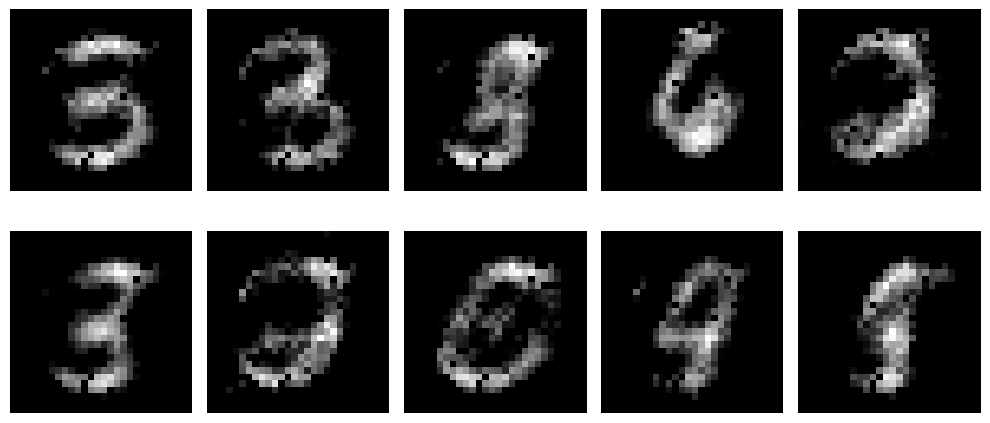

Removed 9946 params


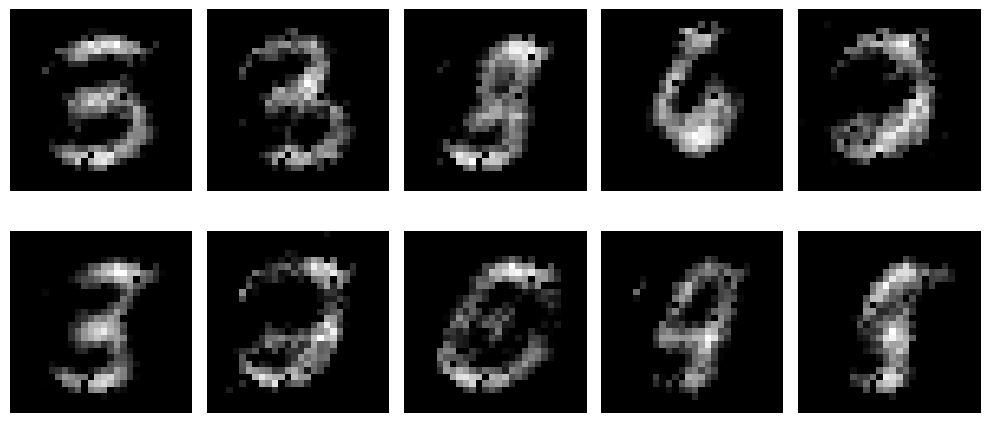

Removed 9960 params


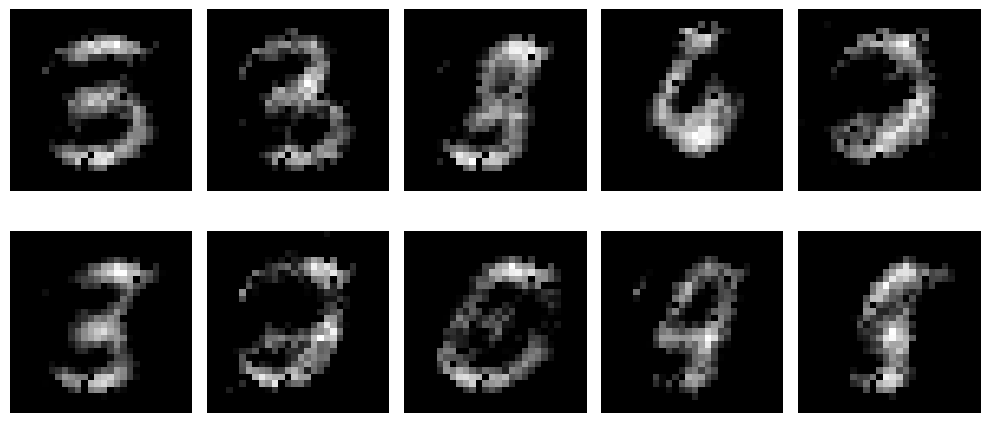

Removed 9975 params


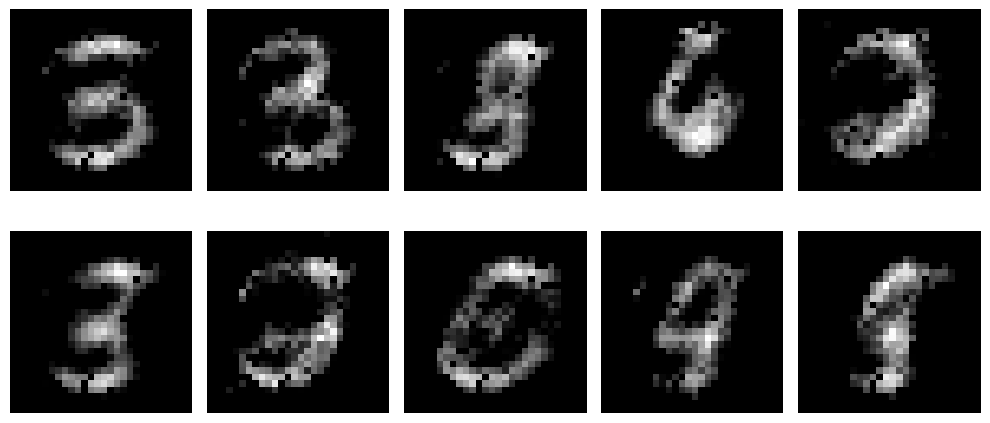

Removed 9983 params


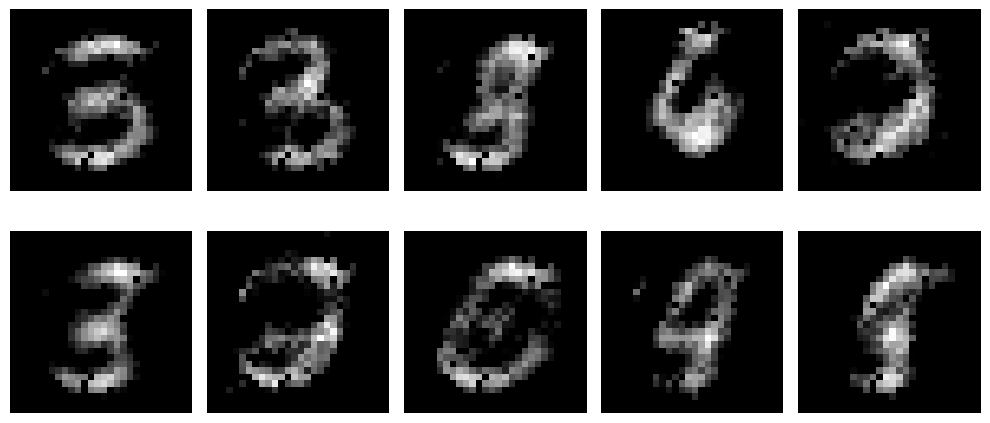

Removed 5496 params


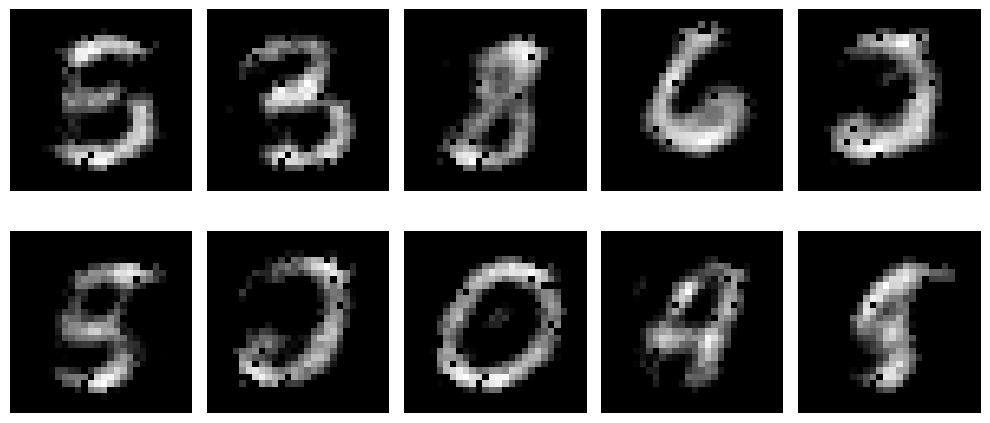

Removed 9335 params


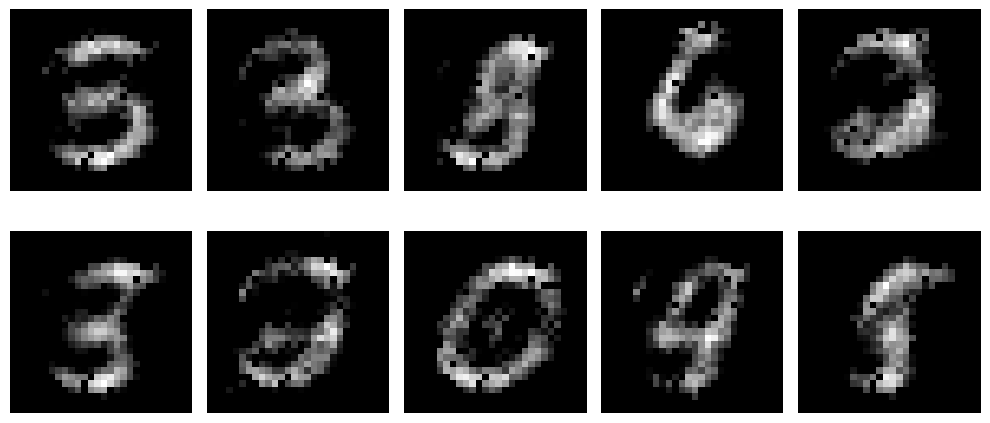

Removed 9992 params


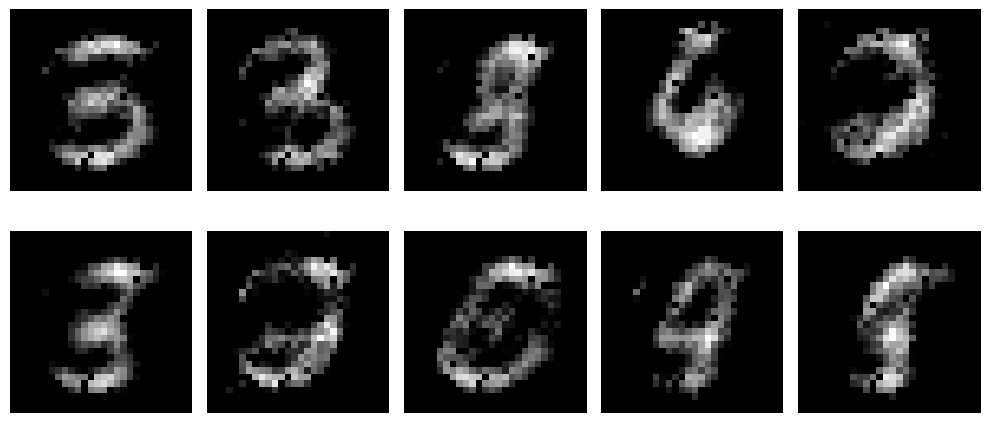

Removed 10311 params


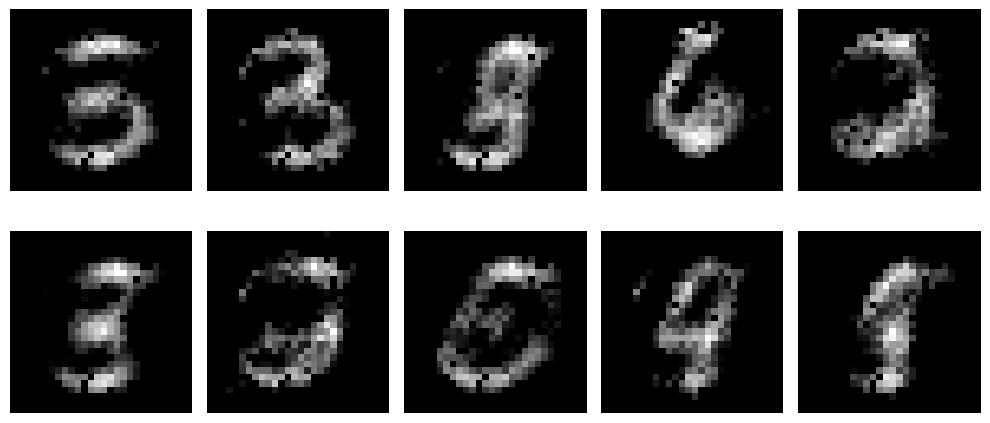

Removed 10658 params


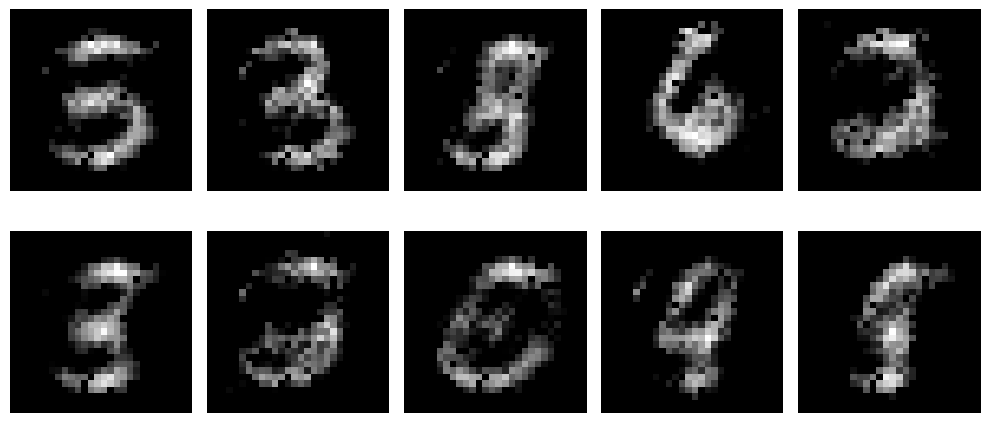

Removed 10889 params


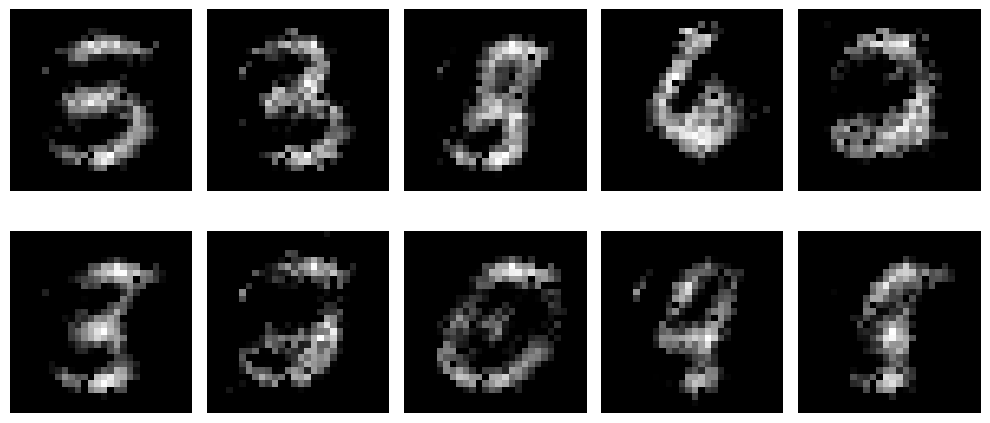

Removed 11061 params


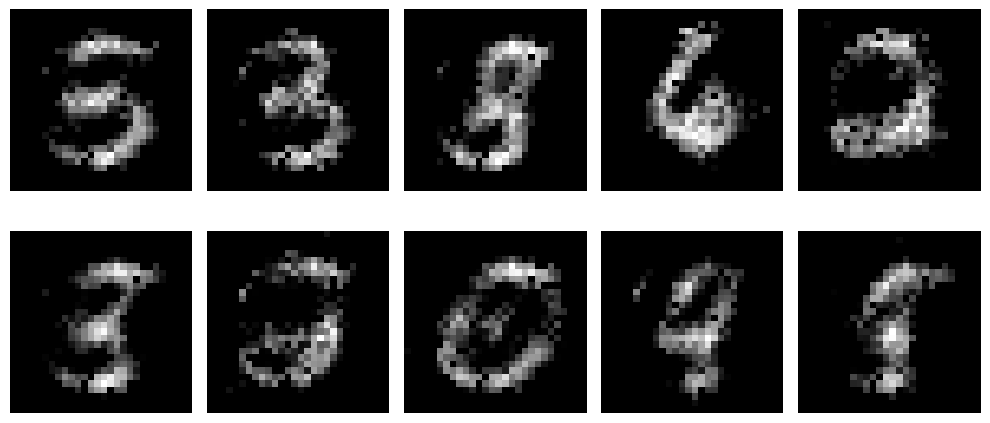

Removed 11237 params


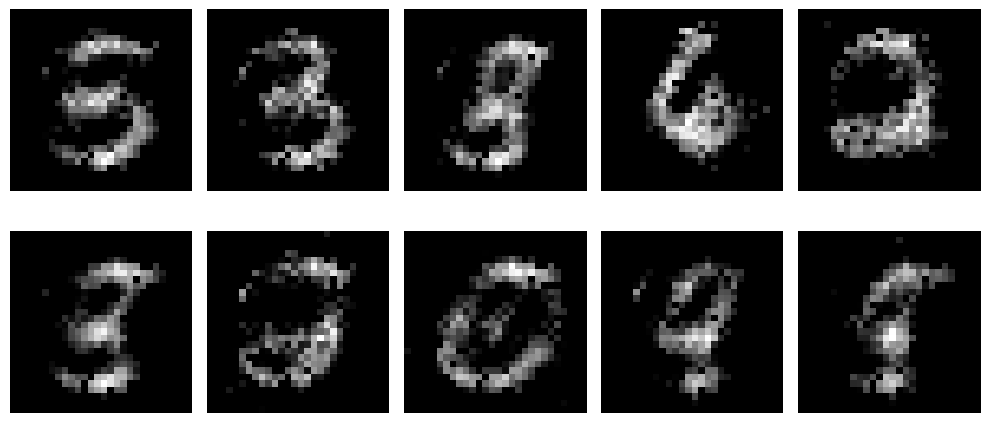

Removed 11396 params


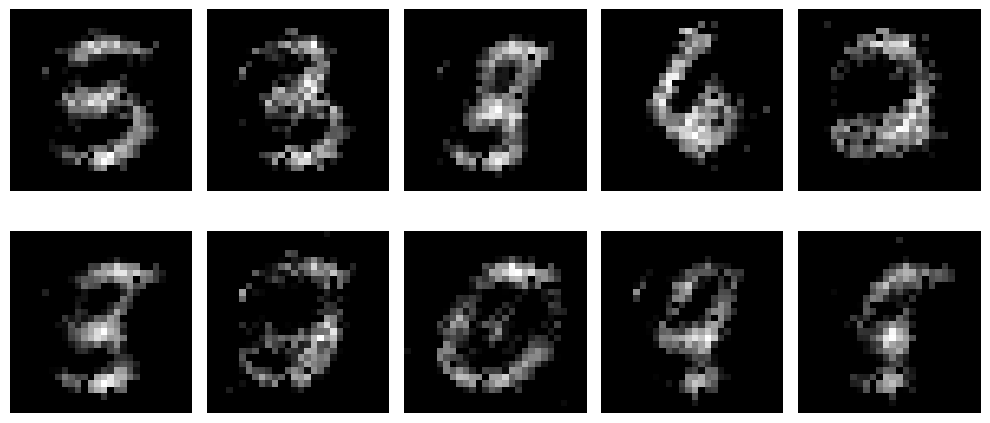

Removed 11550 params


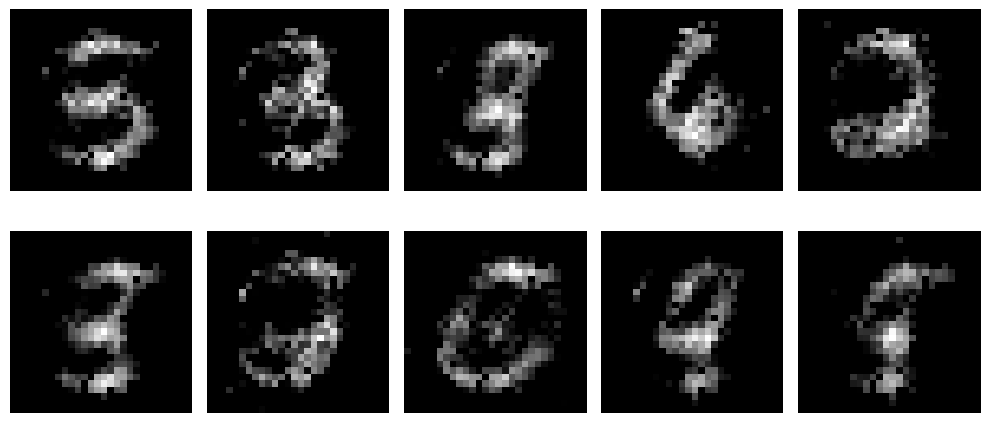

Removed 11689 params


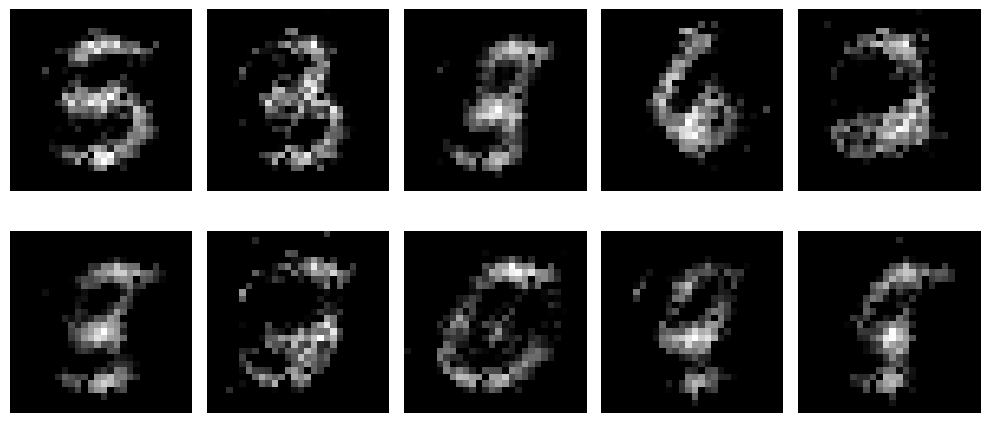

Removed 11824 params


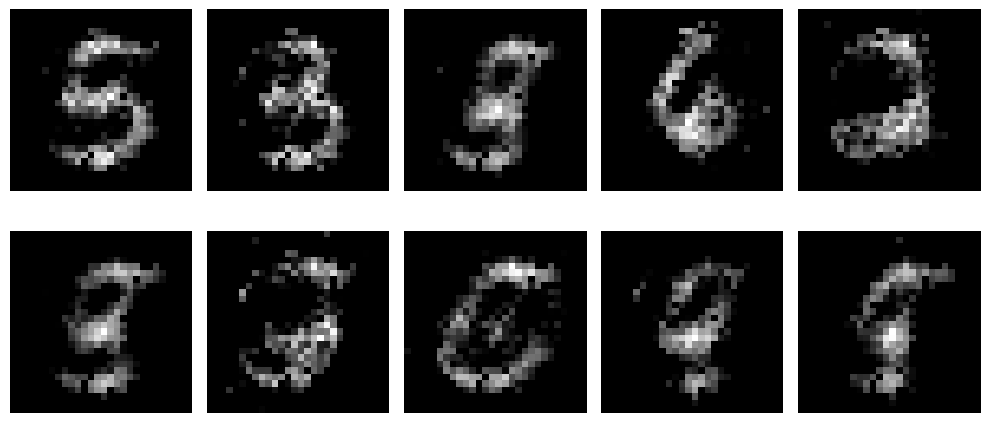

Removed 11968 params


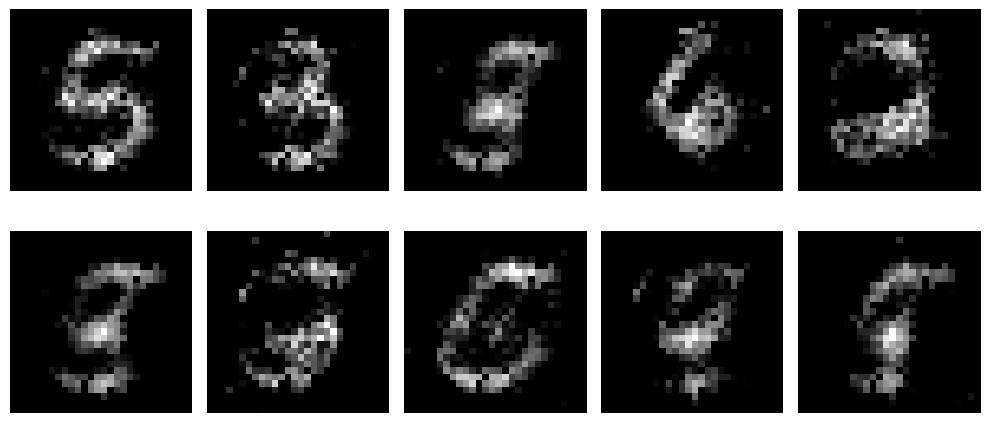

Removed 12105 params


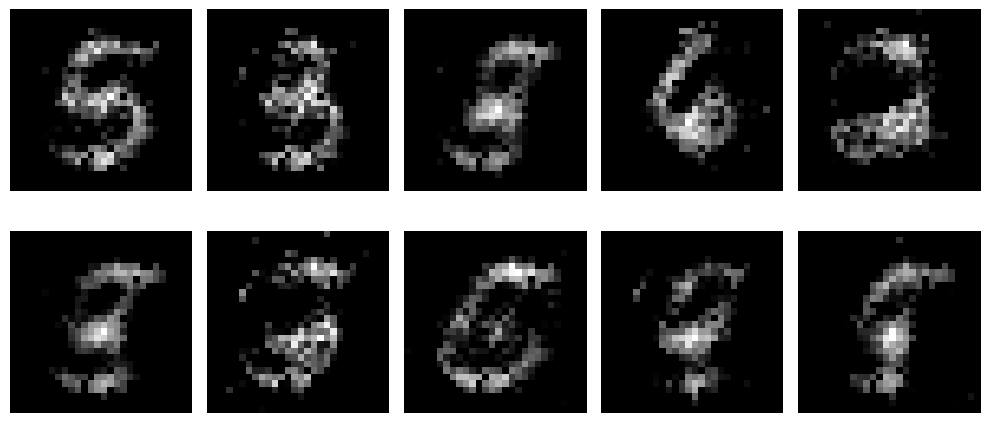

Removed 12226 params


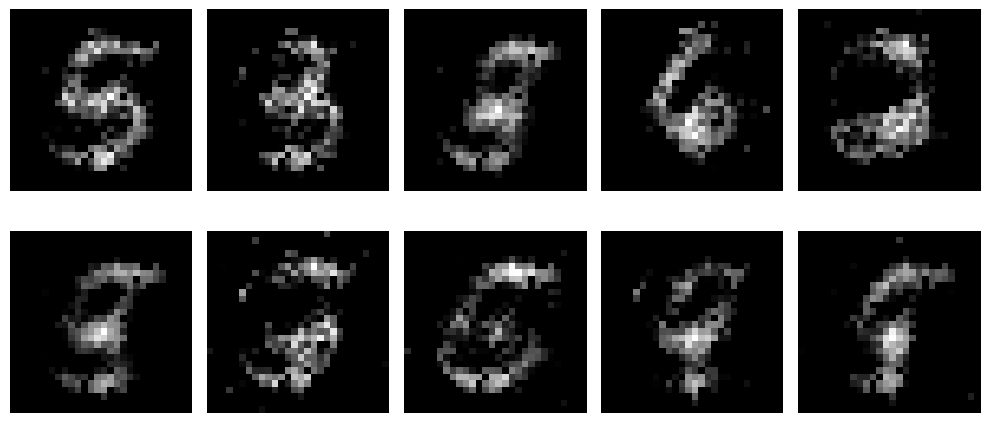

Removed 12317 params


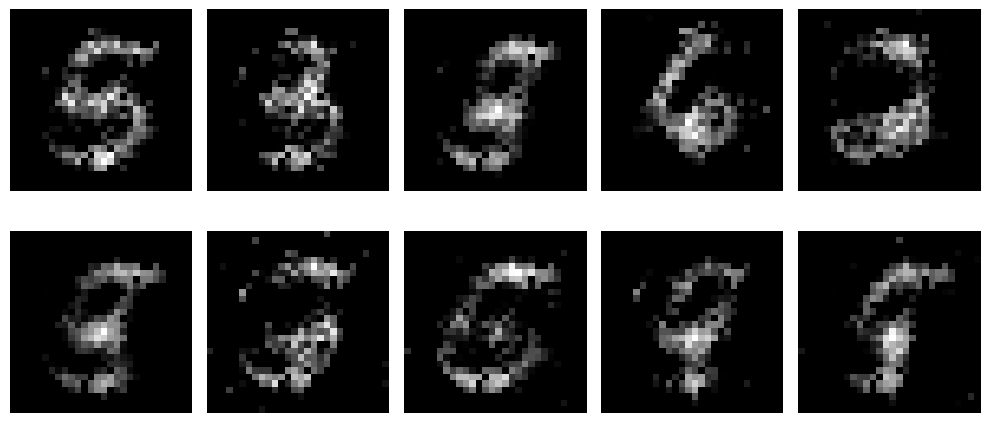

Removed 12428 params


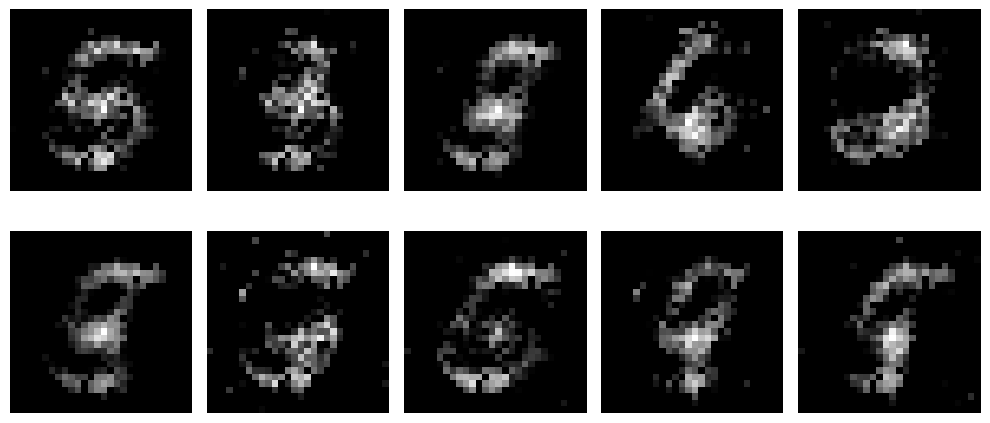

Removed 12561 params


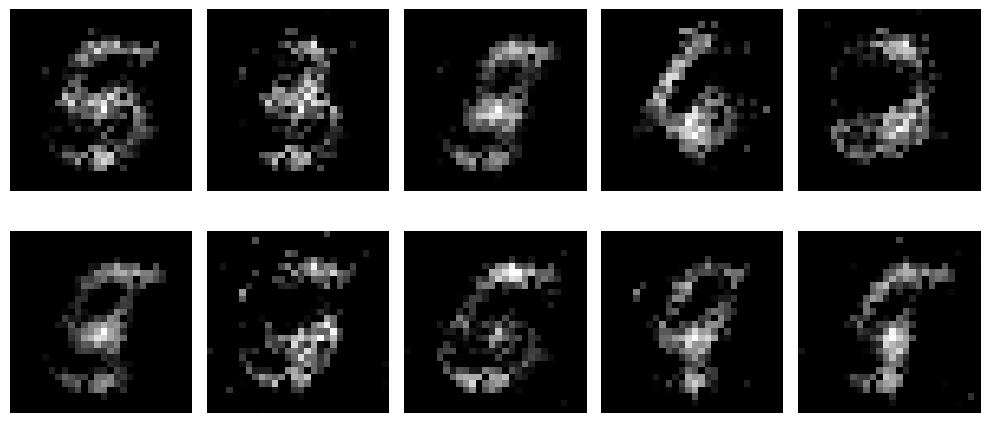

Removed 12664 params


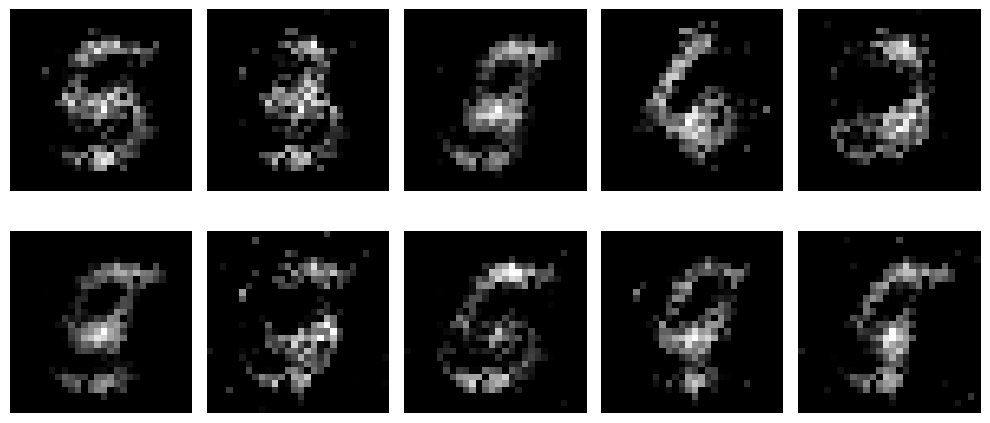

Removed 12818 params


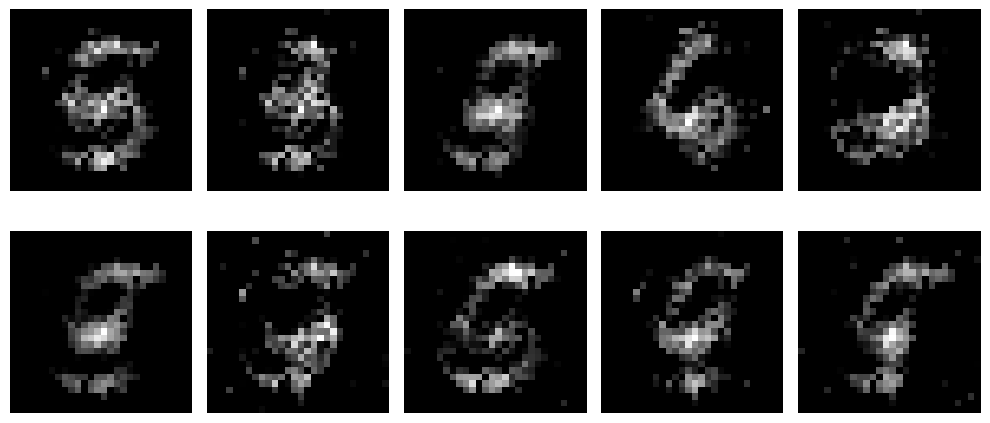

Removed 12979 params


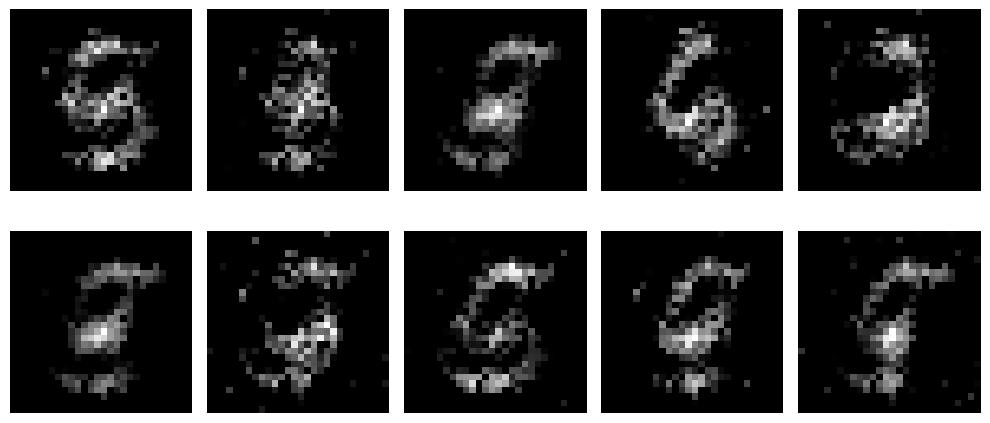

Removed 13135 params


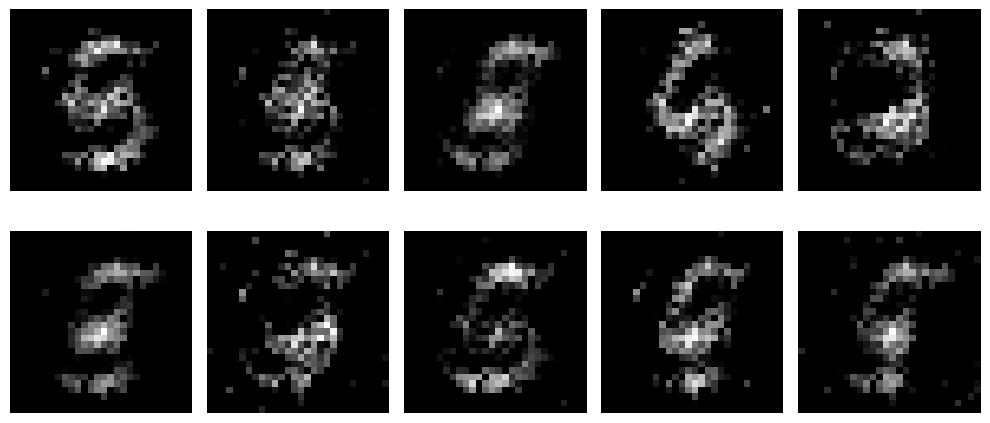

Removed 13312 params


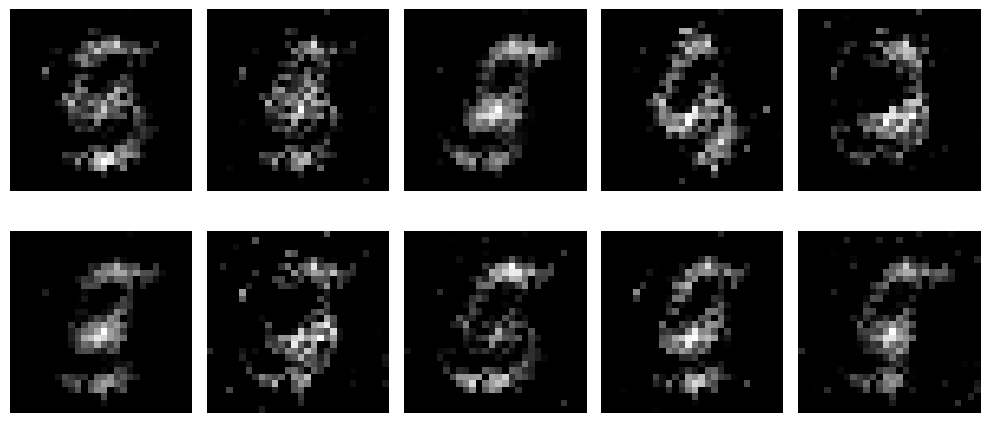

Removed 13477 params


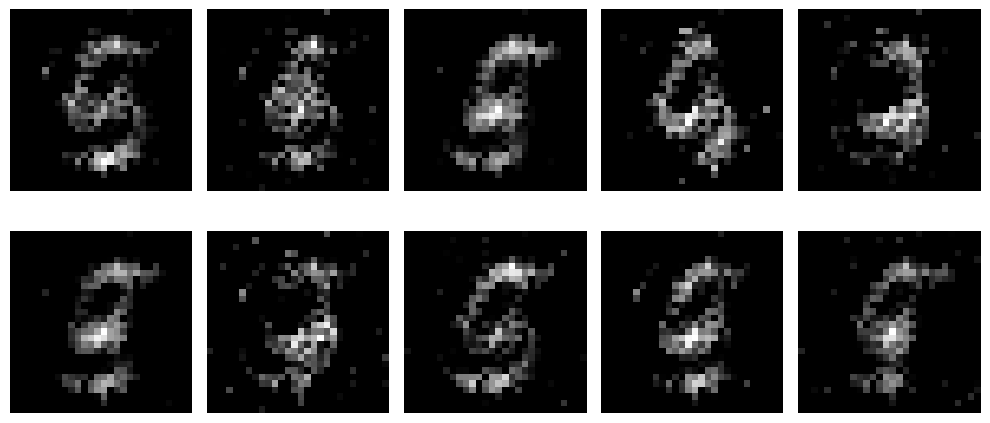

Removed 13688 params


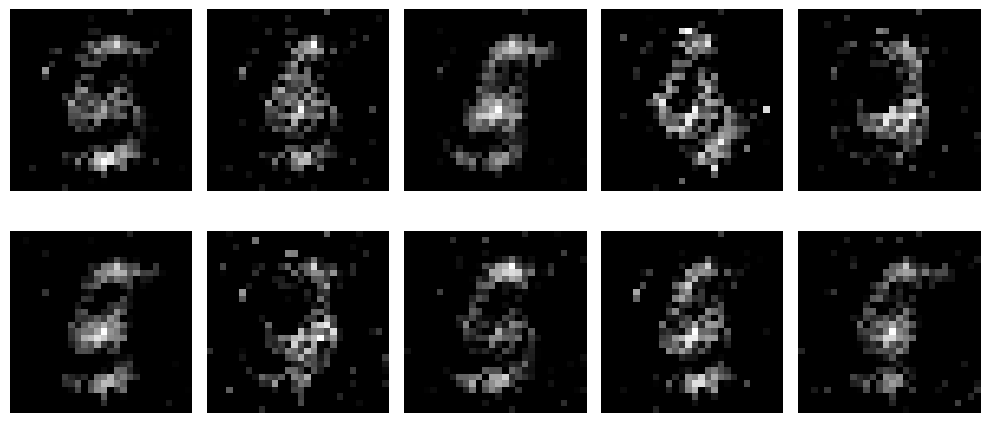

Removed 13879 params


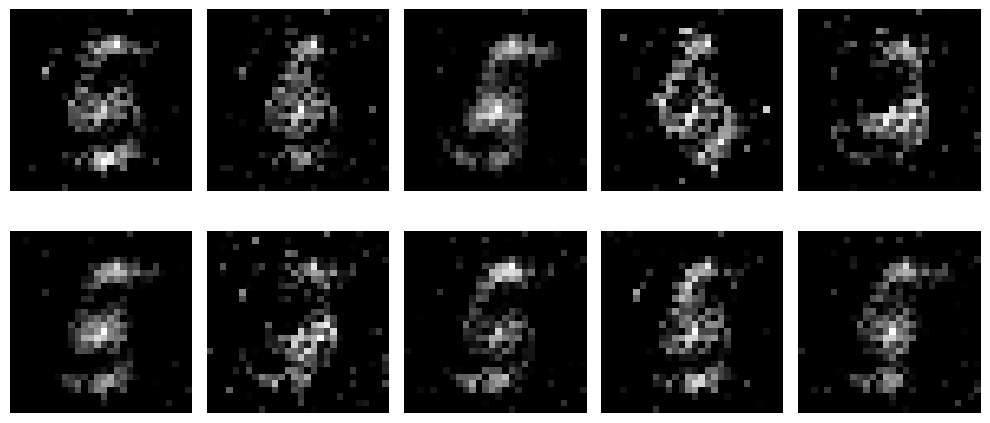

Removed 14055 params


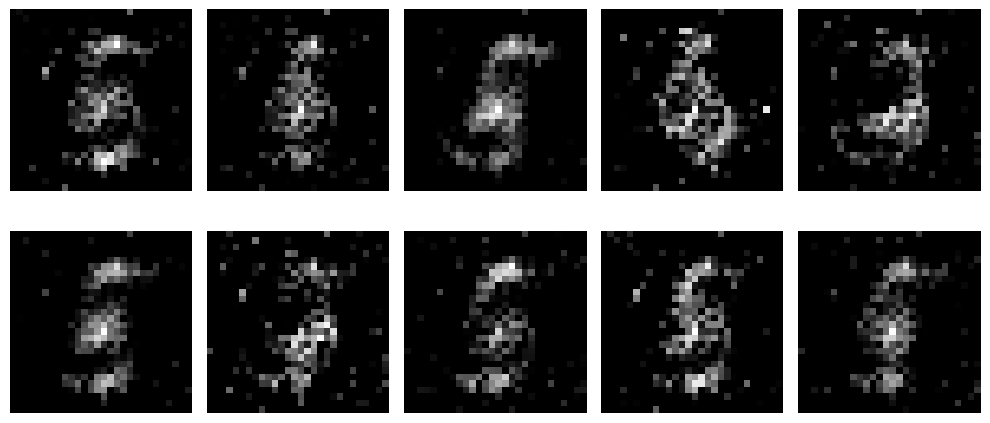

Removed 14230 params


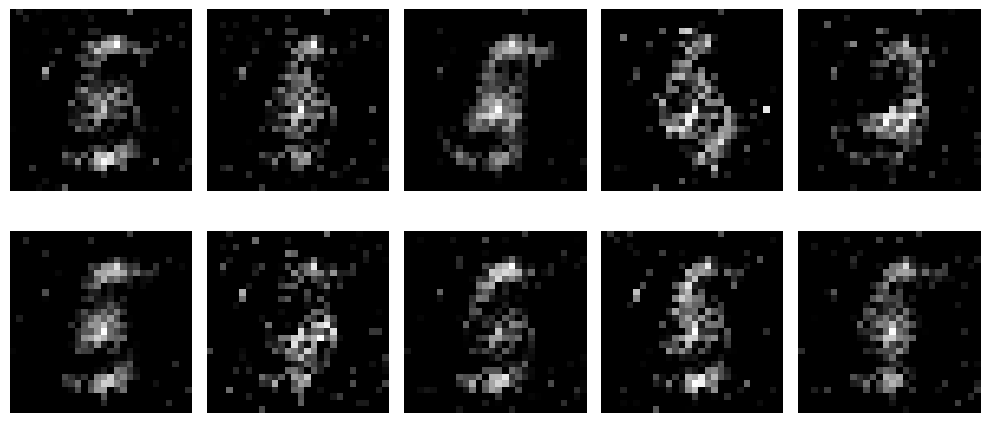

Removed 14406 params


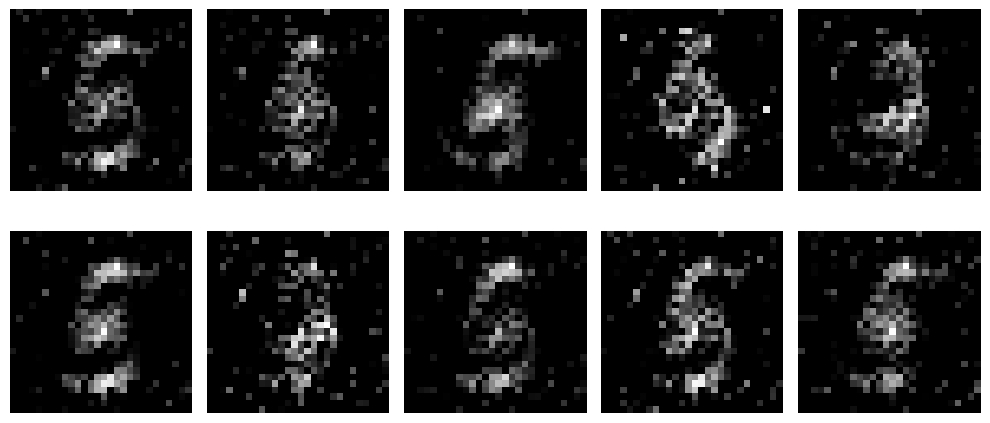

Removed 14575 params


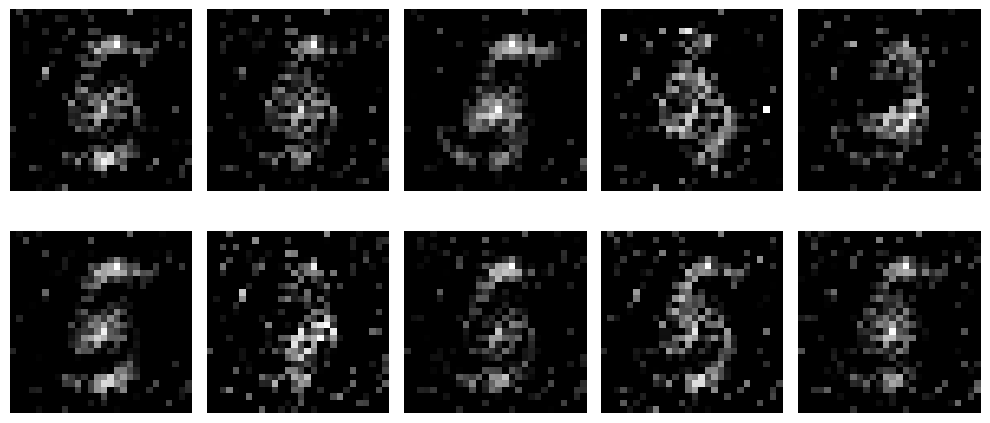

Removed 14744 params


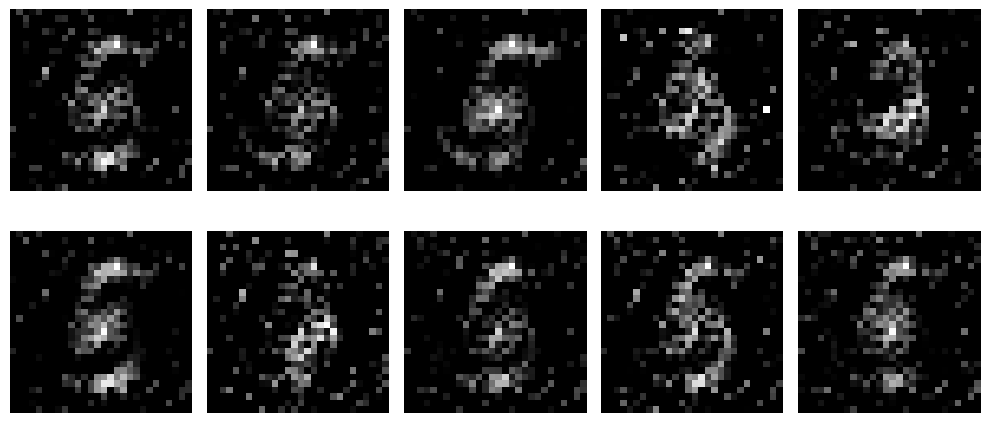

Removed 14906 params


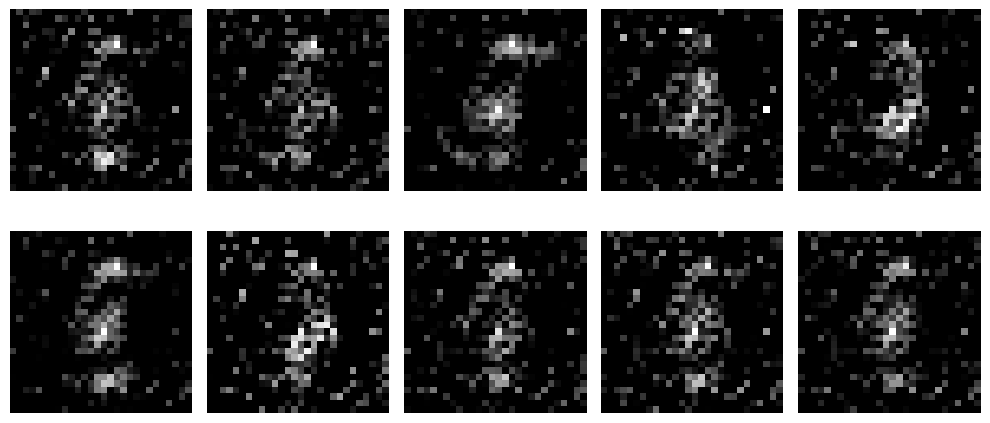

Removed 15042 params


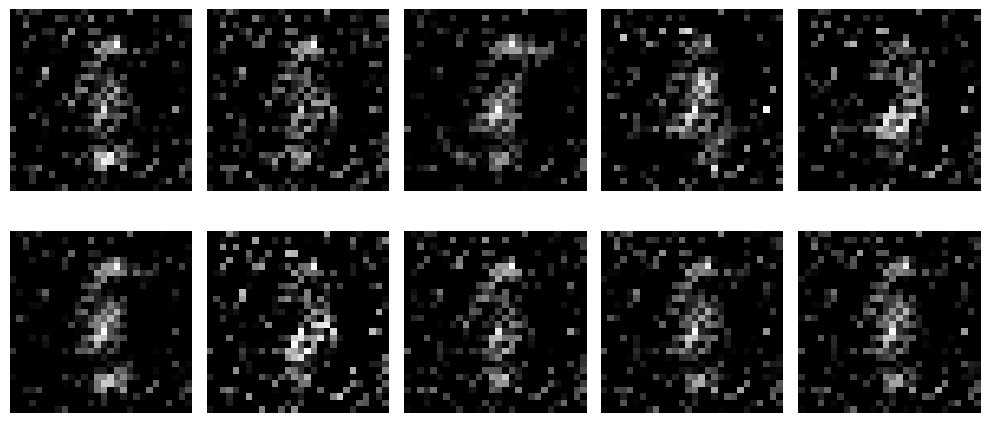

Removed 15171 params


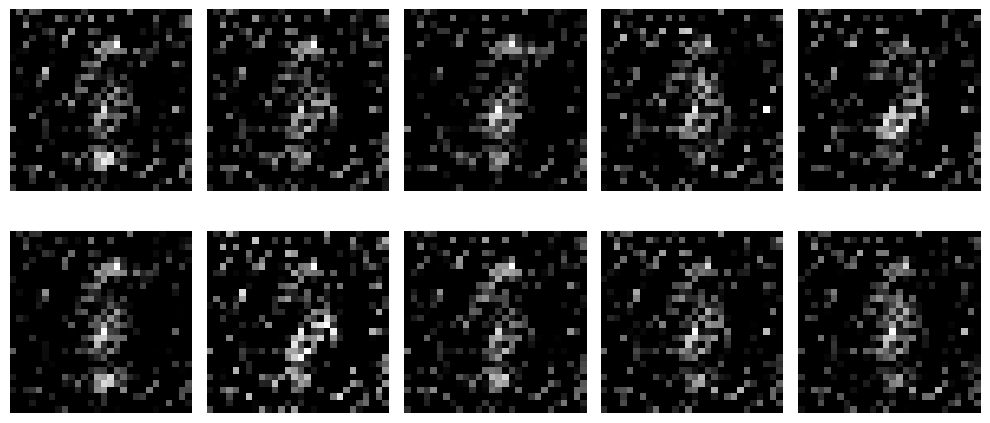

Removed 15277 params


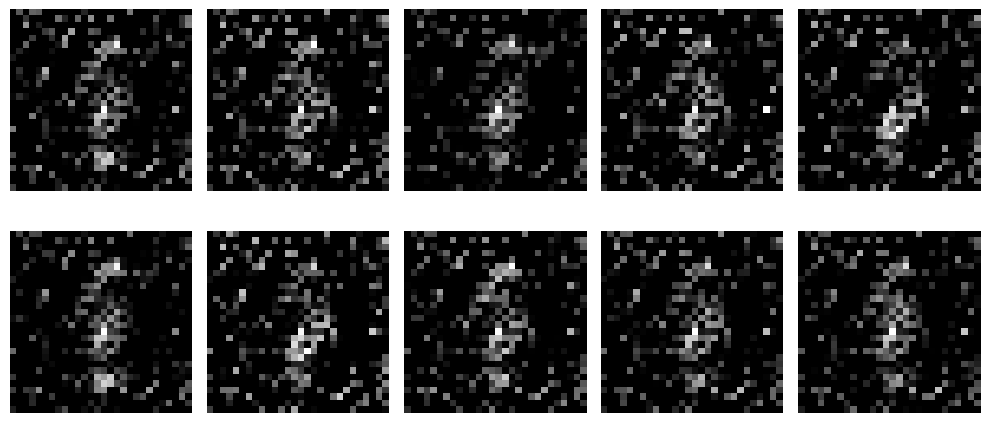

Removed 15386 params


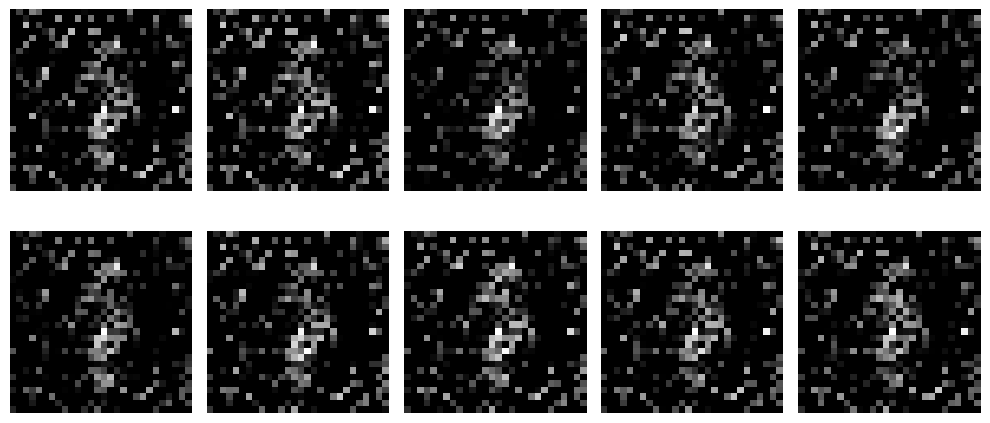

Removed 15456 params


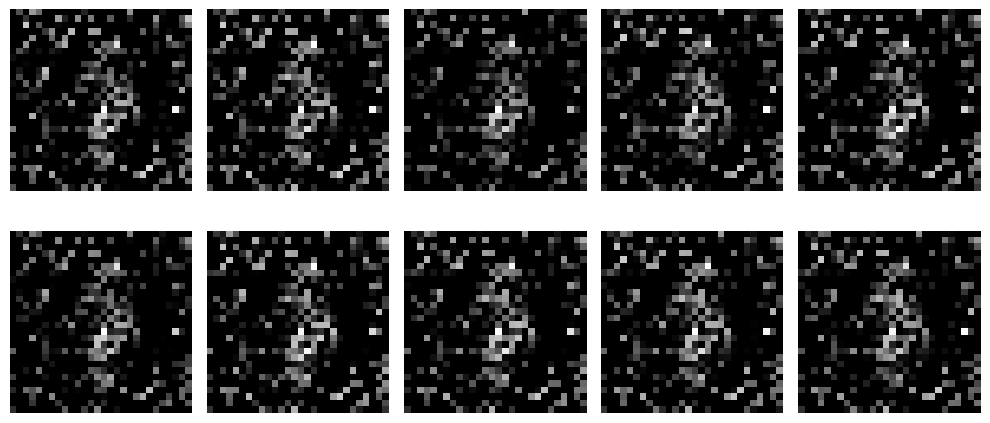

Removed 15515 params


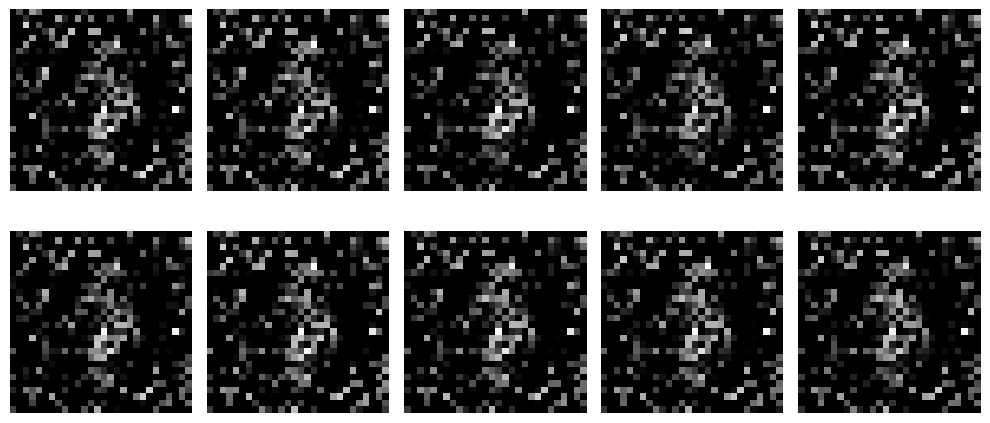

Removed 15557 params


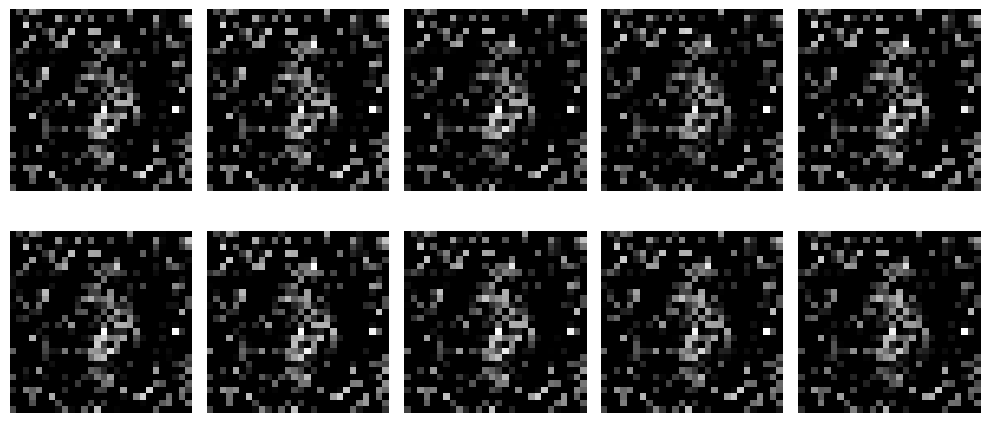

Removed 15596 params


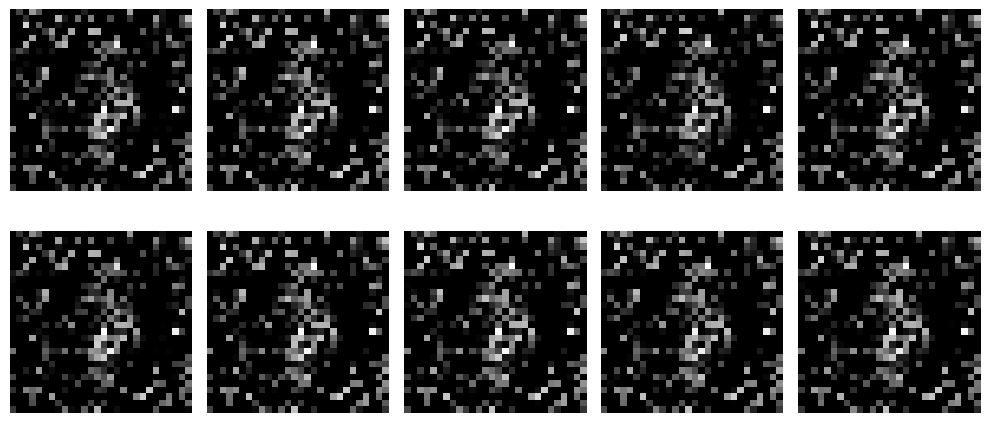

Removed 15615 params


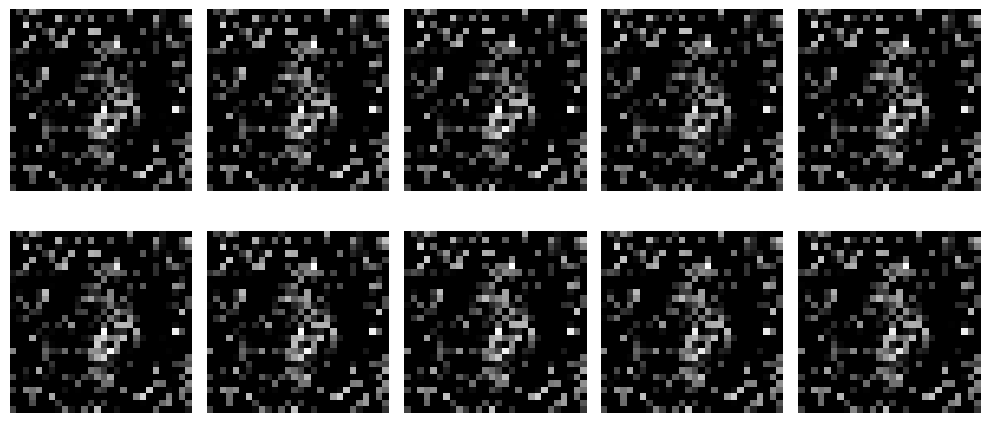

Removed 15632 params


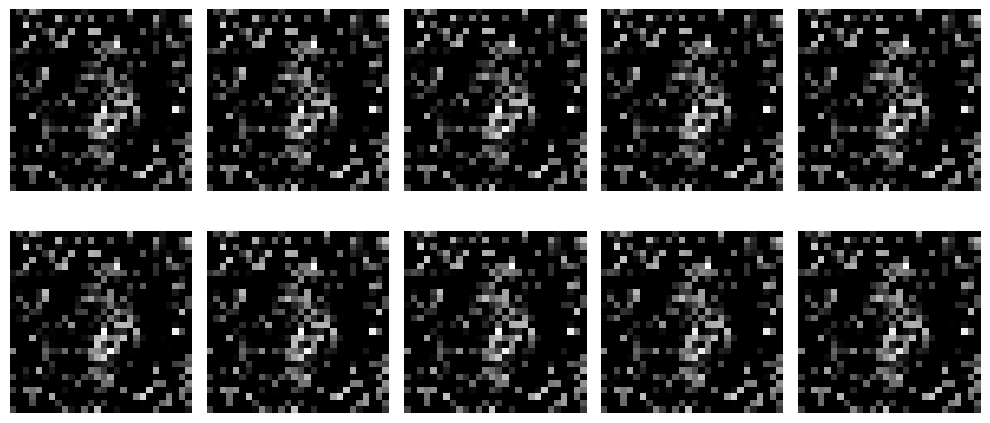

Removed 15649 params


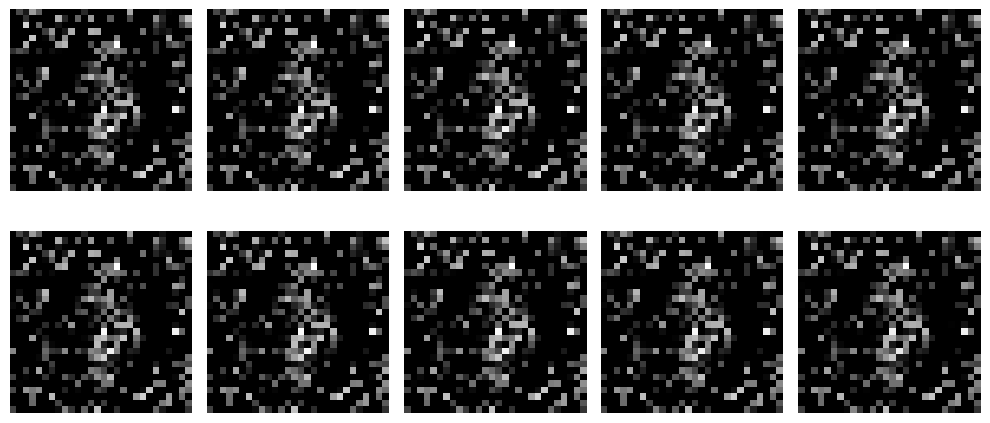

Removed 15662 params


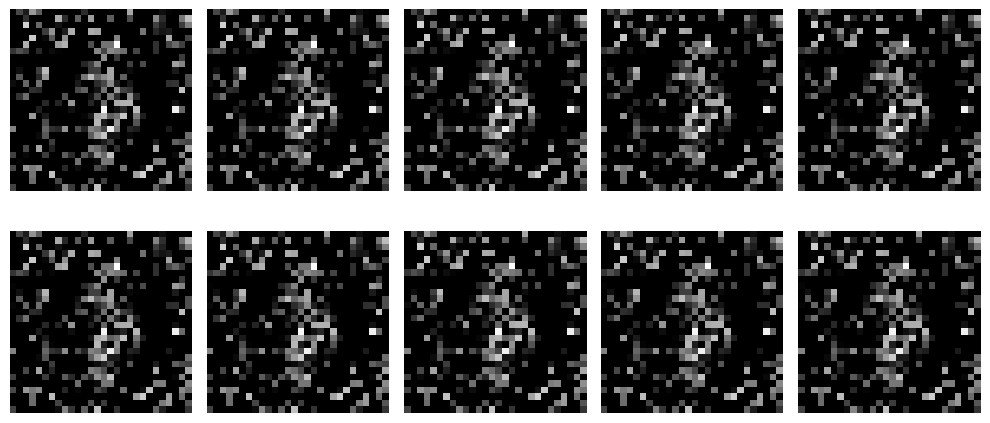

Removed 15672 params


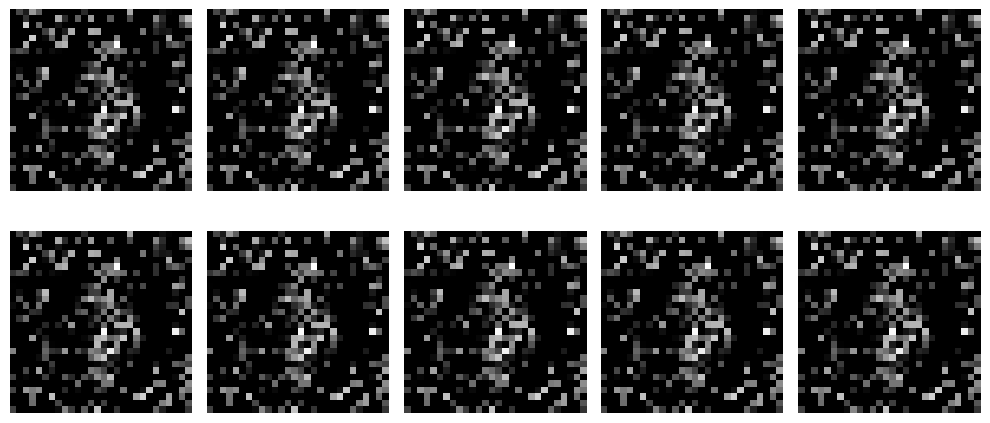

Removed 15678 params


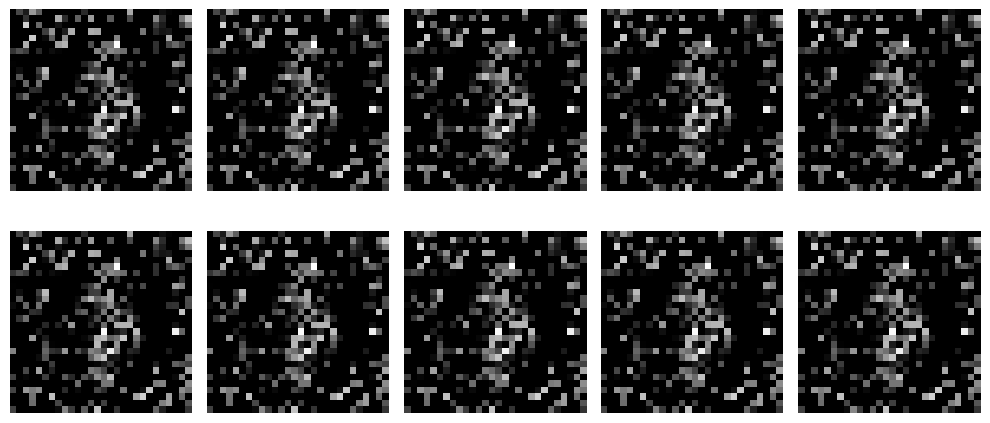

Removed 15680 params


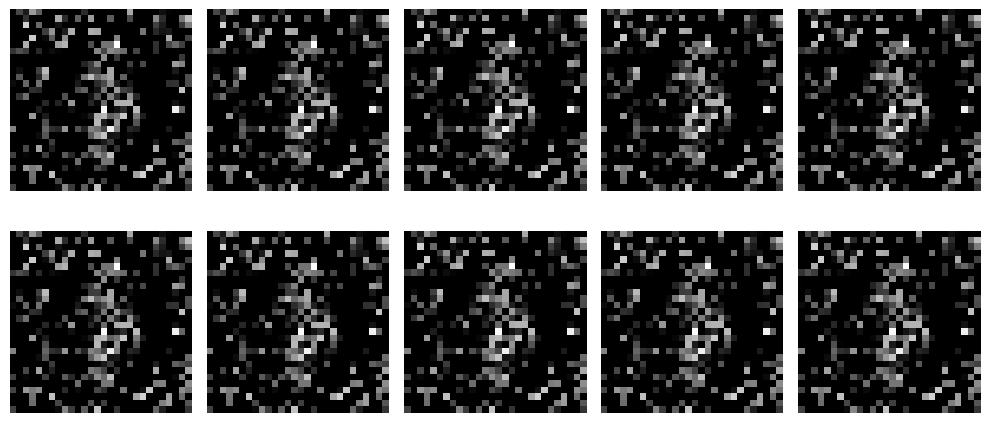

Removed 15680 params


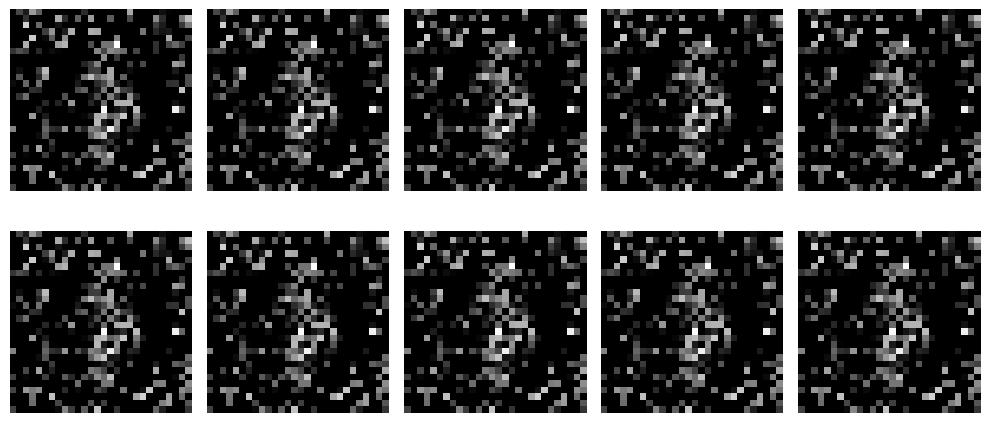

Removed 15680 params


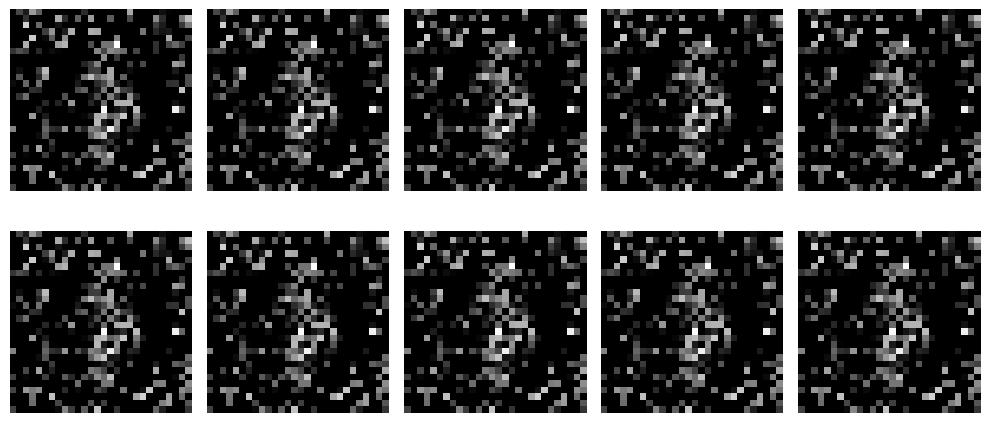

Removed 15680 params


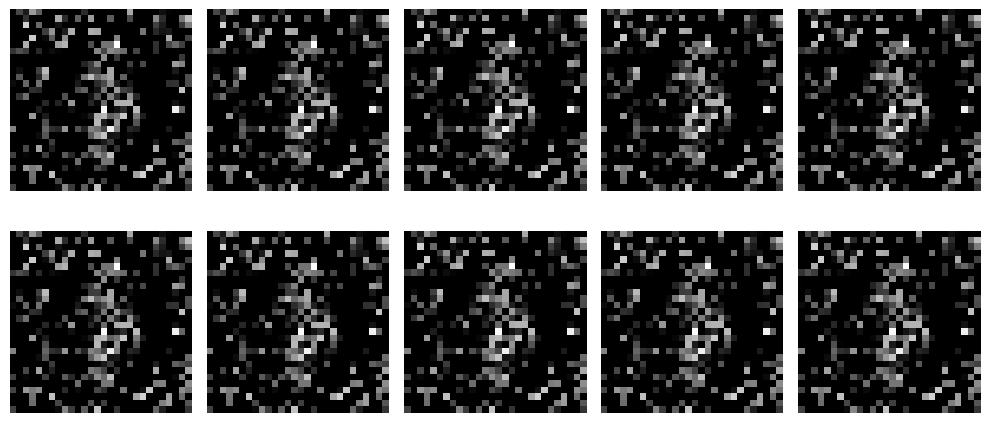

In [20]:
random_mse_error = []


max_sloppy = torch.tensor(np.random.choice(15680, size=sorted(no_sloppy)[-1], replace=False))

for to_remove in no_sloppy:
    # Create a backup of the original model before pruning
    model_clone = copy.deepcopy(model)
    sloppy_rows = max_sloppy[:to_remove]
    _, removed_params = fisher_transform.zero_sloppy_params(fim, sloppy_rows, model_clone.autoencoder)
    random_mse_error.append(np.mean([kl(model_clone.autoencoder(batch_0[i]), batch_0[i]).detach().numpy() for i in range(10)]))
    stiff_autoencoded_batch = [model_clone.autoencoder(batch_0[i]) for i in range(10)]
    plot_batch(stiff_autoencoded_batch, f'plots/unif/random_prune_rem_{removed_params}_of_15680_params.pdf')

Magnitude:  0.0
Removed 0 params


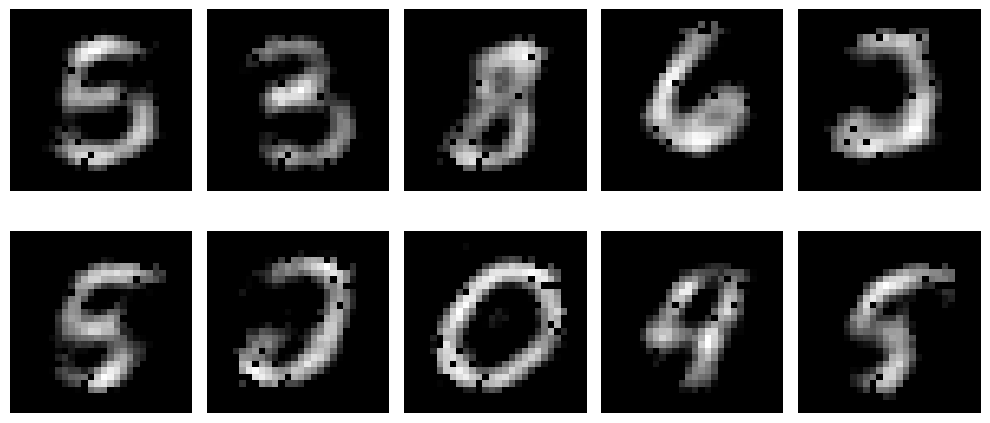

Magnitude:  0.005
Removed 2153 params


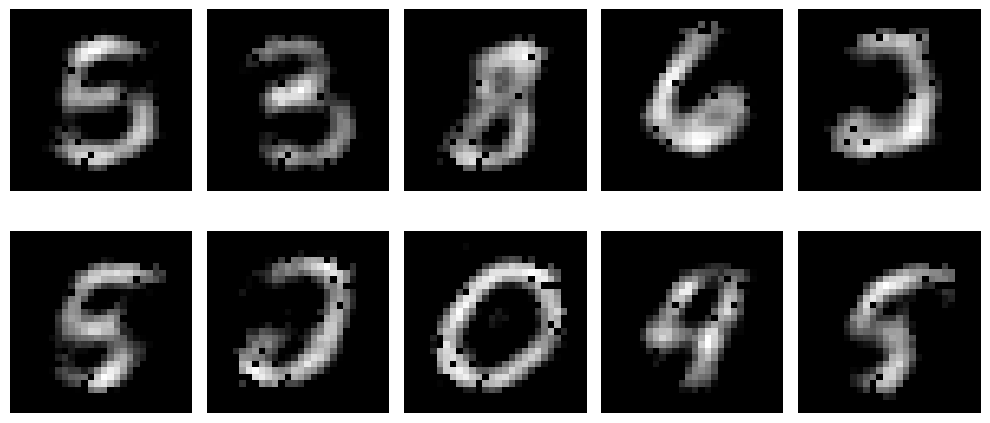

Magnitude:  0.01
Removed 4211 params


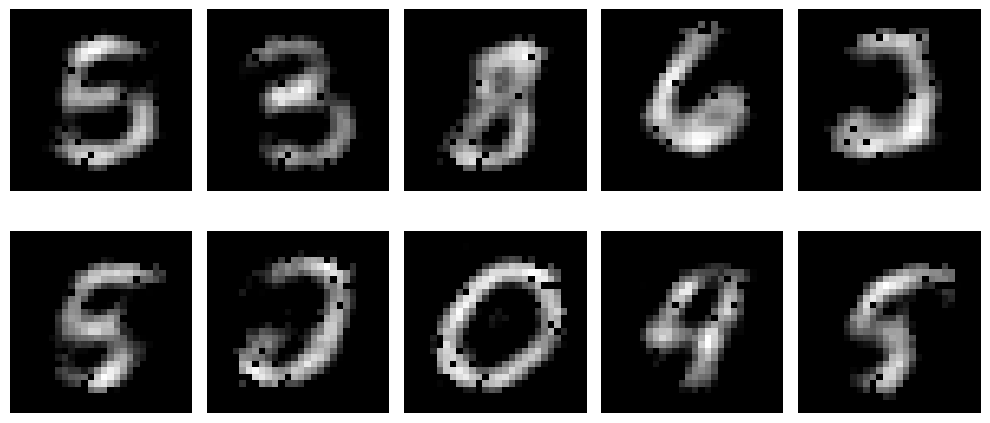

Magnitude:  0.015
Removed 6173 params


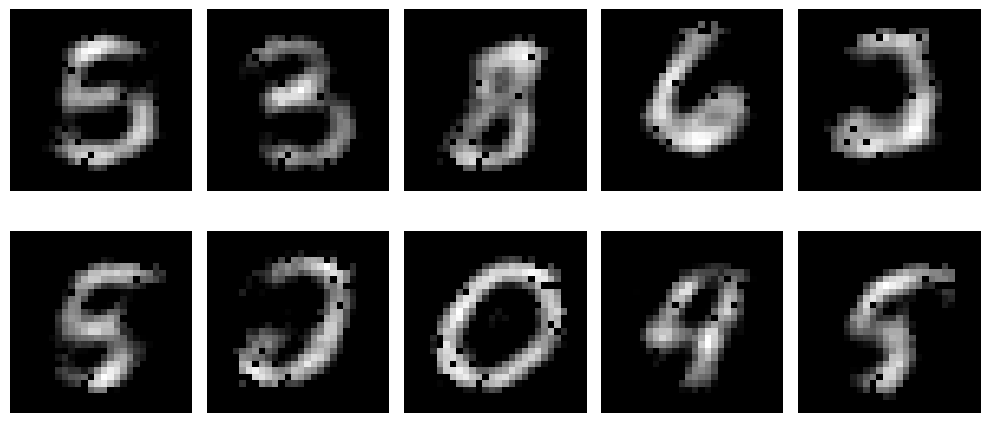

Magnitude:  0.02
Removed 8104 params


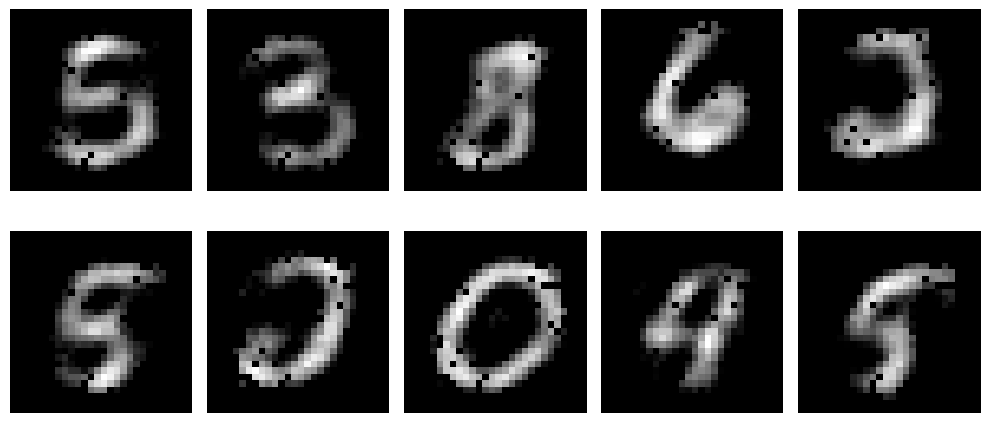

Magnitude:  0.025
Removed 9685 params


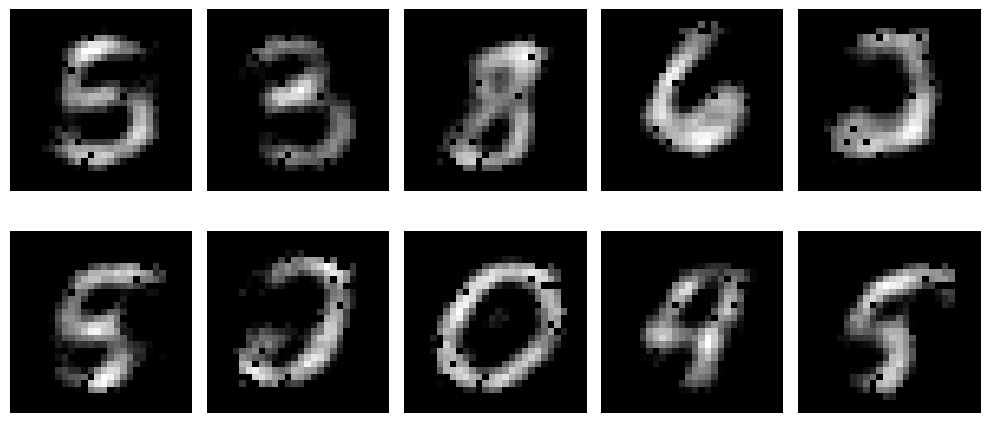

Magnitude:  0.03
Removed 11050 params


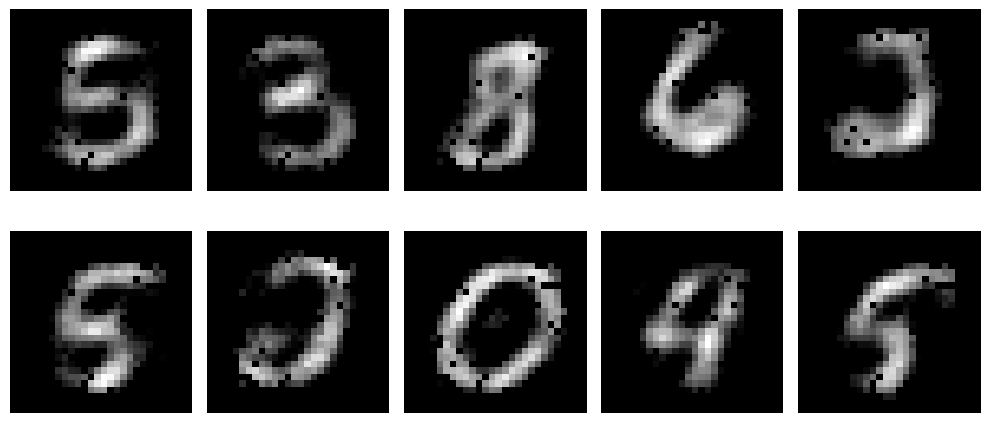

Magnitude:  0.035
Removed 12168 params


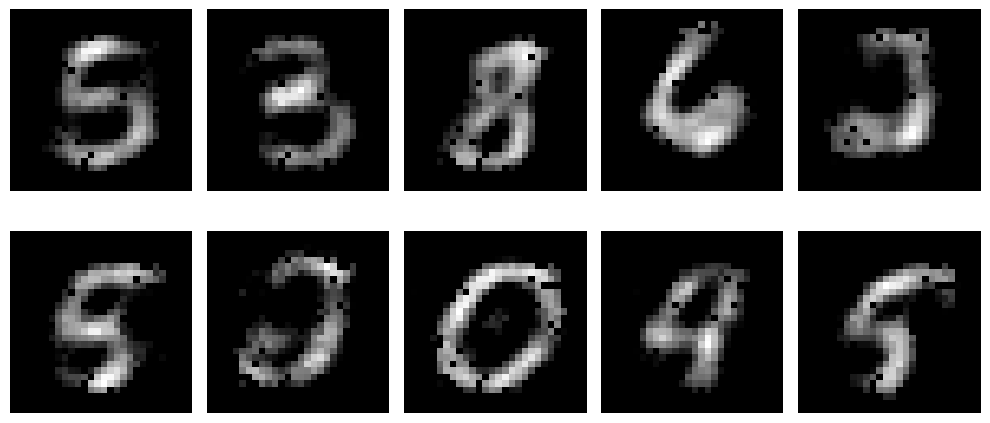

Magnitude:  0.04
Removed 12954 params


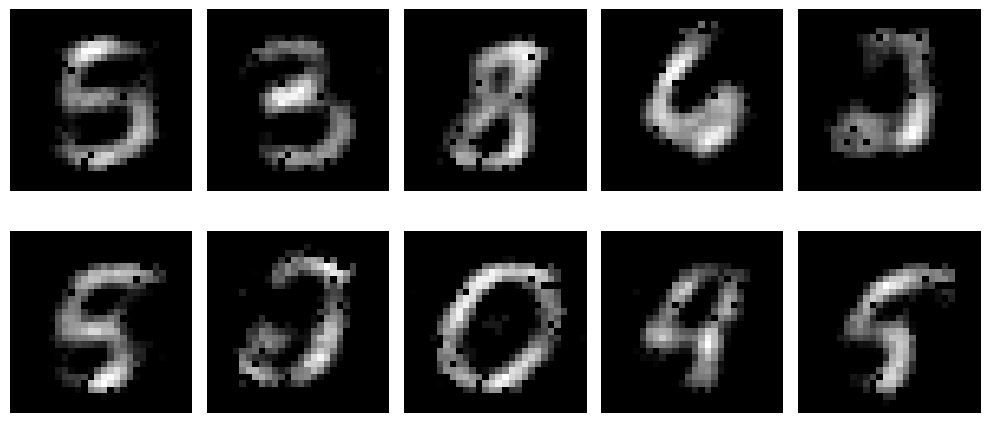

Magnitude:  0.045
Removed 13565 params


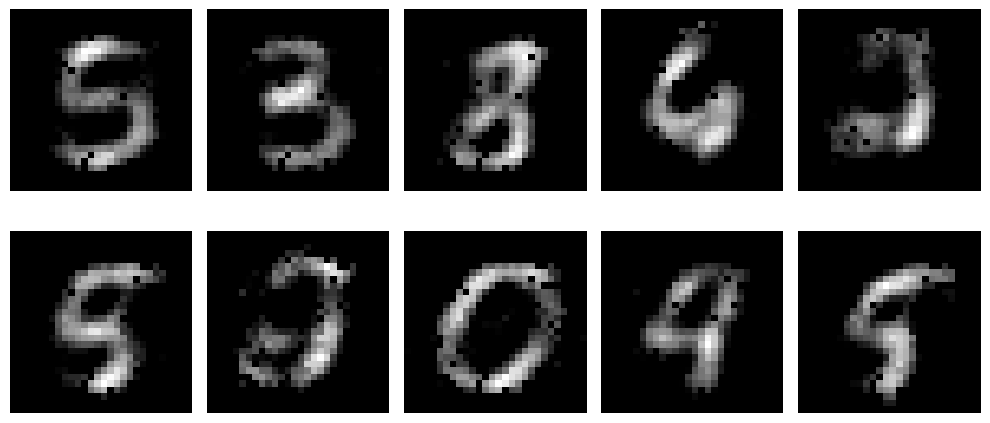

Magnitude:  0.05
Removed 13944 params


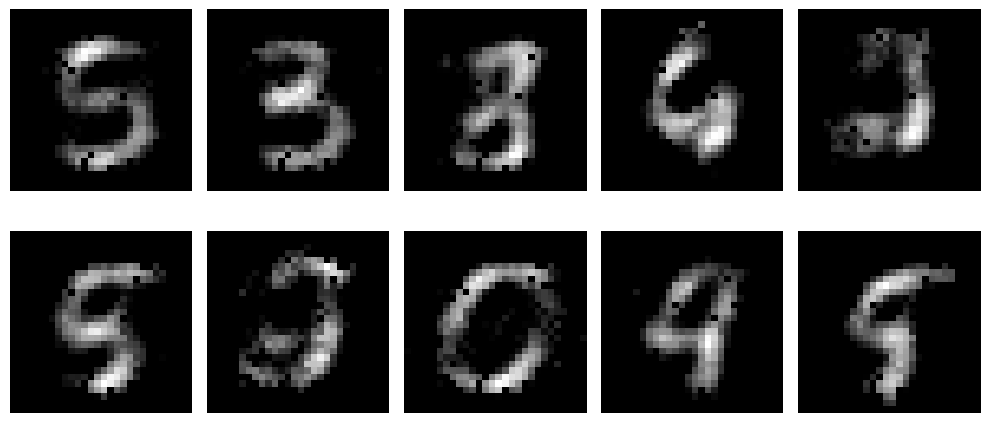

Magnitude:  0.055
Removed 14256 params


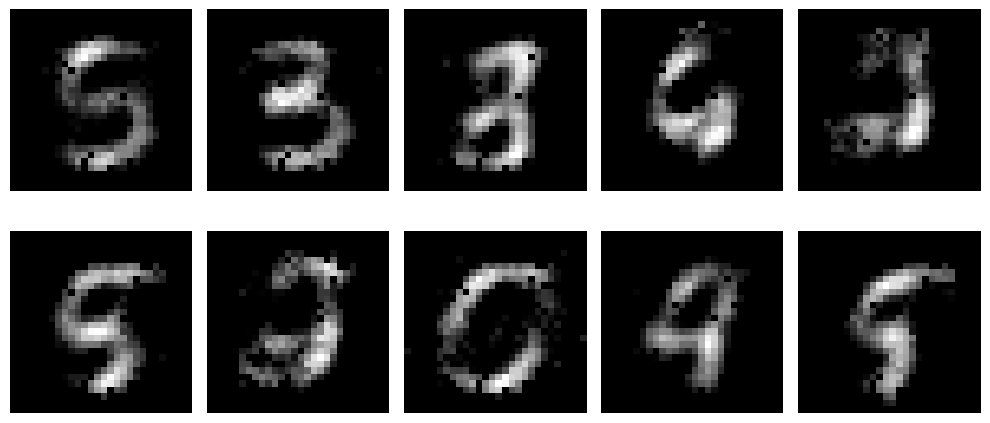

Magnitude:  0.06
Removed 14515 params


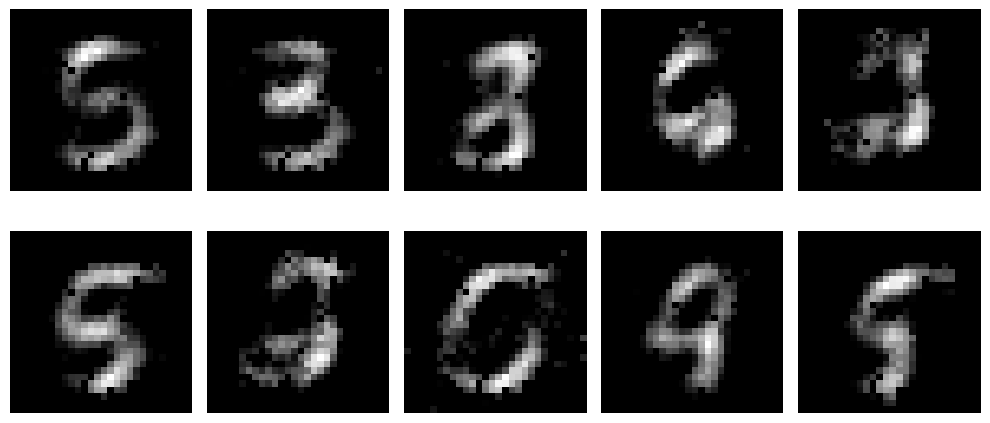

Magnitude:  0.065
Removed 14730 params


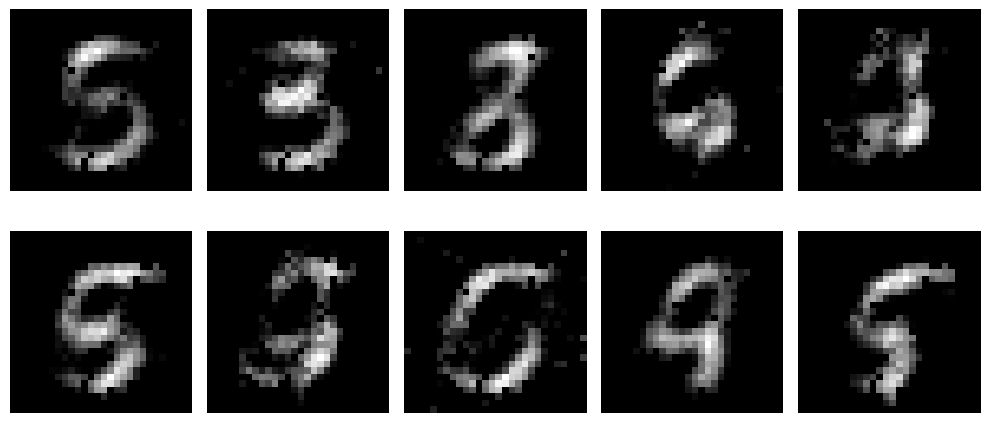

Magnitude:  0.07
Removed 14934 params


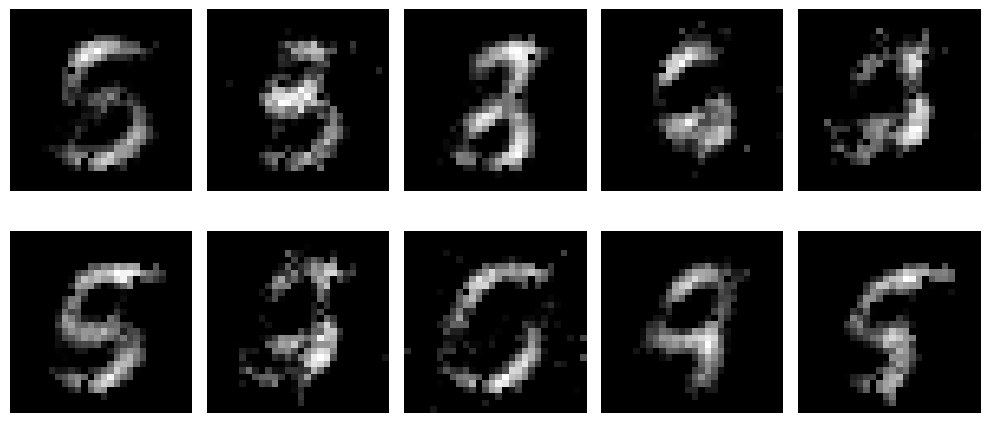

Magnitude:  0.075
Removed 15079 params


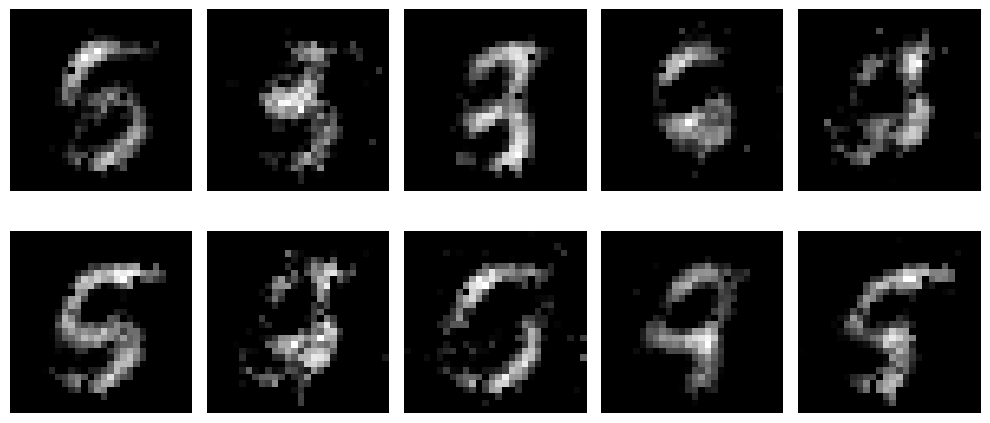

Magnitude:  0.08
Removed 15217 params


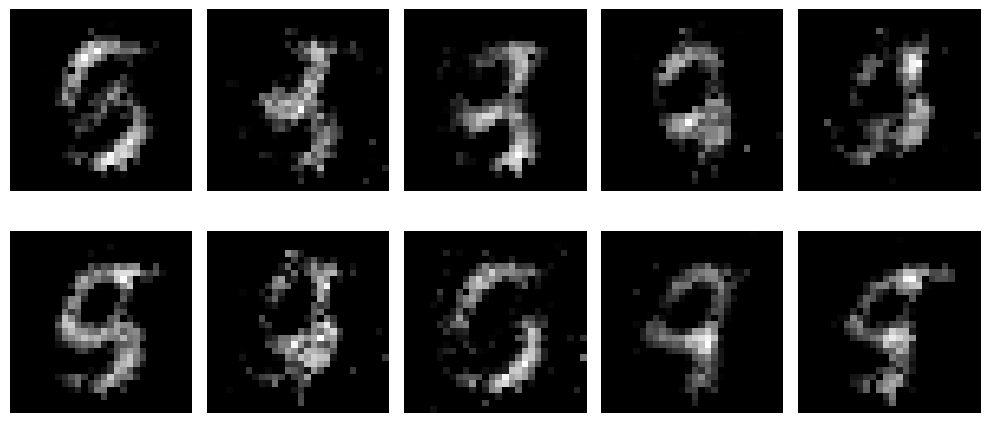

Magnitude:  0.085
Removed 15332 params


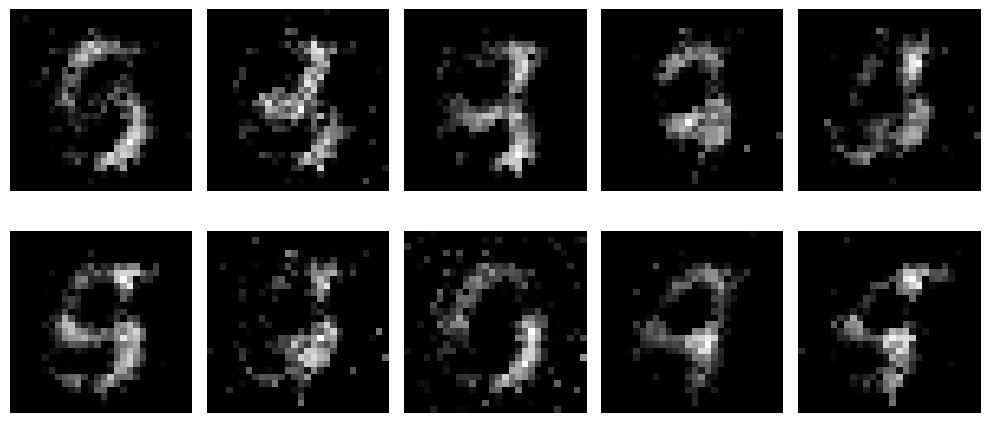

Magnitude:  0.09
Removed 15411 params


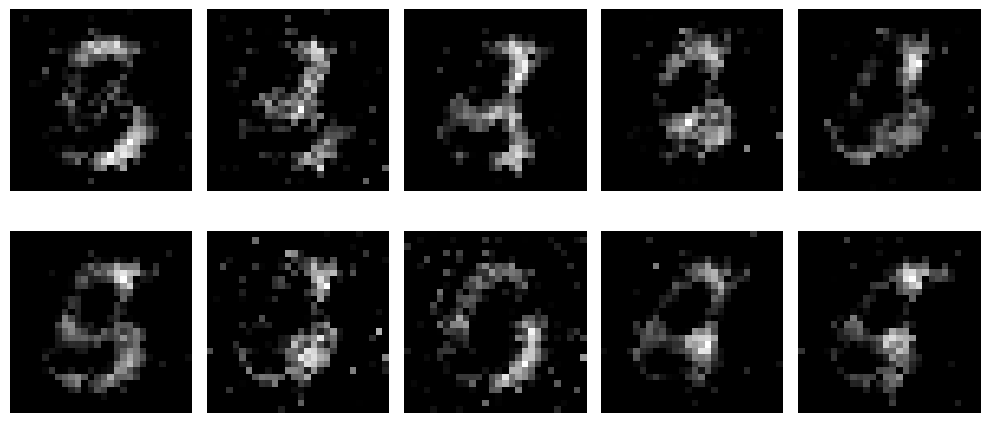

Magnitude:  0.095
Removed 15476 params


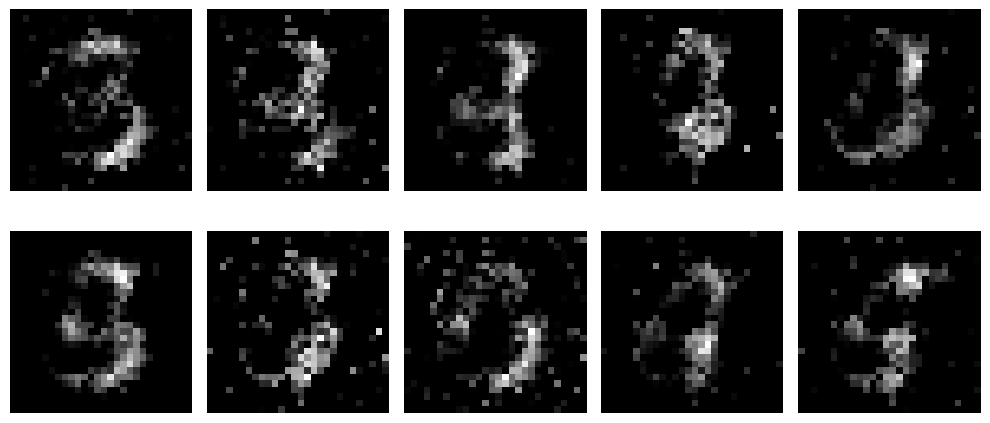

Magnitude:  0.1
Removed 15518 params


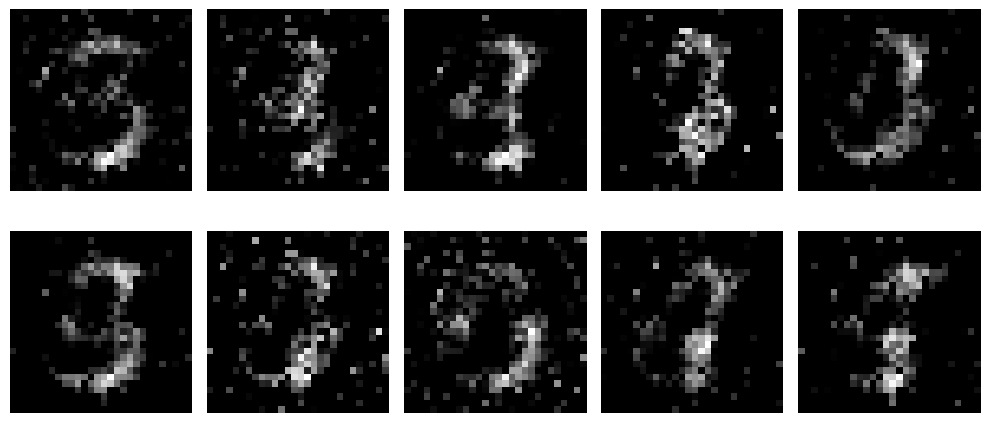

Magnitude:  0.105
Removed 15553 params


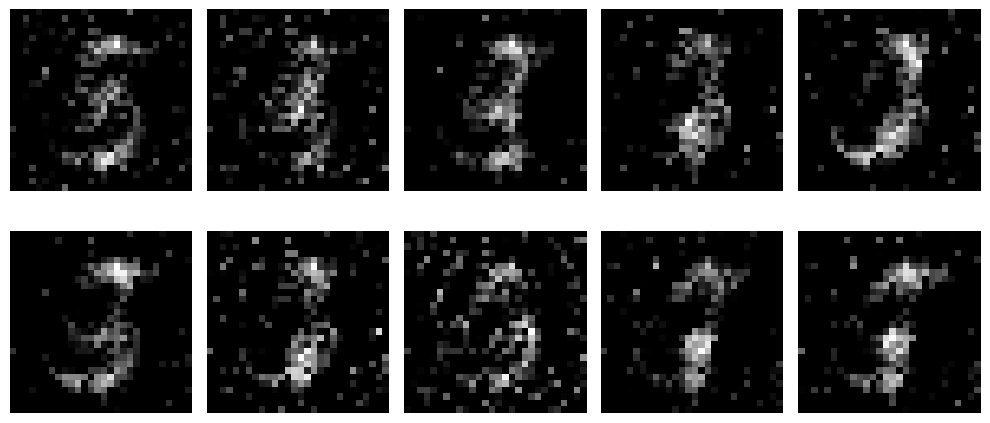

Magnitude:  0.11
Removed 15582 params


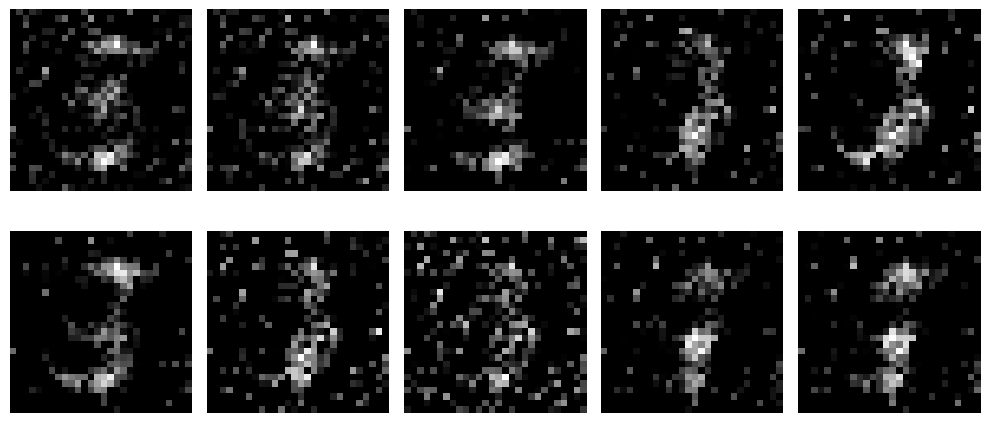

Magnitude:  0.115
Removed 15611 params


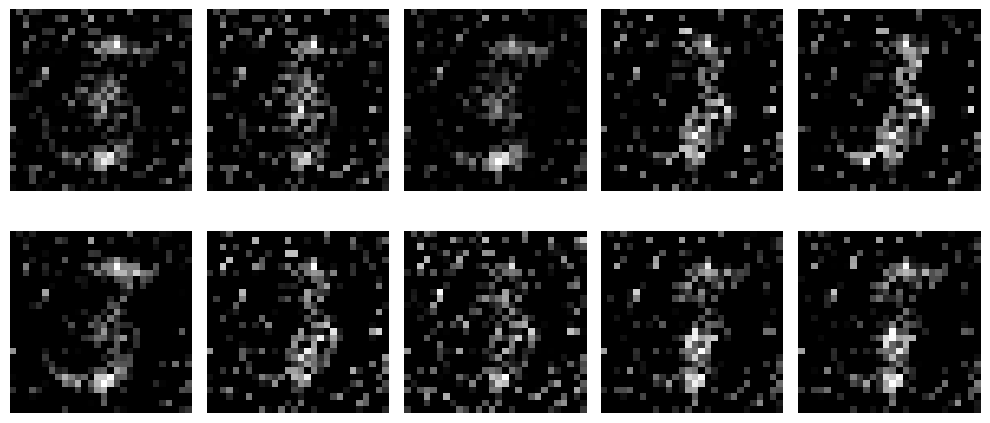

Magnitude:  0.12
Removed 15637 params


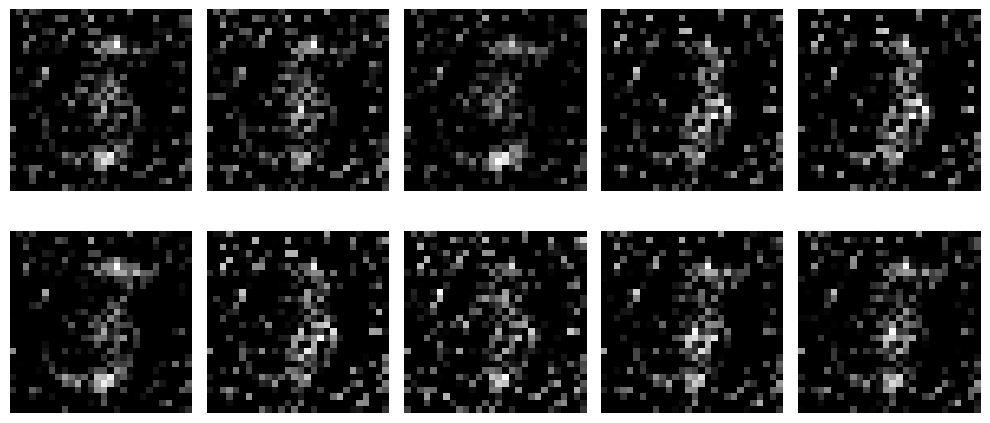

Magnitude:  0.125
Removed 15647 params


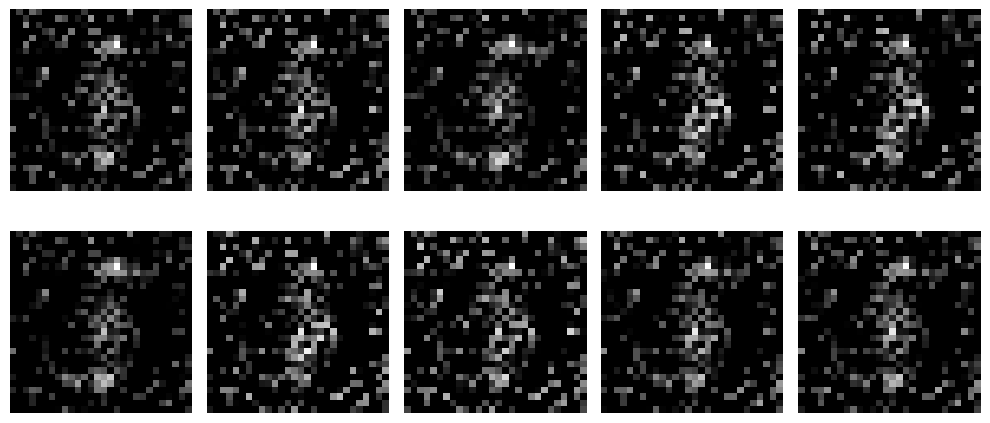

Magnitude:  0.13
Removed 15652 params


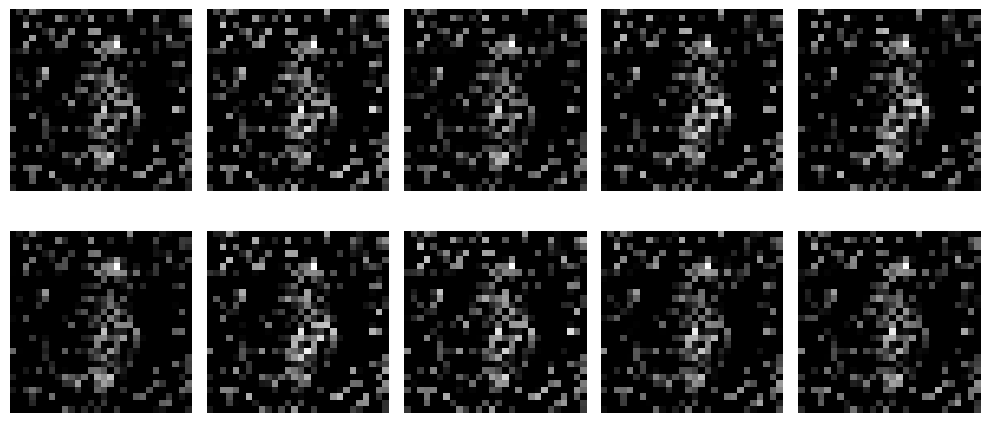

Magnitude:  0.135
Removed 15659 params


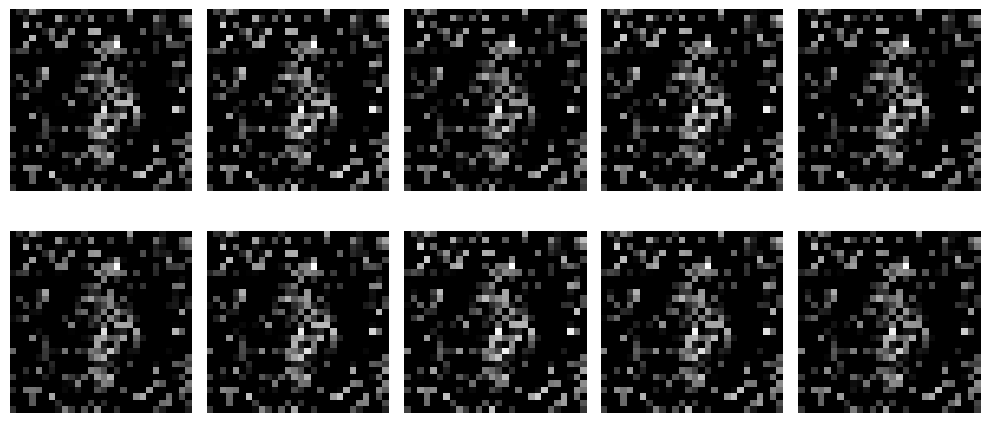

Magnitude:  0.14
Removed 15663 params


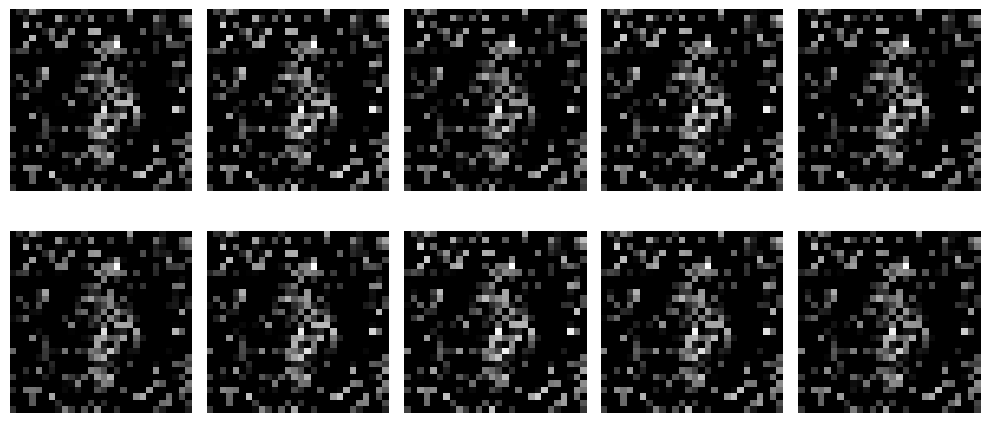

Magnitude:  0.145
Removed 15668 params


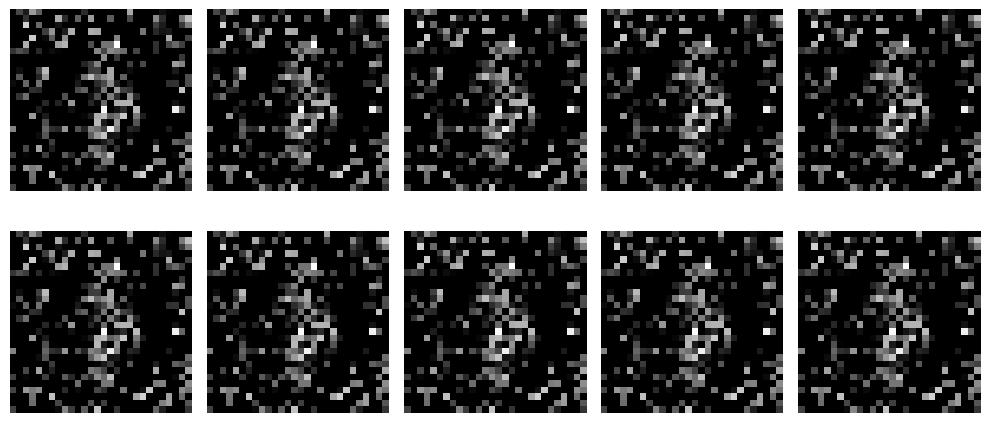

Magnitude:  0.15
Removed 15671 params


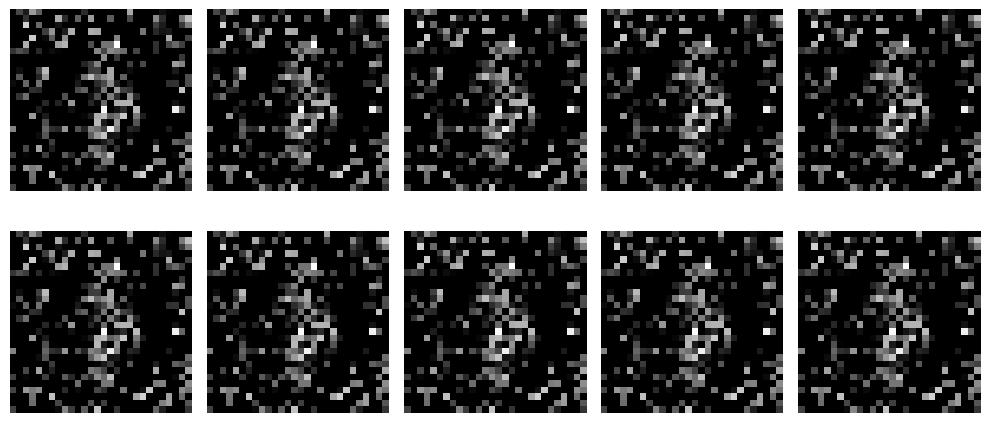

Magnitude:  0.155
Removed 15673 params


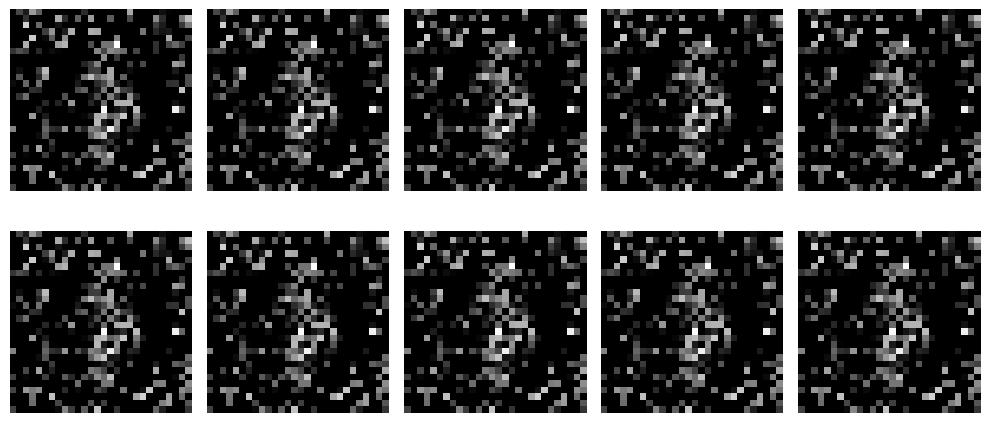

Magnitude:  0.16
Removed 15674 params


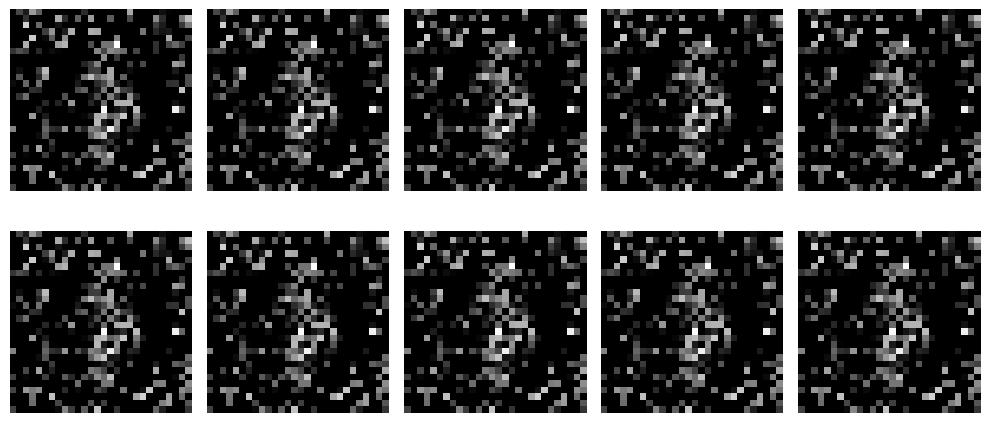

Magnitude:  0.165
Removed 15676 params


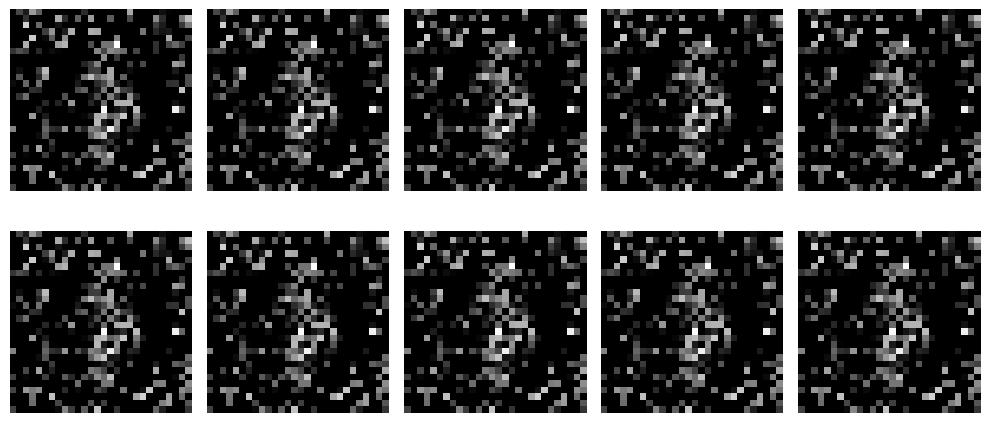

Magnitude:  0.17
Removed 15677 params


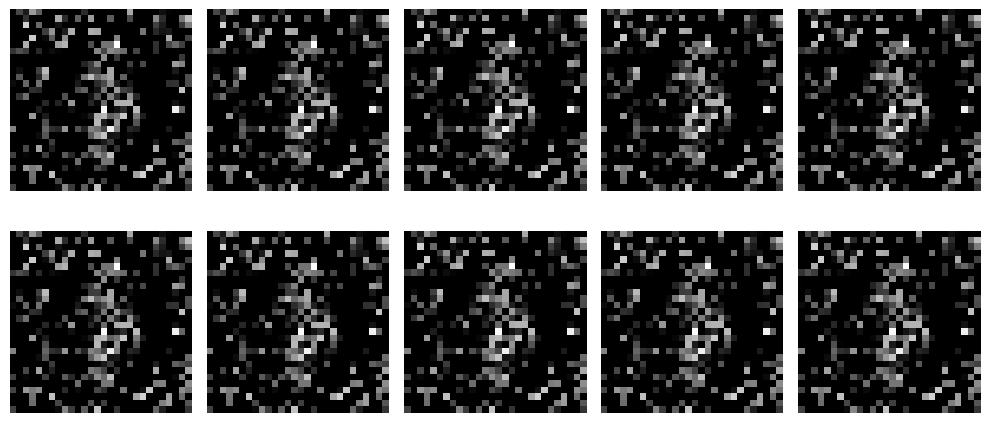

Magnitude:  0.175
Removed 15677 params


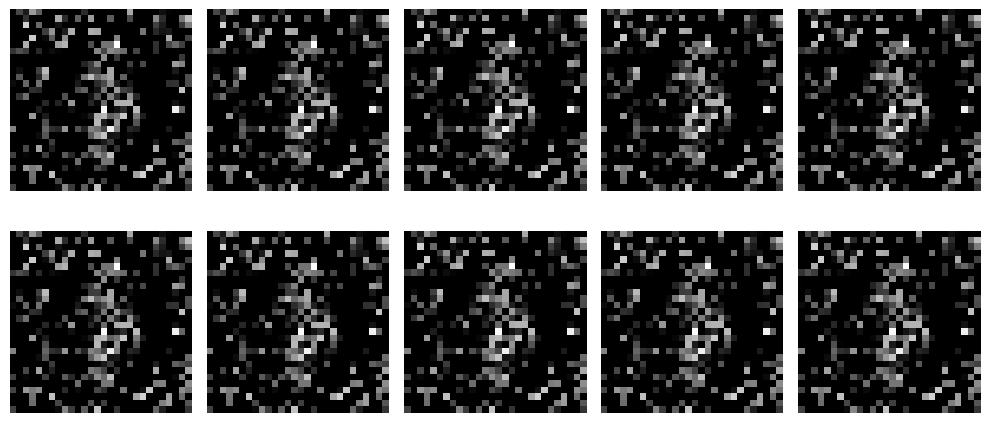

Magnitude:  0.18
Removed 15677 params


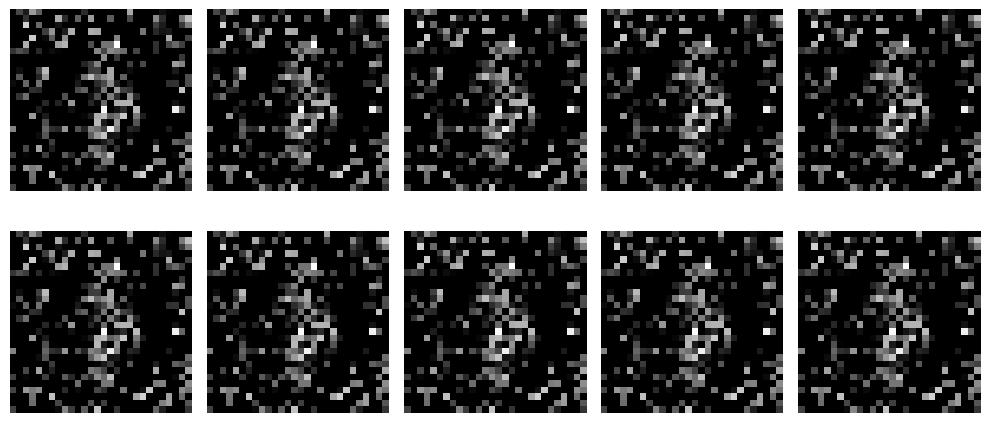

Magnitude:  0.185
Removed 15677 params


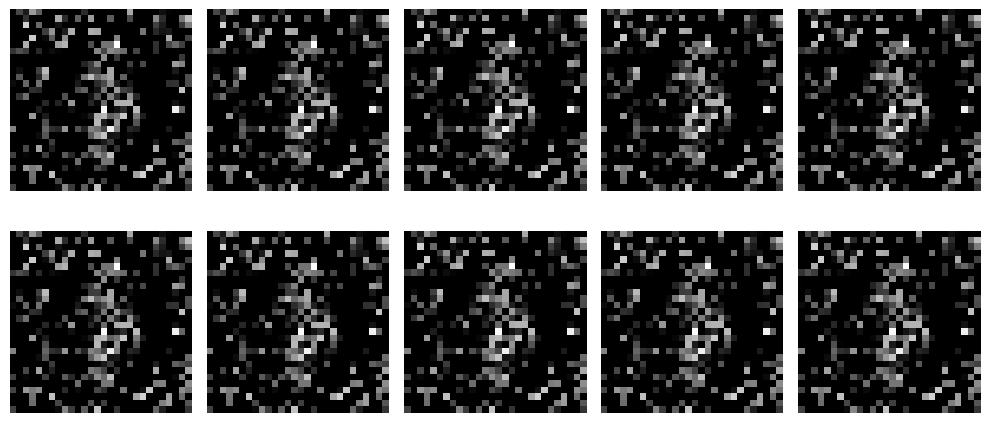

Magnitude:  0.19
Removed 15677 params


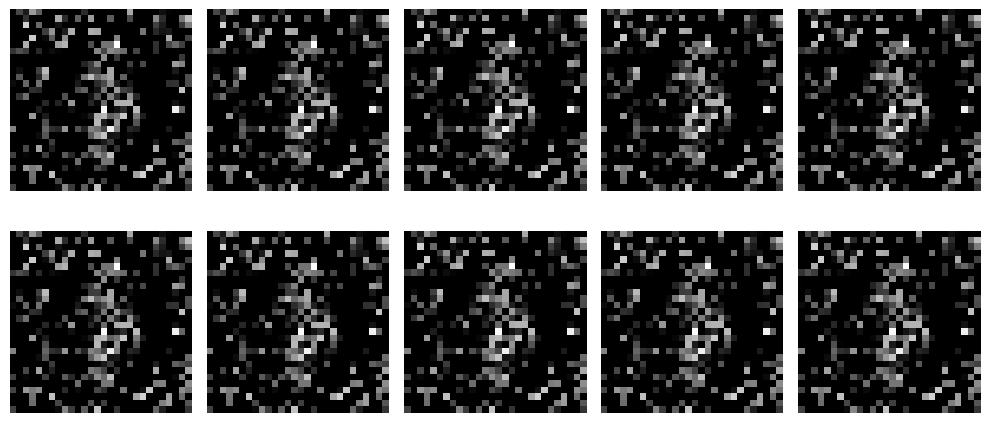

Magnitude:  0.195
Removed 15678 params


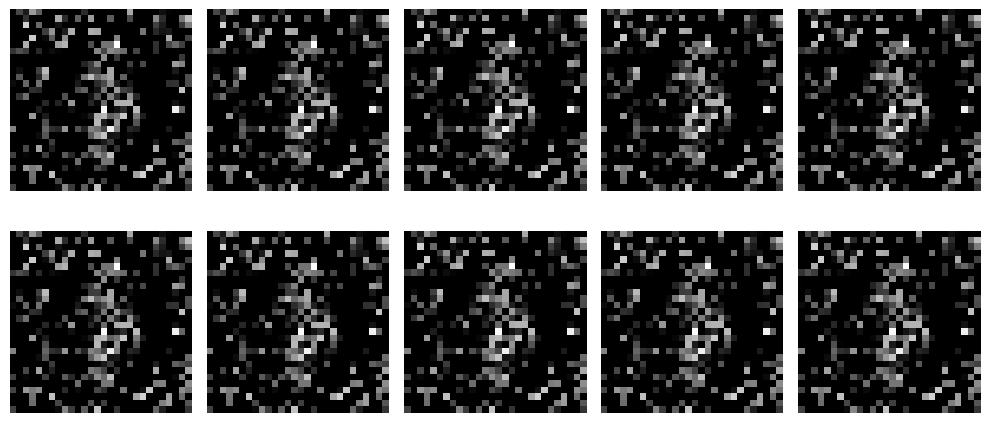

Magnitude:  0.2
Removed 15678 params


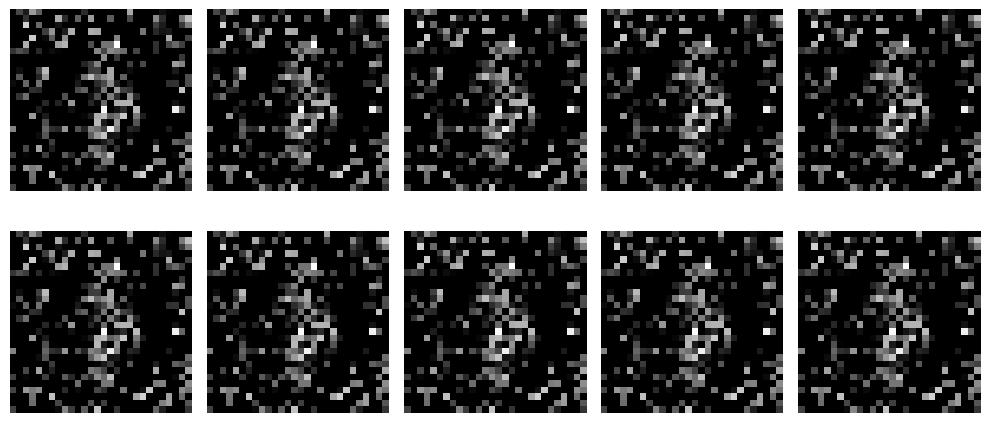

Magnitude:  0.205
Removed 15679 params


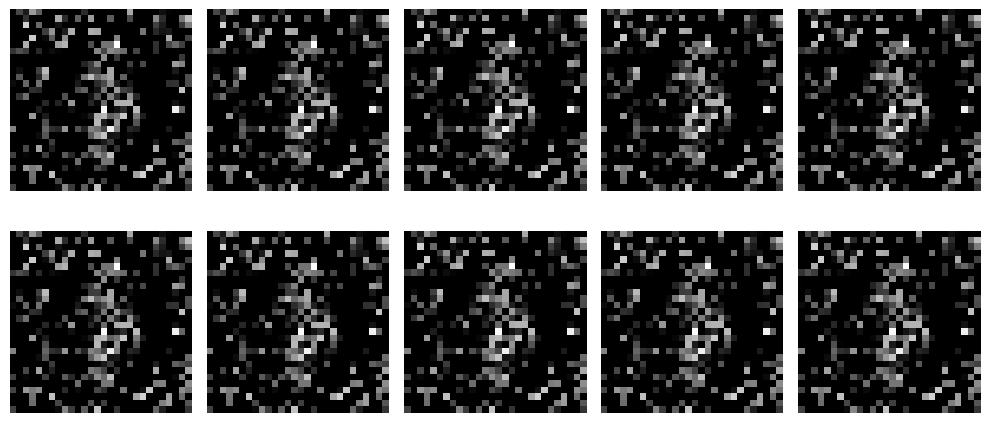

Magnitude:  0.21
Removed 15680 params


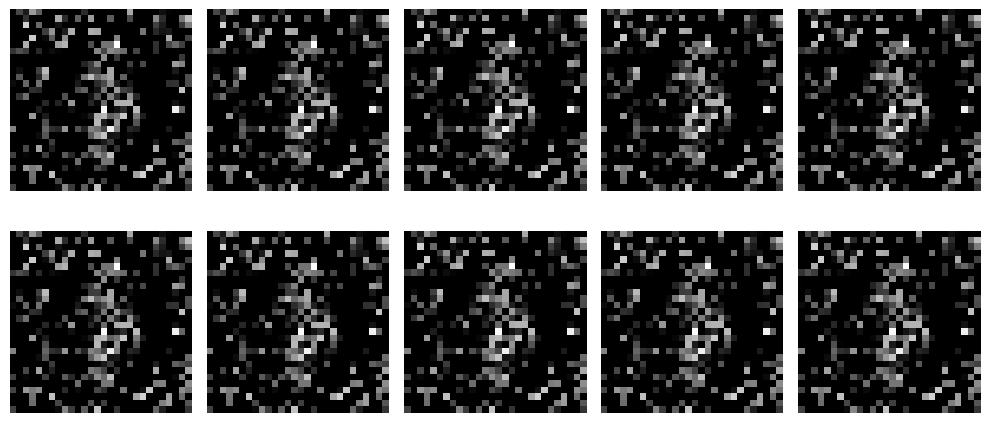

Magnitude:  0.215
Removed 15680 params


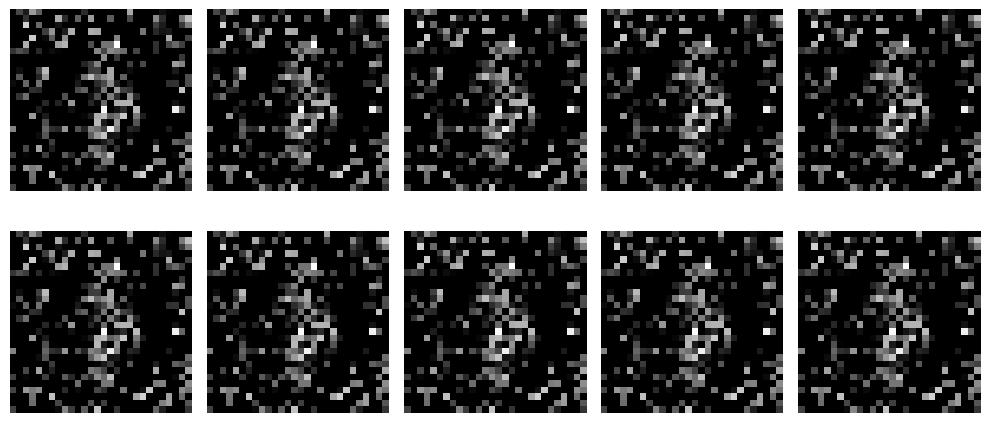

Magnitude:  0.22
Removed 15680 params


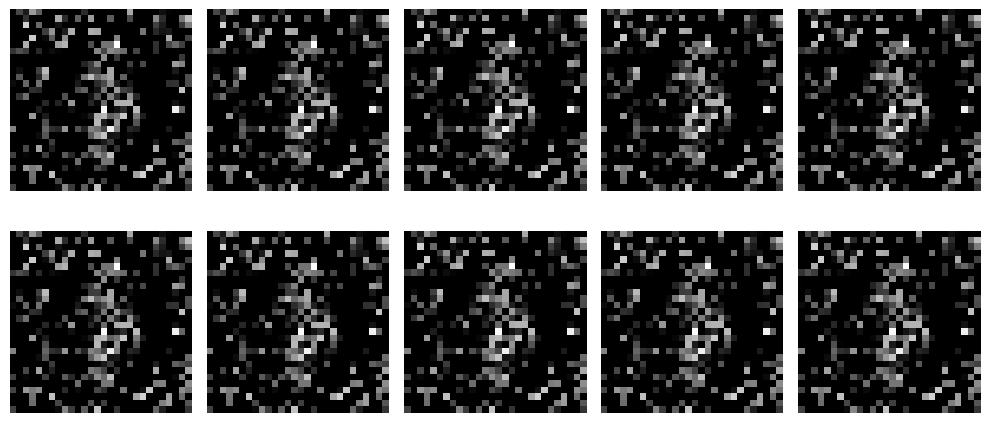

Magnitude:  0.225
Removed 15680 params


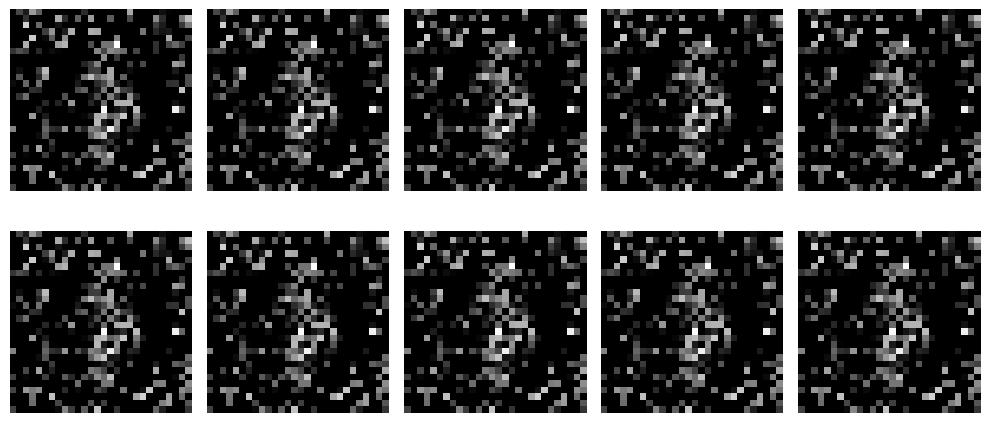

Magnitude:  0.23
Removed 15680 params


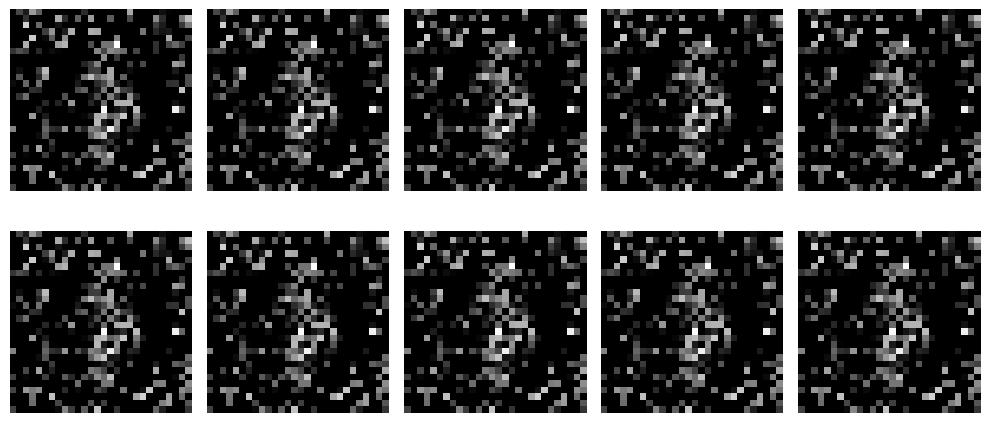

Magnitude:  0.235
Removed 15680 params


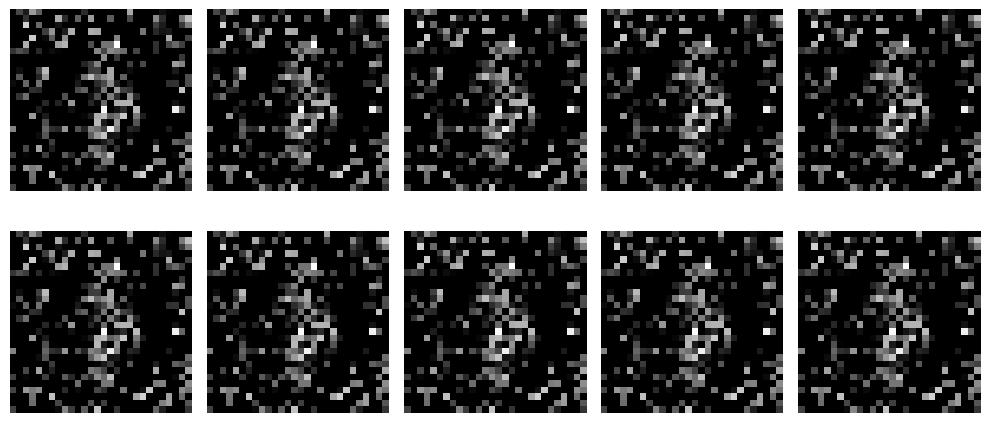

Magnitude:  0.24
Removed 15680 params


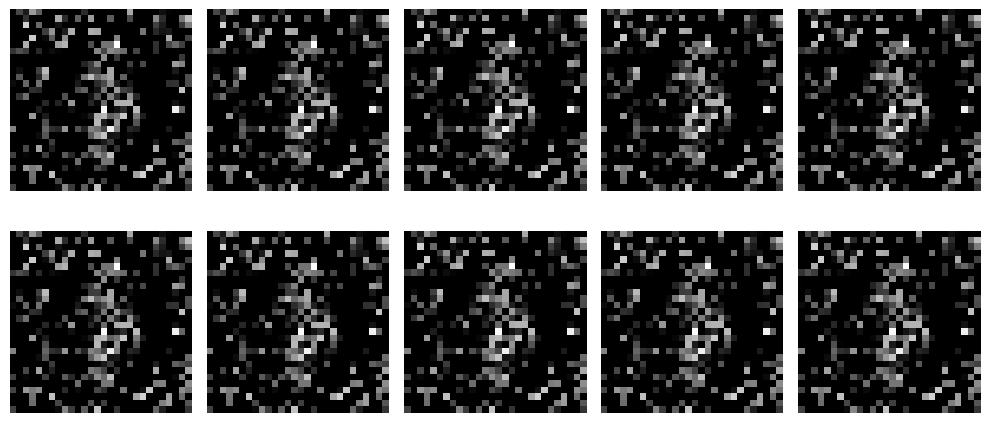

Magnitude:  0.245
Removed 15680 params


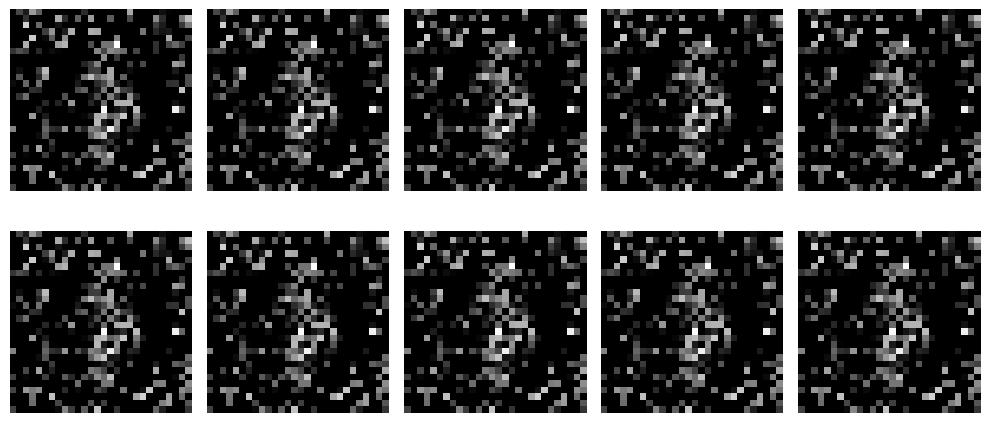

Magnitude:  0.25
Removed 15680 params


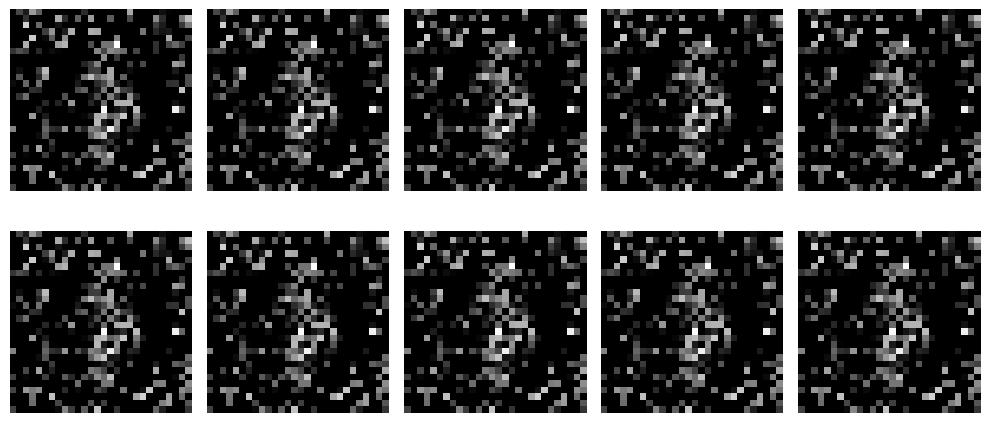

Magnitude:  0.255
Removed 15680 params


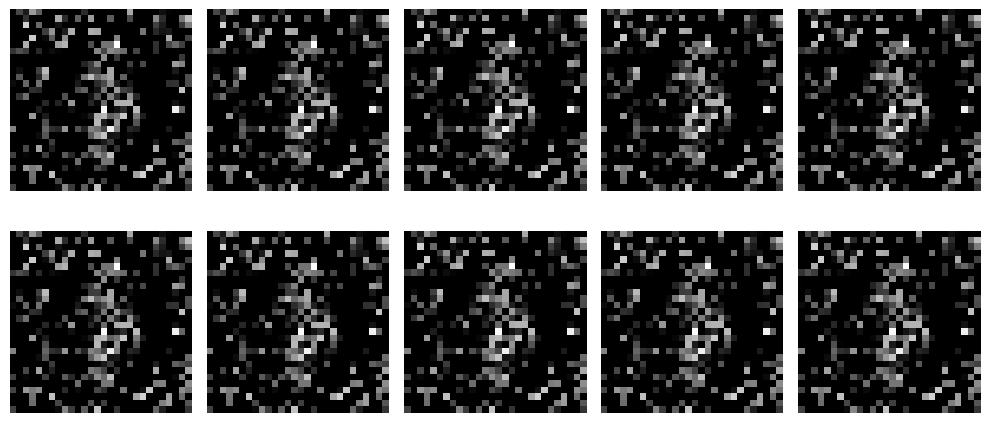

Magnitude:  0.26
Removed 15680 params


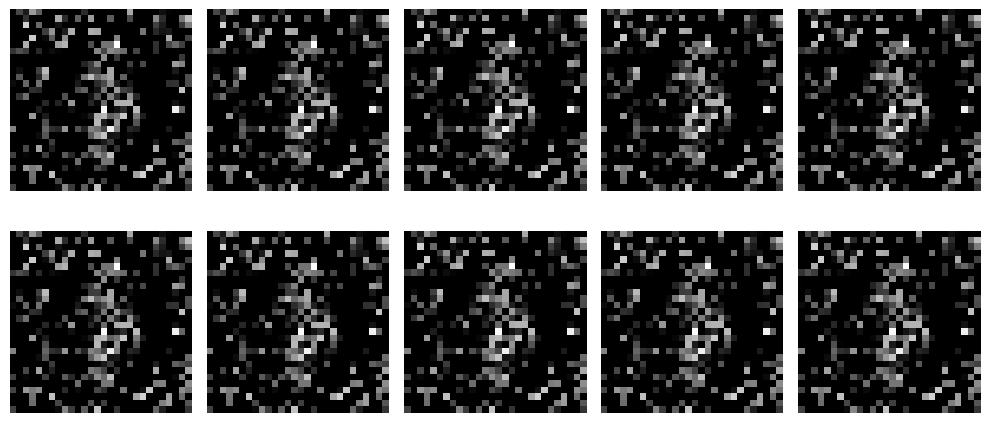

Magnitude:  0.265
Removed 15680 params


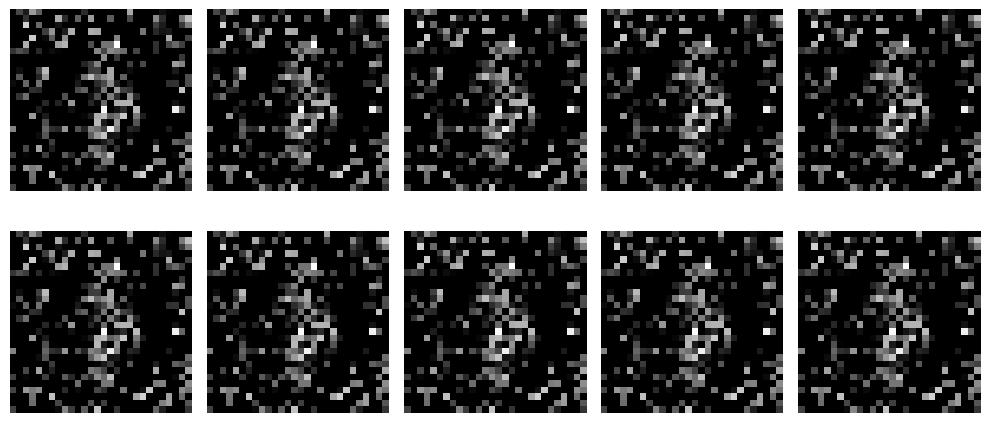

Magnitude:  0.27
Removed 15680 params


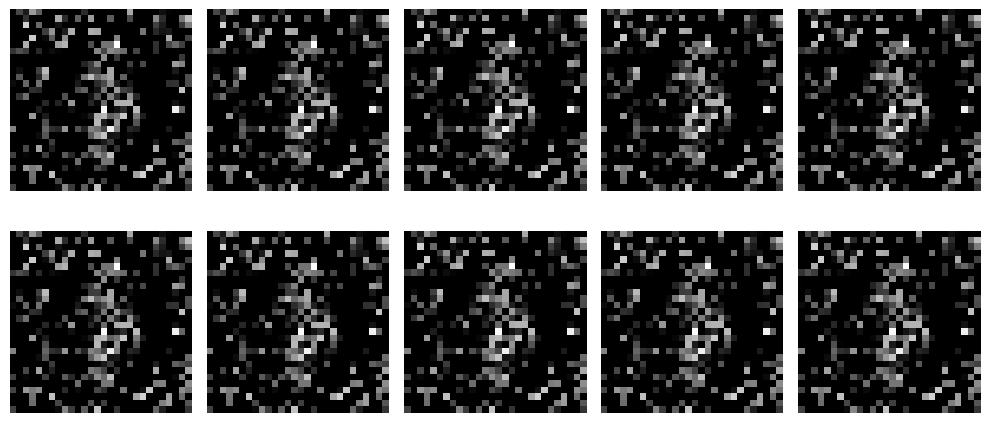

Magnitude:  0.275
Removed 15680 params


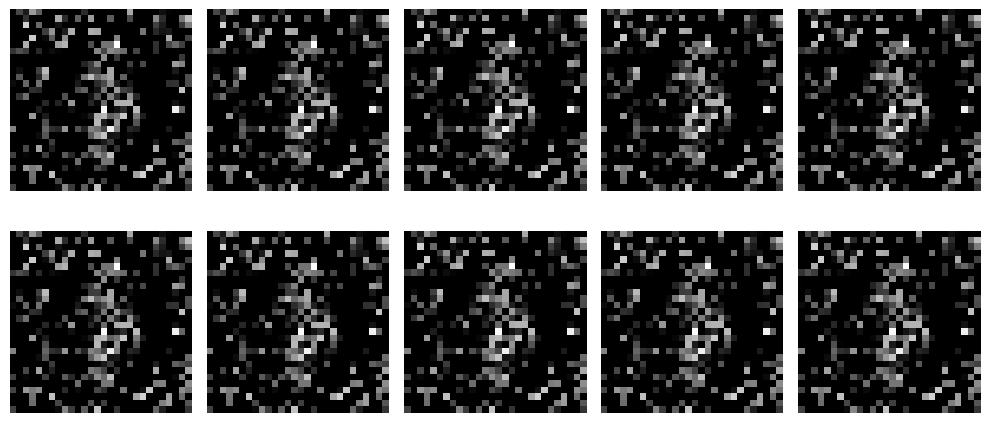

Magnitude:  0.28
Removed 15680 params


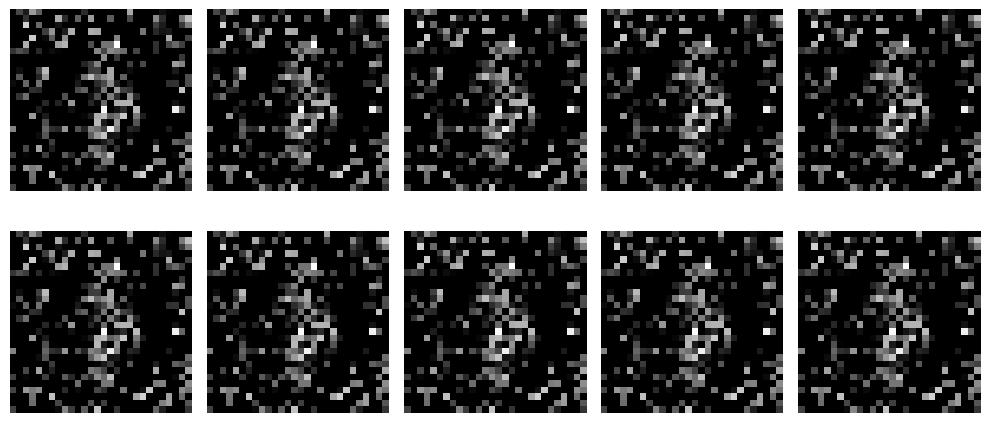

Magnitude:  0.285
Removed 15680 params


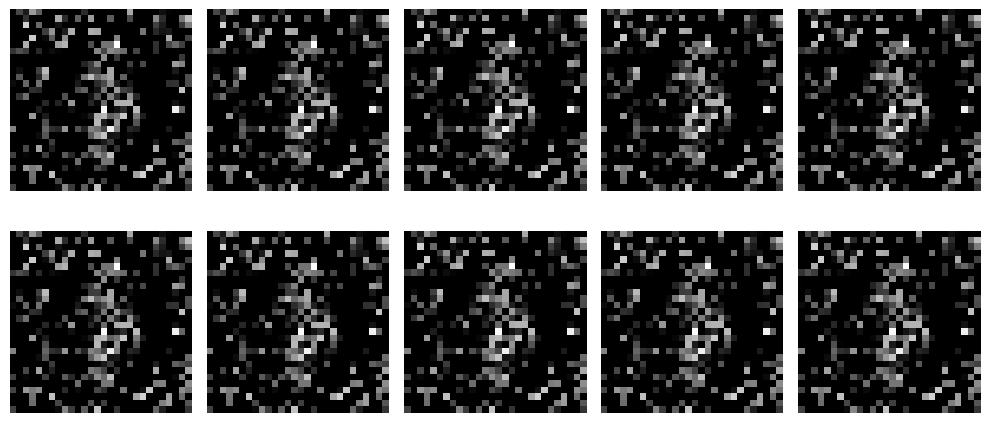

Magnitude:  0.29
Removed 15680 params


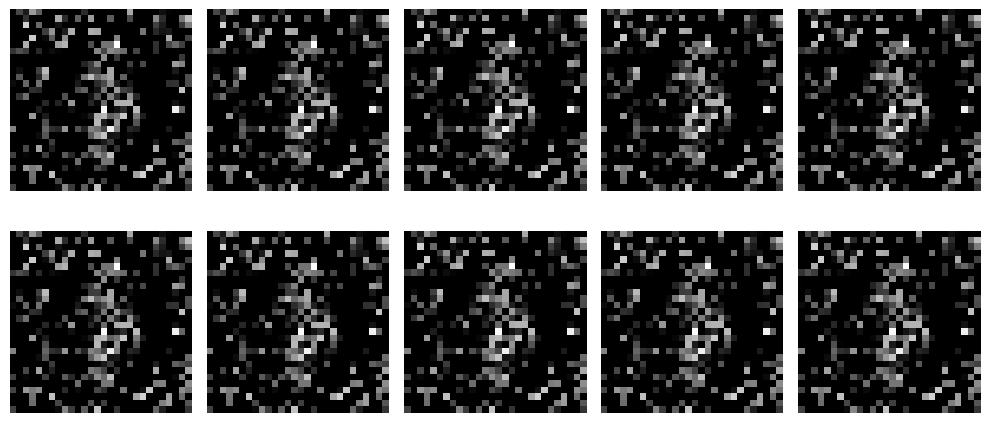

Magnitude:  0.295
Removed 15680 params


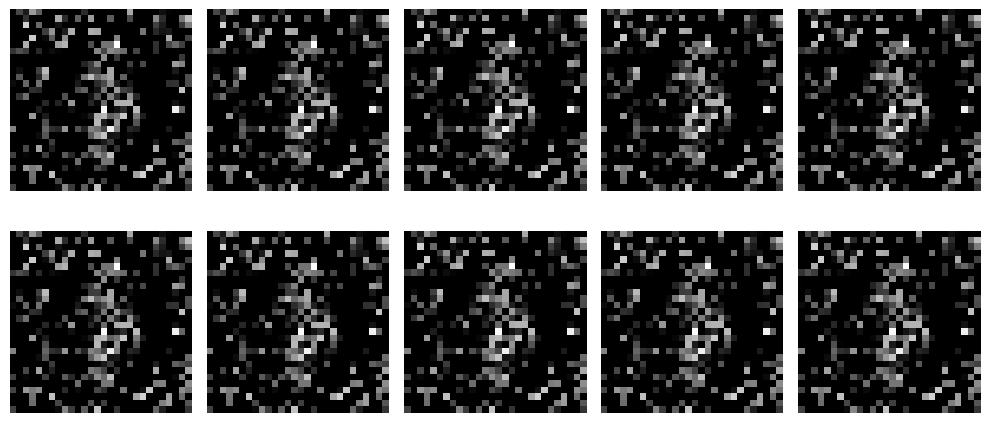

In [16]:
# Compare with Magnitude pruning
encoder_layer = model.autoencoder.encoder[1]
mag_encoder_weights = abs(encoder_layer.weight.data.flatten())
no_mag_pruned = []

mag_mse_error = []
mag_hist = []
kl = torch.nn.MSELoss()

for mag in range(60):
    mag = mag/200
    mag_hist.append(mag)
    print('Magnitude: ', mag)
    # Create a backup of the original model before pruning
    model_clone = copy.deepcopy(model)

    # Compare with Magnitude pruning
    below_threshold_indices = torch.nonzero(mag_encoder_weights < mag).squeeze()
    _, removed_params = fisher_transform.zero_sloppy_params(fim, below_threshold_indices, model_clone.autoencoder)
    no_mag_pruned.append(removed_params)
    stiff_autoencoded_batch = [model_clone.autoencoder(batch_0[i]) for i in range(10)]
    mag_mse_error.append(np.mean([kl(model_clone.autoencoder(batch_0[i]), batch_0[i]).detach().numpy() for i in range(10)]))
    plot_batch(stiff_autoencoded_batch, f'plots/autoencoded_rem_mag_{mag}_rem_{removed_params}_of_15680_params.pdf')

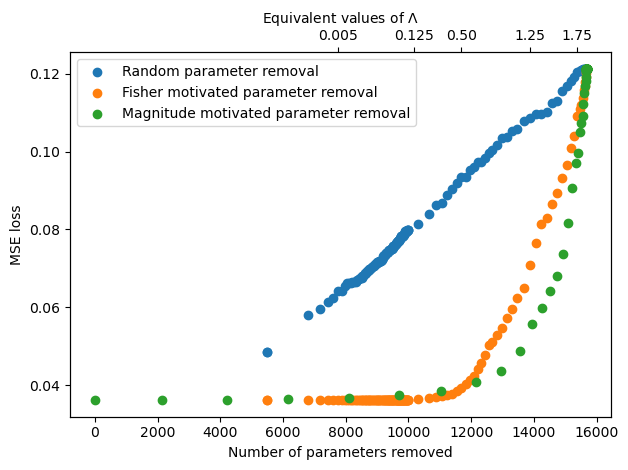

In [41]:
# plt.figure()
# plt.scatter(no_sloppy, random_mse_error, label='MSE2 loss of randomly removed parameters')
# plt.scatter(no_sloppy, fisher_mse_error, label='MSE loss of Fisher motivated parameter removal')
fig, ax = plt.subplots()

ax.scatter(no_sloppy, random_mse_error, label='Random parameter removal')
ax.scatter(no_sloppy, fisher_mse_error, label='Fisher motivated parameter removal')
ax.scatter(no_mag_pruned, mag_mse_error, label='Magnitude motivated parameter removal')
ax.set_xlabel('Number of parameters removed')
ax.set_ylabel('MSE loss')

# labels = [w.get_text() for w in ax.get_xticklabels()]
# locs = list(ax.get_xticks())

# Create a twin Axes (top x-axis)
ax2 = ax.twiny()

# Set the tick positions and labels for the top x-axis
# top_tick_labels = ['0.005', '0.125', '0.50', '1.00', '1.25', '1.75']
# top_ticks = [7740, 10168, 11689, 12979, 13879, 15386]

top_tick_labels = ['0.005', '0.125', '0.50','1.25', '1.75']
top_ticks = [7740, 10168, 11689, 13879, 15386]

ax2.set_xticks(top_ticks)
ax2.set_xticklabels(top_tick_labels)
ax2.set_xlim(ax.get_xlim())  # Set the limits to match the bottom x-axis
ax2.set_xlabel('Equivalent values of $\Lambda$')

# Display the legend
ax.legend()
fig.tight_layout()


# plt.axvline(0.8)
plt.savefig('plots/MSE_loss_random_vs_fisher_mag.pdf')
# plt.scatter(range(len(fisher_mse_error)), np.array(random_mse_error) - np.array(fisher_mse_error))
# fisher_mse_error